In [1]:
import geopandas as gpd
#To read shapefile
fp12 = "/Users/Malihafez/Documents/Mobile/Data/USA_Buildings/Florida/FL_Gulf_home_zones.shp"
Emp_home = gpd.read_file(fp12)


/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/var/folders/pc/11vhsnt944j5yjbbz3_d41k00000gq/T/ipykernel_4105/1661122386.py:1: DeprecationWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas still uses PyGEOS by default. However, starting with version 0.14, the default will switch to Shapely. To force to use Shapely 2.0 now, you can either uninstall PyGEOS or set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In the next release, GeoPandas will switch to using Shapely by default, even if PyGEOS is installed. If you only have PyGEOS installed to get speed-ups, this switch should 

In [2]:
Emp_home.head()

,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,GEOID20,NAME20,MTFCC20,UR20,UACE20,UATYPE20,...,CT01,CT02,CD01,CD02,CD03,CD04,CS01,CS02,createdate,geometry
0,12,075,970400,1143,120759704001143,Block 1143,G5040,NaN,NaN,NaN,...,16,2,3,3,4,5,8,10,20231016,"POLYGON ((-83.04494 29.14408, -83.04452 29.144..."
1,12,075,970502,3034,120759705023034,Block 3034,G5040,NaN,NaN,NaN,...,2,1,2,0,0,0,2,1,20231016,"POLYGON ((-82.53900 29.31792, -82.53899 29.319..."
2,12,045,960102,2116,120459601022116,Block 2116,G5040,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-85.26883 30.02583, -85.26508 30.028..."
3,12,057,013207,1022,120570132071022,Block 1022,G5040,NaN,NaN,NaN,...,1,2,1,1,1,0,1,2,20231016,"POLYGON ((-82.17807 27.90546, -82.17270 27.902..."
4,12,057,013919,2001,120570139192001,Block 2001,G5040,NaN,NaN,NaN,...,31,4,4,6,10,10,15,20,20231016,"POLYGON ((-82.28092 27.84404, -82.27993 27.844..."


In [43]:
import geopandas as gpd
#To read shapefile
part1_temp = "FL_Gulf_coastal_counties_part1.shp"
part1 = gpd.read_file(part1_temp)


In [44]:
part1= part1[['COUNTYFP','geometry']]

In [45]:


part1.loc[:,'geometry'] = part1.loc[:,'geometry'].to_crs('epsg:4326')


In [46]:
part1['geometry'].crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [7]:


Emp_home['geometry'] = Emp_home['geometry'].to_crs('epsg:4326')


In [8]:
Emp_home['geometry'].crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [9]:
Emp_home_part1 = gpd.sjoin(Emp_home, part1, op="intersects", how='left')
Emp_home_part1.head()

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3448: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,GEOID20,NAME20,MTFCC20,UR20,UACE20,UATYPE20,...,CD01,CD02,CD03,CD04,CS01,CS02,createdate,geometry,index_right,COUNTYFP
0,12,075,970400,1143,120759704001143,Block 1143,G5040,NaN,NaN,NaN,...,3,3,4,5,8,10,20231016,"POLYGON ((-83.04494 29.14408, -83.04452 29.144...",NaN,NaN
1,12,075,970502,3034,120759705023034,Block 3034,G5040,NaN,NaN,NaN,...,2,0,0,0,2,1,20231016,"POLYGON ((-82.53900 29.31792, -82.53899 29.319...",NaN,NaN
2,12,045,960102,2116,120459601022116,Block 2116,G5040,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-85.26883 30.02583, -85.26507 30.028...",NaN,NaN
3,12,057,013207,1022,120570132071022,Block 1022,G5040,NaN,NaN,NaN,...,1,1,1,0,1,2,20231016,"POLYGON ((-82.17806 27.90546, -82.17270 27.902...",NaN,NaN
4,12,057,013919,2001,120570139192001,Block 2001,G5040,NaN,NaN,NaN,...,4,6,10,10,15,20,20231016,"POLYGON ((-82.28092 27.84404, -82.27993 27.844...",NaN,NaN


In [10]:
Emp_home_part1 = Emp_home_part1[~Emp_home_part1['COUNTYFP'].isna()]

In [11]:
len(Emp_home)

143406

In [12]:
len(Emp_home_part1)/len(Emp_home)

0.34545974366483967

In [13]:
Emp_home_part1= Emp_home_part1.drop(['index_right','COUNTYFP'],axis=1)

In [14]:
Emp_home_part1.head()

,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,GEOID20,NAME20,MTFCC20,UR20,UACE20,UATYPE20,...,CT01,CT02,CD01,CD02,CD03,CD04,CS01,CS02,createdate,geometry
54,12,021,010435,2008,120210104352008,Block 2008,G5040,NaN,NaN,NaN,...,18,3,3,3,9,4,10,11,20231016,"POLYGON ((-81.70222 26.25009, -81.70186 26.250..."
55,12,021,010435,1004,120210104351004,Block 1004,G5040,NaN,NaN,NaN,...,17,5,2,6,7,3,8,14,20231016,"POLYGON ((-81.71808 26.24722, -81.71795 26.247..."
56,12,021,000200,1025,120210002001025,Block 1025,G5040,NaN,NaN,NaN,...,3,0,0,1,1,1,1,2,20231016,"POLYGON ((-81.79335 26.17518, -81.79232 26.175..."
57,12,021,011304,2013,120210113042013,Block 2013,G5040,NaN,NaN,NaN,...,7,5,1,1,3,1,6,6,20231016,"POLYGON ((-81.43775 26.42658, -81.43746 26.426..."
58,12,021,011400,2005,120210114002005,Block 2005,G5040,NaN,NaN,NaN,...,16,39,15,9,7,8,32,23,20231016,"POLYGON ((-81.43369 26.42571, -81.43158 26.425..."


In [15]:
import geopandas as gpd
#To read shapefile
fp12_NSI = "/Users/Malihafez/Documents/Mobile/Data/USA_Buildings/Florida/FL_Gulf_Buildings_Coastal_NSI.shp"
Emp_home_NSI = gpd.read_file(fp12_NSI)


In [16]:
Emp_home_NSI.head()

,fid,fd_id,bid,cbfips,st_damcat,occtype,bldgtype,num_story,sqft,found_type,...,pop2pmu65,pop2pmo65,o65disable,u65disable,x,y,firmzone,grnd_elv_m,ground_elv,geometry
0,61.0,495055188,862MFC5Q+RM9-0-0-0-0,120910214003016,RES,RES3B,W,3.0,2250.0,C,...,1,0,0.23,0.05,-86.560777,30.459549,NaN,14.228452,46.681274,POINT (-86.56078 30.45955)
1,62.0,495057528,862M9HPJ+V34-0-0-0-0,120910233081018,RES,RES1-3SNB,M,3.0,1371.0,I,...,5,1,0.23,0.05,-86.419805,30.387137,NaN,5.375301,17.635502,POINT (-86.41980 30.38714)
2,63.0,495057696,862MVGPX+4VV-0-0-0-0,120910202001111,RES,RES1-3SNB,M,3.0,1262.0,C,...,4,1,0.23,0.05,-86.450332,30.885372,NaN,58.838810,193.040721,POINT (-86.45033 30.88537)
3,64.0,495057809,862MQCWV+99V-0-0-0-0,120910203012032,RES,RES1-3SNB,M,3.0,1371.0,S,...,1,0,0.23,0.05,-86.556590,30.795989,NaN,82.928787,272.076082,POINT (-86.55659 30.79599)
4,65.0,495057933,862MQCXV+MMX-0-0-0-0,120910203012032,RES,RES1-3SWB,M,3.0,1371.0,B,...,1,0,0.23,0.05,-86.555777,30.799241,NaN,82.825272,271.736464,POINT (-86.55578 30.79924)


In [17]:
Emp_home_NSI_part1 = gpd.sjoin(Emp_home_NSI, part1, op="intersects", how='left')
Emp_home_NSI_part1.head()

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3448: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


,fid,fd_id,bid,cbfips,st_damcat,occtype,bldgtype,num_story,sqft,found_type,...,o65disable,u65disable,x,y,firmzone,grnd_elv_m,ground_elv,geometry,index_right,COUNTYFP
0,61.0,495055188,862MFC5Q+RM9-0-0-0-0,120910214003016,RES,RES3B,W,3.0,2250.0,C,...,0.23,0.05,-86.560777,30.459549,NaN,14.228452,46.681274,POINT (-86.56078 30.45955),NaN,NaN
1,62.0,495057528,862M9HPJ+V34-0-0-0-0,120910233081018,RES,RES1-3SNB,M,3.0,1371.0,I,...,0.23,0.05,-86.419805,30.387137,NaN,5.375301,17.635502,POINT (-86.41980 30.38714),NaN,NaN
2,63.0,495057696,862MVGPX+4VV-0-0-0-0,120910202001111,RES,RES1-3SNB,M,3.0,1262.0,C,...,0.23,0.05,-86.450332,30.885372,NaN,58.838810,193.040721,POINT (-86.45033 30.88537),NaN,NaN
3,64.0,495057809,862MQCWV+99V-0-0-0-0,120910203012032,RES,RES1-3SNB,M,3.0,1371.0,S,...,0.23,0.05,-86.556590,30.795989,NaN,82.928787,272.076082,POINT (-86.55659 30.79599),NaN,NaN
4,65.0,495057933,862MQCXV+MMX-0-0-0-0,120910203012032,RES,RES1-3SWB,M,3.0,1371.0,B,...,0.23,0.05,-86.555777,30.799241,NaN,82.825272,271.736464,POINT (-86.55578 30.79924),NaN,NaN


In [18]:
Emp_home_NSI_part1 = Emp_home_NSI_part1[~Emp_home_NSI_part1['COUNTYFP'].isna()]

In [19]:
bldgs_res = Emp_home_NSI_part1[Emp_home_NSI_part1['st_damcat']=='RES']

In [20]:
len(bldgs_res)

1030940

In [21]:
bldgs_res[bldgs_res['occtype']=='RES1-1SNB']

,fid,fd_id,bid,cbfips,st_damcat,occtype,bldgtype,num_story,sqft,found_type,...,o65disable,u65disable,x,y,firmzone,grnd_elv_m,ground_elv,geometry,index_right,COUNTYFP
340,1836.0,491665693,76RWX3JV+W32-3-3-3-5,120150101002020,RES,RES1-1SNB,W,1.0,2285.0,S,...,0.18,0.08,-81.907373,26.982269,NaN,3.616747,11.865967,POINT (-81.90737 26.98227),1.0,015
350,1857.0,491699788,76RWX258+PQQ-3-2-3-3,120150102004036,RES,RES1-1SNB,W,1.0,1626.0,S,...,0.18,0.08,-81.983027,26.959337,NaN,4.218228,13.839331,POINT (-81.98303 26.95934),1.0,015
357,1871.0,491726084,76RVVXQX+P83-9-4-5-4,120150105012153,RES,RES1-1SNB,M,1.0,2214.0,C,...,0.18,0.08,-82.001705,26.889259,NaN,5.018205,16.463928,POINT (-82.00171 26.88926),1.0,015
360,1898.0,491767073,76VV2X3Q+JV7-3-3-4-4,120150201012010,RES,RES1-1SNB,W,1.0,1999.0,S,...,0.18,0.08,-82.010330,27.004031,NaN,5.329113,17.483967,POINT (-82.01033 27.00403),1.0,015
376,1932.0,491896751,76RVXWP7+M35-4-4-4-3,120150209002009,RES,RES1-1SNB,W,1.0,1291.0,S,...,0.18,0.08,-82.087252,26.986631,NaN,3.399783,11.154144,POINT (-82.08725 26.98663),1.0,015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2544589,7362641.0,498225954,76RWM7CG+QG2-0-0-0-0,120710402061021,RES,RES1-1SNB,W,1.0,1342.0,S,...,0.17,0.05,-81.723724,26.671893,AE,2.369942,7.775400,POINT (-81.72372 26.67189),3.0,071
2544591,7362643.0,498226048,76RWM7W6+V2V-0-0-0-0,120710302011005,RES,RES1-1SNB,W,1.0,1462.0,S,...,0.17,0.05,-81.739960,26.697237,AE,2.931039,9.616270,POINT (-81.73996 26.69724),3.0,071
2544592,7362644.0,498226050,76RWM7V5+6PJ-0-0-0-0,120710302011017,RES,RES1-1SNB,M,1.0,1462.0,C,...,0.17,0.05,-81.740725,26.693076,AE,3.146635,10.323605,POINT (-81.74073 26.69308),3.0,071
2544599,7362651.0,498226064,76RWM7R5+3WR-0-0-0-0,120710302011024,RES,RES1-1SNB,W,1.0,1462.0,C,...,0.17,0.05,-81.740242,26.690234,AE,1.498931,4.917752,POINT (-81.74024 26.69023),3.0,071


In [22]:
counts = bldgs_res['occtype'].value_counts()
counts

occtype
RES1-1SNB    613637
RES1-1SWB    149396
RES2          79904
RES3A         77025
RES1-2SNB     61983
RES1-2SWB     14844
RES3B         11703
RES1-3SNB     10376
RES3C          4893
RES1-3SWB      2514
RES3D          2338
RES3E          1784
RES3F           543
Name: count, dtype: int64

In [23]:
counts/len(bldgs_res)*100

occtype
RES1-1SNB    59.522087
RES1-1SWB    14.491241
RES2          7.750597
RES3A         7.471337
RES1-2SNB     6.012280
RES1-2SWB     1.439851
RES3B         1.135178
RES1-3SNB     1.006460
RES3C         0.474615
RES1-3SWB     0.243855
RES3D         0.226783
RES3E         0.173046
RES3F         0.052670
Name: count, dtype: float64

In [24]:
del bldgs_res

In [25]:
del Emp_home_NSI_part1

In [26]:
del Emp_home_NSI

In [27]:
# Emp_home[Emp_home['h_geocode']=='010030104003011']

In [28]:
# Emp_home['CS02']

In [15]:
# To drop Null values in h_geocode
Emp_home_select = []

Emp_home_select =  Emp_home_part1.dropna(subset=['h_geocode'])
Emp_home_select.h_geocode


54        120210104352008
55        120210104351004
56        120210002001025
57        120210113042013
58        120210114002005
               ...       
143190    120810019081011
143191    120810002014001
143192    120810014051003
143311    120810020102028
143312    120810019142045
Name: h_geocode, Length: 34407, dtype: object

In [16]:
Emp_home_select =  Emp_home_select.drop_duplicates(subset=['h_geocode'])
Emp_home_select.h_geocode

54        120210104352008
55        120210104351004
56        120210002001025
57        120210113042013
58        120210114002005
               ...       
143190    120810019081011
143191    120810002014001
143192    120810014051003
143311    120810020102028
143312    120810019142045
Name: h_geocode, Length: 34223, dtype: object

In [33]:
# Emp_home_select.to_pickle('Emp_home_select.pickle')

In [34]:
# del Emp_home_select

In [17]:
Emp_home_select = Emp_home_select.astype({"C000":'int64'})

In [18]:
# # To select Null values in h_geocode

# Emp_home_unselect =  Emp_home[Emp_home['h_geocode'].isna()]
# len(Emp_home_unselect)


In [19]:
Emp_home_select = Emp_home_select.astype({"C000":'int64', "CA01":'int64', "CA02":'int64', "CA03":'int64',
                        "CE01":'int64' ,"CE02" :'int64', "CE03":'int64', "CNS01":'int64',"CNS02":'int64',
                        "CNS03":'int64',"CNS04":'int64',"CNS05":'int64', "CNS06":'int64',"CNS07":'int64',
                        "CNS08":'int64',"CNS09":'int64',"CNS10":'int64',"CNS11" :'int64',"CNS12":'int64',
                        "CNS13":'int64',"CNS14":'int64',"CNS15":'int64',"CNS16" :'int64',"CNS17":'int64',
                        "CNS18":'int64',"CNS19":'int64',"CNS20":'int64', "CR01" :'int64',"CR02" :'int64',
                        "CR03" :'int64',"CR04" :'int64',"CR05" :'int64',"CR07" :'int64', "CT01" :'int64',
                        "CT02" :'int64',"CD01" :'int64',"CD02" :'int64',"CD03" :'int64', "CD04" :'int64',
                        "CT01" :'int64',"CS01" :'int64',"CS02" :'int64',}) 

In [20]:
(Emp_home_select['CR01']+Emp_home_select['CR02']+Emp_home_select['CR03']+Emp_home_select['CR04']+Emp_home_select['CR05']+Emp_home_select['CR07']).sum()




859887

In [21]:
Emp_home_select = Emp_home_select.reset_index()
Emp_home_select = Emp_home_select.drop(['index'], axis = 1)

Emp_home_select

,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,GEOID20,NAME20,MTFCC20,UR20,UACE20,UATYPE20,...,CT01,CT02,CD01,CD02,CD03,CD04,CS01,CS02,createdate,geometry
0,12,021,010435,2008,120210104352008,Block 2008,G5040,NaN,NaN,NaN,...,18,3,3,3,9,4,10,11,20231016,"POLYGON ((-81.70222 26.25009, -81.70186 26.250..."
1,12,021,010435,1004,120210104351004,Block 1004,G5040,NaN,NaN,NaN,...,17,5,2,6,7,3,8,14,20231016,"POLYGON ((-81.71808 26.24722, -81.71795 26.247..."
2,12,021,000200,1025,120210002001025,Block 1025,G5040,NaN,NaN,NaN,...,3,0,0,1,1,1,1,2,20231016,"POLYGON ((-81.79335 26.17518, -81.79232 26.175..."
3,12,021,011304,2013,120210113042013,Block 2013,G5040,NaN,NaN,NaN,...,7,5,1,1,3,1,6,6,20231016,"POLYGON ((-81.43775 26.42658, -81.43746 26.426..."
4,12,021,011400,2005,120210114002005,Block 2005,G5040,NaN,NaN,NaN,...,16,39,15,9,7,8,32,23,20231016,"POLYGON ((-81.43369 26.42571, -81.43158 26.425..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34218,12,081,001908,1011,120810019081011,Block 1011,G5040,NaN,NaN,NaN,...,17,2,2,6,6,2,11,8,20231016,"POLYGON ((-82.48703 27.56261, -82.48697 27.562..."
34219,12,081,000201,4001,120810002014001,Block 4001,G5040,NaN,NaN,NaN,...,11,5,1,0,5,5,6,10,20231016,"POLYGON ((-82.57396 27.45439, -82.57092 27.454..."
34220,12,081,001405,1003,120810014051003,Block 1003,G5040,NaN,NaN,NaN,...,1,2,0,0,2,1,3,0,20231016,"POLYGON ((-82.57562 27.52858, -82.57510 27.528..."
34221,12,081,002010,2028,120810020102028,Block 2028,G5040,NaN,NaN,NaN,...,21,5,4,5,6,6,17,9,20231016,"POLYGON ((-82.12026 27.26250, -82.11883 27.265..."


In [22]:
(Emp_home_select['CR01']+Emp_home_select['CR02']+Emp_home_select['CR03']).sum()

826172

In [23]:
Emp_home_select['C000'].sum()

859887

In [24]:
# all parts Emp_home_select['C000'].sum() = 2695914

In [25]:
sum_sector = [Emp_home_select['CNS01'].sum(),Emp_home_select['CNS02'].sum(),
                   Emp_home_select['CNS03'].sum(),Emp_home_select['CNS04'].sum(),
                   Emp_home_select['CNS05'].sum(),Emp_home_select['CNS06'].sum(),
                   Emp_home_select['CNS07'].sum(),Emp_home_select['CNS08'].sum(),
                   Emp_home_select['CNS09'].sum(),Emp_home_select['CNS10'].sum(),
                   Emp_home_select['CNS11'].sum(),Emp_home_select['CNS12'].sum(),
                   Emp_home_select['CNS13'].sum(),Emp_home_select['CNS14'].sum(),
                   Emp_home_select['CNS15'].sum(),Emp_home_select['CNS16'].sum(),
                   Emp_home_select['CNS17'].sum(),Emp_home_select['CNS18'].sum(),
                   Emp_home_select['CNS19'].sum(),Emp_home_select['CNS20'].sum()]

In [44]:
import pandas as pd
pd.DataFrame(sum_sector).to_csv('sum_sector.csv')

In [26]:
Emp_home_select['CNS01'].sum()+Emp_home_select['CNS02'].sum()+Emp_home_select['CNS03'].sum()\
+Emp_home_select['CNS04'].sum()+Emp_home_select['CNS05'].sum()+Emp_home_select['CNS06'].sum()\
+Emp_home_select['CNS07'].sum()+Emp_home_select['CNS08'].sum()+Emp_home_select['CNS09'].sum()\
+Emp_home_select['CNS10'].sum()+Emp_home_select['CNS11'].sum()+Emp_home_select['CNS12'].sum()\
+Emp_home_select['CNS13'].sum()+Emp_home_select['CNS14'].sum()+Emp_home_select['CNS15'].sum()\
+Emp_home_select['CNS16'].sum()+Emp_home_select['CNS17'].sum()+Emp_home_select['CNS18'].sum()\
+Emp_home_select['CNS19'].sum()+Emp_home_select['CNS20'].sum()

859887

In [27]:
Emp_home_select['CS02'].sum()

427495

In [28]:
len(Emp_home_select[Emp_home_select['C000']>0])

34223

In [29]:
len(Emp_home_select[Emp_home_select['CS02']- Emp_home_select['CS01'] >6])

2210

In [30]:
sum_social_Emp_home_select = [Emp_home_select['CA01'].sum(),Emp_home_select['CA02'].sum(),
                   Emp_home_select['CA03'].sum(),Emp_home_select['CE01'].sum(),
                   Emp_home_select['CE02'].sum(),Emp_home_select['CE03'].sum(),
                   Emp_home_select['CR01'].sum(),Emp_home_select['CR02'].sum(),
                   Emp_home_select['CR03'].sum(),Emp_home_select['CR04'].sum(),
                   Emp_home_select['CR05'].sum(),Emp_home_select['CR07'].sum(),
                   Emp_home_select['CD01'].sum(),Emp_home_select['CD02'].sum(),
                   Emp_home_select['CD03'].sum(),Emp_home_select['CD04'].sum(),
                   Emp_home_select['CT01'].sum(),Emp_home_select['CT02'].sum(),
                   Emp_home_select['CS01'].sum(),Emp_home_select['CS02'].sum()]



                   
                   
                   
                   

In [50]:
pd.DataFrame(sum_social_Emp_home_select).to_csv('sum_social_Emp_home_select.csv')

In [31]:
Emp_home_select_2020 = Emp_home_select.copy()
Emp_home_select_2020.to_pickle("Emp_home_select_2020.pkl")

In [52]:
# import pandas as pd

# Emp_home_select_2020=pd.read_pickle("Emp_home_select_2020.pkl")

# to select only around 65% of the employee to be homeoweners

In [53]:
# import pandas as pd
# import matplotlib.pyplot as plt

# plt.hist(Emp_home_select_2020[Emp_home_select_2020['CNS16']>0]['CNS16'], bins=30, edgecolor='black')
# plt.xlabel('column_values')
# plt.ylabel('Frequency')
# plt.title('Histogram of column_values')
# plt.show()

In [54]:

CNS = ['CNS01','CNS02','CNS03','CNS04','CNS05','CNS06','CNS07','CNS08','CNS09','CNS10',
       'CNS11','CNS12','CNS13','CNS14','CNS15','CNS16','CNS17','CNS18','CNS19','CNS20']

In [55]:
CNS[15]

'CNS16'

In [56]:

Emp_home_select_2030_part1_CNS01 = round(Emp_home_select_2020['CNS02'].sum()*((0.9/100))*0.669)
Emp_home_select_2030_part1_CNS02 = round(Emp_home_select_2020['CNS02'].sum()*((4.3/100))*0.669)
Emp_home_select_2030_part1_CNS03 = round(Emp_home_select_2020['CNS03'].sum()*((3.1/100))*0.669)
Emp_home_select_2030_part1_CNS04 = round(Emp_home_select_2020['CNS04'].sum()*((11.4/100))*0.669)
Emp_home_select_2030_part1_CNS05 = round(Emp_home_select_2020['CNS05'].sum()*((7.0/100))*0.669)
Emp_home_select_2030_part1_CNS06 = round(Emp_home_select_2020['CNS06'].sum()*((4.5/100))*0.669)
Emp_home_select_2030_part1_CNS07 = round(Emp_home_select_2020['CNS07'].sum()*((2.5/100))*0.669)
Emp_home_select_2030_part1_CNS08 = round(Emp_home_select_2020['CNS08'].sum()*((12.8/100))*0.669)
Emp_home_select_2030_part1_CNS09 = round(Emp_home_select_2020['CNS09'].sum()*((2.3/100))*0.669)
Emp_home_select_2030_part1_CNS10 = round(Emp_home_select_2020['CNS10'].sum()*((3.1/100))*0.669)
Emp_home_select_2030_part1_CNS11 = round(Emp_home_select_2020['CNS11'].sum()*((14.6/100))*0.669)
Emp_home_select_2030_part1_CNS12 = round(Emp_home_select_2020['CNS12'].sum()*((18.7/100))*0.669)
Emp_home_select_2030_part1_CNS13 = round(Emp_home_select_2020['CNS13'].sum()*((11/100))*0.669)
Emp_home_select_2030_part1_CNS14 = round(Emp_home_select_2020['CNS14'].sum()*((7.5/100))*0.669)
Emp_home_select_2030_part1_CNS15 = round(Emp_home_select_2020['CNS15'].sum()*((13.3/100))*0.669)
Emp_home_select_2030_part1_CNS16 = round(Emp_home_select_2020['CNS16'].sum()*((13.9/100))*0.669)
Emp_home_select_2030_part1_CNS17 = round(Emp_home_select_2020['CNS17'].sum()*((9.5/100))*0.669)
Emp_home_select_2030_part1_CNS18 = round(Emp_home_select_2020['CNS18'].sum()*((11.4/100))*0.669)
Emp_home_select_2030_part1_CNS19 = round(Emp_home_select_2020['CNS19'].sum()*((8.6/100))*0.669)
Emp_home_select_2030_part1_CNS20 = round(Emp_home_select_2020['CNS20'].sum()*((5.6/100))*0.669)



In [57]:

Emp_home_select_2030_part2_CNS01 = round(Emp_home_select_2020['CNS01'].sum()*((0.9/100))*0.331)
Emp_home_select_2030_part2_CNS02 = round(Emp_home_select_2020['CNS02'].sum()*((4.3/100))*0.331)
Emp_home_select_2030_part2_CNS03 = round(Emp_home_select_2020['CNS03'].sum()*((3.1/100))*0.331)
Emp_home_select_2030_part2_CNS04 = round(Emp_home_select_2020['CNS04'].sum()*((11.4/100))*0.331)
Emp_home_select_2030_part2_CNS05 = round(Emp_home_select_2020['CNS05'].sum()*((7.0/100))*0.331)
Emp_home_select_2030_part2_CNS06 = round(Emp_home_select_2020['CNS06'].sum()*((4.5/100))*0.331)
Emp_home_select_2030_part2_CNS07 = round(Emp_home_select_2020['CNS07'].sum()*((2.5/100))*0.331)
Emp_home_select_2030_part2_CNS08 = round(Emp_home_select_2020['CNS08'].sum()*((12.8/100))*0.331)
Emp_home_select_2030_part2_CNS09 = round(Emp_home_select_2020['CNS09'].sum()*((2.3/100))*0.331)
Emp_home_select_2030_part2_CNS10 = round(Emp_home_select_2020['CNS10'].sum()*((3.1/100))*0.331)
Emp_home_select_2030_part2_CNS11 = round(Emp_home_select_2020['CNS11'].sum()*((14.6/100))*0.331)
Emp_home_select_2030_part2_CNS12 = round(Emp_home_select_2020['CNS12'].sum()*((18.7/100))*0.331)
Emp_home_select_2030_part2_CNS13 = round(Emp_home_select_2020['CNS13'].sum()*((11/100))*0.331)
Emp_home_select_2030_part2_CNS14 = round(Emp_home_select_2020['CNS14'].sum()*((7.5/100))*0.331)
Emp_home_select_2030_part2_CNS15 = round(Emp_home_select_2020['CNS15'].sum()*((13.3/100))*0.331)
Emp_home_select_2030_part2_CNS16 = round(Emp_home_select_2020['CNS16'].sum()*((13.9/100))*0.331)
Emp_home_select_2030_part2_CNS17 = round(Emp_home_select_2020['CNS17'].sum()*((9.5/100))*0.331)
Emp_home_select_2030_part2_CNS18 = round(Emp_home_select_2020['CNS18'].sum()*((11.4/100))*0.331)
Emp_home_select_2030_part2_CNS19 = round(Emp_home_select_2020['CNS19'].sum()*((8.6/100))*0.331)
Emp_home_select_2030_part2_CNS20 = round(Emp_home_select_2020['CNS20'].sum()*((5.6/100))*0.331)



In [58]:

Emp_home_select_2030_part1 = Emp_home_select_2020.copy()

Emp_home_select_2030_part1['CNS01'] = round(round(Emp_home_select_2020['CNS02'] * ((0.9/100)))*0.669)
Emp_home_select_2030_part1['CNS02'] = round(round(Emp_home_select_2020['CNS02'] * ((4.3/100)))*0.669)
Emp_home_select_2030_part1['CNS03'] = round(round(Emp_home_select_2020['CNS03'] * ((3.1/100)))*0.669)
Emp_home_select_2030_part1['CNS04'] = round(round(Emp_home_select_2020['CNS04'] * ((11.4/100)))*0.669)
Emp_home_select_2030_part1['CNS05'] = round(round(Emp_home_select_2020['CNS05'] * ((7.0/100)))*0.669)
Emp_home_select_2030_part1['CNS06'] = round(round(Emp_home_select_2020['CNS06'] * ((4.5/100)))*0.669)
Emp_home_select_2030_part1['CNS07'] = round(round(Emp_home_select_2020['CNS07'] * ((2.5/100)))*0.669)
Emp_home_select_2030_part1['CNS08'] = round(round(Emp_home_select_2020['CNS08'] * ((12.8/100)))*0.669)
Emp_home_select_2030_part1['CNS09'] = round(round(Emp_home_select_2020['CNS09'] * ((2.3/100)))*0.669)
Emp_home_select_2030_part1['CNS10'] = round(round(Emp_home_select_2020['CNS10'] * ((3.1/100)))*0.669)
Emp_home_select_2030_part1['CNS11'] = round(round(Emp_home_select_2020['CNS11'] * ((14.6/100)))*0.669)
Emp_home_select_2030_part1['CNS12'] = round(round(Emp_home_select_2020['CNS12'] * ((18.7/100)))*0.669)
Emp_home_select_2030_part1['CNS13'] = round(round(Emp_home_select_2020['CNS13'] * ((11/100)))*0.669)
Emp_home_select_2030_part1['CNS14'] = round(round(Emp_home_select_2020['CNS14'] * ((7.5/100)))*0.669)
Emp_home_select_2030_part1['CNS15'] = round(round(Emp_home_select_2020['CNS15'] * ((13.3/100)))*0.669)
Emp_home_select_2030_part1['CNS16'] = round(round(Emp_home_select_2020['CNS16'] * ((13.9/100)))*0.669)
Emp_home_select_2030_part1['CNS17'] = round(round(Emp_home_select_2020['CNS17'] * ((9.5/100)))*0.669)
Emp_home_select_2030_part1['CNS18'] = round(round(Emp_home_select_2020['CNS18'] * ((11.4/100)))*0.669)
Emp_home_select_2030_part1['CNS19'] = round(round(Emp_home_select_2020['CNS19'] * ((8.6/100)))*0.669)
Emp_home_select_2030_part1['CNS20'] = round(round(Emp_home_select_2020['CNS20'] * ((5.6/100)))*0.669)


In [59]:

Emp_home_select_2030_part2 = Emp_home_select_2020.copy()


Emp_home_select_2030_part2['CNS01'] = round(round(Emp_home_select_2020['CNS01'] * ((0.9/100)))*0.331)
Emp_home_select_2030_part2['CNS02'] = round(round(Emp_home_select_2020['CNS02'] * ((4.3/100)))*0.331)
Emp_home_select_2030_part2['CNS03'] = round(round(Emp_home_select_2020['CNS03'] * ((3.1/100)))*0.331)
Emp_home_select_2030_part2['CNS04'] = round(round(Emp_home_select_2020['CNS04'] * ((11.4/100)))*0.331)
Emp_home_select_2030_part2['CNS05'] = round(round(Emp_home_select_2020['CNS05'] * ((7.0/100)))*0.331)
Emp_home_select_2030_part2['CNS06'] = round(round(Emp_home_select_2020['CNS06'] * ((4.5/100)))*0.331)
Emp_home_select_2030_part2['CNS07'] = round(round(Emp_home_select_2020['CNS07'] * ((2.5/100)))*0.331)
Emp_home_select_2030_part2['CNS08'] = round(round(Emp_home_select_2020['CNS08'] * ((12.8/100)))*0.331)
Emp_home_select_2030_part2['CNS09'] = round(round(Emp_home_select_2020['CNS09'] * ((2.3/100)))*0.331)
Emp_home_select_2030_part2['CNS10'] = round(round(Emp_home_select_2020['CNS10'] * ((3.1/100)))*0.331)
Emp_home_select_2030_part2['CNS11'] = round(round(Emp_home_select_2020['CNS11'] * ((14.6/100)))*0.331)
Emp_home_select_2030_part2['CNS12'] = round(round(Emp_home_select_2020['CNS12'] * ((18.7/100)))*0.331)
Emp_home_select_2030_part2['CNS13'] = round(round(Emp_home_select_2020['CNS13'] * ((11/100)))*0.331)
Emp_home_select_2030_part2['CNS14'] = round(round(Emp_home_select_2020['CNS14'] * ((7.5/100)))*0.331)
Emp_home_select_2030_part2['CNS15'] = round(round(Emp_home_select_2020['CNS15'] * ((13.3/100)))*0.331)
Emp_home_select_2030_part2['CNS16'] = round(round(Emp_home_select_2020['CNS16'] * ((13.9/100)))*0.331)
Emp_home_select_2030_part2['CNS17'] = round(round(Emp_home_select_2020['CNS17'] * ((9.5/100)))*0.331)
Emp_home_select_2030_part2['CNS18'] = round(round(Emp_home_select_2020['CNS18'] * ((11.4/100)))*0.331)
Emp_home_select_2030_part2['CNS19'] = round(round(Emp_home_select_2020['CNS19'] * ((8.6/100)))*0.331)
Emp_home_select_2030_part2['CNS20'] = round(round(Emp_home_select_2020['CNS20'] * ((5.6/100)))*0.331)


In [60]:
def CNS_function(Emp_home_select_2030_part1,Emp_home_select_2030_part1_CNS16, CNS, Emp_home_select_2020): 
    import random
    if Emp_home_select_2030_part1[CNS].sum() == 0:
        random_CNS16 = Emp_home_select_2020[CNS].sum().astype(int)
        select_CNS16 = Emp_home_select_2020[Emp_home_select_2020[CNS]>0]
        UNselect_CNS16 = Emp_home_select_2020[Emp_home_select_2020[CNS]==0]
        Emp_home_select_2020= Emp_home_select_2020.astype({"h_geocode":'int64'})
        Emp_home_select_2030_part1= Emp_home_select_2030_part1.astype({"h_geocode":'int64'})

        random_index = random.sample(population=list(Emp_home_select_2020['h_geocode']), k=Emp_home_select_2030_part1_CNS16)

        for i in range(0,len(random_index)):
            Emp_home_select_2030_part1.loc[Emp_home_select_2030_part1['h_geocode']==random_index[i], CNS] = (Emp_home_select_2030_part1.loc[Emp_home_select_2030_part1['h_geocode']==random_index[i], CNS] + 1.0)
    
        final_CNS16 = Emp_home_select_2030_part1
        
    else:
        random_CNS16 = abs(Emp_home_select_2030_part1[CNS].sum().astype(int)- Emp_home_select_2030_part1_CNS16)
        select_CNS16 = Emp_home_select_2030_part1[Emp_home_select_2030_part1[CNS]>0]
        UNselect_CNS16 = Emp_home_select_2030_part1[Emp_home_select_2030_part1[CNS]==0]
        select_CNS16 = select_CNS16.astype({"h_geocode":'int64'})

        if len(list(select_CNS16['h_geocode'])) < (random_CNS16.astype(int)):
            Emp_home_select_2020= Emp_home_select_2020.astype({"h_geocode":'int64'})
            select_CNS16_2 = Emp_home_select_2020[Emp_home_select_2020[CNS]>0]
            random_index = random.sample(population=list(select_CNS16_2['h_geocode']), k=random_CNS16.astype(int))
            
            if Emp_home_select_2030_part1[CNS].sum().astype(int) - Emp_home_select_2030_part1_CNS16 > 0:
                for i in range(0,len(random_index)):

                    Emp_home_select_2030_part1.loc[Emp_home_select_2030_part1['h_geocode']==random_index[i], CNS] = (Emp_home_select_2030_part1.loc[Emp_home_select_2030_part1['h_geocode']==random_index[i], CNS] - 1.0)

            elif Emp_home_select_2030_part1[CNS].sum().astype(int) - Emp_home_select_2030_part1_CNS16 < 0:
                for i in range(0,len(random_index)):
                    Emp_home_select_2030_part1.loc[Emp_home_select_2030_part1['h_geocode']==random_index[i], CNS] = (Emp_home_select_2030_part1.loc[Emp_home_select_2030_part1['h_geocode']==random_index[i], CNS] + 1.0)
                
            final_CNS16 = Emp_home_select_2030_part1
                    
        else:
            random_index = random.sample(population=list(select_CNS16['h_geocode']), k=random_CNS16.astype(int))

            if Emp_home_select_2030_part1[CNS].sum().astype(int) - Emp_home_select_2030_part1_CNS16 > 0:
        #         print('>0')
                for i in range(0,len(random_index)):
        #             print('i_1',i)

        #             print('CNS_before=',select_CNS16[select_CNS16['h_geocode']==random_index[i]][CNS])
                    select_CNS16.loc[select_CNS16['h_geocode']==random_index[i], CNS] = (select_CNS16.loc[select_CNS16['h_geocode']==random_index[i], CNS] - 1.0)
        #             print('CNS_after=',select_CNS16[select_CNS16['h_geocode']==random_index[i]][CNS])

            elif Emp_home_select_2030_part1[CNS].sum().astype(int) - Emp_home_select_2030_part1_CNS16 < 0:
        #         print('<0')
                for i in range(0,len(random_index)):
        #             print('i_2',i)
        #             print('CNS_before=',select_CNS16[select_CNS16['h_geocode']==random_index[i]][CNS])
                    select_CNS16.loc[select_CNS16['h_geocode']==random_index[i], CNS] = (select_CNS16.loc[select_CNS16['h_geocode']==random_index[i], CNS] + 1.0)
        #             print('CNS_after=',select_CNS16[select_CNS16['h_geocode']==random_index[i]][CNS])

            final_CNS16 = pd.concat([select_CNS16,UNselect_CNS16],axis=0)
            final_CNS16.sort_index()
    
    return final_CNS16
        

In [61]:
Emp_home_select_2030_part1_CNS03

57

In [62]:
Emp_home_select_2030_part2_CNS03

28

In [63]:
Emp_home_select_2030_part1['CNS03'].sum()

0.0

In [64]:
Emp_home_select_2030_part2['CNS03'].sum()

0.0

In [65]:
Emp_home_select_2030_part1_CNS04

6361

In [66]:
Emp_home_select_2030_part1['CNS04'].sum()

5183.0

In [67]:
Emp_home_select_2030_part1_CNS05

1560

In [68]:
Emp_home_select_2030_part1['CNS05'].sum()

581.0

In [69]:
Emp_home_select_2030_part2['CNS05'].sum()

43.0

In [70]:
Emp_home_select_2030_part1_CNS02

13

In [71]:
Emp_home_select_2030_part1['CNS04'].sum()

5183.0

In [72]:

for i, index1 in enumerate(CNS):
    print('i=',i)
    Emp_home_select_2030_part1 = CNS_function(Emp_home_select_2030_part1,globals()['Emp_home_select_2030_part1_{0}'.format(index1)], CNS[i],Emp_home_select_2020)
    print('index=',index1)
    Emp_home_select_2030_part2 = CNS_function(Emp_home_select_2030_part2,globals()['Emp_home_select_2030_part2_{0}'.format(index1)], CNS[i],Emp_home_select_2020)

    

i= 0
index= CNS01
i= 1
index= CNS02
i= 2
index= CNS03
i= 3
index= CNS04
i= 4
index= CNS05
i= 5
index= CNS06
i= 6
index= CNS07
i= 7
index= CNS08
i= 8
index= CNS09
i= 9
index= CNS10
i= 10
index= CNS11
i= 11
index= CNS12
i= 12
index= CNS13
i= 13
index= CNS14
i= 14
index= CNS15
i= 15
index= CNS16
i= 16
index= CNS17
i= 17
index= CNS18
i= 18
index= CNS19
i= 19
index= CNS20


In [73]:
Emp_home_select_2030_part1_CNS04

6361

In [74]:
Emp_home_select_2030_part1['CNS04'].sum()

6361.0

In [75]:
Emp_home_select_2030_part1_CNS05

1560

In [76]:
Emp_home_select_2020['CNS05'].sum()

33316

In [77]:
Emp_home_select_2030_part1['CNS05'].sum()

1560.0

In [78]:
Emp_home_select_2030_part2_CNS04

3147

In [79]:
Emp_home_select_2030_part2['CNS04'].sum()

3147.0

In [80]:
Emp_home_select_2030_part2_CNS05

772

In [81]:
Emp_home_select_2030_part2['CNS05'].sum()

772.0

In [82]:
Emp_home_select_2030_part2_CNS18

3766

In [83]:
Emp_home_select_2030_part2['CNS18'].sum()

3766.0

In [84]:
Emp_home_select_2030_part2_CNS17

838

In [85]:
Emp_home_select_2030_part2['CNS17'].sum()

838.0

In [86]:
Emp_home_select_2030_part1_CNS17

1694

In [87]:
Emp_home_select_2030_part1['CNS17'].sum()

1694.0

In [88]:
Emp_home_select_2030_part2_CNS16

5906

In [89]:
Emp_home_select_2030_part2['CNS16'].sum()

5906.0

In [90]:
len(Emp_home_select_2030_part2[Emp_home_select_2030_part2['CNS05']>0])

770

In [91]:
# Emp_home_select_2030_part1.to_pickle("Emp_home_select_2030_part1.pkl")
# Emp_home_select_2030_part2.to_pickle("Emp_home_select_2030_part2.pkl")

In [92]:
import math

def round_up_to_even(f):
    return math.ceil(f / 2.) * 2


In [93]:
Emp_home_select_2030_part1_new = Emp_home_select_2030_part1.copy()

Emp_home_select_2030_part1_new = Emp_home_select_2030_part1_new.reset_index()
Emp_home_select_2030_part1_new = Emp_home_select_2030_part1_new.drop(['index'], axis = 1)


In [94]:
Emp_home_select_2030_part2_new = Emp_home_select_2030_part2.copy()

Emp_home_select_2030_part2_new = Emp_home_select_2030_part2_new.reset_index()
Emp_home_select_2030_part2_new = Emp_home_select_2030_part2_new.drop(['index'], axis = 1)


In [95]:
Emp_home_select_2030_part1_new2 = Emp_home_select_2030_part1.copy()

Emp_home_select_2030_part1_new2 = Emp_home_select_2030_part1_new2.reset_index()
Emp_home_select_2030_part1_new2 = Emp_home_select_2030_part1_new2.drop(['index'], axis = 1)

In [96]:
Emp_home_select_2030_part2_new2 = Emp_home_select_2030_part2.copy()

Emp_home_select_2030_part2_new2 = Emp_home_select_2030_part2_new2.reset_index()
Emp_home_select_2030_part2_new2 = Emp_home_select_2030_part2_new2.drop(['index'], axis = 1)

In [97]:
import warnings
warnings.filterwarnings("ignore")

In [98]:
Emp_home_select_2030_part1_new2[Emp_home_select_2030_part1_new2['CNS01']>0]

,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,GEOID20,NAME20,MTFCC20,UR20,UACE20,UATYPE20,...,CT01,CT02,CD01,CD02,CD03,CD04,CS01,CS02,createdate,geometry
10446,12,071,040130,2003,120710401302003,Block 2003,G5040,NaN,NaN,NaN,...,18,0,2,1,4,6,7,11,20231016,"POLYGON ((-81.75961 26.58280, -81.75939 26.583..."
13138,12,015,010505,3126,120150105053126,Block 3126,G5040,NaN,NaN,NaN,...,1,0,0,0,0,0,0,1,20231016,"POLYGON ((-81.98935 26.84263, -81.98696 26.842..."
32138,12,115,002403,1002,121150024031002,Block 1002,G5040,NaN,NaN,NaN,...,3,0,0,0,1,1,1,2,20231016,"POLYGON ((-82.43674 27.07900, -82.43672 27.079..."


In [99]:
def sectors_calc (Emp_home_select_2030, Emp_home_select_2030_new, Emp_home_select_2030_new2):

    Emp_home_select_2030_new['CNS01'] = Emp_home_select_2030['CNS01']
    Emp_home_select_2030_new['CNS02'] = Emp_home_select_2030['CNS02']
    Emp_home_select_2030_new['CNS03'] = Emp_home_select_2030['CNS03']
    Emp_home_select_2030_new['CNS04'] = Emp_home_select_2030['CNS04']
    Emp_home_select_2030_new['CNS05'] = Emp_home_select_2030['CNS05']
    Emp_home_select_2030_new['CNS06'] = Emp_home_select_2030['CNS06']
    Emp_home_select_2030_new['CNS07'] = Emp_home_select_2030['CNS07']
    Emp_home_select_2030_new['CNS08'] = Emp_home_select_2030['CNS08']
    Emp_home_select_2030_new['CNS09'] = Emp_home_select_2030['CNS09']
    Emp_home_select_2030_new['CNS10'] = Emp_home_select_2030['CNS10']
    Emp_home_select_2030_new['CNS11'] = Emp_home_select_2030['CNS11']
    Emp_home_select_2030_new['CNS12'] = Emp_home_select_2030['CNS12']
    Emp_home_select_2030_new['CNS13'] = Emp_home_select_2030['CNS13']
    Emp_home_select_2030_new['CNS14'] = Emp_home_select_2030['CNS14']
    Emp_home_select_2030_new['CNS15'] = Emp_home_select_2030['CNS15']
    Emp_home_select_2030_new['CNS16'] = Emp_home_select_2030['CNS16']
    Emp_home_select_2030_new['CNS17'] = Emp_home_select_2030['CNS17']
    Emp_home_select_2030_new['CNS18'] = Emp_home_select_2030['CNS18']
    Emp_home_select_2030_new['CNS19'] = Emp_home_select_2030['CNS19']
    Emp_home_select_2030_new['CNS20'] = Emp_home_select_2030['CNS20']
    Emp_home_select_2030_new['C000'] = Emp_home_select_2030_new['CNS01']+Emp_home_select_2030_new['CNS02']\
                                      +Emp_home_select_2030_new['CNS03']+Emp_home_select_2030_new['CNS04']\
                                      +Emp_home_select_2030_new['CNS05']+Emp_home_select_2030_new['CNS06']\
                                      +Emp_home_select_2030_new['CNS07']+Emp_home_select_2030_new['CNS08']\
                                      +Emp_home_select_2030_new['CNS09']+Emp_home_select_2030_new['CNS10']\
                                      +Emp_home_select_2030_new['CNS11']+Emp_home_select_2030_new['CNS12']\
                                      +Emp_home_select_2030_new['CNS13']+Emp_home_select_2030_new['CNS14']\
                                      +Emp_home_select_2030_new['CNS15']+Emp_home_select_2030_new['CNS16']\
                                      +Emp_home_select_2030_new['CNS17']+Emp_home_select_2030_new['CNS18']\
                                      +Emp_home_select_2030_new['CNS19']+Emp_home_select_2030_new['CNS20']

    Emp_home_select_2030_new2 = Emp_home_select_2030_new.copy()

    Emp_home_select_2030_new2['CR01'] = round(Emp_home_select_2030_new['CR01']/(Emp_home_select_2030_new['CR01']\
                                                                        +Emp_home_select_2030_new['CR02']\
                                                                        +Emp_home_select_2030_new['CR03']\
                                                                        +Emp_home_select_2030_new['CR04']\
                                                                        +Emp_home_select_2030_new['CR05']\
                                                                        +Emp_home_select_2030_new['CR07'])*Emp_home_select_2030_new['C000'])
    Emp_home_select_2030_new2['CR02'] = round(Emp_home_select_2030_new['CR02']/(Emp_home_select_2030_new['CR01']\
                                                                        +Emp_home_select_2030_new['CR02']\
                                                                        +Emp_home_select_2030_new['CR03']\
                                                                        +Emp_home_select_2030_new['CR04']\
                                                                        +Emp_home_select_2030_new['CR05']\
                                                                        +Emp_home_select_2030_new['CR07'])*Emp_home_select_2030_new['C000'])
    Emp_home_select_2030_new2['CR03'] = round(Emp_home_select_2030_new['CR03']/(Emp_home_select_2030_new['CR01']\
                                                                        +Emp_home_select_2030_new['CR02']\
                                                                        +Emp_home_select_2030_new['CR03']\
                                                                        +Emp_home_select_2030_new['CR04']\
                                                                        +Emp_home_select_2030_new['CR05']\
                                                                        +Emp_home_select_2030_new['CR07'])*Emp_home_select_2030_new['C000'])
    Emp_home_select_2030_new2['CR04'] = round(Emp_home_select_2030_new['CR04']/(Emp_home_select_2030_new['CR01']\
                                                                        +Emp_home_select_2030_new['CR02']\
                                                                        +Emp_home_select_2030_new['CR03']\
                                                                        +Emp_home_select_2030_new['CR04']\
                                                                        +Emp_home_select_2030_new['CR05']\
                                                                        +Emp_home_select_2030_new['CR07'])*Emp_home_select_2030_new['C000'])
    Emp_home_select_2030_new2['CR05'] = round(Emp_home_select_2030_new['CR05']/(Emp_home_select_2030_new['CR01']\
                                                                        +Emp_home_select_2030_new['CR02']\
                                                                        +Emp_home_select_2030_new['CR03']\
                                                                        +Emp_home_select_2030_new['CR04']\
                                                                        +Emp_home_select_2030_new['CR05']\
                                                                        +Emp_home_select_2030_new['CR07'])*Emp_home_select_2030_new['C000'])
    Emp_home_select_2030_new2['CR07'] = round(Emp_home_select_2030_new['CR07']/(Emp_home_select_2030_new['CR01']\
                                                                        +Emp_home_select_2030_new['CR02']\
                                                                        +Emp_home_select_2030_new['CR03']\
                                                                        +Emp_home_select_2030_new['CR04']\
                                                                        +Emp_home_select_2030_new['CR05']\
                                                                        +Emp_home_select_2030_new['CR07'])*Emp_home_select_2030_new['C000'])

    print('C000=', Emp_home_select_2030_new[Emp_home_select_2030_new['GEOID20']=='010970032042097']['C000'])

    print('CA01_1=', Emp_home_select_2030_new[Emp_home_select_2030_new['GEOID20']=='010970032042097']['CA01'])
    print('CA02_1=', Emp_home_select_2030_new[Emp_home_select_2030_new['GEOID20']=='010970032042097']['CA02'])
    print('CA03_1=', Emp_home_select_2030_new[Emp_home_select_2030_new['GEOID20']=='010970032042097']['CA03'])

    Emp_home_select_2030_new2['CA01'] = round(Emp_home_select_2030_new['CA01']/(Emp_home_select_2030_new['CA01']\
                                                                        +Emp_home_select_2030_new['CA02']\
                                                                        +Emp_home_select_2030_new['CA03'])*Emp_home_select_2030_new['C000'])
    Emp_home_select_2030_new2['CA02'] = round(Emp_home_select_2030_new['CA02']/(Emp_home_select_2030_new['CA01']\
                                                                        +Emp_home_select_2030_new['CA02']\
                                                                        +Emp_home_select_2030_new['CA03'])*Emp_home_select_2030_new['C000'])
    Emp_home_select_2030_new2['CA03'] = round(Emp_home_select_2030_new['CA03']/(Emp_home_select_2030_new['CA01']\
                                                                        +Emp_home_select_2030_new['CA02']\
                                                                        +Emp_home_select_2030_new['CA03'])*Emp_home_select_2030_new['C000'])

    print('CA01_1=', Emp_home_select_2030_new2[Emp_home_select_2030_new2['GEOID20']=='010970032042097']['CA01'])
    print('CA02_1=', Emp_home_select_2030_new2[Emp_home_select_2030_new2['GEOID20']=='010970032042097']['CA02'])
    print('CA03_1=', Emp_home_select_2030_new2[Emp_home_select_2030_new2['GEOID20']=='010970032042097']['CA03'])


    Emp_home_select_2030_new2['CE01'] = round(Emp_home_select_2030_new['CE01']/(Emp_home_select_2030_new['CE01']\
                                                                        +Emp_home_select_2030_new['CE02']\
                                                                        +Emp_home_select_2030_new['CE03'])*Emp_home_select_2030_new['C000'])
    Emp_home_select_2030_new2['CE02'] = round(Emp_home_select_2030_new['CE02']/(Emp_home_select_2030_new['CE01']\
                                                                        +Emp_home_select_2030_new['CE02']\
                                                                        +Emp_home_select_2030_new['CE03'])*Emp_home_select_2030_new['C000'])
    Emp_home_select_2030_new2['CE03'] = round(Emp_home_select_2030_new['CE03']/(Emp_home_select_2030_new['CE01']\
                                                                        +Emp_home_select_2030_new['CE02']\
                                                                        +Emp_home_select_2030_new['CE03'])*Emp_home_select_2030_new['C000'])


    Emp_home_select_2030_new2['CT01'] = round(Emp_home_select_2030_new['CT01']/(Emp_home_select_2030_new['CT01']\
                                                                        +Emp_home_select_2030_new['CT02'])*Emp_home_select_2030_new['C000'])
    Emp_home_select_2030_new2['CT02'] = round(Emp_home_select_2030_new['CT02']/(Emp_home_select_2030_new['CT01']\
                                                                        +Emp_home_select_2030_new['CT02'])*Emp_home_select_2030_new['C000'])

    Emp_home_select_2030_new2['CD01'] = round(Emp_home_select_2030_new['CD01']/(Emp_home_select_2030_new['CD01']\
                                                                        +Emp_home_select_2030_new['CD02']\
                                                                        +Emp_home_select_2030_new['CD03']\
                                                                        +Emp_home_select_2030_new['CD04'])*Emp_home_select_2030_new['C000'])
    Emp_home_select_2030_new2['CD02'] = round(Emp_home_select_2030_new['CD02']/(Emp_home_select_2030_new['CD01']\
                                                                        +Emp_home_select_2030_new['CD02']\
                                                                        +Emp_home_select_2030_new['CD03']\
                                                                        +Emp_home_select_2030_new['CD04'])*Emp_home_select_2030_new['C000'])
    Emp_home_select_2030_new2['CD03'] = round(Emp_home_select_2030_new['CD03']/(Emp_home_select_2030_new['CD01']\
                                                                        +Emp_home_select_2030_new['CD02']\
                                                                        +Emp_home_select_2030_new['CD03']\
                                                                        +Emp_home_select_2030_new['CD04'])*Emp_home_select_2030_new['C000'])
    Emp_home_select_2030_new2['CD04'] = round(Emp_home_select_2030_new['CD04']/(Emp_home_select_2030_new['CD01']\
                                                                        +Emp_home_select_2030_new['CD02']\
                                                                        +Emp_home_select_2030_new['CD03']\
                                                                        +Emp_home_select_2030_new['CD04'])*Emp_home_select_2030_new['C000'])

    Emp_home_select_2030_new2['CS01'] = round(Emp_home_select_2030_new['CS01']/(Emp_home_select_2030_new['CS01']\
                                                                        +Emp_home_select_2030_new['CS02'])*Emp_home_select_2030_new['C000'])
    Emp_home_select_2030_new2['CS02'] = round(Emp_home_select_2030_new['CS02']/(Emp_home_select_2030_new['CS01']\
                                                                        +Emp_home_select_2030_new['CS02'])*Emp_home_select_2030_new['C000'])

    Emp_home_select_2030_new2['CR01'] = Emp_home_select_2030_new2['CR01'].fillna(0)
    Emp_home_select_2030_new2['CR02'] = Emp_home_select_2030_new2['CR02'].fillna(0)
    Emp_home_select_2030_new2['CR03'] = Emp_home_select_2030_new2['CR03'].fillna(0)
    Emp_home_select_2030_new2['CR04'] = Emp_home_select_2030_new2['CR04'].fillna(0)
    Emp_home_select_2030_new2['CR05'] = Emp_home_select_2030_new2['CR05'].fillna(0)
    Emp_home_select_2030_new2['CR07'] = Emp_home_select_2030_new2['CR07'].fillna(0)
    Emp_home_select_2030_new2['CA01'] = Emp_home_select_2030_new2['CA01'].fillna(0)
    Emp_home_select_2030_new2['CA02'] = Emp_home_select_2030_new2['CA02'].fillna(0)
    Emp_home_select_2030_new2['CA03'] = Emp_home_select_2030_new2['CA03'].fillna(0)
    Emp_home_select_2030_new2['CE01'] = Emp_home_select_2030_new2['CE01'].fillna(0)
    Emp_home_select_2030_new2['CE02'] = Emp_home_select_2030_new2['CE02'].fillna(0)
    Emp_home_select_2030_new2['CE03'] = Emp_home_select_2030_new2['CE03'].fillna(0)
    Emp_home_select_2030_new2['CT01'] = Emp_home_select_2030_new2['CT01'].fillna(0)
    Emp_home_select_2030_new2['CT02'] = Emp_home_select_2030_new2['CT02'].fillna(0)
    Emp_home_select_2030_new2['CD01'] = Emp_home_select_2030_new2['CD01'].fillna(0)
    Emp_home_select_2030_new2['CD02'] = Emp_home_select_2030_new2['CD02'].fillna(0)
    Emp_home_select_2030_new2['CD03'] = Emp_home_select_2030_new2['CD03'].fillna(0)
    Emp_home_select_2030_new2['CD04'] = Emp_home_select_2030_new2['CD04'].fillna(0)
    Emp_home_select_2030_new2['CS01'] = Emp_home_select_2030_new2['CS01'].fillna(0)
    Emp_home_select_2030_new2['CS02'] = Emp_home_select_2030_new2['CS02'].fillna(0)


    for i in range (0,len(Emp_home_select_2030_new2)): 
        if (Emp_home_select_2030_new2['CE01'][i]+Emp_home_select_2030_new2['CE02'][i]+Emp_home_select_2030_new2['CE03'][i]) - Emp_home_select_2030_new2['C000'][i] > 0:
            Emp_home_select_2030_new2['CE01'][i]  = round(Emp_home_select_2030_new2['CE01'][i]\
                        - 0.3*round_up_to_even((Emp_home_select_2030_new2['CE01'][i]+Emp_home_select_2030_new2['CE02'][i]+Emp_home_select_2030_new2['CE03'][i]) - Emp_home_select_2030_new2['C000'][i]))
            Emp_home_select_2030_new2['CE02'][i]  = round(Emp_home_select_2030_new2['CE02'][i]\
                            - 0.3*round_up_to_even((Emp_home_select_2030_new2['CE01'][i]+Emp_home_select_2030_new2['CE02'][i]+Emp_home_select_2030_new2['CE03'][i]) - Emp_home_select_2030_new2['C000'][i]))
            Emp_home_select_2030_new2['CE03'][i]  = round(Emp_home_select_2030_new2['CE03'][i]\
                            - 0.3*round_up_to_even((Emp_home_select_2030_new2['CE01'][i]+Emp_home_select_2030_new2['CE02'][i]+Emp_home_select_2030_new2['CE03'][i]) - Emp_home_select_2030_new2['C000'][i]))


    for i in range (0,len(Emp_home_select_2030_new2)): 
        if (Emp_home_select_2030_new2['CA01'][i]+Emp_home_select_2030_new2['CA02'][i]+Emp_home_select_2030_new2['CA03'][i]) - Emp_home_select_2030_new2['C000'][i] > 0:
            Emp_home_select_2030_new2['CA01'][i]  = round(Emp_home_select_2030_new2['CA01'][i]\
                        - 0.3*round_up_to_even((Emp_home_select_2030_new2['CA01'][i]+Emp_home_select_2030_new2['CA02'][i]+Emp_home_select_2030_new2['CA03'][i]) - Emp_home_select_2030_new2['C000'][i]))
            Emp_home_select_2030_new2['CA02'][i]  = round(Emp_home_select_2030_new2['CA02'][i]\
                            - 0.3*round_up_to_even((Emp_home_select_2030_new2['CA01'][i]+Emp_home_select_2030_new2['CA02'][i]+Emp_home_select_2030_new2['CA03'][i]) - Emp_home_select_2030_new2['C000'][i]))
            Emp_home_select_2030_new['CA03'][i]  = round(Emp_home_select_2030_new2['CA03'][i]\
                            - 0.3*round_up_to_even((Emp_home_select_2030_new2['CA01'][i]+Emp_home_select_2030_new2['CA02'][i]+Emp_home_select_2030_new2['CA03'][i]) - Emp_home_select_2030_new2['C000'][i]))

    print('CA01_2=', Emp_home_select_2030_new2[Emp_home_select_2030_new2['GEOID20']=='010970032042097']['CA01'])
    print('CA02_2=', Emp_home_select_2030_new2[Emp_home_select_2030_new2['GEOID20']=='010970032042097']['CA02'])
    print('CA03_2=', Emp_home_select_2030_new2[Emp_home_select_2030_new2['GEOID20']=='010970032042097']['CA03'])

    for i in range (0,len(Emp_home_select_2030_new2)): 
        if (Emp_home_select_2030_new2['CR01'][i]+Emp_home_select_2030_new2['CR02'][i]+Emp_home_select_2030_new2['CR03'][i]+Emp_home_select_2030_new2['CR04'][i]+Emp_home_select_2030_new2['CR05'][i]+Emp_home_select_2030_new2['CR07'][i]) - Emp_home_select_2030_new2['C000'][i] > 0:
            Emp_home_select_2030_new2['CR01'][i]  = round(Emp_home_select_2030_new2['CR01'][i]\
                        - 0.166666666666667*round_up_to_even((Emp_home_select_2030_new2['CR01'][i]+Emp_home_select_2030_new2['CR02'][i]+Emp_home_select_2030_new2['CR03'][i]+Emp_home_select_2030_new2['CR04'][i]+Emp_home_select_2030_new2['CR05'][i]+Emp_home_select_2030_new2['CR07'][i]) - Emp_home_select_2030_new2['C000'][i]))
            Emp_home_select_2030_new2['CR02'][i]  = round(Emp_home_select_2030_new2['CR02'][i]\
                            - 0.166666666666667*round_up_to_even((Emp_home_select_2030_new2['CR01'][i]+Emp_home_select_2030_new2['CR02'][i]+Emp_home_select_2030_new2['CR03'][i]+Emp_home_select_2030_new2['CR04'][i]+Emp_home_select_2030_new2['CR05'][i]+Emp_home_select_2030_new2['CR07'][i]) - Emp_home_select_2030_new2['C000'][i]))
            Emp_home_select_2030_new2['CR03'][i]  = round(Emp_home_select_2030_new2['CR03'][i]\
                            - 0.166666666666667*round_up_to_even((Emp_home_select_2030_new2['CR01'][i]+Emp_home_select_2030_new2['CR02'][i]+Emp_home_select_2030_new2['CR03'][i]+Emp_home_select_2030_new2['CR04'][i]+Emp_home_select_2030_new2['CR05'][i]+Emp_home_select_2030_new2['CR07'][i]) - Emp_home_select_2030_new2['C000'][i]))
            Emp_home_select_2030_new2['CR04'][i]  = round(Emp_home_select_2030_new2['CR04'][i]\
                            - 0.166666666666667*round_up_to_even((Emp_home_select_2030_new2['CR01'][i]+Emp_home_select_2030_new2['CR02'][i]+Emp_home_select_2030_new2['CR03'][i]+Emp_home_select_2030_new2['CR04'][i]+Emp_home_select_2030_new2['CR05'][i]+Emp_home_select_2030_new2['CR07'][i]) - Emp_home_select_2030_new2['C000'][i]))
            Emp_home_select_2030_new2['CR05'][i]  = round(Emp_home_select_2030_new2['CR05'][i]\
                            - 0.166666666666667*round_up_to_even((Emp_home_select_2030_new2['CR01'][i]+Emp_home_select_2030_new2['CR02'][i]+Emp_home_select_2030_new2['CR03'][i]+Emp_home_select_2030_new2['CR04'][i]+Emp_home_select_2030_new2['CR05'][i]+Emp_home_select_2030_new2['CR07'][i]) - Emp_home_select_2030_new2['C000'][i]))
            Emp_home_select_2030_new2['CR07'][i]  = round(Emp_home_select_2030_new2['CR07'][i]\
                            - 0.166666666666667*round_up_to_even((Emp_home_select_2030_new2['CR01'][i]+Emp_home_select_2030_new2['CR02'][i]+Emp_home_select_2030_new2['CR03'][i]+Emp_home_select_2030_new2['CR04'][i]+Emp_home_select_2030_new2['CR05'][i]+Emp_home_select_2030_new2['CR07'][i]) - Emp_home_select_2030_new2['C000'][i]))


    for i in range (0,len(Emp_home_select_2030_new2)): 
        if (Emp_home_select_2030_new2['CT01'][i]+Emp_home_select_2030_new2['CT02'][i]) - Emp_home_select_2030_new2['C000'][i] > 0:
            Emp_home_select_2030_new2['CT01'][i]  = round(Emp_home_select_2030_new2['CT01'][i]\
                        - 0.5*round_up_to_even((Emp_home_select_2030_new2['CT01'][i]+Emp_home_select_2030_new2['CT02'][i]) - Emp_home_select_2030_new2['C000'][i]))
            Emp_home_select_2030_new2['CT02'][i]  = round(Emp_home_select_2030_new2['CT02'][i]\
                        - 0.5*round_up_to_even((Emp_home_select_2030_new2['CT01'][i]+Emp_home_select_2030_new2['CT02'][i]) - Emp_home_select_2030_new2['C000'][i]))

    for i in range (0,len(Emp_home_select_2030_new2)): 
        if (Emp_home_select_2030_new2['CS01'][i]+Emp_home_select_2030_new2['CS02'][i]) - Emp_home_select_2030_new2['C000'][i] > 0:
            Emp_home_select_2030_new2['CS01'][i]  = round(Emp_home_select_2030_new2['CS01'][i]\
                        - 0.5*round_up_to_even((Emp_home_select_2030_new2['CS01'][i]+Emp_home_select_2030_new2['CS02'][i]) - Emp_home_select_2030_new2['C000'][i]))
            Emp_home_select_2030_new2['CS02'][i]  = round(Emp_home_select_2030_new2['CS02'][i]\
                        - 0.5*round_up_to_even((Emp_home_select_2030_new2['CS01'][i]+Emp_home_select_2030_new2['CS02'][i]) - Emp_home_select_2030_new2['C000'][i]))


    for i in range (0,len(Emp_home_select_2030_new2)): 
        if (Emp_home_select_2030_new2['CD01'][i]+Emp_home_select_2030_new2['CD02'][i]+Emp_home_select_2030_new2['CD03'][i]+Emp_home_select_2030_new2['CD04'][i]) - Emp_home_select_2030_new2['C000'][i] > 0:
            Emp_home_select_2030_new2['CD01'][i]  = round(Emp_home_select_2030_new2['CD01'][i]\
                        - 0.25*round_up_to_even((Emp_home_select_2030_new2['CD01'][i]+Emp_home_select_2030_new2['CD02'][i]+Emp_home_select_2030_new2['CD03'][i]+Emp_home_select_2030_new2['CD04'][i]) - Emp_home_select_2030_new2['C000'][i]))
            Emp_home_select_2030_new2['CD02'][i]  = round(Emp_home_select_2030_new2['CD02'][i]\
                        - 0.25*round_up_to_even((Emp_home_select_2030_new2['CD01'][i]+Emp_home_select_2030_new2['CD02'][i]+Emp_home_select_2030_new2['CD03'][i]+Emp_home_select_2030_new2['CD04'][i]) - Emp_home_select_2030_new2['C000'][i]))
            Emp_home_select_2030_new2['CD03'][i]  = round(Emp_home_select_2030_new2['CD03'][i]\
                        - 0.25*round_up_to_even((Emp_home_select_2030_new2['CD01'][i]+Emp_home_select_2030_new2['CD02'][i]+Emp_home_select_2030_new2['CD03'][i]+Emp_home_select_2030_new2['CD04'][i]) - Emp_home_select_2030_new2['C000'][i]))
            Emp_home_select_2030_new2['CD04'][i]  = round(Emp_home_select_2030_new2['CD04'][i]\
                        - 0.25*round_up_to_even((Emp_home_select_2030_new2['CD01'][i]+Emp_home_select_2030_new2['CD02'][i]+Emp_home_select_2030_new2['CD03'][i]+Emp_home_select_2030_new2['CD04'][i]) - Emp_home_select_2030_new2['C000'][i]))

    for i in range (0,len(Emp_home_select_2030_new2)): 
        if  Emp_home_select_2030_new2['CA01'][i] < 0:
            Emp_home_select_2030_new2['CA01'][i] = 0
        if  Emp_home_select_2030_new2['CA02'][i] < 0:
            Emp_home_select_2030_new2['CA02'][i] = 0
        if  Emp_home_select_2030_new2['CA03'][i] < 0:
            Emp_home_select_2030_new2['CA03'][i] = 0

        if  Emp_home_select_2030_new2['CE01'][i] < 0:
            Emp_home_select_2030_new2['CE01'][i] = 0
        if  Emp_home_select_2030_new2['CE02'][i] < 0:
            Emp_home_select_2030_new2['CE02'][i] = 0
        if  Emp_home_select_2030_new2['CE03'][i] < 0:
            Emp_home_select_2030_new2['CE03'][i] = 0

        if  Emp_home_select_2030_new2['CR01'][i] < 0:
            Emp_home_select_2030_new2['CR01'][i] = 0
        if  Emp_home_select_2030_new2['CR02'][i] < 0:
            Emp_home_select_2030_new2['CR02'][i] = 0
        if  Emp_home_select_2030_new2['CR03'][i] < 0:
            Emp_home_select_2030_new2['CR03'][i] = 0
        if  Emp_home_select_2030_new2['CR04'][i] < 0:
            Emp_home_select_2030_new2['CR04'][i] = 0
        if  Emp_home_select_2030_new2['CR05'][i] < 0:
            Emp_home_select_2030_new2['CR05'][i] = 0        
        if  Emp_home_select_2030_new2['CR07'][i] < 0:
            Emp_home_select_2030_new2['CR07'][i] = 0

        if  Emp_home_select_2030_new2['CD01'][i] < 0:
            Emp_home_select_2030_new2['CD01'][i] = 0
        if  Emp_home_select_2030_new2['CD02'][i] < 0:
            Emp_home_select_2030_new2['CD02'][i] = 0
        if  Emp_home_select_2030_new2['CD03'][i] < 0:
            Emp_home_select_2030_new2['CD03'][i] = 0
        if  Emp_home_select_2030_new2['CD04'][i] < 0:
            Emp_home_select_2030_new2['CD04'][i] = 0

        if  Emp_home_select_2030_new2['CT01'][i] < 0:
            Emp_home_select_2030_new2['CT01'][i] = 0
        if  Emp_home_select_2030_new2['CT02'][i] < 0:
            Emp_home_select_2030_new2['CT02'][i] = 0 

        if  Emp_home_select_2030_new2['CS01'][i] < 0:
            Emp_home_select_2030_new2['CS01'][i] = 0
        if  Emp_home_select_2030_new2['CS02'][i] < 0:
            Emp_home_select_2030_new2['CS02'][i] = 0   

    return Emp_home_select_2030_new2
            

In [100]:
def social_cal(Emp_home_select_2030_new, Emp_home_select_2030_new2):

    for i in range (0,len(Emp_home_select_2030_new2)): 
        if (Emp_home_select_2030_new2['CE01'][i]+Emp_home_select_2030_new2['CE02'][i]+Emp_home_select_2030_new2['CE03'][i]) - Emp_home_select_2030_new2['C000'][i] < 0:
            if (Emp_home_select_2030_new['CE01'][i]>= Emp_home_select_2030_new['CE02'][i]) and (Emp_home_select_2030_new['CE01'][i]>= Emp_home_select_2030_new['CE03'][i]):
                Emp_home_select_2030_new2['CE01'][i]  = Emp_home_select_2030_new2['CE01'][i] + (Emp_home_select_2030_new2['C000'][i] - (Emp_home_select_2030_new2['CE01'][i]+Emp_home_select_2030_new2['CE02'][i]+Emp_home_select_2030_new2['CE03'][i]))
            if (Emp_home_select_2030_new['CE02'][i]>= Emp_home_select_2030_new['CE01'][i]) and (Emp_home_select_2030_new['CE02'][i]>= Emp_home_select_2030_new['CE03'][i]):
                Emp_home_select_2030_new2['CE02'][i]  =  Emp_home_select_2030_new2['CE02'][i] + (Emp_home_select_2030_new2['C000'][i] - (Emp_home_select_2030_new2['CE01'][i]+Emp_home_select_2030_new2['CE02'][i]+Emp_home_select_2030_new2['CE03'][i]))
            if (Emp_home_select_2030_new['CE03'][i]>= Emp_home_select_2030_new['CE01'][i]) and (Emp_home_select_2030_new['CE03'][i]>= Emp_home_select_2030_new['CE02'][i]):
                Emp_home_select_2030_new2['CE03'][i]  =  Emp_home_select_2030_new2['CE03'][i] + (Emp_home_select_2030_new2['C000'][i] - (Emp_home_select_2030_new2['CE01'][i]+Emp_home_select_2030_new2['CE02'][i]+Emp_home_select_2030_new2['CE03'][i]))

#     print('CE01_2=', Emp_home_select_2030[Emp_home_select_2030['GEOID20']=='010970030002020']['CE01'])
#     print('CE02_2=', Emp_home_select_2030[Emp_home_select_2030['GEOID20']=='010970030002020']['CE02'])
#     print('CE03_2=', Emp_home_select_2030[Emp_home_select_2030['GEOID20']=='010970030002020']['CE03'])

    for i in range (0,len(Emp_home_select_2030_new2)): 
        if (Emp_home_select_2030_new2['CA01'][i]+Emp_home_select_2030_new2['CA02'][i]+Emp_home_select_2030_new2['CA03'][i]) - Emp_home_select_2030_new2['C000'][i] < 0:
            if (Emp_home_select_2030_new['CA03'][i]>= Emp_home_select_2030_new['CA01'][i]) and (Emp_home_select_2030_new['CA03'][i]>= Emp_home_select_2030_new['CA02'][i]):
                Emp_home_select_2030_new2['CA03'][i]  =  Emp_home_select_2030_new2['CA03'][i] + (Emp_home_select_2030_new2['C000'][i] - (Emp_home_select_2030_new2['CA01'][i]+Emp_home_select_2030_new2['CA02'][i]+Emp_home_select_2030_new2['CA03'][i]))
            if (Emp_home_select_2030_new['CA01'][i]>= Emp_home_select_2030_new['CA02'][i]) and (Emp_home_select_2030_new['CA01'][i]>= Emp_home_select_2030_new['CA03'][i]):
                Emp_home_select_2030_new2['CA01'][i]  = Emp_home_select_2030_new2['CA01'][i] + (Emp_home_select_2030_new2['C000'][i] - (Emp_home_select_2030_new2['CA01'][i]+Emp_home_select_2030_new2['CA02'][i]+Emp_home_select_2030_new2['CA03'][i]))
            if (Emp_home_select_2030_new['CA02'][i]>= Emp_home_select_2030_new['CA01'][i]) and (Emp_home_select_2030_new['CA02'][i]>= Emp_home_select_2030_new['CA03'][i]):
                Emp_home_select_2030_new2['CA02'][i]  =  Emp_home_select_2030_new2['CA02'][i] + (Emp_home_select_2030_new2['C000'][i] - (Emp_home_select_2030_new2['CA01'][i]+Emp_home_select_2030_new2['CA02'][i]+Emp_home_select_2030_new2['CA03'][i]))

    for i in range (0,len(Emp_home_select_2030_new2)): 
        if (Emp_home_select_2030_new2['CD01'][i]+Emp_home_select_2030_new2['CD02'][i]+Emp_home_select_2030_new2['CD03'][i]+Emp_home_select_2030_new2['CD04'][i]) - Emp_home_select_2030_new2['C000'][i] < 0:
            if (Emp_home_select_2030_new['CD01'][i]>= Emp_home_select_2030_new['CD02'][i]) and (Emp_home_select_2030_new['CD01'][i]>= Emp_home_select_2030_new['CD03'][i]) and (Emp_home_select_2030_new['CD01'][i]>= Emp_home_select_2030_new['CD04'][i]):
                Emp_home_select_2030_new2['CD01'][i]  = Emp_home_select_2030_new2['CD01'][i] + (Emp_home_select_2030_new2['C000'][i] - (Emp_home_select_2030_new2['CD01'][i]+Emp_home_select_2030_new2['CD02'][i]+Emp_home_select_2030_new2['CD03'][i]+Emp_home_select_2030_new2['CD04'][i]))
            if (Emp_home_select_2030_new['CD02'][i]>= Emp_home_select_2030_new['CD01'][i]) and (Emp_home_select_2030_new['CD02'][i]>= Emp_home_select_2030_new['CD03'][i]) and (Emp_home_select_2030_new['CD02'][i]>= Emp_home_select_2030_new['CD04'][i]):
                Emp_home_select_2030_new2['CD02'][i]  = Emp_home_select_2030_new2['CD02'][i] + (Emp_home_select_2030_new2['C000'][i] - (Emp_home_select_2030_new2['CD01'][i]+Emp_home_select_2030_new2['CD02'][i]+Emp_home_select_2030_new2['CD03'][i]+Emp_home_select_2030_new2['CD04'][i]))
            if (Emp_home_select_2030_new['CD03'][i]>= Emp_home_select_2030_new['CD02'][i]) and (Emp_home_select_2030_new['CD03'][i]>= Emp_home_select_2030_new['CD04'][i]) and (Emp_home_select_2030_new['CD03'][i]>= Emp_home_select_2030_new['CD01'][i]):
                Emp_home_select_2030_new2['CD03'][i]  = Emp_home_select_2030_new2['CD03'][i] + (Emp_home_select_2030_new2['C000'][i] - (Emp_home_select_2030_new2['CD01'][i]+Emp_home_select_2030_new2['CD02'][i]+Emp_home_select_2030_new2['CD03'][i]+Emp_home_select_2030_new2['CD04'][i]))
            if (Emp_home_select_2030_new['CD04'][i]>= Emp_home_select_2030_new['CD02'][i]) and (Emp_home_select_2030_new['CD04'][i]>= Emp_home_select_2030_new['CD03'][i]) and (Emp_home_select_2030_new['CD04'][i]>= Emp_home_select_2030_new['CD01'][i]):
                Emp_home_select_2030_new2['CD04'][i]  = Emp_home_select_2030_new2['CD04'][i] + (Emp_home_select_2030_new2['C000'][i] - (Emp_home_select_2030_new2['CD01'][i]+Emp_home_select_2030_new2['CD02'][i]+Emp_home_select_2030_new2['CD03'][i]+Emp_home_select_2030_new2['CD04'][i]))

    for i in range (0,len(Emp_home_select_2030_new2)): 
        if (Emp_home_select_2030_new2['CR01'][i]+Emp_home_select_2030_new2['CR02'][i]+Emp_home_select_2030_new2['CR03'][i]+Emp_home_select_2030_new2['CR04'][i]+Emp_home_select_2030_new2['CR05'][i]+Emp_home_select_2030_new2['CR07'][i]) - Emp_home_select_2030_new2['C000'][i] < 0:
            if (Emp_home_select_2030_new['CR01'][i]>= Emp_home_select_2030_new['CR02'][i]) and (Emp_home_select_2030_new['CR01'][i]>= Emp_home_select_2030_new['CR03'][i]) and (Emp_home_select_2030_new['CR01'][i]>= Emp_home_select_2030_new['CR04'][i]) and (Emp_home_select_2030_new['CR01'][i]>= Emp_home_select_2030_new['CR05'][i]) and (Emp_home_select_2030_new['CR01'][i]>= Emp_home_select_2030_new['CR07'][i]):
                Emp_home_select_2030_new2['CR01'][i]  = Emp_home_select_2030_new2['CR01'][i] + (Emp_home_select_2030_new2['C000'][i] - (Emp_home_select_2030_new2['CR01'][i]+Emp_home_select_2030_new2['CR02'][i]+Emp_home_select_2030_new2['CR03'][i]+Emp_home_select_2030_new2['CR04'][i]+Emp_home_select_2030_new2['CR05'][i]+Emp_home_select_2030_new2['CR07'][i]))

            if (Emp_home_select_2030_new['CR02'][i]>= Emp_home_select_2030_new['CR01'][i]) and (Emp_home_select_2030_new['CR02'][i]>= Emp_home_select_2030_new['CR03'][i]) and (Emp_home_select_2030_new['CR02'][i]>= Emp_home_select_2030_new['CR04'][i]) and (Emp_home_select_2030_new['CR02'][i]>= Emp_home_select_2030_new['CR05'][i]) and (Emp_home_select_2030_new['CR02'][i]>= Emp_home_select_2030_new['CR07'][i]):
                Emp_home_select_2030_new2['CR02'][i]  = Emp_home_select_2030_new2['CR02'][i] + (Emp_home_select_2030_new2['C000'][i] - (Emp_home_select_2030_new2['CR01'][i]+Emp_home_select_2030_new2['CR02'][i]+Emp_home_select_2030_new2['CR03'][i]+Emp_home_select_2030_new2['CR04'][i]+Emp_home_select_2030_new2['CR05'][i]+Emp_home_select_2030_new2['CR07'][i]))

            if (Emp_home_select_2030_new['CR03'][i]>= Emp_home_select_2030_new['CR01'][i]) and (Emp_home_select_2030_new['CR03'][i]>= Emp_home_select_2030_new['CR02'][i]) and (Emp_home_select_2030_new['CR03'][i]>= Emp_home_select_2030_new['CR04'][i]) and (Emp_home_select_2030_new['CR03'][i]>= Emp_home_select_2030_new['CR05'][i]) and (Emp_home_select_2030_new['CR03'][i]>= Emp_home_select_2030_new['CR07'][i]):
                Emp_home_select_2030_new2['CR03'][i]  = Emp_home_select_2030_new2['CR03'][i] + (Emp_home_select_2030_new2['C000'][i] - (Emp_home_select_2030_new2['CR01'][i]+Emp_home_select_2030_new2['CR02'][i]+Emp_home_select_2030_new2['CR03'][i]+Emp_home_select_2030_new2['CR04'][i]+Emp_home_select_2030_new2['CR05'][i]+Emp_home_select_2030_new2['CR07'][i]))

            if (Emp_home_select_2030_new['CR04'][i]>= Emp_home_select_2030_new['CR01'][i]) and (Emp_home_select_2030_new['CR04'][i]>= Emp_home_select_2030_new['CR03'][i]) and (Emp_home_select_2030_new['CR04'][i]>= Emp_home_select_2030_new['CR02'][i]) and (Emp_home_select_2030_new['CR04'][i]>= Emp_home_select_2030_new['CR05'][i]) and (Emp_home_select_2030_new['CR04'][i]>= Emp_home_select_2030_new['CR07'][i]):
                Emp_home_select_2030_new2['CR04'][i]  = Emp_home_select_2030_new2['CR04'][i] + (Emp_home_select_2030_new2['C000'][i] - (Emp_home_select_2030_new2['CR01'][i]+Emp_home_select_2030_new2['CR02'][i]+Emp_home_select_2030_new2['CR03'][i]+Emp_home_select_2030_new2['CR04'][i]+Emp_home_select_2030_new2['CR05'][i]+Emp_home_select_2030_new2['CR07'][i]))                                                                                          

            if (Emp_home_select_2030_new['CR05'][i]>= Emp_home_select_2030_new['CR01'][i]) and (Emp_home_select_2030_new['CR05'][i]>= Emp_home_select_2030_new['CR03'][i]) and (Emp_home_select_2030_new['CR05'][i]>= Emp_home_select_2030_new['CR04'][i]) and (Emp_home_select_2030_new['CR05'][i]>= Emp_home_select_2030_new['CR02'][i]) and (Emp_home_select_2030_new['CR05'][i]>= Emp_home_select_2030_new['CR07'][i]):
                Emp_home_select_2030_new2['CR05'][i]  = Emp_home_select_2030_new2['CR05'][i] + (Emp_home_select_2030_new2['C000'][i] - (Emp_home_select_2030_new2['CR01'][i]+Emp_home_select_2030_new2['CR02'][i]+Emp_home_select_2030_new2['CR03'][i]+Emp_home_select_2030_new2['CR04'][i]+Emp_home_select_2030_new2['CR05'][i]+Emp_home_select_2030_new2['CR07'][i]))                                                                                           

            if (Emp_home_select_2030_new['CR07'][i]>= Emp_home_select_2030_new['CR01'][i]) and (Emp_home_select_2030_new['CR07'][i]>= Emp_home_select_2030_new['CR03'][i]) and (Emp_home_select_2030_new['CR07'][i]>= Emp_home_select_2030_new['CR04'][i]) and (Emp_home_select_2030_new['CR07'][i]>= Emp_home_select_2030_new['CR02'][i]) and (Emp_home_select_2030_new['CR07'][i]>= Emp_home_select_2030_new['CR05'][i]):
                Emp_home_select_2030_new2['CR07'][i]  = Emp_home_select_2030_new2['CR07'][i] + (Emp_home_select_2030_new2['C000'][i] - (Emp_home_select_2030_new2['CR01'][i]+Emp_home_select_2030_new2['CR02'][i]+Emp_home_select_2030_new2['CR03'][i]+Emp_home_select_2030_new2['CR04'][i]+Emp_home_select_2030_new2['CR05'][i]+Emp_home_select_2030_new2['CR07'][i]))                                                                                                                                         


    for i in range (0,len(Emp_home_select_2030_new2)): 
        if (Emp_home_select_2030_new2['CS01'][i]+Emp_home_select_2030_new2['CS02'][i]) - Emp_home_select_2030_new2['C000'][i] < 0:
            if (Emp_home_select_2030_new['CS01'][i]>= Emp_home_select_2030_new['CS02'][i]):
                Emp_home_select_2030_new2['CS01'][i]  = Emp_home_select_2030_new2['CS01'][i] + (Emp_home_select_2030_new2['C000'][i] - (Emp_home_select_2030_new2['CS01'][i]+Emp_home_select_2030_new2['CS02'][i]))
            if (Emp_home_select_2030_new['CS02'][i]> Emp_home_select_2030_new['CS01'][i]):
                Emp_home_select_2030_new2['CS02'][i]  = Emp_home_select_2030_new2['CS02'][i] + (Emp_home_select_2030_new2['C000'][i] - (Emp_home_select_2030_new2['CS01'][i]+Emp_home_select_2030_new2['CS02'][i]))

    for i in range (0,len(Emp_home_select_2030_new2)): 
        if (Emp_home_select_2030_new2['CT01'][i]+Emp_home_select_2030_new2['CT02'][i]) - Emp_home_select_2030_new2['C000'][i] < 0:
            if (Emp_home_select_2030_new['CT01'][i]>= Emp_home_select_2030_new['CT02'][i]):
                Emp_home_select_2030_new2['CT01'][i]  = Emp_home_select_2030_new2['CT01'][i] + (Emp_home_select_2030_new2['C000'][i] - (Emp_home_select_2030_new2['CT01'][i]+Emp_home_select_2030_new2['CT02'][i]))
            if (Emp_home_select_2030_new['CT02'][i]> Emp_home_select_2030_new['CT01'][i]):
                Emp_home_select_2030_new2['CT02'][i]  = Emp_home_select_2030_new2['CT02'][i] + (Emp_home_select_2030_new2['C000'][i] - (Emp_home_select_2030_new2['CT01'][i]+Emp_home_select_2030_new2['CT02'][i]))


    print('CE01_2=', Emp_home_select_2030_new2[Emp_home_select_2030_new2['GEOID20']=='010970030002020']['CE01'])
    print('CE02_2=', Emp_home_select_2030_new2[Emp_home_select_2030_new2['GEOID20']=='010970030002020']['CE02'])
    print('CE03_2=', Emp_home_select_2030_new2[Emp_home_select_2030_new2['GEOID20']=='010970030002020']['CE03'])

    return Emp_home_select_2030_new2

In [101]:
round(12.4)

12

In [102]:
Emp_home_select_2030_part1_new2 = sectors_calc(Emp_home_select_2030_part1, Emp_home_select_2030_part1_new, Emp_home_select_2030_part1_new2)

Emp_home_select_2030_part1_new2 = social_cal(Emp_home_select_2030_part1_new, Emp_home_select_2030_part1_new2)


C000= Series([], Name: C000, dtype: float64)
CA01_1= Series([], Name: CA01, dtype: int64)
CA02_1= Series([], Name: CA02, dtype: int64)
CA03_1= Series([], Name: CA03, dtype: int64)
CA01_1= Series([], Name: CA01, dtype: float64)
CA02_1= Series([], Name: CA02, dtype: float64)
CA03_1= Series([], Name: CA03, dtype: float64)
CA01_2= Series([], Name: CA01, dtype: float64)
CA02_2= Series([], Name: CA02, dtype: float64)
CA03_2= Series([], Name: CA03, dtype: float64)
CE01_2= Series([], Name: CE01, dtype: float64)
CE02_2= Series([], Name: CE02, dtype: float64)
CE03_2= Series([], Name: CE03, dtype: float64)


In [103]:
Emp_home_select_2030_part2_new2 = sectors_calc(Emp_home_select_2030_part2, Emp_home_select_2030_part2_new, Emp_home_select_2030_part2_new2)

Emp_home_select_2030_part2_new2 = social_cal(Emp_home_select_2030_part2_new, Emp_home_select_2030_part2_new2)


C000= Series([], Name: C000, dtype: float64)
CA01_1= Series([], Name: CA01, dtype: int64)
CA02_1= Series([], Name: CA02, dtype: int64)
CA03_1= Series([], Name: CA03, dtype: int64)
CA01_1= Series([], Name: CA01, dtype: float64)
CA02_1= Series([], Name: CA02, dtype: float64)
CA03_1= Series([], Name: CA03, dtype: float64)
CA01_2= Series([], Name: CA01, dtype: float64)
CA02_2= Series([], Name: CA02, dtype: float64)
CA03_2= Series([], Name: CA03, dtype: float64)
CE01_2= Series([], Name: CE01, dtype: float64)
CE02_2= Series([], Name: CE02, dtype: float64)
CE03_2= Series([], Name: CE03, dtype: float64)


In [104]:
Emp_home_select_2020['C000'].sum()

859887

In [105]:
Emp_home_select_2030_part1_new2['C000'].sum()

55533.0

In [106]:
Emp_home_select_2030_part2_new2['C000'].sum()

27502.0

In [107]:
(Emp_home_select_2030_part2_new2['CE01']+Emp_home_select_2030_part2_new2['CE02']+Emp_home_select_2030_part2_new2['CE03']).sum()


27502.0

In [108]:
(Emp_home_select_2030_part1_new2['CE01']+Emp_home_select_2030_part1_new2['CE02']+Emp_home_select_2030_part1_new2['CE03']).sum()


55581.0

In [109]:
(Emp_home_select_2030_part1_new2['CA01']+Emp_home_select_2030_part1_new2['CA02']+Emp_home_select_2030_part1_new2['CA03']).sum()


55582.0

In [110]:
(Emp_home_select_2030_part2_new2['CA01']+Emp_home_select_2030_part2_new2['CA02']+Emp_home_select_2030_part2_new2['CA03']).sum()


27504.0

In [111]:
(Emp_home_select_2030_part1_new2['CD01']+Emp_home_select_2030_part1_new2['CD02']+Emp_home_select_2030_part1_new2['CD03']+Emp_home_select_2030_part1_new2['CD04']).sum()


55764.0

In [112]:
(Emp_home_select_2030_part2_new2['CD01']+Emp_home_select_2030_part2_new2['CD02']+Emp_home_select_2030_part2_new2['CD03']+Emp_home_select_2030_part2_new2['CD04']).sum()


27512.0

In [113]:
(Emp_home_select_2030_part1_new2['CS01']+Emp_home_select_2030_part1_new2['CS02']).sum()


55533.0

In [114]:
(Emp_home_select_2030_part2_new2['CS01']+Emp_home_select_2030_part2_new2['CS02']).sum()


27502.0

In [115]:
(Emp_home_select_2030_part1_new2['CT01']+Emp_home_select_2030_part1_new2['CT02']).sum()


55533.0

In [116]:
(Emp_home_select_2030_part2_new2['CT01']+Emp_home_select_2030_part2_new2['CT02']).sum()


27502.0

In [117]:
(Emp_home_select_2030_part1_new2['CR01']+Emp_home_select_2030_part1_new2['CR02']+Emp_home_select_2030_part1_new2['CR03']+Emp_home_select_2030_part1_new2['CR04']+Emp_home_select_2030_part1_new2['CR05']+Emp_home_select_2030_part1_new2['CR07']).sum()



55709.0

In [118]:
(Emp_home_select_2030_part2_new2['CR01']+Emp_home_select_2030_part2_new2['CR02']+Emp_home_select_2030_part2_new2['CR03']+Emp_home_select_2030_part2_new2['CR04']+Emp_home_select_2030_part2_new2['CR05']+Emp_home_select_2030_part2_new2['CR07']).sum()



27521.0

In [119]:
Emp_home_select_2030_part2_new2.to_pickle('Emp_home_select_2030_part2_new2.pickle')
Emp_home_select_2030_part1_new2.to_pickle('Emp_home_select_2030_part1_new2.pickle')

In [120]:
import pandas as pd
Emp_home_select_2030_part1_new2 = pd.read_pickle('Emp_home_select_2030_part1_new2.pickle')

In [121]:
import pandas as pd
Emp_home_select_2030_part2_new2 = pd.read_pickle('Emp_home_select_2030_part2_new2.pickle')

In [122]:
len(Emp_home_select_2030_part1_new2)

34223

In [123]:
Emp_home_select_2030_part1_new2['C000'].sum()

55533.0

In [124]:
# Emp_home_select[Emp_home_select['h_geocode'] == '010970037103004'][['C000','CNS18','CNS16','CNS15','CNS12','CD01','CD02','CD03','CD04']]


In [125]:
# Emp_home_select_2030[Emp_home_select_2030['h_geocode'] == '010970064022004'][['C000','CE01','CE02','CE03']]


In [126]:
def sum_sectors(Emp_home_select_2030_new2):

    sum_sector_2030 = [Emp_home_select_2030_new2['CNS01'].sum(),Emp_home_select_2030_new2['CNS02'].sum(),
                       Emp_home_select_2030_new2['CNS03'].sum(),Emp_home_select_2030_new2['CNS04'].sum(),
                       Emp_home_select_2030_new2['CNS05'].sum(),Emp_home_select_2030_new2['CNS06'].sum(),
                       Emp_home_select_2030_new2['CNS07'].sum(),Emp_home_select_2030_new2['CNS08'].sum(),
                       Emp_home_select_2030_new2['CNS09'].sum(),Emp_home_select_2030_new2['CNS10'].sum(),
                       Emp_home_select_2030_new2['CNS11'].sum(),Emp_home_select_2030_new2['CNS12'].sum(),
                       Emp_home_select_2030_new2['CNS13'].sum(),Emp_home_select_2030_new2['CNS14'].sum(),
                       Emp_home_select_2030_new2['CNS15'].sum(),Emp_home_select_2030_new2['CNS16'].sum(),
                       Emp_home_select_2030_new2['CNS17'].sum(),Emp_home_select_2030_new2['CNS18'].sum(),
                       Emp_home_select_2030_new2['CNS19'].sum(),Emp_home_select_2030_new2['CNS20'].sum(),
                       Emp_home_select_2030_new2['CE01'].sum(),Emp_home_select_2030_new2['CE02'].sum(),
                       Emp_home_select_2030_new2['CE03'].sum(),Emp_home_select_2030_new2['CR01'].sum(),
                       Emp_home_select_2030_new2['CR02'].sum(),Emp_home_select_2030_new2['CR03'].sum(),
                       Emp_home_select_2030_new2['CR04'].sum(),Emp_home_select_2030_new2['CR05'].sum(),
                       Emp_home_select_2030_new2['CR07'].sum(),Emp_home_select_2030_new2['CA01'].sum(),
                       Emp_home_select_2030_new2['CA02'].sum(),Emp_home_select_2030_new2['CA03'].sum(),
                       Emp_home_select_2030_new2['CD01'].sum(),Emp_home_select_2030_new2['CD02'].sum(),
                       Emp_home_select_2030_new2['CD03'].sum(),Emp_home_select_2030_new2['CD04'].sum(),
                       Emp_home_select_2030_new2['CT01'].sum(),Emp_home_select_2030_new2['CT02'].sum(),
                       Emp_home_select_2030_new2['CS01'].sum(),Emp_home_select_2030_new2['CS02'].sum()]

    return sum_sector_2030


In [127]:
sum_sector_2030_part1 = sum_sectors(Emp_home_select_2030_part1_new2)
sum_sector_2030_part2 = sum_sectors(Emp_home_select_2030_part2_new2)


In [128]:
import pandas as pd
pd.DataFrame(sum_sector_2030_part1).to_csv('sum_sector_2030_part1_v2.csv')
pd.DataFrame(sum_sector_2030_part2).to_csv('sum_sector_2030_part2_v2.csv')



In [129]:
def sum_social(Emp_home_select_2030_new2):

    sum_social_2030 = [Emp_home_select_2030_new2['CA01'].sum(),Emp_home_select_2030_new2['CA02'].sum(),
                       Emp_home_select_2030_new2['CA03'].sum(),Emp_home_select_2030_new2['CE01'].sum(),
                       Emp_home_select_2030_new2['CE02'].sum(),Emp_home_select_2030_new2['CE03'].sum(),
                       Emp_home_select_2030_new2['CR01'].sum(),Emp_home_select_2030_new2['CR02'].sum(),
                       Emp_home_select_2030_new2['CR03'].sum(),Emp_home_select_2030_new2['CR04'].sum(),
                       Emp_home_select_2030_new2['CR05'].sum(),Emp_home_select_2030_new2['CR07'].sum(),
                       Emp_home_select_2030_new2['CD01'].sum(),Emp_home_select_2030_new2['CD02'].sum(),
                       Emp_home_select_2030_new2['CD03'].sum(),Emp_home_select_2030_new2['CD04'].sum(),
                       Emp_home_select_2030_new2['CT01'].sum(),Emp_home_select_2030_new2['CT02'].sum(),
                       Emp_home_select_2030_new2['CS01'].sum(),Emp_home_select_2030_new2['CS02'].sum()]

    return sum_social_2030

In [130]:
sum_social_2030_part1 = sum_social(Emp_home_select_2030_part1_new2)
sum_social_2030_part2 = sum_social(Emp_home_select_2030_part2_new2)


In [131]:
sum_sector_2030_part1  #new

[3.0,
 13.0,
 57.0,
 6361.0,
 1560.0,
 887.0,
 1910.0,
 1989.0,
 169.0,
 578.0,
 2132.0,
 6927.0,
 730.0,
 3106.0,
 4706.0,
 11938.0,
 1694.0,
 7611.0,
 1777.0,
 1385.0,
 9531.0,
 20138.0,
 25912.0,
 48601.0,
 4913.0,
 281.0,
 1007.0,
 54.0,
 853.0,
 9711.0,
 29390.0,
 16481.0,
 8449.0,
 15106.0,
 18121.0,
 14088.0,
 45530.0,
 10003.0,
 28427.0,
 27106.0]

In [132]:
sum_sector_2030_part1  #new

[3.0,
 13.0,
 57.0,
 6361.0,
 1560.0,
 887.0,
 1910.0,
 1989.0,
 169.0,
 578.0,
 2132.0,
 6927.0,
 730.0,
 3106.0,
 4706.0,
 11938.0,
 1694.0,
 7611.0,
 1777.0,
 1385.0,
 9531.0,
 20138.0,
 25912.0,
 48601.0,
 4913.0,
 281.0,
 1007.0,
 54.0,
 853.0,
 9711.0,
 29390.0,
 16481.0,
 8449.0,
 15106.0,
 18121.0,
 14088.0,
 45530.0,
 10003.0,
 28427.0,
 27106.0]

In [133]:
sum_social_2030_part1

[9711.0,
 29390.0,
 16481.0,
 9531.0,
 20138.0,
 25912.0,
 48601.0,
 4913.0,
 281.0,
 1007.0,
 54.0,
 853.0,
 8449.0,
 15106.0,
 18121.0,
 14088.0,
 45530.0,
 10003.0,
 28427.0,
 27106.0]

In [134]:

pd.DataFrame(sum_social_2030_part1).to_csv('sum_social_2030_part1_v2.csv')
pd.DataFrame(sum_social_2030_part2).to_csv('sum_social_2030_part2_v2.csv')


In [135]:
# import pandas as pd 
# Emp_home_2030_new2_final=pd.concat([Emp_home_select_2030_new2, Emp_home_unselect], axis=0)
# len(Emp_home_2030_new2_final)

In [136]:
import pandas as pd
Emp_home_select_2030_part1_new2 = pd.read_pickle('Emp_home_select_2030_part1_new2.pickle')

In [2]:
# cell_open_read2 = {}
# import pandas as pd


# # Get the list of all pickle file paths
# pickle_file_paths = []
# for k in range(0,1): #0,6
#     print('k=',k)
#     for x in range(0,1): #0,15
#         pickle_file_path = '/Users/Malihafez/Documents/Mobile/Data/USA_Buildings/Alabama/SLR_tiff_2/landuse_below10m_2030_{0}_{1}.pickle'.format(k,x)
#         pickle_file_paths.append(pickle_file_path)

# for i in range(0,1): #0,90
#     cell_open_read2[i] = pd.read_pickle(pickle_file_paths[i])
            

In [41]:
import pandas as pd
cell_open_read2 = pd.read_pickle('/Users/Malihafez/Documents/Mobile/Data/USA_Buildings/Florida/landuse_FL_final.pickle')

In [42]:
cell_open_read2

,index,row_num,VALUE,geometry
0,1,1,21.0,"POLYGON ((-81.70641 26.66515, -81.70641 26.665..."
1,2,2,81.0,"POLYGON ((-81.70698 26.66515, -81.70698 26.665..."
2,3,3,21.0,"POLYGON ((-81.69593 26.66515, -81.69593 26.665..."
3,4,4,21.0,"POLYGON ((-81.69622 26.66515, -81.69622 26.665..."
4,6,6,21.0,"POLYGON ((-81.69678 26.66515, -81.69678 26.665..."
...,...,...,...,...
17794665,19070161,19070161,90.0,"POLYGON ((-81.70868 26.66515, -81.70868 26.665..."
17794666,19070163,19070163,90.0,"POLYGON ((-81.70896 26.66515, -81.70896 26.665..."
17794667,19070165,19070165,90.0,"POLYGON ((-81.70924 26.66515, -81.70924 26.665..."
17794668,19070168,19070168,90.0,"POLYGON ((-81.70754 26.66515, -81.70754 26.665..."


In [47]:
part1

,COUNTYFP,geometry
0,087,"MULTIPOLYGON (((-82.88318 24.72148, -82.87484 ..."
1,015,"POLYGON ((-82.07060 27.03214, -82.06984 27.032..."
2,081,"POLYGON ((-82.22037 27.64645, -82.21746 27.646..."
3,071,"POLYGON ((-81.78370 26.31637, -81.78377 26.316..."
4,115,"POLYGON ((-82.06984 27.03214, -82.07060 27.032..."
5,021,"POLYGON ((-81.78377 26.31637, -81.78370 26.316..."


In [48]:
cell_open_read2_part1 = gpd.sjoin(cell_open_read2, part1, op="intersects", how='left')
cell_open_read2_part1.head()

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3448: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


,index,row_num,VALUE,geometry,index_right,COUNTYFP
0,1,1,21.0,"POLYGON ((-81.70641 26.66515, -81.70641 26.665...",3.0,071
1,2,2,81.0,"POLYGON ((-81.70698 26.66515, -81.70698 26.665...",3.0,071
2,3,3,21.0,"POLYGON ((-81.69593 26.66515, -81.69593 26.665...",3.0,071
3,4,4,21.0,"POLYGON ((-81.69622 26.66515, -81.69622 26.665...",3.0,071
4,6,6,21.0,"POLYGON ((-81.69678 26.66515, -81.69678 26.665...",3.0,071


In [49]:
cell_open_read2_part1= cell_open_read2_part1[~cell_open_read2_part1['COUNTYFP'].isna()]
cell_open_read2_part1

,index,row_num,VALUE,geometry,index_right,COUNTYFP
0,1,1,21.0,"POLYGON ((-81.70641 26.66515, -81.70641 26.665...",3.0,071
1,2,2,81.0,"POLYGON ((-81.70698 26.66515, -81.70698 26.665...",3.0,071
2,3,3,21.0,"POLYGON ((-81.69593 26.66515, -81.69593 26.665...",3.0,071
3,4,4,21.0,"POLYGON ((-81.69622 26.66515, -81.69622 26.665...",3.0,071
4,6,6,21.0,"POLYGON ((-81.69678 26.66515, -81.69678 26.665...",3.0,071
...,...,...,...,...,...,...
17794665,19070161,19070161,90.0,"POLYGON ((-81.70868 26.66515, -81.70868 26.665...",3.0,071
17794666,19070163,19070163,90.0,"POLYGON ((-81.70896 26.66515, -81.70896 26.665...",3.0,071
17794667,19070165,19070165,90.0,"POLYGON ((-81.70924 26.66515, -81.70924 26.665...",3.0,071
17794668,19070168,19070168,90.0,"POLYGON ((-81.70754 26.66515, -81.70754 26.665...",3.0,071


In [50]:
cell_open_read2_part1=cell_open_read2_part1.drop(['index','VALUE','index_right','COUNTYFP'],axis=1)

In [51]:
cell_open_read2 = cell_open_read2_part1.copy()

In [52]:
cell_open_read2.to_file('landuse_FL_final_part1.shp')

In [144]:
del cell_open_read2_part1

In [145]:
# for k in range(0,1): #0,90
cell_open_read2 = cell_open_read2.reset_index()
cell_open_read2 = cell_open_read2.drop(['row_num'], axis=1)
cell_open_read2.rename(columns={'index':'row_num'}, inplace=True)     
cell_open_read2['cell'] = 1

In [146]:
cell_open_read2

,row_num,geometry,cell
0,0,"POLYGON ((-81.70641 26.66515, -81.70641 26.665...",1
1,1,"POLYGON ((-81.70698 26.66515, -81.70698 26.665...",1
2,2,"POLYGON ((-81.69593 26.66515, -81.69593 26.665...",1
3,3,"POLYGON ((-81.69622 26.66515, -81.69622 26.665...",1
4,4,"POLYGON ((-81.69678 26.66515, -81.69678 26.665...",1
...,...,...,...
4342562,17794665,"POLYGON ((-81.70868 26.66515, -81.70868 26.665...",1
4342563,17794666,"POLYGON ((-81.70896 26.66515, -81.70896 26.665...",1
4342564,17794667,"POLYGON ((-81.70924 26.66515, -81.70924 26.665...",1
4342565,17794668,"POLYGON ((-81.70754 26.66515, -81.70754 26.665...",1


In [147]:
Emp_home_select_2030_part1_new2['geometry'].crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [148]:


# Emp_home_select_2030_part1_new2['geometry'] = Emp_home_select_2030_part1_new2['geometry'].to_crs('epsg:4326')


In [149]:
# del Emp_home_select_2030_part1_new

In [150]:
Emp_home_select_2030_part1_new2['geometry'].crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [151]:
import geopandas as gpd

Emp_cells = gpd.sjoin(Emp_home_select_2030_part1_new2, cell_open_read2, predicate="intersects",how='right')
len(Emp_cells)
            

4396059

In [152]:
Emp_cells =  Emp_cells.dropna(subset=['cell'])
len(Emp_cells)

4396059

In [153]:
Emp_cells =  Emp_cells.dropna(subset=['h_geocode'])
len(Emp_cells)

3610249

In [154]:
del cell_open_read2

In [155]:
Emp_cells = Emp_cells.astype({"cell":'int64',"row_num":'int64',"h_geocode":'int64'})

In [26]:
# Emp_cells_calc = Emp_cells[['row_num','geometry']]

In [27]:
# del Emp_cells_calc

In [28]:
# Emp_cells_calc.to_pickle('/Users/Malihafez/Documents/Mobile/Data/USA_Buildings/Alabama/landuse_AL_81_42_21_refined_below10m_selected.pickle')


In [156]:
Emp_cells = Emp_cells.drop_duplicates(subset=['row_num'])
len(Emp_cells)

3554934

In [157]:
Emp_cells.head()

,index_left,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,GEOID20,NAME20,MTFCC20,UR20,UACE20,...,CD01,CD02,CD03,CD04,CS01,CS02,createdate,row_num,geometry,cell
0,1720.0,12,071,040206,1017,120710402061017,Block 1017,G5040,NaN,NaN,...,0.0,0.0,1.0,0.0,0.0,1.0,20231016,0,"POLYGON ((-81.70641 26.66515, -81.70641 26.665...",1
1,1720.0,12,071,040206,1017,120710402061017,Block 1017,G5040,NaN,NaN,...,0.0,0.0,1.0,0.0,0.0,1.0,20231016,1,"POLYGON ((-81.70698 26.66515, -81.70698 26.665...",1
2,1720.0,12,071,040206,1017,120710402061017,Block 1017,G5040,NaN,NaN,...,0.0,0.0,1.0,0.0,0.0,1.0,20231016,2,"POLYGON ((-81.69593 26.66515, -81.69593 26.665...",1
3,1720.0,12,071,040206,1017,120710402061017,Block 1017,G5040,NaN,NaN,...,0.0,0.0,1.0,0.0,0.0,1.0,20231016,3,"POLYGON ((-81.69622 26.66515, -81.69622 26.665...",1
4,1720.0,12,071,040206,1017,120710402061017,Block 1017,G5040,NaN,NaN,...,0.0,0.0,1.0,0.0,0.0,1.0,20231016,4,"POLYGON ((-81.69678 26.66515, -81.69678 26.665...",1


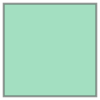

In [158]:
Emp_cells['geometry'][47]

In [159]:
# Emp_cells_h_code = Emp_cells[Emp_cells['h_geocode'] == '010030101001014']
# len(Emp_cells_h_code)

In [160]:
# >>> df.groupby(["state", "gender"], as_index=False)["last_name"].count()
Emp_cells_ = Emp_cells.select_dtypes(exclude=['geometry','object'])


In [161]:
Emp_cells_

,index_left,UR20,UACE20,UATYPE20,ALAND20,AWATER20,h_geocode,C000,CA01,CA02,...,CT01,CT02,CD01,CD02,CD03,CD04,CS01,CS02,row_num,cell
0,1720.0,NaN,NaN,NaN,5734300.0,56935.0,120710402061017,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,1
1,1720.0,NaN,NaN,NaN,5734300.0,56935.0,120710402061017,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1,1
2,1720.0,NaN,NaN,NaN,5734300.0,56935.0,120710402061017,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2,1
3,1720.0,NaN,NaN,NaN,5734300.0,56935.0,120710402061017,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3,1
4,1720.0,NaN,NaN,NaN,5734300.0,56935.0,120710402061017,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4342562,1720.0,NaN,NaN,NaN,5734300.0,56935.0,120710402061017,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,17794665,1
4342563,1720.0,NaN,NaN,NaN,5734300.0,56935.0,120710402061017,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,17794666,1
4342564,1720.0,NaN,NaN,NaN,5734300.0,56935.0,120710402061017,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,17794667,1
4342565,1720.0,NaN,NaN,NaN,5734300.0,56935.0,120710402061017,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,17794668,1


In [162]:
Emp_cells_sum = Emp_cells_.groupby(["h_geocode"], as_index=False).sum()
Emp_cells_sum

,h_geocode,index_left,UR20,UACE20,UATYPE20,ALAND20,AWATER20,C000,CA01,CA02,...,CT01,CT02,CD01,CD02,CD03,CD04,CS01,CS02,row_num,cell
0,120150101001000,1.060795e+09,0.0,0.0,0.0,1.126389e+13,2.132307e+10,698696.0,87337.0,349348.0,...,698696.0,0.0,0.0,174674.0,262011.0,262011.0,174674.0,524022.0,335339063464,87337
1,120150101001002,6.054900e+04,0.0,0.0,0.0,1.991190e+06,0.000000e+00,9.0,0.0,9.0,...,6.0,3.0,3.0,3.0,3.0,0.0,6.0,3.0,2206261,3
2,120150101001005,1.401949e+08,0.0,0.0,0.0,2.551227e+11,0.000000e+00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59093456972,12637
3,120150101001008,2.780976e+08,0.0,0.0,0.0,1.798106e+11,4.539698e+08,67690.0,0.0,40614.0,...,27076.0,40614.0,27076.0,13538.0,13538.0,13538.0,40614.0,27076.0,37136993256,13538
4,120150101001009,5.166660e+05,0.0,0.0,0.0,9.284736e+12,1.080843e+11,258333.0,0.0,172222.0,...,258333.0,0.0,0.0,86111.0,86111.0,86111.0,172222.0,86111.0,223227235066,86111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20226,121150027482000,4.118460e+05,0.0,0.0,0.0,1.363297e+08,5.848014e+06,747.0,249.0,249.0,...,747.0,0.0,0.0,249.0,249.0,249.0,249.0,498.0,1687291485,249
20227,121150027482002,3.765600e+04,0.0,0.0,0.0,3.679452e+06,1.564920e+05,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23030354,18
20228,121150027483000,4.758690e+05,0.0,0.0,0.0,2.448542e+08,3.260293e+07,381.0,0.0,381.0,...,381.0,0.0,0.0,381.0,0.0,0.0,0.0,381.0,3472510657,381
20229,121150027483005,3.024320e+05,0.0,0.0,0.0,1.033531e+07,1.698736e+06,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,569345893,52


In [163]:
del Emp_cells_

In [164]:
Emp_cells_sum = Emp_cells_sum.drop(['ALAND20','UR20','UACE20','UATYPE20','AWATER20','index_left'], axis = 1)
Emp_cells_sum

,h_geocode,C000,CA01,CA02,CA03,CE01,CE02,CE03,CNS01,CNS02,...,CT01,CT02,CD01,CD02,CD03,CD04,CS01,CS02,row_num,cell
0,120150101001000,698696.0,87337.0,349348.0,262011.0,174674.0,174674.0,349348.0,0.0,0.0,...,698696.0,0.0,0.0,174674.0,262011.0,262011.0,174674.0,524022.0,335339063464,87337
1,120150101001002,9.0,0.0,9.0,0.0,0.0,6.0,3.0,0.0,0.0,...,6.0,3.0,3.0,3.0,3.0,0.0,6.0,3.0,2206261,3
2,120150101001005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59093456972,12637
3,120150101001008,67690.0,0.0,40614.0,27076.0,13538.0,27076.0,27076.0,0.0,0.0,...,27076.0,40614.0,27076.0,13538.0,13538.0,13538.0,40614.0,27076.0,37136993256,13538
4,120150101001009,258333.0,0.0,172222.0,86111.0,0.0,86111.0,172222.0,0.0,0.0,...,258333.0,0.0,0.0,86111.0,86111.0,86111.0,172222.0,86111.0,223227235066,86111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20226,121150027482000,747.0,249.0,249.0,249.0,249.0,249.0,249.0,0.0,0.0,...,747.0,0.0,0.0,249.0,249.0,249.0,249.0,498.0,1687291485,249
20227,121150027482002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23030354,18
20228,121150027483000,381.0,0.0,381.0,0.0,0.0,0.0,381.0,0.0,0.0,...,381.0,0.0,0.0,381.0,0.0,0.0,0.0,381.0,3472510657,381
20229,121150027483005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,569345893,52


In [165]:
Emp_cells_sum = Emp_cells_sum.astype({"h_geocode":'int64'})

In [166]:
Emp_cells_sum = Emp_cells_sum [['h_geocode','cell']]

In [167]:
# Emp_cells_sum.to_csv('Emp_cells_sum.csv')

In [168]:
Emp_home_select_2030_part1_new2['h_geocode']

0        120710012051002
1        120210104111000
2        120210104081005
3        120810020031002
4        120810019042006
              ...       
34218    120810019142082
34219    120810007043047
34220    120810018021021
34221    120810004063010
34222    120810014051003
Name: h_geocode, Length: 34223, dtype: int64

In [169]:
Emp_home_select_2030_part1_new2 = Emp_home_select_2030_part1_new2.astype({"h_geocode":'int64'})
# Emp_home_select_2030_part2_new2 = Emp_home_select_2030_part2_new2.astype({"h_geocode":'int64'})


In [170]:
# Emp_home_select_2030_new2 = Emp_home_select_2030_new2.astype({"h_geocode":'int64'})

In [171]:
Emp_home_select_2030_part1_new2['C000'].sum()

55533.0

In [172]:
Emp_home_select_2030_new_values =  Emp_home_select_2030_part1_new2[Emp_home_select_2030_part1_new2['C000'] > 0]
len(Emp_home_select_2030_new_values)

15008

In [173]:
del Emp_home_select_2030_part1_new2

In [174]:
import pandas as pd

Emp_home_select_2030_new_values_merge = pd.merge(Emp_home_select_2030_new_values, Emp_cells_sum,  how='left', 
                left_on=['h_geocode'], right_on = ['h_geocode'])

In [32]:
import geopandas as gpd
#To read shapefile
fp12223121234e3 = "/Users/Malihafez/Documents/Mobile/Data/USA_Buildings/Florida/FL_Gulf_work_zones_noNull_2021_final.shp"
Emp_work = gpd.read_file(fp12223121234e3)


In [33]:
Emp_work['w_geocode']

0        120570022001068
1        120570121061003
2        120570037001002
3        120759701041127
4        120570121072010
              ...       
43998    120570130032008
43999    120759703031037
44000    120759701012040
44001    120570102183007
44002    120570139181005
Name: w_geocode, Length: 44003, dtype: object

In [177]:
del Emp_home_select_2030_new_values

In [34]:
Emp_work['geometry']= Emp_work['geometry'].to_crs('epsg:4326')

In [35]:
Emp_work_part1 = gpd.sjoin(Emp_work, part1, op="intersects", how='left')
Emp_work_part1.head()

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3448: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,GEOID20,NAME20,MTFCC20,UR20,UACE20,UATYPE20,...,CFA05,CFS01,CFS02,CFS03,CFS04,CFS05,createdate,geometry,index_right,COUNTYFP
0,12,057,002200,1068,120570022001068,Block 1068,G5040,NaN,NaN,NaN,...,0,0,0,0,0,0,20231016,"POLYGON ((-82.45630 27.98333, -82.45525 27.983...",NaN,NaN
1,12,057,012106,1003,120570121061003,Block 1003,G5040,NaN,NaN,NaN,...,0,0,0,0,0,0,20231016,"POLYGON ((-82.25272 28.01994, -82.24918 28.019...",NaN,NaN
2,12,057,003700,1002,120570037001002,Block 1002,G5040,NaN,NaN,NaN,...,0,0,0,0,0,0,20231016,"POLYGON ((-82.37367 27.96675, -82.37298 27.966...",NaN,NaN
3,12,075,970104,1127,120759701041127,Block 1127,G5040,NaN,NaN,NaN,...,0,0,0,0,0,0,20231016,"POLYGON ((-82.63823 29.44767, -82.63802 29.447...",NaN,NaN
4,12,057,012107,2010,120570121072010,Block 2010,G5040,NaN,NaN,NaN,...,0,0,0,0,0,0,20231016,"POLYGON ((-82.29411 27.98154, -82.29289 27.981...",NaN,NaN


In [36]:
Emp_work_part1= Emp_work_part1[~Emp_work_part1['COUNTYFP'].isna()]
Emp_work_part1

,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,GEOID20,NAME20,MTFCC20,UR20,UACE20,UATYPE20,...,CFA05,CFS01,CFS02,CFS03,CFS04,CFS05,createdate,geometry,index_right,COUNTYFP
9,12,021,011304,2009,120210113042009,Block 2009,G5040,NaN,NaN,NaN,...,0,0,0,0,0,0,20231016,"POLYGON ((-81.43523 26.42843, -81.43424 26.428...",5.0,021
15,12,021,000102,1033,120210001021033,Block 1033,G5040,NaN,NaN,NaN,...,0,0,0,0,0,0,20231016,"POLYGON ((-81.79587 26.14958, -81.79449 26.149...",5.0,021
16,12,021,011206,2003,120210112062003,Block 2003,G5040,NaN,NaN,NaN,...,0,0,0,0,0,0,20231016,"POLYGON ((-81.54530 26.28530, -81.53442 26.285...",5.0,021
17,12,021,011114,1006,120210111141006,Block 1006,G5040,NaN,NaN,NaN,...,0,0,0,0,0,0,20231016,"POLYGON ((-81.58065 26.12690, -81.58065 26.127...",5.0,021
58,12,115,000601,2024,121150006012024,Block 2024,G5040,NaN,NaN,NaN,...,0,0,0,0,0,0,20231016,"POLYGON ((-82.53674 27.30010, -82.53671 27.300...",4.0,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43986,12,021,010801,2000,120210108012000,Block 2000,G5040,NaN,NaN,NaN,...,0,0,0,0,0,0,20231016,"POLYGON ((-81.72085 26.09891, -81.72050 26.099...",5.0,021
43987,12,021,010300,3013,120210103003013,Block 3013,G5040,NaN,NaN,NaN,...,0,0,0,0,0,0,20231016,"POLYGON ((-81.79861 26.19522, -81.79598 26.195...",5.0,021
43989,12,021,010208,2001,120210102082001,Block 2001,G5040,NaN,NaN,NaN,...,0,0,0,0,0,0,20231016,"POLYGON ((-81.80221 26.23201, -81.80210 26.232...",5.0,021
43990,12,021,010511,2010,120210105112010,Block 2010,G5040,NaN,NaN,NaN,...,0,0,0,0,0,0,20231016,"POLYGON ((-81.69014 26.15579, -81.68997 26.155...",5.0,021


In [37]:
Emp_work_part1=Emp_work_part1.drop(['index_right','COUNTYFP'],axis=1)

In [38]:
Emp_work=Emp_work_part1.copy()

In [39]:
Emp_work.to_pickle('Emp_work.pickle')

In [183]:
del Emp_work_part1

In [184]:
# import geopandas as gpd
# #To read shapefile
# fp_od_main = "/Users/Malihafez/Documents/Mobile/Data/USA_Buildings/Florida/fl_od_main_JT00_2021.csv"
# OD_main = gpd.read_file(fp_od_main)

In [185]:
# OD_main=OD_main[['w_geocode', 'h_geocode']]

In [186]:
# OD_main.to_pickle("OD_main.pkl")

In [187]:
OD_main= pd.read_pickle("/Users/Malihafez/Documents/Mobile/Data/USA_Buildings/Florida/OD_main.pkl")

In [188]:
# Reg1_Y = OD_main.h_geocode[OD_main.w_geocode == '010970012001149'] #TO find employees homes for a specific working zone 
# Reg1_Y

In [189]:
OD_main

,w_geocode,h_geocode
0,120010002011000,120010006003047
1,120010002011000,120010012025015
2,120010002011000,120010017022003
3,120010002011000,120010019072015
4,120010002011000,120010022181001
...,...,...
7645809,121339703032101,121339703032084
7645810,121339703032101,121339703032092
7645811,121339703032101,121339703032096
7645812,121339703032142,120632101001066


In [190]:


OD_main = OD_main.astype({"h_geocode":'int64',"w_geocode":'int64' })

In [191]:
len(Emp_home_select_2030_new_values_merge)

15008

In [192]:
Emp_home_select_2030_new_values_merge

,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,GEOID20,NAME20,MTFCC20,UR20,UACE20,UATYPE20,...,CT02,CD01,CD02,CD03,CD04,CS01,CS02,createdate,geometry,cell
0,12,071,001205,1002,120710012051002,Block 1002,G5040,NaN,NaN,NaN,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,20231016,"POLYGON ((-81.84015 26.61223, -81.83993 26.612...",199.0
1,12,021,010411,1000,120210104111000,Block 1000,G5040,NaN,NaN,NaN,...,1.0,0.0,1.0,1.0,1.0,2.0,1.0,20231016,"POLYGON ((-81.69629 26.18436, -81.69546 26.184...",1.0
2,12,081,001904,2006,120810019042006,Block 2006,G5040,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,20231016,"POLYGON ((-82.52838 27.51722, -82.52836 27.518...",120.0
3,12,087,971800,1022,120879718001022,Block 1022,G5040,NaN,NaN,NaN,...,1.0,0.0,2.0,2.0,1.0,3.0,2.0,20231016,"POLYGON ((-81.73758 24.57436, -81.73680 24.574...",NaN
4,12,015,010100,1009,120150101001009,Block 1009,G5040,NaN,NaN,NaN,...,0.0,0.0,1.0,1.0,1.0,2.0,1.0,20231016,"POLYGON ((-81.95094 27.00205, -81.95092 27.002...",86111.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15003,12,081,002018,3029,120810020183029,Block 3029,G5040,NaN,NaN,NaN,...,0.0,2.0,1.0,6.0,2.0,6.0,5.0,20231016,"POLYGON ((-82.42543 27.48683, -82.42515 27.486...",21.0
15004,12,081,001914,2082,120810019142082,Block 2082,G5040,NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,20231016,"POLYGON ((-82.36136 27.55343, -82.36129 27.553...",15.0
15005,12,081,000704,3047,120810007043047,Block 3047,G5040,NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,20231016,"POLYGON ((-82.53952 27.49138, -82.53849 27.491...",3.0
15006,12,081,000406,3010,120810004063010,Block 3010,G5040,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,20231016,"POLYGON ((-82.61226 27.47755, -82.61029 27.477...",4.0


In [193]:
Emp_home_select_2030_new_values_merge['cell'] = Emp_home_select_2030_new_values_merge['cell'].fillna(0)


In [194]:
Emp_home_select_2030_new_values_merge['C000'].unique()

array([ 2.,  3.,  5.,  1.,  4., 14.,  7.,  8., 21., 11.,  6., 40.,  9.,
       13., 10., 29., 12., 18., 15., 25., 19., 16., 17., 23., 20., 35.,
       24., 31., 38., 44., 26., 43., 27., 22., 45., 41., 32., 28., 33.,
       34., 48., 46., 39., 49., 42., 30., 59., 37., 36., 54., 52., 51.,
       63.])

In [195]:
# Emp_home_select_2030_new_values_merge['C000'] = Emp_home_select_2030_new_values_merge['C000'].fillna(0)


In [196]:
# Emp_home_select_2030_new_values_merge_s = Emp_home_select_2030_new_values_merge[Emp_home_select_2030_new_values_merge['cell'] == 0]


In [197]:
# Emp_home_select_2030_new_values_merge= pd.read_pickle('Emp_home_select_2030_new_values_merge_2030.pkl')

In [198]:
# number of projected employees are more than number of cells

Emp_home_select_2030_new_values_merge_s = Emp_home_select_2030_new_values_merge[Emp_home_select_2030_new_values_merge['C000']- Emp_home_select_2030_new_values_merge['cell'] > 0]


len(Emp_home_select_2030_new_values_merge_s)

7447

In [199]:
Emp_home_select_2030_new_values_merge.to_pickle('Emp_home_select_2030_new_values_merge_2030.pkl')

In [200]:
del Emp_home_select_2030_new_values_merge

In [201]:
Emp_home_select_2030_new_values_merge_s['C000'].sum()

34888.0

In [202]:
Emp_home_select_2030_new_values_merge_s_dup = Emp_home_select_2030_new_values_merge_s.drop_duplicates(subset=['h_geocode'])
Emp_home_select_2030_new_values_merge_s_dup['h_geocode']

1        120210104111000
3        120879718001022
13       120710011031001
18       120810012033009
25       120879718004003
              ...       
14998    120810012023031
14999    120879714012008
15001    120810020053012
15002    120879714011032
15007    120810014051003
Name: h_geocode, Length: 7447, dtype: int64

In [203]:
del Emp_home_select_2030_new_values_merge_s_dup

In [204]:
Emp_home_select_2030_new_values_merge_s['h_geocode']

1        120210104111000
3        120879718001022
13       120710011031001
18       120810012033009
25       120879718004003
              ...       
14998    120810012023031
14999    120879714012008
15001    120810020053012
15002    120879714011032
15007    120810014051003
Name: h_geocode, Length: 7447, dtype: int64

In [205]:
Emp_home_select_2030_new_values_merge_s['C000']

1         3.0
3         5.0
13        2.0
18        1.0
25        2.0
         ... 
14998     3.0
14999     3.0
15001     6.0
15002    16.0
15007     7.0
Name: C000, Length: 7447, dtype: float64

In [206]:
Emp_home_select_2030_new_values_merge_s['cell']

1        1.0
3        0.0
13       1.0
18       0.0
25       0.0
        ... 
14998    0.0
14999    0.0
15001    0.0
15002    0.0
15007    0.0
Name: cell, Length: 7447, dtype: float64

In [207]:
Emp_home_select_2030_new_values_merge_home_work = pd.merge(Emp_home_select_2030_new_values_merge_s, OD_main,  how='left', 
                left_on=['h_geocode'], right_on = ['h_geocode'])

In [208]:
del Emp_home_select_2030_new_values_merge_s

In [209]:
Emp_home_select_2030_new_values_merge_home_work['h_geocode']

0         120210104111000
1         120210104111000
2         120210104111000
3         120210104111000
4         120210104111000
               ...       
128112    120879714011032
128113    120879714011032
128114    120810014051003
128115    120810014051003
128116    120810014051003
Name: h_geocode, Length: 128117, dtype: int64

In [210]:
Emp_work_geo = Emp_work[['w_geocode','geometry']]


In [211]:
del Emp_work

In [212]:
# To drop Null values in h_geocode
Emp_work_geo_select = []

Emp_work_geo_select = Emp_work_geo.dropna(subset=['w_geocode'])
Emp_work_geo_select

,w_geocode,geometry
9,120210113042009,"POLYGON ((-81.43523 26.42843, -81.43424 26.428..."
15,120210001021033,"POLYGON ((-81.79587 26.14958, -81.79449 26.149..."
16,120210112062003,"POLYGON ((-81.54530 26.28530, -81.53442 26.285..."
17,120210111141006,"POLYGON ((-81.58065 26.12690, -81.58065 26.127..."
58,121150006012024,"POLYGON ((-82.53674 27.30010, -82.53671 27.300..."
...,...,...
43986,120210108012000,"POLYGON ((-81.72085 26.09891, -81.72050 26.099..."
43987,120210103003013,"POLYGON ((-81.79861 26.19522, -81.79598 26.195..."
43989,120210102082001,"POLYGON ((-81.80221 26.23201, -81.80210 26.232..."
43990,120210105112010,"POLYGON ((-81.69014 26.15579, -81.68997 26.155..."


In [213]:
del Emp_work_geo

In [214]:
Emp_work_geo_select = Emp_work_geo_select.astype({"w_geocode":'int64'})

In [215]:
Emp_work_geo_select.to_pickle("Emp_work_geo_select.pkl")

In [216]:
Emp_home_select_2030_new_values_home_work2 = pd.merge(Emp_home_select_2030_new_values_merge_home_work, Emp_work_geo_select,  how='left', 
                left_on=['w_geocode'], right_on = ['w_geocode'])

In [217]:
del Emp_home_select_2030_new_values_merge_home_work

In [218]:
Emp_home_select_2030_new_values_home_work2['geometry_y'].crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [219]:

# Emp_home_select_2030_new_values_home_work2['geometry_y'] = Emp_home_select_2030_new_values_home_work2['geometry_y'].to_crs('epsg:4326')


In [220]:
len(Emp_home_select_2030_new_values_home_work2)

129125

In [221]:
Emp_home_select_2030_new_values_home_work2['geometry_y'].crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [222]:
#The following home zone doesn't have work zone in AL State, so we will find the closest available zone using (find_cells) 

Emp_home_select_2030_new_values_home_work2[Emp_home_select_2030_new_values_home_work2['GEOID20']== '010030107032226']    




,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,GEOID20,NAME20,MTFCC20,UR20,UACE20,UATYPE20,...,CD02,CD03,CD04,CS01,CS02,createdate,geometry_x,cell,w_geocode,geometry_y


In [223]:
# To drop Null values in h_geocode
#geometry_x for h_geocode #geometry_y for w_geocode

Emp_home_select_2030_new_values_home_work3 = []

Emp_home_select_2030_new_values_home_work3 = Emp_home_select_2030_new_values_home_work2.dropna(subset=['geometry_y'])
Emp_home_select_2030_new_values_home_work3

,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,GEOID20,NAME20,MTFCC20,UR20,UACE20,UATYPE20,...,CD02,CD03,CD04,CS01,CS02,createdate,geometry_x,cell,w_geocode,geometry_y
18,12,021,010411,1000,120210104111000,Block 1000,G5040,NaN,NaN,NaN,...,1.0,1.0,1.0,2.0,1.0,20231016,"POLYGON ((-81.69629 26.18436, -81.69546 26.184...",1.0,1.201501e+14,"POLYGON ((-82.05433 26.93447, -82.05327 26.935..."
19,12,021,010411,1000,120210104111000,Block 1000,G5040,NaN,NaN,NaN,...,1.0,1.0,1.0,2.0,1.0,20231016,"POLYGON ((-81.69629 26.18436, -81.69546 26.184...",1.0,1.201502e+14,"POLYGON ((-82.09699 26.98175, -82.09643 26.981..."
20,12,021,010411,1000,120210104111000,Block 1000,G5040,NaN,NaN,NaN,...,1.0,1.0,1.0,2.0,1.0,20231016,"POLYGON ((-81.69629 26.18436, -81.69546 26.184...",1.0,1.201503e+14,"POLYGON ((-82.31368 26.87218, -82.31348 26.872..."
21,12,021,010411,1000,120210104111000,Block 1000,G5040,NaN,NaN,NaN,...,1.0,1.0,1.0,2.0,1.0,20231016,"POLYGON ((-81.69629 26.18436, -81.69546 26.184...",1.0,1.202100e+14,"POLYGON ((-81.79617 26.14173, -81.79574 26.141..."
22,12,021,010411,1000,120210104111000,Block 1000,G5040,NaN,NaN,NaN,...,1.0,1.0,1.0,2.0,1.0,20231016,"POLYGON ((-81.69629 26.18436, -81.69546 26.184...",1.0,1.202100e+14,"POLYGON ((-81.79816 26.14148, -81.79755 26.141..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129120,12,087,971401,1032,120879714011032,Block 1032,G5040,NaN,NaN,NaN,...,8.0,8.0,0.0,8.0,8.0,20231016,"POLYGON ((-81.35092 24.67245, -81.35092 24.672...",0.0,1.208797e+14,"POLYGON ((-81.36233 24.67438, -81.36080 24.674..."
129121,12,087,971401,1032,120879714011032,Block 1032,G5040,NaN,NaN,NaN,...,8.0,8.0,0.0,8.0,8.0,20231016,"POLYGON ((-81.35092 24.67245, -81.35092 24.672...",0.0,1.208797e+14,"POLYGON ((-81.37497 24.65190, -81.37496 24.651..."
129122,12,081,001405,1003,120810014051003,Block 1003,G5040,NaN,NaN,NaN,...,0.0,5.0,2.0,7.0,0.0,20231016,"POLYGON ((-82.57562 27.52858, -82.57510 27.528...",0.0,1.208100e+14,"POLYGON ((-82.55469 27.57930, -82.55467 27.579..."
129123,12,081,001405,1003,120810014051003,Block 1003,G5040,NaN,NaN,NaN,...,0.0,5.0,2.0,7.0,0.0,20231016,"POLYGON ((-82.57562 27.52858, -82.57510 27.528...",0.0,1.208100e+14,"POLYGON ((-82.49139 27.56843, -82.49139 27.569..."


In [224]:
# work_zones_010970028001003 = Emp_home_select_2030_new_values_home_work3[Emp_home_select_2030_new_values_home_work3['GEOID10']=='010970028001003']     

# work_zones_010970028001003 = work_zones_010970028001003[['w_geocode','geometry_y']]

# work_zones_010970028001003_geo = gpd.GeoDataFrame(work_zones_010970028001003, geometry='geometry_y')
# work_zones_010970028001003_geo


In [225]:
# work_zones_010970028001003_geo.to_file('work_zones_010970028001003.shp')

In [226]:
Emp_home_select_2030_new_values_home_work3= Emp_home_select_2030_new_values_home_work3.reset_index()
Emp_home_select_2030_new_values_home_work3=Emp_home_select_2030_new_values_home_work3.drop(['index'],axis=1)

In [227]:
Emp_home_select_2030_new_values_home_work3['centr_x'] = ''
Emp_home_select_2030_new_values_home_work3['centr_y'] = ''

# Emp_home_select_2030_new_values_home_work3.columns.get_loc("centr_x")]   #this works with .iloc

for n in range(0,len(Emp_home_select_2030_new_values_home_work3)):
    Emp_home_select_2030_new_values_home_work3.loc[n,"centr_x"]\
    = Emp_home_select_2030_new_values_home_work3.loc[n,"geometry_x"].centroid.wkt
    
    Emp_home_select_2030_new_values_home_work3.loc[n,"centr_y"]\
    = Emp_home_select_2030_new_values_home_work3.loc[n,"geometry_y"].centroid.wkt

In [228]:
Emp_home_select_2030_new_values_home_work3

,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,GEOID20,NAME20,MTFCC20,UR20,UACE20,UATYPE20,...,CD04,CS01,CS02,createdate,geometry_x,cell,w_geocode,geometry_y,centr_x,centr_y
0,12,021,010411,1000,120210104111000,Block 1000,G5040,NaN,NaN,NaN,...,1.0,2.0,1.0,20231016,"POLYGON ((-81.69629 26.18436, -81.69546 26.184...",1.0,1.201501e+14,"POLYGON ((-82.05433 26.93447, -82.05327 26.935...",POINT (-81.6910071583963 26.17873453814607),POINT (-82.05331796029205 26.93439762579085)
1,12,021,010411,1000,120210104111000,Block 1000,G5040,NaN,NaN,NaN,...,1.0,2.0,1.0,20231016,"POLYGON ((-81.69629 26.18436, -81.69546 26.184...",1.0,1.201502e+14,"POLYGON ((-82.09699 26.98175, -82.09643 26.981...",POINT (-81.6910071583963 26.17873453814607),POINT (-82.09649440055361 26.9808889148566)
2,12,021,010411,1000,120210104111000,Block 1000,G5040,NaN,NaN,NaN,...,1.0,2.0,1.0,20231016,"POLYGON ((-81.69629 26.18436, -81.69546 26.184...",1.0,1.201503e+14,"POLYGON ((-82.31368 26.87218, -82.31348 26.872...",POINT (-81.6910071583963 26.17873453814607),POINT (-82.30327071811553 26.860402456636013)
3,12,021,010411,1000,120210104111000,Block 1000,G5040,NaN,NaN,NaN,...,1.0,2.0,1.0,20231016,"POLYGON ((-81.69629 26.18436, -81.69546 26.184...",1.0,1.202100e+14,"POLYGON ((-81.79617 26.14173, -81.79574 26.141...",POINT (-81.6910071583963 26.17873453814607),POINT (-81.79539780066347 26.141267416108125)
4,12,021,010411,1000,120210104111000,Block 1000,G5040,NaN,NaN,NaN,...,1.0,2.0,1.0,20231016,"POLYGON ((-81.69629 26.18436, -81.69546 26.184...",1.0,1.202100e+14,"POLYGON ((-81.79816 26.14148, -81.79755 26.141...",POINT (-81.6910071583963 26.17873453814607),POINT (-81.7971184750831 26.141332857440016)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94254,12,087,971401,1032,120879714011032,Block 1032,G5040,NaN,NaN,NaN,...,0.0,8.0,8.0,20231016,"POLYGON ((-81.35092 24.67245, -81.35092 24.672...",0.0,1.208797e+14,"POLYGON ((-81.36233 24.67438, -81.36080 24.674...",POINT (-81.35060508777484 24.67234482418839),POINT (-81.35947862744457 24.67194887577219)
94255,12,087,971401,1032,120879714011032,Block 1032,G5040,NaN,NaN,NaN,...,0.0,8.0,8.0,20231016,"POLYGON ((-81.35092 24.67245, -81.35092 24.672...",0.0,1.208797e+14,"POLYGON ((-81.37497 24.65190, -81.37496 24.651...",POINT (-81.35060508777484 24.67234482418839),POINT (-81.36479137755698 24.662587265784047)
94256,12,081,001405,1003,120810014051003,Block 1003,G5040,NaN,NaN,NaN,...,2.0,7.0,0.0,20231016,"POLYGON ((-82.57562 27.52858, -82.57510 27.528...",0.0,1.208100e+14,"POLYGON ((-82.55469 27.57930, -82.55467 27.579...",POINT (-82.57536581542169 27.528115444660585),POINT (-82.55211582638482 27.580899986583574)
94257,12,081,001405,1003,120810014051003,Block 1003,G5040,NaN,NaN,NaN,...,2.0,7.0,0.0,20231016,"POLYGON ((-82.57562 27.52858, -82.57510 27.528...",0.0,1.208100e+14,"POLYGON ((-82.49139 27.56843, -82.49139 27.569...",POINT (-82.57536581542169 27.528115444660585),POINT (-82.48549868485239 27.571010911913238)


In [229]:
from shapely import wkt
import geopandas as gpd

Emp_home_select_2030_new_values_home_work3['centr_x'] = gpd.GeoSeries.from_wkt(Emp_home_select_2030_new_values_home_work3['centr_x'])
Emp_home_select_2030_new_values_home_work3['centr_y'] = gpd.GeoSeries.from_wkt(Emp_home_select_2030_new_values_home_work3['centr_y'])

Emp_home_select_2030_new_values_home_work3 = gpd.GeoDataFrame(Emp_home_select_2030_new_values_home_work3, geometry='centr_x')
Emp_home_select_2030_new_values_home_work3 = gpd.GeoDataFrame(Emp_home_select_2030_new_values_home_work3, geometry='centr_y')

Emp_home_select_2030_new_values_home_work3

,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,GEOID20,NAME20,MTFCC20,UR20,UACE20,UATYPE20,...,CD04,CS01,CS02,createdate,geometry_x,cell,w_geocode,geometry_y,centr_x,centr_y
0,12,021,010411,1000,120210104111000,Block 1000,G5040,NaN,NaN,NaN,...,1.0,2.0,1.0,20231016,"POLYGON ((-81.69629 26.18436, -81.69546 26.184...",1.0,1.201501e+14,"POLYGON ((-82.05433 26.93447, -82.05327 26.935...",POINT (-81.69101 26.17873),POINT (-82.05332 26.93440)
1,12,021,010411,1000,120210104111000,Block 1000,G5040,NaN,NaN,NaN,...,1.0,2.0,1.0,20231016,"POLYGON ((-81.69629 26.18436, -81.69546 26.184...",1.0,1.201502e+14,"POLYGON ((-82.09699 26.98175, -82.09643 26.981...",POINT (-81.69101 26.17873),POINT (-82.09649 26.98089)
2,12,021,010411,1000,120210104111000,Block 1000,G5040,NaN,NaN,NaN,...,1.0,2.0,1.0,20231016,"POLYGON ((-81.69629 26.18436, -81.69546 26.184...",1.0,1.201503e+14,"POLYGON ((-82.31368 26.87218, -82.31348 26.872...",POINT (-81.69101 26.17873),POINT (-82.30327 26.86040)
3,12,021,010411,1000,120210104111000,Block 1000,G5040,NaN,NaN,NaN,...,1.0,2.0,1.0,20231016,"POLYGON ((-81.69629 26.18436, -81.69546 26.184...",1.0,1.202100e+14,"POLYGON ((-81.79617 26.14173, -81.79574 26.141...",POINT (-81.69101 26.17873),POINT (-81.79540 26.14127)
4,12,021,010411,1000,120210104111000,Block 1000,G5040,NaN,NaN,NaN,...,1.0,2.0,1.0,20231016,"POLYGON ((-81.69629 26.18436, -81.69546 26.184...",1.0,1.202100e+14,"POLYGON ((-81.79816 26.14148, -81.79755 26.141...",POINT (-81.69101 26.17873),POINT (-81.79712 26.14133)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94254,12,087,971401,1032,120879714011032,Block 1032,G5040,NaN,NaN,NaN,...,0.0,8.0,8.0,20231016,"POLYGON ((-81.35092 24.67245, -81.35092 24.672...",0.0,1.208797e+14,"POLYGON ((-81.36233 24.67438, -81.36080 24.674...",POINT (-81.35061 24.67234),POINT (-81.35948 24.67195)
94255,12,087,971401,1032,120879714011032,Block 1032,G5040,NaN,NaN,NaN,...,0.0,8.0,8.0,20231016,"POLYGON ((-81.35092 24.67245, -81.35092 24.672...",0.0,1.208797e+14,"POLYGON ((-81.37497 24.65190, -81.37496 24.651...",POINT (-81.35061 24.67234),POINT (-81.36479 24.66259)
94256,12,081,001405,1003,120810014051003,Block 1003,G5040,NaN,NaN,NaN,...,2.0,7.0,0.0,20231016,"POLYGON ((-82.57562 27.52858, -82.57510 27.528...",0.0,1.208100e+14,"POLYGON ((-82.55469 27.57930, -82.55467 27.579...",POINT (-82.57537 27.52812),POINT (-82.55212 27.58090)
94257,12,081,001405,1003,120810014051003,Block 1003,G5040,NaN,NaN,NaN,...,2.0,7.0,0.0,20231016,"POLYGON ((-82.57562 27.52858, -82.57510 27.528...",0.0,1.208100e+14,"POLYGON ((-82.49139 27.56843, -82.49139 27.569...",POINT (-82.57537 27.52812),POINT (-82.48550 27.57101)


In [230]:
from shapely.ops import transform

# Emp_home_select_2030_new_values_home_work3.columns.get_loc("centr_x") #this works with .iloc

for n in range(0,len(Emp_home_select_2030_new_values_home_work3)):
    Emp_home_select_2030_new_values_home_work3.loc[n, "centr_x"] = transform(lambda x, y: (y, x), Emp_home_select_2030_new_values_home_work3.loc[n, "centr_x"])
#    
    Emp_home_select_2030_new_values_home_work3.loc[n, "centr_y"] = transform(lambda x, y: (y, x), Emp_home_select_2030_new_values_home_work3.loc[n, "centr_y"])

In [231]:

coord_list_x =  Emp_home_select_2030_new_values_home_work3['centr_x'].geometry.apply(lambda p: list(p.coords)[0])

coord_list_y =  Emp_home_select_2030_new_values_home_work3['centr_y'].geometry.apply(lambda p: list(p.coords)[0])


# rc = dataset_ex[column_name].apply(lambda x: pd.Series(x, dtype="object"))


Emp_home_select_2030_new_values_home_work3['centr_x_co'] = coord_list_x

Emp_home_select_2030_new_values_home_work3['centr_y_co'] = coord_list_y

In [232]:
from geopy.distance import geodesic as GD  

Emp_home_select_2030_new_values_home_work3['dist'] = ''

# Emp_home_select_2030_new_values_home_work3.columns.get_loc("dist") #this works with .iloc

for n in range(0,len(Emp_home_select_2030_new_values_home_work3)):
#     print('n=',n)
    Emp_home_select_2030_new_values_home_work3.loc[n,"dist"]\
    = GD(Emp_home_select_2030_new_values_home_work3.loc[n,"centr_x_co"],Emp_home_select_2030_new_values_home_work3.loc[n,"centr_y_co"]).km


In [233]:
#Remove those zones that w_geocode is the same as h_geocode (zones people live and work in the same one)

Emp_home_select_2030_new_values_home_work3___ = Emp_home_select_2030_new_values_home_work3[Emp_home_select_2030_new_values_home_work3['w_geocode']!=Emp_home_select_2030_new_values_home_work3['h_geocode']]


len(Emp_home_select_2030_new_values_home_work3___)


94163

In [234]:
Emp_home_select_2030_new_values_home_work3_ = Emp_home_select_2030_new_values_home_work3___.select_dtypes(exclude=['geometry'])


In [235]:
len(Emp_home_select_2030_new_values_home_work3_)

94163

In [236]:
len(Emp_home_select_2030_new_values_home_work3_['h_geocode'].unique())

7312

In [237]:
# Emp_home_select_2030_new_values_home_work3___ = Emp_home_select_2030_new_values_home_work3___.astype({"dist":'float'})


In [238]:
Emp_home_select_2030_new_values_home_work3_final =\
    Emp_home_select_2030_new_values_home_work3.loc[Emp_home_select_2030_new_values_home_work3_.groupby(['h_geocode'])['dist'].idxmin()].sort_index()


In [239]:
len(Emp_home_select_2030_new_values_home_work3_final)

7312

In [240]:
Emp_home_select_2030_new_values_home_work3_final

,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,GEOID20,NAME20,MTFCC20,UR20,UACE20,UATYPE20,...,createdate,geometry_x,cell,w_geocode,geometry_y,centr_x,centr_y,centr_x_co,centr_y_co,dist
70,12,021,010411,1000,120210104111000,Block 1000,G5040,NaN,NaN,NaN,...,20231016,"POLYGON ((-81.69629 26.18436, -81.69546 26.184...",1.0,1.202101e+14,"POLYGON ((-81.69349 26.18439, -81.69255 26.184...",POINT (26.17873 -81.69101),POINT (26.18358 -81.69301),"(26.17873453814607, -81.6910071583963)","(26.183581036298147, -81.69300620639005)",0.572927
241,12,087,971800,1022,120879718001022,Block 1022,G5040,NaN,NaN,NaN,...,20231016,"POLYGON ((-81.73758 24.57436, -81.73680 24.574...",0.0,1.208797e+14,"POLYGON ((-81.73600 24.56951, -81.73600 24.569...",POINT (24.56733 -81.73019),POINT (24.57052 -81.73536),"(24.567331297140306, -81.73018543710354)","(24.570518191572866, -81.73536038670079)",0.631994
333,12,071,001103,1001,120710011031001,Block 1001,G5040,NaN,NaN,NaN,...,20231016,"POLYGON ((-81.86586 26.60004, -81.86581 26.600...",1.0,1.207100e+14,"POLYGON ((-81.86609 26.59917, -81.86607 26.599...",POINT (26.60193 -81.86374),POINT (26.59859 -81.86405),"(26.601926185131596, -81.8637396040703)","(26.5985920626661, -81.86405346779831)",0.370732
514,12,081,001203,3009,120810012033009,Block 3009,G5040,NaN,NaN,NaN,...,20231016,"POLYGON ((-82.63235 27.49955, -82.63226 27.499...",0.0,1.208100e+14,"POLYGON ((-82.63251 27.50030, -82.63246 27.502...",POINT (27.49798 -82.63136),POINT (27.49867 -82.63016),"(27.497975130991843, -82.63136242372335)","(27.498670917393937, -82.63015747177204)",0.141849
604,12,087,971800,4003,120879718004003,Block 4003,G5040,NaN,NaN,NaN,...,20231016,"POLYGON ((-81.74852 24.56890, -81.74843 24.568...",0.0,1.208797e+14,"POLYGON ((-81.74400 24.56519, -81.74399 24.565...",POINT (24.56775 -81.74625),POINT (24.56538 -81.74241),"(24.56775398307633, -81.7462514793857)","(24.565379182710526, -81.74240863535302)",0.469827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94243,12,081,001202,3031,120810012023031,Block 3031,G5040,NaN,NaN,NaN,...,20231016,"POLYGON ((-82.58974 27.49651, -82.58858 27.496...",0.0,1.208100e+14,"POLYGON ((-82.57579 27.49460, -82.57579 27.495...",POINT (27.49606 -82.58915),POINT (27.49486 -82.57549),"(27.496061887125958, -82.58915487216629)","(27.494858980556387, -82.57549001592827)",1.356872
94248,12,087,971401,2008,120879714012008,Block 2008,G5040,NaN,NaN,NaN,...,20231016,"POLYGON ((-81.35804 24.68464, -81.35804 24.684...",0.0,1.208797e+14,"POLYGON ((-81.39824 24.62321, -81.39823 24.623...",POINT (24.68455 -81.35705),POINT (24.62470 -81.39066),"(24.68455255400899, -81.35704563857345)","(24.624703343682665, -81.3906628859871)",7.45181
94250,12,081,002005,3012,120810020053012,Block 3012,G5040,NaN,NaN,NaN,...,20231016,"POLYGON ((-82.46135 27.42183, -82.46110 27.421...",0.0,1.208100e+14,"POLYGON ((-82.46998 27.44141, -82.46993 27.441...",POINT (27.42139 -82.46045),POINT (27.44199 -82.46889),"(27.42138969619264, -82.46045010240772)","(27.441985943631245, -82.46888966393976)",2.430039
94254,12,087,971401,1032,120879714011032,Block 1032,G5040,NaN,NaN,NaN,...,20231016,"POLYGON ((-81.35092 24.67245, -81.35092 24.672...",0.0,1.208797e+14,"POLYGON ((-81.36233 24.67438, -81.36080 24.674...",POINT (24.67234 -81.35061),POINT (24.67195 -81.35948),"(24.67234482418839, -81.35060508777484)","(24.67194887577219, -81.35947862744457)",0.899217


In [241]:
# sorted(Emp_home_select_2030_new_values_home_work3_final['dist'])

In [242]:
# Emp_home_select_2030_new_values_home_work3_final[
#     Emp_home_select_2030_new_values_home_work3_final['dist']==0.6516345461452865]


In [205]:
# Emp_home_select_2030_new_values_home_work3_[
#     Emp_home_select_2030_new_values_home_work3_['h_geocode']==10970032032019]['dist'].min()


In [206]:
# len(Emp_home_select_2030_new_values_home_work3_final['dist'].unique())

In [207]:
# df1_dup= pd.DataFrame(Emp_home_select_2030_new_values_home_work3_final.pivot_table(index=['dist'], aggfunc='size'), columns=['size'])

# df1_dup[df1_dup['size']>1]


In [197]:
# n = 1_000
# df = pd.DataFrame({
#     'A': np.random.randint(0, 20, n),
#     'B': np.random.randint(0, 20, n),
#     'C': np.random.uniform(size=n),
#     'D': np.random.choice(list('abcdefghijklmnopqrstuvwxyz'), size=n),
# })

In [198]:
# df

In [199]:
# out =df.loc[df.groupby(['A', 'B'])['C'].idxmax()].sort_index()
# out

In [200]:
#For example, to retain the full row where 'C' takes its max, for each group of ['A', 'B'], we would do:

# %timeit df.loc[df.groupby(['A', 'B'])['C'].idxmax()].sort_index()
# # 101 ms ± 98.7 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)

# %timeit df.sort_values(['C', 'A', 'B'], ascending=False).drop_duplicates(['A', 'B']).sort_index()
# # 667 ms ± 784 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)

In [288]:
# #old way #no need 

# Emp_home_select_2030_new_values_home_work3_min = Emp_home_select_2030_new_values_home_work3_.groupby(["h_geocode"], as_index=False).min()
# Emp_home_select_2030_new_values_home_work3_min = Emp_home_select_2030_new_values_home_work3_min[['dist']]
# # Emp_home_select_2030_new_values_home_work3_min = Emp_home_select_2030_new_values_home_work3_min.astype({"dist":'float'})

# Emp_home_select_2030_new_values_home_work3_final2 =  pd.merge(Emp_home_select_2030_new_values_home_work3_min, Emp_home_select_2030_new_values_home_work3___,  how='left', 
#                 left_on=['dist'], right_on = ['dist'])
# len(Emp_home_select_2030_new_values_home_work3_final2)



In [243]:
Emp_home_select_2030_new_values_home_work3_final_missing = Emp_home_select_2030_new_values_home_work2.loc[~Emp_home_select_2030_new_values_home_work2['GEOID20'].isin(Emp_home_select_2030_new_values_home_work3_final['GEOID20'])]
len(Emp_home_select_2030_new_values_home_work3_final_missing)


223

In [244]:
len(Emp_home_select_2030_new_values_home_work3_final)

7312

In [245]:
del Emp_home_select_2030_new_values_home_work2

In [246]:
import pandas as pd 
Emp_home_select_2030_new_values_home_work3_final_=pd.concat([Emp_home_select_2030_new_values_home_work3_final, Emp_home_select_2030_new_values_home_work3_final_missing], axis=0)
len(Emp_home_select_2030_new_values_home_work3_final_)


7535

In [247]:
Emp_home_select_2030_new_values_home_work3_final['C000'].sum()

34245.0

In [248]:
Emp_home_select_2030_new_values_home_work3_final_['C000'].sum()

35228.0

In [249]:
Emp_home_select_2030_new_values_home_work3_final_['C000']

70         3.0
241        5.0
333        2.0
514        1.0
604        2.0
          ... 
128664     4.0
128665     4.0
128769     3.0
128770     3.0
129000    15.0
Name: C000, Length: 7535, dtype: float64

In [250]:
Emp_home_select_2030_new_values_home_work3_final_['C000'].sum()

35228.0

In [251]:
select = Emp_home_select_2030_new_values_home_work3_final_

In [252]:
 #geometry_x for h_geocode #geometry_y for w_geocode
select= select[['h_geocode','geometry_x','C000','CA01','CA02','CA03','CR01','CR02','CR03','CR04','CR05','CR07','CE01',
                'CE02','CE03','CT01','CT02','CD01','CD02','CD03','CD04','CS01','CS02','CNS01','CNS02','CNS03','CNS04',
                'CNS05','CNS06','CNS07','CNS08','CNS09','CNS10','CNS11','CNS12','CNS13','CNS14','CNS15','CNS16',
                'CNS17','CNS18','CNS19','CNS20','cell','w_geocode','geometry_y','dist']] 

In [253]:
len(select)

7535

In [254]:
select_min_select2 = select

In [255]:
del select

In [256]:
# h_geocode_x is h_geocode associated with each w_geocode
# h_geocode_y is original h_geocode (projected employees)
#geometry_x for h_geocode_y #geometry_y for w_geocode



select_min_OD = pd.merge(OD_main, select_min_select2,  how='right', 
                left_on=['w_geocode'], right_on = ['w_geocode'])

In [257]:
len(select_min_OD)

3517742

In [258]:
# len(select_min_OD)

In [259]:
select_hgeocode = pd.merge(select_min_OD, Emp_cells_sum,  how='left', 
                left_on=['h_geocode_x'], right_on = ['h_geocode'])

In [260]:
del OD_main

In [261]:
del select_min_OD

In [262]:
len(select_hgeocode)

3517742

In [263]:
#cell_y for h_geocode_x (associate with each w_geocode)
select_hgeocode =  select_hgeocode.dropna(subset=['cell_y'])
len(select_hgeocode)

1802015

In [264]:
# select_hgeocode = select_hgeocode.drop(['row_num'], axis = 1)
select_hgeocode = select_hgeocode.astype({"h_geocode":'int64'})


In [265]:
Emp_home_select = pd.read_pickle('Emp_home_select.pickle')

In [266]:
Emp_home_geo = Emp_home_select[['geometry','h_geocode']]
Emp_home_geo= Emp_home_geo.astype ({"h_geocode":'int64'})


In [267]:
del Emp_home_select

In [268]:
Emp_home_geo.to_pickle("Emp_home_geo.pkl")

In [269]:
Emp_home_geo= pd.read_pickle('Emp_home_geo.pkl')

In [270]:
len(Emp_home_geo)

34223

In [271]:
Emp_home_geo

,geometry,h_geocode
54,"POLYGON ((-81.70222 26.25009, -81.70186 26.250...",120210104352008
55,"POLYGON ((-81.71808 26.24722, -81.71795 26.247...",120210104351004
56,"POLYGON ((-81.79335 26.17518, -81.79232 26.175...",120210002001025
57,"POLYGON ((-81.43775 26.42658, -81.43746 26.426...",120210113042013
58,"POLYGON ((-81.43369 26.42571, -81.43158 26.425...",120210114002005
...,...,...
143190,"POLYGON ((-82.48703 27.56261, -82.48697 27.562...",120810019081011
143191,"POLYGON ((-82.57396 27.45439, -82.57092 27.454...",120810002014001
143192,"POLYGON ((-82.57562 27.52858, -82.57510 27.528...",120810014051003
143311,"POLYGON ((-82.12026 27.26250, -82.11883 27.265...",120810020102028


In [272]:
select_hgeocode['geometry_x1'] = select_hgeocode['geometry_x']
select_hgeocode['geometry_y1'] = select_hgeocode['geometry_y']

In [273]:
select_hgeocode = select_hgeocode.drop(['geometry_x','geometry_y'], axis = 1)


In [274]:
# h_geocode_x is h_geocode associated with each w_geocode
# h_geocode_y is original h_geocode (projected employees)
#geometry_x1 for h_geocode_y        #geometry for h_geocode_x       #geometry_y1 for w_geocode
#cell_x for h_geocode_y #cell_y for h_geocode_x


select_hgeocode_geo = pd.merge(select_hgeocode, Emp_home_geo,  how='left', 
                left_on=['h_geocode'], right_on = ['h_geocode'])

select_hgeocode_geo

,w_geocode,h_geocode_x,h_geocode_y,C000,CA01,CA02,CA03,CR01,CR02,CR03,...,CNS18,CNS19,CNS20,cell_x,dist,h_geocode,cell_y,geometry_x1,geometry_y1,geometry
0,1.202101e+14,1.202101e+14,120210104111000,3.0,1.0,1.0,1.0,3.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.572927,120210104111000,1.0,"POLYGON ((-81.69629 26.18436, -81.69546 26.184...","POLYGON ((-81.69349 26.18439, -81.69255 26.184...","POLYGON ((-81.69629 26.18436, -81.69546 26.184..."
1,1.202101e+14,1.202101e+14,120210104111000,3.0,1.0,1.0,1.0,3.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.572927,120210104191001,3.0,"POLYGON ((-81.69629 26.18436, -81.69546 26.184...","POLYGON ((-81.69349 26.18439, -81.69255 26.184...","POLYGON ((-81.71574 26.18293, -81.71185 26.182..."
2,1.207100e+14,1.201501e+14,120710011031001,2.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.370732,120150105032052,2625.0,"POLYGON ((-81.86586 26.60004, -81.86581 26.600...","POLYGON ((-81.86609 26.59917, -81.86607 26.599...","POLYGON ((-81.99755 26.90318, -81.99308 26.903..."
3,1.207100e+14,1.201502e+14,120710011031001,2.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.370732,120150201012005,22.0,"POLYGON ((-81.86586 26.60004, -81.86581 26.600...","POLYGON ((-81.86609 26.59917, -81.86607 26.599...","POLYGON ((-82.03681 27.00431, -82.03664 27.004..."
4,1.207100e+14,1.201502e+14,120710011031001,2.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.370732,120150201033005,161.0,"POLYGON ((-81.86586 26.60004, -81.86581 26.600...","POLYGON ((-81.86609 26.59917, -81.86607 26.599...","POLYGON ((-82.04062 27.02740, -82.04061 27.027..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1802010,1.209502e+14,1.211500e+14,120150105052037,15.0,0.0,15.0,0.0,15.0,0.0,0.0,...,1.0,2.0,0.0,8.0,NaN,121150014034002,1655.0,"POLYGON ((-82.00479 26.86726, -82.00421 26.867...",None,"POLYGON ((-82.42907 27.28055, -82.42824 27.281..."
1802011,1.209502e+14,1.211500e+14,120150105052037,15.0,0.0,15.0,0.0,15.0,0.0,0.0,...,1.0,2.0,0.0,8.0,NaN,121150014043008,15.0,"POLYGON ((-82.00479 26.86726, -82.00421 26.867...",None,"POLYGON ((-82.42951 27.31204, -82.42949 27.312..."
1802012,1.209502e+14,1.211500e+14,120150105052037,15.0,0.0,15.0,0.0,15.0,0.0,0.0,...,1.0,2.0,0.0,8.0,NaN,121150020112011,49.0,"POLYGON ((-82.00479 26.86726, -82.00421 26.867...",None,"POLYGON ((-82.52377 27.25148, -82.52352 27.251..."
1802013,1.209502e+14,1.211500e+14,120150105052037,15.0,0.0,15.0,0.0,15.0,0.0,0.0,...,1.0,2.0,0.0,8.0,NaN,121150020121004,5.0,"POLYGON ((-82.00479 26.86726, -82.00421 26.867...",None,"POLYGON ((-82.51995 27.24354, -82.51993 27.243..."


In [275]:
# select_hgeocode_geo[select_hgeocode_geo['h_geocode_y']==11290442003067]['geometry_y1'].unique()

In [276]:
# select_hgeocode_geo[select_hgeocode_geo['geometry_y1'].isna()]

In [277]:
# select_hgeocode_geo.to_pickle('select_hgeocode_geo_2030.pickle')

In [278]:
select_hgeocode_geo_ = select_hgeocode_geo.dropna(subset=['geometry_y1'])
len(select_hgeocode_geo_)

1793839

In [279]:
del select_hgeocode_geo

In [280]:
del select_hgeocode

In [281]:
del Emp_home_geo

In [282]:
# select_hgeocode_geo_ = select_hgeocode_geo.dropna(subset=['geometry_y1'])
# len(select_hgeocode_geo_)

In [283]:
select_hgeocode_geo3 = select_hgeocode_geo_.dropna(subset=['cell_y'])
len(select_hgeocode_geo3)


1793839

In [284]:
del select_hgeocode_geo_

In [285]:
# home_zones_010970028001003 = select_hgeocode_geo3[select_hgeocode_geo3['h_geocode_y']==10970028001003]     
# home_zones_010970028001003 = home_zones_010970028001003[['h_geocode_x','geometry']]
# home_zones_010970028001003_geo = gpd.GeoDataFrame(home_zones_010970028001003, geometry='geometry')

# home_zones_010970028001003_geo

In [286]:
# home_zones_010970028001003_geo.to_file('home_zones_010970028001003.shp')

In [287]:
select_hgeocode_geo3['centr_x'] = ''
select_hgeocode_geo3['centr_y'] = ''


for n in range(0,len(select_hgeocode_geo3)):
    select_hgeocode_geo3.iloc[n,select_hgeocode_geo3.columns.get_loc("centr_x")]\
    = select_hgeocode_geo3.iloc\
    [n,select_hgeocode_geo3.columns.get_loc("geometry")].centroid.wkt
    
    select_hgeocode_geo3.iloc[n,select_hgeocode_geo3.columns.get_loc("centr_y")]\
    = select_hgeocode_geo3.iloc\
    [n,select_hgeocode_geo3.columns.get_loc("geometry_y1")].centroid.wkt

In [288]:
%whos

Variable                                                   Type            Data/Info
------------------------------------------------------------------------------------
CNS                                                        list            n=20
CNS_function                                               function        <function CNS_function at 0x34e743250>
Emp_cells                                                  GeoDataFrame             index_left STATE<...>554934 rows x 62 columns]
Emp_cells_sum                                              DataFrame                    h_geocode   <...>n[20231 rows x 2 columns]
Emp_home                                                   GeoDataFrame           STATEFP20 COUNTYFP<...>143406 rows x 59 columns]
Emp_home_part1                                             GeoDataFrame           STATEFP20 COUNTYFP<...>[49541 rows x 59 columns]
Emp_home_select_2020                                       GeoDataFrame          STATEFP20 COUNTYFP2<...>[34223 

In [289]:
# Emp_home_select_2030_new_values_home_work3 = Emp_home_select_2030_new_values_home_work3___.copy()

In [290]:
Emp_home_select_2030_new_values_home_work3.head()

,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,GEOID20,NAME20,MTFCC20,UR20,UACE20,UATYPE20,...,createdate,geometry_x,cell,w_geocode,geometry_y,centr_x,centr_y,centr_x_co,centr_y_co,dist
0,12,021,010411,1000,120210104111000,Block 1000,G5040,NaN,NaN,NaN,...,20231016,"POLYGON ((-81.69629 26.18436, -81.69546 26.184...",1.0,1.201501e+14,"POLYGON ((-82.05433 26.93447, -82.05327 26.935...",POINT (26.17873 -81.69101),POINT (26.93440 -82.05332),"(26.17873453814607, -81.6910071583963)","(26.93439762579085, -82.05331796029205)",91.176277
1,12,021,010411,1000,120210104111000,Block 1000,G5040,NaN,NaN,NaN,...,20231016,"POLYGON ((-81.69629 26.18436, -81.69546 26.184...",1.0,1.201502e+14,"POLYGON ((-82.09699 26.98175, -82.09643 26.981...",POINT (26.17873 -81.69101),POINT (26.98089 -82.09649),"(26.17873453814607, -81.6910071583963)","(26.9808889148566, -82.09649440055361)",97.625336
2,12,021,010411,1000,120210104111000,Block 1000,G5040,NaN,NaN,NaN,...,20231016,"POLYGON ((-81.69629 26.18436, -81.69546 26.184...",1.0,1.201503e+14,"POLYGON ((-82.31368 26.87218, -82.31348 26.872...",POINT (26.17873 -81.69101),POINT (26.86040 -82.30327),"(26.17873453814607, -81.6910071583963)","(26.860402456636013, -82.30327071811553)",97.099496
3,12,021,010411,1000,120210104111000,Block 1000,G5040,NaN,NaN,NaN,...,20231016,"POLYGON ((-81.69629 26.18436, -81.69546 26.184...",1.0,1.202100e+14,"POLYGON ((-81.79617 26.14173, -81.79574 26.141...",POINT (26.17873 -81.69101),POINT (26.14127 -81.79540),"(26.17873453814607, -81.6910071583963)","(26.141267416108125, -81.79539780066347)",11.232318
4,12,021,010411,1000,120210104111000,Block 1000,G5040,NaN,NaN,NaN,...,20231016,"POLYGON ((-81.69629 26.18436, -81.69546 26.184...",1.0,1.202100e+14,"POLYGON ((-81.79816 26.14148, -81.79755 26.141...",POINT (26.17873 -81.69101),POINT (26.14133 -81.79712),"(26.17873453814607, -81.6910071583963)","(26.141332857440016, -81.7971184750831)",11.38971


In [291]:
del Emp_home_select_2030_new_values_home_work3___

In [292]:
del Emp_home_select_2030_new_values_home_work3_

In [293]:
from shapely import wkt
import geopandas as gpd

select_hgeocode_geo3['centr_x'] = gpd.GeoSeries.from_wkt(select_hgeocode_geo3['centr_x'])
select_hgeocode_geo3['centr_y'] = gpd.GeoSeries.from_wkt(select_hgeocode_geo3['centr_y'])

select_hgeocode_geo3 = gpd.GeoDataFrame(select_hgeocode_geo3, geometry='centr_x')
select_hgeocode_geo3 = gpd.GeoDataFrame(select_hgeocode_geo3, geometry='centr_y')

select_hgeocode_geo3

,w_geocode,h_geocode_x,h_geocode_y,C000,CA01,CA02,CA03,CR01,CR02,CR03,...,CNS20,cell_x,dist,h_geocode,cell_y,geometry_x1,geometry_y1,geometry,centr_x,centr_y
0,1.202101e+14,1.202101e+14,120210104111000,3.0,1.0,1.0,1.0,3.0,0.0,0.0,...,0.0,1.0,0.572927,120210104111000,1.0,"POLYGON ((-81.69629 26.18436, -81.69546 26.184...","POLYGON ((-81.69349 26.18439, -81.69255 26.184...","POLYGON ((-81.69629 26.18436, -81.69546 26.184...",POINT (-81.69101 26.17873),POINT (-81.69301 26.18358)
1,1.202101e+14,1.202101e+14,120210104111000,3.0,1.0,1.0,1.0,3.0,0.0,0.0,...,0.0,1.0,0.572927,120210104191001,3.0,"POLYGON ((-81.69629 26.18436, -81.69546 26.184...","POLYGON ((-81.69349 26.18439, -81.69255 26.184...","POLYGON ((-81.71574 26.18293, -81.71185 26.182...",POINT (-81.71378 26.18247),POINT (-81.69301 26.18358)
2,1.207100e+14,1.201501e+14,120710011031001,2.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.370732,120150105032052,2625.0,"POLYGON ((-81.86586 26.60004, -81.86581 26.600...","POLYGON ((-81.86609 26.59917, -81.86607 26.599...","POLYGON ((-81.99755 26.90318, -81.99308 26.903...",POINT (-81.98027 26.90701),POINT (-81.86405 26.59859)
3,1.207100e+14,1.201502e+14,120710011031001,2.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.370732,120150201012005,22.0,"POLYGON ((-81.86586 26.60004, -81.86581 26.600...","POLYGON ((-81.86609 26.59917, -81.86607 26.599...","POLYGON ((-82.03681 27.00431, -82.03664 27.004...",POINT (-82.03462 27.00375),POINT (-81.86405 26.59859)
4,1.207100e+14,1.201502e+14,120710011031001,2.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,1.0,0.370732,120150201033005,161.0,"POLYGON ((-81.86586 26.60004, -81.86581 26.600...","POLYGON ((-81.86609 26.59917, -81.86607 26.599...","POLYGON ((-82.04062 27.02740, -82.04061 27.027...",POINT (-82.03490 27.02765),POINT (-81.86405 26.59859)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1793834,1.208100e+14,1.208100e+14,120810014051003,7.0,0.0,2.0,5.0,7.0,0.0,0.0,...,0.0,0.0,6.283759,120810020252000,159.0,"POLYGON ((-82.57562 27.52858, -82.57510 27.528...","POLYGON ((-82.55469 27.57930, -82.55467 27.579...","POLYGON ((-82.44870 27.49632, -82.44863 27.498...",POINT (-82.44219 27.49444),POINT (-82.55212 27.58090)
1793835,1.208100e+14,1.208100e+14,120810014051003,7.0,0.0,2.0,5.0,7.0,0.0,0.0,...,0.0,0.0,6.283759,120810020253004,3.0,"POLYGON ((-82.57562 27.52858, -82.57510 27.528...","POLYGON ((-82.55469 27.57930, -82.55467 27.579...","POLYGON ((-82.45344 27.49613, -82.45294 27.496...",POINT (-82.45104 27.49122),POINT (-82.55212 27.58090)
1793836,1.208100e+14,1.211500e+14,120810014051003,7.0,0.0,2.0,5.0,7.0,0.0,0.0,...,0.0,0.0,6.283759,121150012053000,316.0,"POLYGON ((-82.57562 27.52858, -82.57510 27.528...","POLYGON ((-82.55469 27.57930, -82.55467 27.579...","POLYGON ((-82.49824 27.38336, -82.49822 27.383...",POINT (-82.48824 27.38446),POINT (-82.55212 27.58090)
1793837,1.208100e+14,1.211500e+14,120810014051003,7.0,0.0,2.0,5.0,7.0,0.0,0.0,...,0.0,0.0,6.283759,121150017031001,70.0,"POLYGON ((-82.57562 27.52858, -82.57510 27.528...","POLYGON ((-82.55469 27.57930, -82.55467 27.579...","POLYGON ((-82.51417 27.28410, -82.51386 27.284...",POINT (-82.51114 27.28004),POINT (-82.55212 27.58090)


In [294]:
from shapely.ops import transform

for n in range(0,len(select_hgeocode_geo3)):
    select_hgeocode_geo3.iloc[n, select_hgeocode_geo3.columns.get_loc("centr_x")] = transform(lambda x, y: (y, x), select_hgeocode_geo3.iloc[n, select_hgeocode_geo3.columns.get_loc("centr_x")])
#    
    select_hgeocode_geo3.iloc[n, select_hgeocode_geo3.columns.get_loc("centr_y")] = transform(lambda x, y: (y, x), select_hgeocode_geo3.iloc[n, select_hgeocode_geo3.columns.get_loc("centr_y")])

In [295]:
coord_list_x =  select_hgeocode_geo3['centr_x'].geometry.apply(lambda p: list(p.coords)[0])
coord_list_y =  select_hgeocode_geo3['centr_y'].geometry.apply(lambda p: list(p.coords)[0])


select_hgeocode_geo3['centr_x_co'] = coord_list_x

select_hgeocode_geo3['centr_y_co'] = coord_list_y

In [296]:
del coord_list_y
del coord_list_x

In [297]:
from geopy.distance import geodesic as GD  

select_hgeocode_geo3['dist_x'] = ''

for n in range(0,len(select_hgeocode_geo3)):
#     print('n=',n)
    select_hgeocode_geo3.loc[n,"dist_x"]\
    = GD(select_hgeocode_geo3.loc[n,"centr_x_co"],select_hgeocode_geo3.loc[n,"centr_y_co"]).km


In [298]:
len(select_hgeocode_geo3)

1793839

In [299]:
select_hgeocode_geo4_1 = select_hgeocode_geo3.drop(['centr_x_co','centr_y_co','centr_x','centr_y'], axis = 1)

In [300]:
del select_hgeocode_geo3

In [301]:
select_hgeocode_geo4_2 = select_hgeocode_geo4_1[select_hgeocode_geo4_1['cell_y']>select_hgeocode_geo4_1['C000']]
len(select_hgeocode_geo4_2)

1405860

In [302]:
del select_hgeocode_geo4_1

In [303]:
select_hgeocode_geo4_2_1 =  select_hgeocode_geo4_2[select_hgeocode_geo4_2['w_geocode'] != select_hgeocode_geo4_2['h_geocode_y']]
len(select_hgeocode_geo4_2_1)

1405860

In [304]:
del select_hgeocode_geo4_2

In [305]:
select_hgeocode_geo4_2_2 = select_hgeocode_geo4_2_1[select_hgeocode_geo4_2_1['w_geocode'] != select_hgeocode_geo4_2_1['h_geocode_x']]
len(select_hgeocode_geo4_2_2)

1404759

In [306]:
del select_hgeocode_geo4_2_1

In [307]:
#to get the min dist from orginal h_geocode (h_geocode_y) to w_geocode



select_hgeocode_geo5_1 =\
    select_hgeocode_geo4_2_2.loc[ select_hgeocode_geo4_2_2.groupby(['h_geocode_y'])['dist_x'].idxmin()].sort_index()

len(select_hgeocode_geo5_1)

7006

In [308]:
len(select_hgeocode_geo5_1['h_geocode_y'].unique())

7006

In [309]:
# #to get the min dist from orginal h_geocode (h_geocode_y) to w_geocode

# select_hgeocode_geo4_3 = select_hgeocode_geo4_2_2.groupby(["h_geocode_y"], as_index=False)['dist_x'].min()
# select_hgeocode_geo4_3

In [310]:
# select_hgeocode_geo4_3 = select_hgeocode_geo4_3[['dist_x']]

In [311]:
# select_hgeocode_geo5_1 = pd.merge(select_hgeocode_geo4_3, select_hgeocode_geo4_2_2,  how='left', 
#                 left_on=['dist_x'], right_on = ['dist_x'])

# len(select_hgeocode_geo5_1)

In [312]:
# # select_hgeocode_geo5_1.info()
# select_hgeocode_geo5_1 = select_hgeocode_geo5_1.astype({"index":'object'})


In [313]:
# select_hgeocode_geo5_3 = select_hgeocode_geo5_1

In [314]:
select_hgeocode_geo5_3 = select_hgeocode_geo5_1

In [315]:
del select_hgeocode_geo5_1

In [316]:
# h_geocode_x is h_geocode associated with each w_geocode
# h_geocode_y is original h_geocode (projected employees)
#geometry_x1 for h_geocode_y        #geometry for h_geocode_x       #geometry_y1 for w_geocode
#cell_x for h_geocode_y #cell_y for h_geocode_x


# select_hgeocode_geo5_6_ = select_hgeocode_geo5_3.drop_duplicates(subset=['h_geocode_y'])
select_hgeocode_geo5_6_ = select_hgeocode_geo5_3

select_hgeocode_geo5_6_


,w_geocode,h_geocode_x,h_geocode_y,C000,CA01,CA02,CA03,CR01,CR02,CR03,...,CNS19,CNS20,cell_x,dist,h_geocode,cell_y,geometry_x1,geometry_y1,geometry,dist_x
34,1.207100e+14,1.207100e+14,120710011031001,2.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.370732,120710011042002,5.0,"POLYGON ((-81.86586 26.60004, -81.86581 26.600...","POLYGON ((-81.86609 26.59917, -81.86607 26.599...","POLYGON ((-81.85989 26.61172, -81.85609 26.611...",1.223125
140,1.208100e+14,1.208100e+14,120810012033009,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.141849,120810012031019,3.0,"POLYGON ((-82.63235 27.49955, -82.63226 27.499...","POLYGON ((-82.63251 27.50030, -82.63246 27.502...","POLYGON ((-82.62778 27.51148, -82.62776 27.511...",1.225913
198,1.207100e+14,1.207100e+14,120710008002004,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.312773,120710010022000,14.0,"POLYGON ((-81.87850 26.64017, -81.87801 26.640...","POLYGON ((-81.87727 26.63909, -81.87668 26.639...","POLYGON ((-81.88038 26.62770, -81.88035 26.627...",1.457168
364,1.211500e+14,1.211500e+14,121150012042008,2.0,0.0,1.0,1.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.660475,121150013012007,197.0,"POLYGON ((-82.44967 27.34766, -82.44959 27.347...","POLYGON ((-82.45243 27.33950, -82.45125 27.339...","POLYGON ((-82.46383 27.34403, -82.46351 27.344...",0.851923
395,1.208797e+14,1.208797e+14,120879717002002,2.0,0.0,2.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.445069,120879705002015,10.0,"POLYGON ((-81.66069 24.60108, -81.66053 24.601...","POLYGON ((-81.65528 24.60095, -81.65527 24.601...","POLYGON ((-80.44178 25.08399, -80.44178 25.084...",134.56402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1789278,1.207105e+14,1.202101e+14,120710506013014,2.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.778199,120210101022006,22.0,"POLYGON ((-81.81781 26.32126, -81.81777 26.321...","POLYGON ((-81.81809 26.33044, -81.81711 26.330...","POLYGON ((-81.78304 26.28729, -81.78233 26.289...",5.786843
1789760,1.207100e+14,1.207100e+14,120710006001011,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.830311,120710007002012,3.0,"POLYGON ((-81.85823 26.63470, -81.85781 26.634...","POLYGON ((-81.86535 26.64086, -81.86488 26.640...","POLYGON ((-81.86645 26.63715, -81.86444 26.637...",0.31263
1793584,1.208100e+14,1.208100e+14,120810012023031,3.0,0.0,2.0,1.0,3.0,0.0,0.0,...,0.0,0.0,0.0,1.356872,120810001012003,9.0,"POLYGON ((-82.58974 27.49651, -82.58858 27.496...","POLYGON ((-82.57579 27.49460, -82.57579 27.495...","POLYGON ((-82.58059 27.49924, -82.57957 27.500...",0.440178
1793739,1.208100e+14,1.208100e+14,120810020053012,6.0,0.0,4.0,2.0,5.0,0.0,0.0,...,0.0,0.0,0.0,2.430039,120810020051001,55.0,"POLYGON ((-82.46135 27.42183, -82.46110 27.421...","POLYGON ((-82.46998 27.44141, -82.46993 27.441...","POLYGON ((-82.48101 27.44184, -82.48092 27.441...",0.652042


In [317]:
del select_hgeocode_geo5_3

In [318]:
# home_zones_010970028001003_home = select_hgeocode_geo5_6_[select_hgeocode_geo5_6_['h_geocode_y']==10970028001003]     
# home_zones_010970028001003_home

In [319]:
len(Emp_home_select_2030_new_values_home_work3_final)

7312

In [320]:
len(Emp_home_select_2030_new_values_home_work3_final_)

7535

In [321]:
Emp_home_select_2030_new_values_home_work3_final_['h_geocode']

70        120210104111000
241       120879718001022
333       120710011031001
514       120810012033009
604       120879718004003
               ...       
128664    120150305013117
128665    120150305013117
128769    120879725002054
128770    120879725002054
129000    120150105052037
Name: h_geocode, Length: 7535, dtype: int64

In [322]:
Emp_home_select_2030_new_values_home_work3_final['h_geocode']

70       120210104111000
241      120879718001022
333      120710011031001
514      120810012033009
604      120879718004003
              ...       
94243    120810012023031
94248    120879714012008
94250    120810020053012
94254    120879714011032
94256    120810014051003
Name: h_geocode, Length: 7312, dtype: int64

In [323]:
Emp_home_select_2030_new_values_home_work3_final['h_geocode']

70       120210104111000
241      120879718001022
333      120710011031001
514      120810012033009
604      120879718004003
              ...       
94243    120810012023031
94248    120879714012008
94250    120810020053012
94254    120879714011032
94256    120810014051003
Name: h_geocode, Length: 7312, dtype: int64

In [324]:
select_min_select2_missing = select_min_select2.loc[~select_min_select2['h_geocode'].isin(Emp_home_select_2030_new_values_home_work3_final['h_geocode'])]
select_min_select2_missing


,h_geocode,geometry_x,C000,CA01,CA02,CA03,CR01,CR02,CR03,CR04,...,CNS15,CNS16,CNS17,CNS18,CNS19,CNS20,cell,w_geocode,geometry_y,dist
86574,120810018021026,"POLYGON ((-82.72292 27.51387, -82.72202 27.514...",2.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.201105e+14,None,NaN
86742,120150203021011,"POLYGON ((-82.14349 26.99068, -82.14239 26.990...",10.0,10.0,0.0,0.0,10.0,0.0,0.0,0.0,...,2.0,1.0,0.0,1.0,2.0,0.0,1.0,1.201106e+14,None,NaN
86743,120150203021011,"POLYGON ((-82.14349 26.99068, -82.14239 26.990...",10.0,10.0,0.0,0.0,10.0,0.0,0.0,0.0,...,2.0,1.0,0.0,1.0,2.0,0.0,1.0,1.208601e+14,None,NaN
87286,120810016042017,"POLYGON ((-82.54708 27.57760, -82.54674 27.578...",1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.210303e+14,None,NaN
87765,120810011042006,"POLYGON ((-82.60280 27.43762, -82.60280 27.437...",4.0,1.0,1.0,2.0,1.0,0.0,3.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.205701e+14,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128664,120150305013117,"POLYGON ((-82.26144 26.83689, -82.26069 26.837...",4.0,0.0,2.0,2.0,4.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.210302e+14,None,NaN
128665,120150305013117,"POLYGON ((-82.26144 26.83689, -82.26069 26.837...",4.0,0.0,2.0,2.0,4.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.210303e+14,None,NaN
128769,120879725002054,"POLYGON ((-81.80466 24.54960, -81.80444 24.549...",3.0,1.0,2.0,0.0,0.0,3.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.208600e+14,None,NaN
128770,120879725002054,"POLYGON ((-81.80466 24.54960, -81.80444 24.549...",3.0,1.0,2.0,0.0,0.0,3.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.210501e+14,None,NaN


In [325]:
# select_min_select2_missing = select_min_select2.loc[~select_min_select2['h_geocode'].isin(Emp_home_select_2030_new_values_home_work3_final['h_geocode'])]
# select_min_select2_missing


In [326]:
# select_2040_hgeocode_geo4_3_1 is the remaining zones from select_2040_hgeocode_geo4_3 
# after excluding zones that workzones number = homezone number (zones poeple work and live)

select_2030_hgeocode_geo4_3_1 = select_min_select2.loc[~select_min_select2['h_geocode'].isin(select_hgeocode_geo5_6_['h_geocode_y'])]
len(select_2030_hgeocode_geo4_3_1)

529

In [327]:
import pandas as pd 
select_2030_hgeocode_geo4_3_1_conc=pd.concat([select_2030_hgeocode_geo4_3_1, select_min_select2_missing], axis=0)
len(select_2030_hgeocode_geo4_3_1_conc)

752

In [328]:
# select_hgeocode_geo5_3[select_hgeocode_geo5_3['h_geocode_y']== 10030112023027]

In [329]:
Emp_cells_sum

,h_geocode,cell
0,120150101001000,87337
1,120150101001002,3
2,120150101001005,12637
3,120150101001008,13538
4,120150101001009,86111
...,...,...
20226,121150027482000,249
20227,121150027482002,18
20228,121150027483000,381
20229,121150027483005,52


In [330]:
Emp_cells_sum_no_dups = Emp_cells_sum.drop_duplicates(subset=['h_geocode'])
# Emp_cells_sum_no_dups_pre = Emp_cells_sum_no_dups.drop(['row_num'],axis =1)
Emp_cells_sum_no_dups_pre = Emp_cells_sum_no_dups
Emp_cells_sum_no_dups_final = Emp_cells_sum_no_dups_pre.loc[~Emp_cells_sum_no_dups_pre['h_geocode'].isin(select_hgeocode_geo5_6_['h_geocode_x'])]

len(Emp_cells_sum_no_dups_final)

17862

In [331]:
del Emp_cells_sum_no_dups_pre

In [332]:
del Emp_cells_sum_no_dups

In [333]:
# Emp_home_select_2030_new_geo = Emp_home_select_2030_new[['h_geocode','geometry']]

In [334]:

# Emp_home_select_2030_new = pd.concat([Emp_home_select_2030_part1_new,Emp_home_select_2030_part2_new], axis=0)


In [335]:
# len(Emp_home_select_2030_new)

In [336]:
# Emp_home_select_2030_new['h_geocode']

In [337]:
# Emp_home_select_2030_new = Emp_home_select_2030_new.drop_duplicates(subset=['h_geocode'])
# len(Emp_home_select_2030_new)

In [338]:
# len(Emp_home_select_2030_part2_new)

In [339]:
Emp_home_select_2030_part1_new2=pd.read_pickle('Emp_home_select_2030_part1_new2.pickle')

In [340]:
Emp_home_select_2030_new_geo = Emp_home_select_2030_part1_new2[['h_geocode','geometry']]

In [341]:
del Emp_home_select_2030_part1_new2

In [342]:
Emp_home_select_2030_new_geo = Emp_home_select_2030_new_geo.astype({"h_geocode":'int64'})

In [343]:
Emp_cells_sum_no_dups_final_geo = pd.merge(Emp_cells_sum_no_dups_final,Emp_home_select_2030_new_geo, how='left',
                                          left_on=['h_geocode'],right_on = ['h_geocode'])
Emp_cells_sum_no_dups_final_geo2 = Emp_cells_sum_no_dups_final_geo.dropna(subset=['geometry'])
len(Emp_cells_sum_no_dups_final_geo2)


17862

In [344]:
del Emp_cells_sum_no_dups_final_geo

In [345]:
def find_coordinates(Emp_cells_sum_no_dups_final_geo2):

    from shapely import wkt
    import geopandas as gpd
    from shapely.ops import transform

    
    temp = Emp_cells_sum_no_dups_final_geo2.copy()

    Emp_cells_sum_no_dups_final_geo2['centr'] = ''
    
#     Emp_cells_sum_no_dups_final_geo2 = Emp_cells_sum_no_dups_final_geo2.reset_index()
#     Emp_cells_sum_no_dups_final_geo2 = Emp_cells_sum_no_dups_final_geo2.drop(['index'], axis = 1)
    
#     print(Emp_cells_sum_no_dups_final_geo2)
        
#     for i in range (0,len(Emp_cells_sum_no_dups_final_geo2)):
    if 'geometry' in Emp_cells_sum_no_dups_final_geo2.columns:
        print('Yes')
    else: 
        print('No')
        Emp_cells_sum_no_dups_final_geo2.rename(columns = {'geometry_x':'geometry'}, inplace = True)

    

    for n in range(0,len(Emp_cells_sum_no_dups_final_geo2)):
        Emp_cells_sum_no_dups_final_geo2.iloc[n,Emp_cells_sum_no_dups_final_geo2.columns.get_loc("centr")]\
        = Emp_cells_sum_no_dups_final_geo2.iloc\
        [n,Emp_cells_sum_no_dups_final_geo2.columns.get_loc("geometry")].centroid.wkt

    Emp_cells_sum_no_dups_final_geo2['centr'] = gpd.GeoSeries.from_wkt(Emp_cells_sum_no_dups_final_geo2['centr'])
    Emp_cells_sum_no_dups_final_geo2 = gpd.GeoDataFrame(Emp_cells_sum_no_dups_final_geo2, geometry='centr')

    for n in range(0,len(Emp_cells_sum_no_dups_final_geo2)):
        Emp_cells_sum_no_dups_final_geo2.iloc[n, Emp_cells_sum_no_dups_final_geo2.columns.get_loc("centr")] = transform(lambda x, y: (y, x),
                            Emp_cells_sum_no_dups_final_geo2.iloc[n, Emp_cells_sum_no_dups_final_geo2.columns.get_loc("centr")])

    coord_list =  Emp_cells_sum_no_dups_final_geo2['centr'].geometry.apply(lambda p: list(p.coords)[0])
    Emp_cells_sum_no_dups_final_geo2['centr_co'] = coord_list
        
    if 'geometry' in temp.columns:
        print('Yes')
    else: 
        print('No')
        Emp_cells_sum_no_dups_final_geo2.rename(columns = {'geometry':'geometry_x'}, inplace = True)
        Emp_cells_sum_no_dups_final_geo2 = Emp_cells_sum_no_dups_final_geo2.drop(['centr_x_co','centr'],axis=1)
        Emp_cells_sum_no_dups_final_geo2.rename(columns = {'centr_co':'centr_x_co'}, inplace = True)


    return Emp_cells_sum_no_dups_final_geo2
    

In [346]:
Emp_cells_sum_no_dups_final_geo2= find_coordinates(Emp_cells_sum_no_dups_final_geo2)

Yes
Yes


In [347]:
Emp_cells_sum_no_dups_final_geo2.to_pickle('Emp_cells_sum_no_dups_final_geo2.pkl')

In [348]:
# Emp_cells_sum_no_dups_final_geo2_to_see = pd.read_pickle('Emp_cells_sum_no_dups_final_geo2.pkl')
# len(Emp_cells_sum_no_dups_final_geo2_to_see)

In [349]:
select_2030_hgeocode_geo4_3_1_conc

,h_geocode,geometry_x,C000,CA01,CA02,CA03,CR01,CR02,CR03,CR04,...,CNS15,CNS16,CNS17,CNS18,CNS19,CNS20,cell,w_geocode,geometry_y,dist
70,120210104111000,"POLYGON ((-81.69629 26.18436, -81.69546 26.184...",3.0,1.0,1.0,1.0,3.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.202101e+14,"POLYGON ((-81.69349 26.18439, -81.69255 26.184...",0.572927
241,120879718001022,"POLYGON ((-81.73758 24.57436, -81.73680 24.574...",5.0,1.0,3.0,1.0,4.0,1.0,0.0,0.0,...,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.208797e+14,"POLYGON ((-81.73600 24.56951, -81.73600 24.569...",0.631994
604,120879718004003,"POLYGON ((-81.74852 24.56890, -81.74843 24.568...",2.0,0.0,1.0,1.0,2.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.208797e+14,"POLYGON ((-81.74400 24.56519, -81.74399 24.565...",0.469827
1835,120210006001000,"POLYGON ((-81.78842 26.13315, -81.78804 26.133...",6.0,1.0,3.0,2.0,6.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,2.0,1.202100e+14,"POLYGON ((-81.78334 26.13680, -81.78333 26.136...",0.357364
1960,120879714021021,"POLYGON ((-81.40211 24.73044, -81.40205 24.730...",2.0,0.0,1.0,1.0,2.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.208797e+14,"POLYGON ((-81.39580 24.71513, -81.39383 24.715...",2.224123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128664,120150305013117,"POLYGON ((-82.26144 26.83689, -82.26069 26.837...",4.0,0.0,2.0,2.0,4.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.210302e+14,None,NaN
128665,120150305013117,"POLYGON ((-82.26144 26.83689, -82.26069 26.837...",4.0,0.0,2.0,2.0,4.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.210303e+14,None,NaN
128769,120879725002054,"POLYGON ((-81.80466 24.54960, -81.80444 24.549...",3.0,1.0,2.0,0.0,0.0,3.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.208600e+14,None,NaN
128770,120879725002054,"POLYGON ((-81.80466 24.54960, -81.80444 24.549...",3.0,1.0,2.0,0.0,0.0,3.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.210501e+14,None,NaN


In [350]:
# Emp_home_select_2030_new_values_home_work3[Emp_home_select_2030_new_values_home_work3['h_geocode_y']==10539704004042]

In [351]:
# Emp_home_select_2030_new_values_home_work3 for (h_geocode and w_geocode relations) 

Emp_home_select_2030_new_values_home_work3_subset = Emp_home_select_2030_new_values_home_work3[['h_geocode','centr_x_co']]

select_2030_hgeocode_geo4_3_1_geo = pd.merge(select_2030_hgeocode_geo4_3_1_conc,Emp_home_select_2030_new_values_home_work3_subset, how='left',
                                          left_on=['h_geocode'],right_on = ['h_geocode'])
select_2030_hgeocode_geo4_3_1_geo2 = select_2030_hgeocode_geo4_3_1_geo.drop_duplicates(subset=['h_geocode'])
select_2030_hgeocode_geo4_3_1_geo2

,h_geocode,geometry_x,C000,CA01,CA02,CA03,CR01,CR02,CR03,CR04,...,CNS16,CNS17,CNS18,CNS19,CNS20,cell,w_geocode,geometry_y,dist,centr_x_co
0,120210104111000,"POLYGON ((-81.69629 26.18436, -81.69546 26.184...",3.0,1.0,1.0,1.0,3.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.202101e+14,"POLYGON ((-81.69349 26.18439, -81.69255 26.184...",0.572927,"(26.17873453814607, -81.6910071583963)"
211,120879718001022,"POLYGON ((-81.73758 24.57436, -81.73680 24.574...",5.0,1.0,3.0,1.0,4.0,1.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.208797e+14,"POLYGON ((-81.73600 24.56951, -81.73600 24.569...",0.631994,"(24.567331297140306, -81.73018543710354)"
300,120879718004003,"POLYGON ((-81.74852 24.56890, -81.74843 24.568...",2.0,0.0,1.0,1.0,2.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.208797e+14,"POLYGON ((-81.74400 24.56519, -81.74399 24.565...",0.469827,"(24.56775398307633, -81.7462514793857)"
405,120210006001000,"POLYGON ((-81.78842 26.13315, -81.78804 26.133...",6.0,1.0,3.0,2.0,6.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,2.0,1.202100e+14,"POLYGON ((-81.78334 26.13680, -81.78333 26.136...",0.357364,"(26.135334966877796, -81.78557996443372)"
538,120879714021021,"POLYGON ((-81.40211 24.73044, -81.40205 24.730...",2.0,0.0,1.0,1.0,2.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.208797e+14,"POLYGON ((-81.39580 24.71513, -81.39383 24.715...",2.224123,"(24.722809147396685, -81.38748658163067)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5467,120810019103000,"POLYGON ((-82.42649 27.56904, -82.42635 27.569...",4.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,3.0,1.205701e+14,None,NaN,NaN
5468,120210101082002,"POLYGON ((-81.79477 26.29432, -81.79450 26.294...",2.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.210103e+14,None,NaN,NaN
5469,120150305013117,"POLYGON ((-82.26144 26.83689, -82.26069 26.837...",4.0,0.0,2.0,2.0,4.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.210302e+14,None,NaN,NaN
5471,120879725002054,"POLYGON ((-81.80466 24.54960, -81.80444 24.549...",3.0,1.0,2.0,0.0,0.0,3.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.208600e+14,None,NaN,NaN


In [352]:
# # Emp_home_select_2030_new_values_home_work3 for (h_geocode and w_geocode relations) 

# Emp_home_select_2030_new_values_home_work3_subset = Emp_home_select_2030_new_values_home_work3[['h_geocode','centr_x_co']]

# select_2030_hgeocode_geo4_3_1_geo = pd.merge(select_2030_hgeocode_geo4_3_1_conc,Emp_home_select_2030_new_values_home_work3_subset, how='left',
#                                           left_on=['h_geocode'],right_on = ['h_geocode'])
# select_2030_hgeocode_geo4_3_1_geo2 = select_2030_hgeocode_geo4_3_1_geo.drop_duplicates(subset=['h_geocode'])
# select_2030_hgeocode_geo4_3_1_geo2

In [353]:
#this cell trying to find those rows that don't have centr_x_co

select_2030_hgeocode_geo4_3_1_geo22w2w2 = select_2030_hgeocode_geo4_3_1_geo2.dropna(subset=['centr_x_co'])
select_2030_hgeocode_geo4_3_1_geo22w2w2_find = select_2030_hgeocode_geo4_3_1_geo2.loc[~select_2030_hgeocode_geo4_3_1_geo2['h_geocode'].isin(select_2030_hgeocode_geo4_3_1_geo22w2w2['h_geocode'])]
                                                                                     
select_2030_hgeocode_geo4_3_1_geo22w2w2_find                                                             
                                                                                     

,h_geocode,geometry_x,C000,CA01,CA02,CA03,CR01,CR02,CR03,CR04,...,CNS16,CNS17,CNS18,CNS19,CNS20,cell,w_geocode,geometry_y,dist,centr_x_co
5251,120810018021026,"POLYGON ((-82.72292 27.51387, -82.72202 27.514...",2.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.201105e+14,None,NaN,NaN
5252,120150203021011,"POLYGON ((-82.14349 26.99068, -82.14239 26.990...",10.0,10.0,0.0,0.0,10.0,0.0,0.0,0.0,...,1.0,0.0,1.0,2.0,0.0,1.0,1.201106e+14,None,NaN,NaN
5254,120810016042017,"POLYGON ((-82.54708 27.57760, -82.54674 27.578...",1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.210303e+14,None,NaN,NaN
5255,120810011042006,"POLYGON ((-82.60280 27.43762, -82.60280 27.437...",4.0,1.0,1.0,2.0,1.0,0.0,3.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.205701e+14,None,NaN,NaN
5256,120879710021004,"POLYGON ((-80.95586 24.76829, -80.95582 24.768...",1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.210303e+14,None,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5467,120810019103000,"POLYGON ((-82.42649 27.56904, -82.42635 27.569...",4.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,3.0,1.205701e+14,None,NaN,NaN
5468,120210101082002,"POLYGON ((-81.79477 26.29432, -81.79450 26.294...",2.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.210103e+14,None,NaN,NaN
5469,120150305013117,"POLYGON ((-82.26144 26.83689, -82.26069 26.837...",4.0,0.0,2.0,2.0,4.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.210302e+14,None,NaN,NaN
5471,120879725002054,"POLYGON ((-81.80466 24.54960, -81.80444 24.549...",3.0,1.0,2.0,0.0,0.0,3.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.208600e+14,None,NaN,NaN


In [354]:
#getting centr_x_co using their geometery

select_2030_hgeocode_geo4_3_1_geo22w2w2_find= find_coordinates(select_2030_hgeocode_geo4_3_1_geo22w2w2_find)



No
No


In [355]:
select_2030_hgeocode_geo4_3_1_geo22w2w2_find

,h_geocode,geometry_x,C000,CA01,CA02,CA03,CR01,CR02,CR03,CR04,...,CNS16,CNS17,CNS18,CNS19,CNS20,cell,w_geocode,geometry_y,dist,centr_x_co
5251,120810018021026,"POLYGON ((-82.72292 27.51387, -82.72202 27.514...",2.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.201105e+14,None,NaN,"(27.51407430975369, -82.72193369285506)"
5252,120150203021011,"POLYGON ((-82.14349 26.99068, -82.14239 26.990...",10.0,10.0,0.0,0.0,10.0,0.0,0.0,0.0,...,1.0,0.0,1.0,2.0,0.0,1.0,1.201106e+14,None,NaN,"(26.990053223452303, -82.14296197591025)"
5254,120810016042017,"POLYGON ((-82.54708 27.57760, -82.54674 27.578...",1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.210303e+14,None,NaN,"(27.578259646831455, -82.54660675777734)"
5255,120810011042006,"POLYGON ((-82.60280 27.43762, -82.60280 27.437...",4.0,1.0,1.0,2.0,1.0,0.0,3.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.205701e+14,None,NaN,"(27.437971091579954, -82.60187333075515)"
5256,120879710021004,"POLYGON ((-80.95586 24.76829, -80.95582 24.768...",1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.210303e+14,None,NaN,"(24.769058109231153, -80.95375154368014)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5467,120810019103000,"POLYGON ((-82.42649 27.56904, -82.42635 27.569...",4.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,3.0,1.205701e+14,None,NaN,"(27.569409370049794, -82.42580123735334)"
5468,120210101082002,"POLYGON ((-81.79477 26.29432, -81.79450 26.294...",2.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.210103e+14,None,NaN,"(26.293580091263486, -81.79463804289828)"
5469,120150305013117,"POLYGON ((-82.26144 26.83689, -82.26069 26.837...",4.0,0.0,2.0,2.0,4.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.210302e+14,None,NaN,"(26.836986453055772, -82.25991346761829)"
5471,120879725002054,"POLYGON ((-81.80466 24.54960, -81.80444 24.549...",3.0,1.0,2.0,0.0,0.0,3.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.208600e+14,None,NaN,"(24.54895967349272, -81.80399944673492)"


In [356]:
#add back to the zones that need to find cells for them (using nearest availble zones)

select_2030_hgeocode_geo4_3_1_geo2=pd.concat([select_2030_hgeocode_geo4_3_1_geo22w2w2,select_2030_hgeocode_geo4_3_1_geo22w2w2_find], axis=0)
select_2030_hgeocode_geo4_3_1_geo2

,h_geocode,geometry_x,C000,CA01,CA02,CA03,CR01,CR02,CR03,CR04,...,CNS16,CNS17,CNS18,CNS19,CNS20,cell,w_geocode,geometry_y,dist,centr_x_co
0,120210104111000,"POLYGON ((-81.69629 26.18436, -81.69546 26.184...",3.0,1.0,1.0,1.0,3.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.202101e+14,"POLYGON ((-81.69349 26.18439, -81.69255 26.184...",0.572927,"(26.17873453814607, -81.6910071583963)"
211,120879718001022,"POLYGON ((-81.73758 24.57436, -81.73680 24.574...",5.0,1.0,3.0,1.0,4.0,1.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.208797e+14,"POLYGON ((-81.73600 24.56951, -81.73600 24.569...",0.631994,"(24.567331297140306, -81.73018543710354)"
300,120879718004003,"POLYGON ((-81.74852 24.56890, -81.74843 24.568...",2.0,0.0,1.0,1.0,2.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.208797e+14,"POLYGON ((-81.74400 24.56519, -81.74399 24.565...",0.469827,"(24.56775398307633, -81.7462514793857)"
405,120210006001000,"POLYGON ((-81.78842 26.13315, -81.78804 26.133...",6.0,1.0,3.0,2.0,6.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,2.0,1.202100e+14,"POLYGON ((-81.78334 26.13680, -81.78333 26.136...",0.357364,"(26.135334966877796, -81.78557996443372)"
538,120879714021021,"POLYGON ((-81.40211 24.73044, -81.40205 24.730...",2.0,0.0,1.0,1.0,2.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.208797e+14,"POLYGON ((-81.39580 24.71513, -81.39383 24.715...",2.224123,"(24.722809147396685, -81.38748658163067)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5467,120810019103000,"POLYGON ((-82.42649 27.56904, -82.42635 27.569...",4.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,3.0,1.205701e+14,None,NaN,"(27.569409370049794, -82.42580123735334)"
5468,120210101082002,"POLYGON ((-81.79477 26.29432, -81.79450 26.294...",2.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.210103e+14,None,NaN,"(26.293580091263486, -81.79463804289828)"
5469,120150305013117,"POLYGON ((-82.26144 26.83689, -82.26069 26.837...",4.0,0.0,2.0,2.0,4.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.210302e+14,None,NaN,"(26.836986453055772, -82.25991346761829)"
5471,120879725002054,"POLYGON ((-81.80466 24.54960, -81.80444 24.549...",3.0,1.0,2.0,0.0,0.0,3.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.208600e+14,None,NaN,"(24.54895967349272, -81.80399944673492)"


In [357]:
def find_cells(Emp_cells_sum_no_dups_final_geo2, select_2030_hgeocode_geo4_3_1_geo2):
    from geopy.distance import geodesic as GD  

    Emp_cells_sum_no_dups_final_geo2['cell_remain'] =Emp_cells_sum_no_dups_final_geo2['cell']

    select_2030_hgeocode_geo4_3_1_geo2['h_geocode_x'] = ''
    select_2030_hgeocode_geo4_3_1_geo2['dist_x'] = ''

    for n1 in range(0,len(select_2030_hgeocode_geo4_3_1_geo2)):
        temprory_hgeocode_final = pd.DataFrame(columns = ['h_geocode', 'dist','cell'])
        temprory = []
        temprory_hgeocode = []
        temprory_cell = []
        temprory3 = []
        temprory4 = []
        print('n1=',n1)
        for l in range(0,len(Emp_cells_sum_no_dups_final_geo2)):
#             print('l=',l)
#             print('select_2030_hgeocode_geo4_3_1_geo2[C000]=',select_2030_hgeocode_geo4_3_1_geo2.iloc[n,select_2030_hgeocode_geo4_3_1_geo2.columns.get_loc("C000")])
#             print('Emp_cells_sum_no_dups_final_geo2[cell_remain]=',Emp_cells_sum_no_dups_final_geo2.iloc[l,Emp_cells_sum_no_dups_final_geo2.columns.get_loc("cell_remain")])
            if  (select_2030_hgeocode_geo4_3_1_geo2.iloc[n1,select_2030_hgeocode_geo4_3_1_geo2.columns.get_loc("C000")] < Emp_cells_sum_no_dups_final_geo2.iloc[l,Emp_cells_sum_no_dups_final_geo2.columns.get_loc("cell_remain")]) and (Emp_cells_sum_no_dups_final_geo2.iloc[l,Emp_cells_sum_no_dups_final_geo2.columns.get_loc("cell_remain")]>0) :
                temprory2= GD(Emp_cells_sum_no_dups_final_geo2.iloc[l,Emp_cells_sum_no_dups_final_geo2.columns.get_loc("centr_co")],
                                 select_2030_hgeocode_geo4_3_1_geo2.iloc[n1,select_2030_hgeocode_geo4_3_1_geo2.columns.get_loc("centr_x_co")]).km
                temprory2_h = Emp_cells_sum_no_dups_final_geo2.iloc[l,Emp_cells_sum_no_dups_final_geo2.columns.get_loc("h_geocode")]
    #             print('temprory2_h=',Emp_cells_sum_no_dups_final_geo2.iloc[l,Emp_cells_sum_no_dups_final_geo2.columns.get_loc("h_geocode")])

                temprory2_c = Emp_cells_sum_no_dups_final_geo2.iloc[l,Emp_cells_sum_no_dups_final_geo2.columns.get_loc("cell_remain")]

                temprory.append(temprory2)
                temprory_hgeocode.append(temprory2_h)
                temprory_cell.append(temprory2_c)
                continue   

        if len(temprory_hgeocode) == 0:
            break
                
#         print('temprory_hgeocode=',temprory_hgeocode)
#         print('temprory_hgeocode=',temprory_hgeocode)
        temprory_hgeocode_final['h_geocode'] = temprory_hgeocode
        temprory_hgeocode_final['dist'] = temprory
        temprory_hgeocode_final['cell'] = temprory_cell
#         print('temprory_hgeocode_final=',temprory_hgeocode_final)
#         print('temprory_hgeocode_final_select=',temprory_hgeocode_final[temprory_hgeocode_final['h_geocode'] == 10030105001012 ])
#         print('temprory_hgeocode_final_select2=',temprory_hgeocode_final[temprory_hgeocode_final['h_geocode'] == 10030101001014 ])
        temprory3 = temprory_hgeocode_final[temprory_hgeocode_final.dist == temprory_hgeocode_final.dist.min()]
    #     print('temprory3=',temprory3)
        temprory4 = temprory3.drop_duplicates(subset=['h_geocode'])
        print('temprory4=',temprory4)  
        select_2030_hgeocode_geo4_3_1_geo2.iloc[n1,select_2030_hgeocode_geo4_3_1_geo2.columns.get_loc("h_geocode_x")] = temprory4.h_geocode.to_numpy()[0]
        select_2030_hgeocode_geo4_3_1_geo2.iloc[n1,select_2030_hgeocode_geo4_3_1_geo2.columns.get_loc("dist_x")] = temprory4.dist.to_numpy()[0]

        for l in range(0,len(Emp_cells_sum_no_dups_final_geo2)):
            for s in range(0,len(temprory4)):
                if Emp_cells_sum_no_dups_final_geo2.iloc[l,Emp_cells_sum_no_dups_final_geo2.columns.get_loc("h_geocode")] == temprory4.iloc[s,temprory4.columns.get_loc("h_geocode")]: 
                    print('RHS=',temprory4.iloc[s,temprory4.columns.get_loc("h_geocode")])
                    print('C000=',select_2030_hgeocode_geo4_3_1_geo2.iloc[n1,select_2030_hgeocode_geo4_3_1_geo2.columns.get_loc("C000")])
                    Emp_cells_sum_no_dups_final_geo2.iloc[l,Emp_cells_sum_no_dups_final_geo2.columns.get_loc("cell_remain")] =  Emp_cells_sum_no_dups_final_geo2.iloc[l,Emp_cells_sum_no_dups_final_geo2.columns.get_loc("cell_remain")] -  select_2030_hgeocode_geo4_3_1_geo2.iloc[n1,select_2030_hgeocode_geo4_3_1_geo2.columns.get_loc("C000")]
                    print('cell_remain=',Emp_cells_sum_no_dups_final_geo2.iloc[l,Emp_cells_sum_no_dups_final_geo2.columns.get_loc("cell_remain")])
                    break
                else:
                    continue
    #     Emp_cells_sum_no_dups_final_geo2.loc[Emp_cells_sum_no_dups_final_geo2['h_geocode'] == temprory3['h_geocode'],'cell_remain'] = Emp_cells_sum_no_dups_final_geo2.loc[Emp_cells_sum_no_dups_final_geo2['h_geocode'] == temprory3['h_geocode'],'cell_remain'] - select_2030_hgeocode_geo4_3_1_geo2.iloc[n,select_2030_hgeocode_geo4_3_1_geo2.columns.get_loc("C000")]

    return

In [358]:
select_2030_hgeocode_geo4_3_1_geo2['centr_x_co']

0         (26.17873453814607, -81.6910071583963)
211     (24.567331297140306, -81.73018543710354)
300       (24.56775398307633, -81.7462514793857)
405     (26.135334966877796, -81.78557996443372)
538     (24.722809147396685, -81.38748658163067)
                          ...                   
5467    (27.569409370049794, -82.42580123735334)
5468    (26.293580091263486, -81.79463804289828)
5469    (26.836986453055772, -82.25991346761829)
5471     (24.54895967349272, -81.80399944673492)
5473    (26.866524742515672, -82.00328806014292)
Name: centr_x_co, Length: 441, dtype: object

In [359]:
find_cells(Emp_cells_sum_no_dups_final_geo2,select_2030_hgeocode_geo4_3_1_geo2)

n1= 0
temprory4=             h_geocode      dist  cell
3322  120210104211008  1.054401     4
RHS= 120210104211008
C000= 3.0
cell_remain= 1
n1= 1
temprory4=             h_geocode        dist  cell
9935  120879707001009  134.123375   109
RHS= 120879707001009
C000= 5.0
cell_remain= 104
n1= 2
temprory4=              h_geocode        dist  cell
12098  120879707001019  133.857213     3
RHS= 120879707001019
C000= 2.0
cell_remain= 1
n1= 3
temprory4=             h_geocode      dist  cell
3015  120210107013000  0.607306    10
RHS= 120210107013000
C000= 6.0
cell_remain= 4
n1= 4
temprory4=              h_geocode      dist  cell
12097  120879707001009  95.50263   104
RHS= 120879707001009
C000= 2.0
cell_remain= 102
n1= 5
temprory4=              h_geocode       dist  cell
13154  120879707001022  63.221441     2
RHS= 120879707001022
C000= 1.0
cell_remain= 1
n1= 6
temprory4=             h_geocode      dist  cell
6844  120810003052010  0.873049    11
RHS= 120810003052010
C000= 9.0
cell_remain= 2
n1= 7
t

RHS= 120879707001009
C000= 1.0
cell_remain= 51
n1= 58
temprory4=             h_geocode        dist  cell
8752  120879707001009  140.864313    51
RHS= 120879707001009
C000= 7.0
cell_remain= 44
n1= 59
temprory4=             h_geocode        dist  cell
8208  120879707001009  139.099632    44
RHS= 120879707001009
C000= 8.0
cell_remain= 36
n1= 60
temprory4=              h_geocode        dist  cell
11244  120879707001009  140.611228    36
RHS= 120879707001009
C000= 3.0
cell_remain= 33
n1= 61
temprory4=             h_geocode        dist  cell
3632  120879707001009  141.229261    33
RHS= 120879707001009
C000= 24.0
cell_remain= 9
n1= 62
temprory4=              h_geocode        dist  cell
13149  120879707001009  125.796389     9
RHS= 120879707001009
C000= 1.0
cell_remain= 8
n1= 63
temprory4=             h_geocode      dist  cell
5237  120710104201004  0.402711    22
RHS= 120710104201004
C000= 5.0
cell_remain= 17
n1= 64
temprory4=             h_geocode       dist  cell
8752  120879707001009  141.

temprory4=            h_geocode      dist  cell
309  120150202051007  0.268827    23
RHS= 120150202051007
C000= 20.0
cell_remain= 3
n1= 116
temprory4=              h_geocode      dist  cell
13306  121150012061027  0.395069    31
RHS= 121150012061027
C000= 1.0
cell_remain= 30
n1= 117
temprory4=              h_geocode      dist  cell
13413  121150015051000  0.265848     6
RHS= 121150015051000
C000= 1.0
cell_remain= 5
n1= 118
temprory4=             h_geocode      dist  cell
6033  120710104213000  0.519059     4
RHS= 120710104213000
C000= 3.0
cell_remain= 1
n1= 119
temprory4=             h_geocode      dist  cell
6938  120710104121003  0.711892     2
RHS= 120710104121003
C000= 1.0
cell_remain= 1
n1= 120
temprory4=             h_geocode      dist  cell
5663  120710107012005  0.923353     5
RHS= 120710107012005
C000= 4.0
cell_remain= 1
n1= 121
temprory4=             h_geocode      dist  cell
7994  120810015021016  0.190258     8
RHS= 120810015021016
C000= 7.0
cell_remain= 1
n1= 122
temprory4

RHS= 120810019081022
C000= 11.0
cell_remain= 14
n1= 173
temprory4=              h_geocode      dist  cell
11638  120810005032011  0.246984     4
RHS= 120810005032011
C000= 1.0
cell_remain= 3
n1= 174
temprory4=             h_geocode      dist  cell
6024  120710104212033  0.603155     4
RHS= 120710104212033
C000= 3.0
cell_remain= 1
n1= 175
temprory4=              h_geocode        dist  cell
13115  120879705002005  147.757799     7
RHS= 120879705002005
C000= 1.0
cell_remain= 6
n1= 176
temprory4=             h_geocode      dist  cell
5577  120710104151039  0.472383   102
RHS= 120710104151039
C000= 4.0
cell_remain= 98
n1= 177
temprory4=              h_geocode      dist  cell
11637  120810005032011  0.220821     3
RHS= 120810005032011
C000= 1.0
cell_remain= 2
n1= 178
temprory4=              h_geocode       dist  cell
10526  120879705002005  37.790721     6
RHS= 120879705002005
C000= 4.0
cell_remain= 2
n1= 179
temprory4=             h_geocode        dist  cell
4325  120210111071036  148.71143

RHS= 120879705001006
C000= 1.0
cell_remain= 2
n1= 230
temprory4=              h_geocode        dist  cell
12048  120879705001005  148.641745     3
RHS= 120879705001005
C000= 2.0
cell_remain= 1
n1= 231
temprory4=            h_geocode      dist  cell
982  120150302013037  0.284591    18
RHS= 120150302013037
C000= 15.0
cell_remain= 3
n1= 232
temprory4=             h_geocode     dist  cell
9658  120810014051016  0.21991     5
RHS= 120810014051016
C000= 4.0
cell_remain= 1
n1= 233
temprory4=             h_geocode        dist  cell
4326  120210111071044  148.835957     2
RHS= 120210111071044
C000= 1.0
cell_remain= 1
n1= 234
temprory4=              h_geocode      dist  cell
13672  121150026011016  0.440974     7
RHS= 121150026011016
C000= 1.0
cell_remain= 6
n1= 235
temprory4=             h_geocode      dist  cell
4860  120710102062053  0.203959    13
RHS= 120710102062053
C000= 5.0
cell_remain= 8
n1= 236
temprory4=             h_geocode      dist  cell
5157  120810004091004  1.278763    14
RHS=

n1= 287
temprory4=             h_geocode        dist  cell
2662  120210109061019  151.174237    15
RHS= 120210109061019
C000= 8.0
cell_remain= 7
n1= 288
temprory4=              h_geocode      dist  cell
13153  121150006023016  0.736163     2
RHS= 121150006023016
C000= 1.0
cell_remain= 1
n1= 289
temprory4=             h_geocode      dist  cell
3188  120710502041018  1.056632    23
RHS= 120710502041018
C000= 20.0
cell_remain= 3
n1= 290
temprory4=              h_geocode       dist  cell
13095  120879704002033  61.496443     4
RHS= 120879704002033
C000= 1.0
cell_remain= 3
n1= 291
temprory4=              h_geocode        dist  cell
13095  120879704002033  150.536154     3
RHS= 120879704002033
C000= 1.0
cell_remain= 2
n1= 292
temprory4=             h_geocode        dist  cell
7267  120879704002023  150.500223    24
RHS= 120879704002023
C000= 10.0
cell_remain= 14
n1= 293
temprory4=              h_geocode     dist  cell
13269  121150012061027  0.29431    29
RHS= 121150012061027
C000= 1.0
cell_

RHS= 121150022032036
C000= 7.0
cell_remain= 4
n1= 345
temprory4=             h_geocode      dist  cell
2733  120150303021007  0.319709    20
RHS= 120150303021007
C000= 3.0
cell_remain= 17
n1= 346
temprory4=              h_geocode      dist  cell
11190  120879704002023  72.83336     5
RHS= 120879704002023
C000= 3.0
cell_remain= 2
n1= 347
temprory4=              h_geocode      dist  cell
13088  120879704002023  104.8983     2
RHS= 120879704002023
C000= 1.0
cell_remain= 1
n1= 348
temprory4=             h_geocode        dist  cell
1333  120210111131170  132.893197    43
RHS= 120210111131170
C000= 18.0
cell_remain= 25
n1= 349
temprory4=              h_geocode      dist  cell
12295  120810019083007  0.183364    10
RHS= 120810019083007
C000= 1.0
cell_remain= 9
n1= 350
temprory4=              h_geocode      dist  cell
14014  121150027332007  0.194188     3
RHS= 121150027332007
C000= 1.0
cell_remain= 2
n1= 351
temprory4=             h_geocode      dist  cell
5020  120710403082021  0.071833    1

n1= 403
temprory4=             h_geocode        dist  cell
3541  120210111131170  135.222448    25
RHS= 120210111131170
C000= 4.0
cell_remain= 21
n1= 404
temprory4=             h_geocode      dist  cell
3379  120210005001002  0.401344    21
RHS= 120210005001002
C000= 2.0
cell_remain= 19
n1= 405
temprory4=             h_geocode     dist  cell
9639  120810014051008  0.31484     7
RHS= 120810014051008
C000= 4.0
cell_remain= 3
n1= 406
temprory4=              h_geocode      dist  cell
11012  120810012041013  4.245478     4
RHS= 120810012041013
C000= 2.0
cell_remain= 2
n1= 407
temprory4=              h_geocode      dist  cell
10858  121150026023000  0.741066    32
RHS= 121150026023000
C000= 4.0
cell_remain= 28
n1= 408
temprory4=             h_geocode      dist  cell
3796  120210105081007  0.510666     7
RHS= 120210105081007
C000= 2.0
cell_remain= 5
n1= 409
temprory4=              h_geocode     dist  cell
12212  120810018023040  1.86241     2
RHS= 120810018023040
C000= 1.0
cell_remain= 1
n1= 

In [360]:
select_2030_hgeocode_geo4_3_1_geo2.rename(columns = {'cell':'cell_x','geometry_x':'geometry_x1','geometry_y':'geometry_y1'}, inplace = True)
select_2030_hgeocode_geo4_3_1_geo2

,h_geocode,geometry_x1,C000,CA01,CA02,CA03,CR01,CR02,CR03,CR04,...,CNS18,CNS19,CNS20,cell_x,w_geocode,geometry_y1,dist,centr_x_co,h_geocode_x,dist_x
0,120210104111000,"POLYGON ((-81.69629 26.18436, -81.69546 26.184...",3.0,1.0,1.0,1.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.202101e+14,"POLYGON ((-81.69349 26.18439, -81.69255 26.184...",0.572927,"(26.17873453814607, -81.6910071583963)",120210104211008,1.054401
211,120879718001022,"POLYGON ((-81.73758 24.57436, -81.73680 24.574...",5.0,1.0,3.0,1.0,4.0,1.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.208797e+14,"POLYGON ((-81.73600 24.56951, -81.73600 24.569...",0.631994,"(24.567331297140306, -81.73018543710354)",120879707001009,134.123375
300,120879718004003,"POLYGON ((-81.74852 24.56890, -81.74843 24.568...",2.0,0.0,1.0,1.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.208797e+14,"POLYGON ((-81.74400 24.56519, -81.74399 24.565...",0.469827,"(24.56775398307633, -81.7462514793857)",120879707001019,133.857213
405,120210006001000,"POLYGON ((-81.78842 26.13315, -81.78804 26.133...",6.0,1.0,3.0,2.0,6.0,0.0,0.0,0.0,...,1.0,0.0,0.0,2.0,1.202100e+14,"POLYGON ((-81.78334 26.13680, -81.78333 26.136...",0.357364,"(26.135334966877796, -81.78557996443372)",120210107013000,0.607306
538,120879714021021,"POLYGON ((-81.40211 24.73044, -81.40205 24.730...",2.0,0.0,1.0,1.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.208797e+14,"POLYGON ((-81.39580 24.71513, -81.39383 24.715...",2.224123,"(24.722809147396685, -81.38748658163067)",120879707001009,95.50263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5467,120810019103000,"POLYGON ((-82.42649 27.56904, -82.42635 27.569...",4.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,3.0,1.205701e+14,None,NaN,"(27.569409370049794, -82.42580123735334)",120810019103003,0.203938
5468,120210101082002,"POLYGON ((-81.79477 26.29432, -81.79450 26.294...",2.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.210103e+14,None,NaN,"(26.293580091263486, -81.79463804289828)",120210101082011,0.490318
5469,120150305013117,"POLYGON ((-82.26144 26.83689, -82.26069 26.837...",4.0,0.0,2.0,2.0,4.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.210302e+14,None,NaN,"(26.836986453055772, -82.25991346761829)",120150305013119,0.353388
5471,120879725002054,"POLYGON ((-81.80466 24.54960, -81.80444 24.549...",3.0,1.0,2.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.208600e+14,None,NaN,"(24.54895967349272, -81.80399944673492)",120210109061017,151.224695


In [361]:
select_2030_hgeocode_geo4_3_1_geo2[select_2030_hgeocode_geo4_3_1_geo2['h_geocode']==10030102001033]

,h_geocode,geometry_x1,C000,CA01,CA02,CA03,CR01,CR02,CR03,CR04,...,CNS18,CNS19,CNS20,cell_x,w_geocode,geometry_y1,dist,centr_x_co,h_geocode_x,dist_x


In [362]:
select_2030_hgeocode_geo4_3_1_geo2.rename(columns = {'cell':'cell_x','geometry_x':'geometry_x1','geometry_y':'geometry_y1'}, inplace = True)
select_2030_hgeocode_geo4_3_1_geo2

,h_geocode,geometry_x1,C000,CA01,CA02,CA03,CR01,CR02,CR03,CR04,...,CNS18,CNS19,CNS20,cell_x,w_geocode,geometry_y1,dist,centr_x_co,h_geocode_x,dist_x
0,120210104111000,"POLYGON ((-81.69629 26.18436, -81.69546 26.184...",3.0,1.0,1.0,1.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.202101e+14,"POLYGON ((-81.69349 26.18439, -81.69255 26.184...",0.572927,"(26.17873453814607, -81.6910071583963)",120210104211008,1.054401
211,120879718001022,"POLYGON ((-81.73758 24.57436, -81.73680 24.574...",5.0,1.0,3.0,1.0,4.0,1.0,0.0,0.0,...,2.0,0.0,0.0,0.0,1.208797e+14,"POLYGON ((-81.73600 24.56951, -81.73600 24.569...",0.631994,"(24.567331297140306, -81.73018543710354)",120879707001009,134.123375
300,120879718004003,"POLYGON ((-81.74852 24.56890, -81.74843 24.568...",2.0,0.0,1.0,1.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.208797e+14,"POLYGON ((-81.74400 24.56519, -81.74399 24.565...",0.469827,"(24.56775398307633, -81.7462514793857)",120879707001019,133.857213
405,120210006001000,"POLYGON ((-81.78842 26.13315, -81.78804 26.133...",6.0,1.0,3.0,2.0,6.0,0.0,0.0,0.0,...,1.0,0.0,0.0,2.0,1.202100e+14,"POLYGON ((-81.78334 26.13680, -81.78333 26.136...",0.357364,"(26.135334966877796, -81.78557996443372)",120210107013000,0.607306
538,120879714021021,"POLYGON ((-81.40211 24.73044, -81.40205 24.730...",2.0,0.0,1.0,1.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.208797e+14,"POLYGON ((-81.39580 24.71513, -81.39383 24.715...",2.224123,"(24.722809147396685, -81.38748658163067)",120879707001009,95.50263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5467,120810019103000,"POLYGON ((-82.42649 27.56904, -82.42635 27.569...",4.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,3.0,1.205701e+14,None,NaN,"(27.569409370049794, -82.42580123735334)",120810019103003,0.203938
5468,120210101082002,"POLYGON ((-81.79477 26.29432, -81.79450 26.294...",2.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.210103e+14,None,NaN,"(26.293580091263486, -81.79463804289828)",120210101082011,0.490318
5469,120150305013117,"POLYGON ((-82.26144 26.83689, -82.26069 26.837...",4.0,0.0,2.0,2.0,4.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.210302e+14,None,NaN,"(26.836986453055772, -82.25991346761829)",120150305013119,0.353388
5471,120879725002054,"POLYGON ((-81.80466 24.54960, -81.80444 24.549...",3.0,1.0,2.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.208600e+14,None,NaN,"(24.54895967349272, -81.80399944673492)",120210109061017,151.224695


In [363]:
select_2030_hgeocode_geo4_3_1_geo2.rename(columns = {'h_geocode':'h_geocode_y'}, inplace = True)


In [364]:
select_2030_hgeocode_geo4_3_1_geo2 = select_2030_hgeocode_geo4_3_1_geo2.drop(['centr_x_co'], axis =1 )

In [365]:
select_hgeocode_geo5_6_

,w_geocode,h_geocode_x,h_geocode_y,C000,CA01,CA02,CA03,CR01,CR02,CR03,...,CNS19,CNS20,cell_x,dist,h_geocode,cell_y,geometry_x1,geometry_y1,geometry,dist_x
34,1.207100e+14,1.207100e+14,120710011031001,2.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.370732,120710011042002,5.0,"POLYGON ((-81.86586 26.60004, -81.86581 26.600...","POLYGON ((-81.86609 26.59917, -81.86607 26.599...","POLYGON ((-81.85989 26.61172, -81.85609 26.611...",1.223125
140,1.208100e+14,1.208100e+14,120810012033009,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.141849,120810012031019,3.0,"POLYGON ((-82.63235 27.49955, -82.63226 27.499...","POLYGON ((-82.63251 27.50030, -82.63246 27.502...","POLYGON ((-82.62778 27.51148, -82.62776 27.511...",1.225913
198,1.207100e+14,1.207100e+14,120710008002004,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.312773,120710010022000,14.0,"POLYGON ((-81.87850 26.64017, -81.87801 26.640...","POLYGON ((-81.87727 26.63909, -81.87668 26.639...","POLYGON ((-81.88038 26.62770, -81.88035 26.627...",1.457168
364,1.211500e+14,1.211500e+14,121150012042008,2.0,0.0,1.0,1.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.660475,121150013012007,197.0,"POLYGON ((-82.44967 27.34766, -82.44959 27.347...","POLYGON ((-82.45243 27.33950, -82.45125 27.339...","POLYGON ((-82.46383 27.34403, -82.46351 27.344...",0.851923
395,1.208797e+14,1.208797e+14,120879717002002,2.0,0.0,2.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.445069,120879705002015,10.0,"POLYGON ((-81.66069 24.60108, -81.66053 24.601...","POLYGON ((-81.65528 24.60095, -81.65527 24.601...","POLYGON ((-80.44178 25.08399, -80.44178 25.084...",134.56402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1789278,1.207105e+14,1.202101e+14,120710506013014,2.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.778199,120210101022006,22.0,"POLYGON ((-81.81781 26.32126, -81.81777 26.321...","POLYGON ((-81.81809 26.33044, -81.81711 26.330...","POLYGON ((-81.78304 26.28729, -81.78233 26.289...",5.786843
1789760,1.207100e+14,1.207100e+14,120710006001011,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.830311,120710007002012,3.0,"POLYGON ((-81.85823 26.63470, -81.85781 26.634...","POLYGON ((-81.86535 26.64086, -81.86488 26.640...","POLYGON ((-81.86645 26.63715, -81.86444 26.637...",0.31263
1793584,1.208100e+14,1.208100e+14,120810012023031,3.0,0.0,2.0,1.0,3.0,0.0,0.0,...,0.0,0.0,0.0,1.356872,120810001012003,9.0,"POLYGON ((-82.58974 27.49651, -82.58858 27.496...","POLYGON ((-82.57579 27.49460, -82.57579 27.495...","POLYGON ((-82.58059 27.49924, -82.57957 27.500...",0.440178
1793739,1.208100e+14,1.208100e+14,120810020053012,6.0,0.0,4.0,2.0,5.0,0.0,0.0,...,0.0,0.0,0.0,2.430039,120810020051001,55.0,"POLYGON ((-82.46135 27.42183, -82.46110 27.421...","POLYGON ((-82.46998 27.44141, -82.46993 27.441...","POLYGON ((-82.48101 27.44184, -82.48092 27.441...",0.652042


In [366]:
len(select_2030_hgeocode_geo4_3_1_geo2)

441

In [367]:
import pandas as pd 
select_hgeocode_geo5_6=pd.concat([select_hgeocode_geo5_6_, select_2030_hgeocode_geo4_3_1_geo2], axis=0)
len(select_hgeocode_geo5_6)

7447

In [368]:
del select_2030_hgeocode_geo4_3_1_geo2

In [369]:
del select_hgeocode_geo5_6_

In [370]:
select_hgeocode_geo5_6['C000'].sum()

34888.0

In [371]:
# Emp_home_select_2030_new_values_merge_s['C000'].sum() #if the out of this cell = the out of previous cell (correct)

NameError: name 'Emp_home_select_2030_new_values_merge_s' is not defined

In [372]:
select_hgeocode_geo5_6 = select_hgeocode_geo5_6.astype({"C000":'int64',"CNS01":'int64',"CNS02":'int64',"CNS03":'int64',
                                                       "CNS04":'int64',"CNS05":'int64',"CNS06":'int64',"CNS07":'int64',
                                                       "CNS08":'int64',"CNS09":'int64',"CNS10":'int64',"CNS11":'int64',
                                                       "CNS12":'int64',"CNS13":'int64',"CNS14":'int64',"CNS15":'int64',
                                                       "CNS16":'int64',"CNS17":'int64',"CNS18":'int64',"CNS19":'int64',
                                                       "CNS20":'int64', "CR01":'int64','CR02':'int64' ,'CR03' :'int64',
                                                       "CR04" :'int64', "CR05":'int64','CR07':'int64' ,"CA01" :'int64',
                                                       "CA02" :'int64',"CA03" :'int64',"CE01":'int64' ,"CE02" :'int64',
                                                       "CE03" :'int64',"CT01" :'int64',"CT02":'int64' ,"CD01" :'int64',
                                                       "CD02" :'int64',"CD03" :'int64',"CD04":'int64' ,"CS01" :'int64',
                                                       "CS02" :'int64'})




In [373]:
select_hgeocode_geo5_6

,w_geocode,h_geocode_x,h_geocode_y,C000,CA01,CA02,CA03,CR01,CR02,CR03,...,CNS19,CNS20,cell_x,dist,h_geocode,cell_y,geometry_x1,geometry_y1,geometry,dist_x
34,1.207100e+14,120710011042002.0,120710011031001,2,0,1,1,1,1,0,...,0,0,1.0,0.370732,1.207100e+14,5.0,"POLYGON ((-81.86586 26.60004, -81.86581 26.600...","POLYGON ((-81.86609 26.59917, -81.86607 26.599...","POLYGON ((-81.85989 26.61172, -81.85609 26.611...",1.223125
140,1.208100e+14,120810012031019.0,120810012033009,1,0,1,0,1,0,0,...,0,0,0.0,0.141849,1.208100e+14,3.0,"POLYGON ((-82.63235 27.49955, -82.63226 27.499...","POLYGON ((-82.63251 27.50030, -82.63246 27.502...","POLYGON ((-82.62778 27.51148, -82.62776 27.511...",1.225913
198,1.207100e+14,120710010022000.0,120710008002004,1,0,1,0,1,0,0,...,0,0,0.0,0.312773,1.207100e+14,14.0,"POLYGON ((-81.87850 26.64017, -81.87801 26.640...","POLYGON ((-81.87727 26.63909, -81.87668 26.639...","POLYGON ((-81.88038 26.62770, -81.88035 26.627...",1.457168
364,1.211500e+14,121150013012007.0,121150012042008,2,0,1,1,2,0,0,...,0,0,0.0,0.660475,1.211500e+14,197.0,"POLYGON ((-82.44967 27.34766, -82.44959 27.347...","POLYGON ((-82.45243 27.33950, -82.45125 27.339...","POLYGON ((-82.46383 27.34403, -82.46351 27.344...",0.851923
395,1.208797e+14,120879705002015.0,120879717002002,2,0,2,0,2,0,0,...,0,0,0.0,0.445069,1.208797e+14,10.0,"POLYGON ((-81.66069 24.60108, -81.66053 24.601...","POLYGON ((-81.65528 24.60095, -81.65527 24.601...","POLYGON ((-80.44178 25.08399, -80.44178 25.084...",134.56402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5467,1.205701e+14,120810019103003,120810019103000,4,0,0,4,0,4,0,...,0,0,3.0,NaN,NaN,NaN,"POLYGON ((-82.42649 27.56904, -82.42635 27.569...",None,None,0.203938
5468,1.210103e+14,120210101082011,120210101082002,2,2,0,0,2,0,0,...,0,0,0.0,NaN,NaN,NaN,"POLYGON ((-81.79477 26.29432, -81.79450 26.294...",None,None,0.490318
5469,1.210302e+14,120150305013119,120150305013117,4,0,2,2,4,0,0,...,0,1,0.0,NaN,NaN,NaN,"POLYGON ((-82.26144 26.83689, -82.26069 26.837...",None,None,0.353388
5471,1.208600e+14,120210109061017,120879725002054,3,1,2,0,0,3,0,...,0,0,0.0,NaN,NaN,NaN,"POLYGON ((-81.80466 24.54960, -81.80444 24.549...",None,None,151.224695


In [374]:
Emp_cells['h_geocode']

0          120710402061017
1          120710402061017
2          120710402061017
3          120710402061017
4          120710402061017
                ...       
4342562    120710402061017
4342563    120710402061017
4342564    120710402061017
4342565    120710402061017
4342566    120710402061017
Name: h_geocode, Length: 3554934, dtype: int64

In [375]:
Emp_cells2 =  Emp_cells.dropna(subset=['h_geocode'])
len(Emp_cells2)

3554934

In [376]:
Emp_cells2 =  Emp_cells2.dropna(subset=['row_num'])
len(Emp_cells2)

3554934

In [377]:
Emp_cells2 = Emp_cells2.drop_duplicates(subset=['row_num'])
len(Emp_cells2)

3554934

In [378]:
Emp_cells2 = Emp_cells2.astype({"h_geocode":'int64',"row_num":'int64'})

In [379]:
del Emp_cells

In [385]:
import pandas as pd
file = '/Users/Malihafez/Documents/Mobile/Data/USA_Buildings/DepthDamageFunction.xlsx'
xl = pd.ExcelFile(file)
print(xl.sheet_names)
WD_Coast = xl.parse('RES(Coastline)')

WD_Coast_final= WD_Coast.iloc[1:30,1:60].squeeze() #Buildings water damages

['RES(Riverline)', 'Other(Riverline)', 'RES(Coastline)', 'Sheet1', 'Sheet9', 'Recovery']


In [386]:
WD_Coast_final = WD_Coast_final.astype('float64') 

In [387]:
WD_Coast_final.to_pickle("WD_Coast_final.pkl")

In [388]:
select_hgeocode_geo5_6['C000'].sum()

34888

In [389]:
select_hgeocode_geo5_6['h_geocode_y']

34      120710011031001
140     120810012033009
198     120710008002004
364     121150012042008
395     120879717002002
             ...       
5467    120810019103000
5468    120210101082002
5469    120150305013117
5471    120879725002054
5473    120150105052037
Name: h_geocode_y, Length: 7447, dtype: int64

In [390]:
select_hgeocode_geo5_6['h_geocode_y']

34      120710011031001
140     120810012033009
198     120710008002004
364     121150012042008
395     120879717002002
             ...       
5467    120810019103000
5468    120210101082002
5469    120150305013117
5471    120879725002054
5473    120150105052037
Name: h_geocode_y, Length: 7447, dtype: int64

In [391]:
# select_hgeocode_geo5_6_try = select_hgeocode_geo5_6.drop_duplicates(subset=['h_geocode_x'])
# len(select_hgeocode_geo5_6_try)

In [392]:
select_hgeocode_geo5_6['h_geocode_x']

34      120710011042002.0
140     120810012031019.0
198     120710010022000.0
364     121150013012007.0
395     120879705002015.0
              ...        
5467      120810019103003
5468      120210101082011
5469      120150305013119
5471      120210109061017
5473      120150105052036
Name: h_geocode_x, Length: 7447, dtype: object

In [393]:
select_hgeocode_geo5_6['h_geocode_x']

34      120710011042002.0
140     120810012031019.0
198     120710010022000.0
364     121150013012007.0
395     120879705002015.0
              ...        
5467      120810019103003
5468      120210101082011
5469      120150305013119
5471      120210109061017
5473      120150105052036
Name: h_geocode_x, Length: 7447, dtype: object

In [394]:
Emp_cells2['row_num'].max()

17794669

In [395]:
# select_hgeocode_geo5_6 = select_hgeocode_geo5_6.drop(['level_0'], axis = 1)

select_hgeocode_geo5_6 = select_hgeocode_geo5_6.reset_index()

In [396]:

select_hgeocode_geo5_6 = select_hgeocode_geo5_6.drop(['index'],axis=1)

In [397]:
# import pandas as pd

# # Define a dictionary with a key for each SLR level
# dataframes_try = {}

# # Assume that the original dataframe is named 'original_df'
# for i in range(0, 90):
    
#     dataframes_try[i] = select_hgeocode_geo5_6.copy()

In [427]:
dataframes_temp={}


# list of data frames
# Assume that the original dataframe is named 'original_df'
for i in range(0, 1): #0,90
    dataframes_temp[i] = select_hgeocode_geo5_6.copy()
    
# Convert the dictionary to a list of tuples
dataframes = list(dataframes_temp.values())
    

for k in range(0, 1):# 0,90
    dataframes[k] = dataframes[k].rename("{}_{}".format("{}_a",k).format)

# dictionary to save data frames
select_hgeocode_geo5_6_dic2_cells={} 

for key1, value1 in enumerate(dataframes):    
#     print('key1',key1)
#     print('value1',value1)

    select_hgeocode_geo5_6_dic2_cells[key1] = value1 # assigning data frame from list to key in dictionary


In [399]:
Emp_cells2 = Emp_cells2.reset_index()
Emp_cells2 = Emp_cells2.drop(['index'],axis=1)

In [426]:

dataframes_cells_temp={}


# list of data frames
# Assume that the original dataframe is named 'original_df'
for i in range(0, 1): #0,90
    dataframes_cells_temp[i] = Emp_cells2.copy()
    
# Convert the dictionary to a list of tuples
dataframes_cells = list(dataframes_cells_temp.values())
    

for k in range(0, 1): #0,90
    dataframes_cells[k] = dataframes_cells[k].rename("{}_{}".format("{}_a",k).format)

# dictionary to save data frames
Emp_cells2_dic={} 

for key1, value1 in enumerate(dataframes_cells):    
#     print('key1',key1)
#     print('value1',value1)

    Emp_cells2_dic[key1] = value1 # assigning data frame from list to key in dictionary


NameError: name 'Emp_cells2' is not defined

In [401]:

for i in range(0,1):
    Emp_cells2_dic[i] = Emp_cells2_dic[i][['h_geocode','row_num','cell','geometry']]

In [402]:
del Emp_cells2

In [403]:
# cell_open_read3={}

# for i in range(0,90):
#     cell_open_read3[i] = cell_open_read2[i][['min_2030','row_num']]

In [404]:
# import pandas as pd

# Emp_cells2_dic2={}

# for i in range(0,1):#0,90
#     Emp_cells2_dic2[i] = pd.merge(Emp_cells2_dic[i], cell_open_read3[i],  how='left', 
#                     left_on=['row_num'], right_on = ['row_num'])

In [405]:
# Emp_cells2_dic2[50]

In [406]:
# Emp_cells2_dic2[50][Emp_cells2_dic2[50]['cell']>1]

In [407]:
# Emp_cells2_dic2[89]

In [408]:
# Emp_cells2_dic2[50][~Emp_cells2_dic2[50]['min_2030'].isna()]

In [409]:
# Emp_cells2_dic[50]

In [410]:
# list_slr = [0.047, 0.063, 0.08, 0.059,0.073,0.087,0.06,0.076,0.094,0.061,0.088,0.115,0.056,0.091,0.126]

In [411]:
import warnings
warnings.filterwarnings("ignore")

In [412]:
# len(select_hgeocode_geo5_6_dic2)

In [413]:
# Emp_cells2['row_num'].max()

NameError: name 'Emp_cells2' is not defined

In [414]:
17794669

17794669

In [415]:
def cells_calc_x_cells(Emp_home, Emp_cells):
    import time
    from scipy.interpolate import interp1d
    from iteration_utilities import deepflatten
    import random
    start = time.time()
    

    for i in range(0,len(Emp_home)):
        print('i=',i)
    

        temp22=[]
        temp30 = [[17794670,17794671,17794672]] #one number after Emp_cells2['row_num'].max()
        # temp25 = {}
        my_list = []
        my_dicts = {}
        Emp_home[i]['cells_used'] = ''
        for q in range (0,len(Emp_home[i])):
            temp22_1 = Emp_cells[i][Emp_cells[i]['h_geocode']== Emp_home[i].iloc[q,Emp_home[i].columns.get_loc("h_geocode_x")]]
            list_temp30 = list(deepflatten(temp30, depth=1))
            temp22 = temp22_1.loc[~temp22_1['row_num'].isin(list_temp30)]
            temp23 = sorted(temp22['row_num'])
            if len(temp23) == 0:
#                 print('temp23=',temp23)
                temp24 = temp23
#                 print('len(temp24)=', len(temp24))
            if Emp_home[i].iloc[q,Emp_home[i].columns.get_loc("C000")] > len(temp23):
                temp24 = temp23
            else:
#                 print('temp23=',temp23)
#                 print('k=',Emp_home[i].iloc[q,Emp_home[i].columns.get_loc("C000")])

                temp24 = random.sample(population=temp23, k=Emp_home[i].iloc[q,Emp_home[i].columns.get_loc("C000")])
                temp24 = sorted(temp24)
            temp25 = temp22.loc[temp22['row_num'].isin(temp24)]
            temp30.append(temp24)

            my_list.append(temp25)
            pd.DataFrame(Emp_home[i]).iloc[q,Emp_home[i].columns.get_loc("cells_used")]= len(temp24)

        cells2_2030=temp30 
        
    end = time.time()
    print(end - start)
    return cells2_2030
        
#         for key, value in en

In [416]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [417]:
def cells_calc_x(i, Emp_home, Emp_cells, cells2_2030):
    import time
    from scipy.interpolate import interp1d
    from iteration_utilities import deepflatten
#     start = time.time()
    
    
#     my_list_2=[]
#     my_list_3=[]
#     my_list_4=[]

#     for i in range(0,len(Emp_home)):   # 0 , len(Emp_home)
#     print('i=',i)


    temp22=[]
    temp30 = [[17794670,17794671,17794672]] #one number after Emp_cells2['row_num'].max()
    # temp25 = {}
    my_list = []
#         my_list_2=[]
#         my_list_3=[]
    my_dicts = {}
    Emp_home['cells_used'] = ''
    for q in range (0,len(Emp_home)):
        temp22_1 = Emp_cells[Emp_cells['h_geocode']== Emp_home.iloc[q,Emp_home.columns.get_loc("h_geocode_x")]]
        list_temp30 = list(deepflatten(temp30, depth=1))
        temp22 = temp22_1.loc[~temp22_1['row_num'].isin(list_temp30)]
        temp23 = sorted(temp22['row_num'])
        temp24 = cells2_2030[1:][q]
        temp25 = temp22.loc[temp22['row_num'].isin(temp24)]
        temp30.append(temp24)
        my_list.append(temp25)
        pd.DataFrame(Emp_home).iloc[q,Emp_home.columns.get_loc("cells_used")]= len(temp24)

    for key, value in enumerate(my_list):
        my_dicts[key] = value

    Emp_home['C000_dmg']=''
    Emp_home['C000_dmg_mean']=''
    result_temp1 = []
    temp26 = []
    temp26_2 = []
    temp26_4 = []
    result_2 = []
    result_3 = []
    result_4 = []
    for k in range (0,len(Emp_home)):
        result_1 = []
        for value in my_dicts[k]["min_2030"]:
            result_temp1= value
            result_1.append(result_temp1)
        my_dicts[k]["SLR"] = result_1 #maybe replace result_1 with min_2030 (we don't need the previous 3 lines)
        my_dicts[k]['damage_SLR']=''
        for j in range(0, len(my_dicts[k])):
#                 print('row_num=', pd.DataFrame(my_dicts[k]).iloc[j,my_dicts[k].columns.get_loc("row_num")])
#                 print('SLR=',pd.DataFrame(my_dicts[k]).iloc[j,my_dicts[k].columns.get_loc("SLR")] )
            if pd.DataFrame(my_dicts[k]).iloc[j,my_dicts[k].columns.get_loc("SLR")] == 0:
                pd.DataFrame(my_dicts[k]).iloc[j,my_dicts[k].columns.get_loc("damage_SLR")] = 0
            elif pd.DataFrame(my_dicts[k]).iloc[j,my_dicts[k].columns.get_loc("SLR")] > 7:
                pd.DataFrame(my_dicts[k]).iloc[j,my_dicts[k].columns.get_loc("damage_SLR")] = 100
            else: 
                pd.DataFrame(my_dicts[k]).iloc[j,my_dicts[k].columns.get_loc("damage_SLR")] = interp1d(WD_Coast_final['Depth.1']+0.3048,WD_Coast_final['R11N'],  #assume that the found_ht of each projected home type (R11N) to be at 0.3048 m (1 feet from ground)
                                                       bounds_error=False, fill_value=(0,1))(pd.DataFrame(my_dicts[k]).iloc[j,my_dicts[k].columns.get_loc("SLR")])
#                 print('damage=',pd.DataFrame(my_dicts[k]).iloc[j,my_dicts[k].columns.get_loc("damage_SLR")] )


        my_dicts[k] = my_dicts[k].astype({"damage_SLR":'float'})
        temp26 = len(my_dicts[k][my_dicts[k]["damage_SLR"]>50]) # damage is larger than 50%
        result_2.append(temp26)
        temp26_2 = (my_dicts[k][my_dicts[k]["damage_SLR"]>50])["damage_SLR"].mean()
        result_3.append(temp26_2)
        temp26_4 =my_dicts[k]["damage_SLR"]
        result_4.append(temp26_4)
    my_list_2.append(result_2)
    my_list_3.append(result_3)
    my_list_4.append(result_4)

#     end = time.time()
#     print(end - start)
    return my_list_2, my_list_3,my_list_4


In [418]:
year_1 = 2030

In [428]:
import os
from iteration_utilities import deepflatten

if os.path.exists('cells2_2030_for{0}_part1.pickle'.format(year_1)):
    cells2_2030_temp = pd.read_pickle('cells2_2030_for{0}_part1.pickle'.format(year_1))
    select_hgeocode_geo5_6_dic2_cells= pd.read_pickle('select_hgeocode_geo5_6_dic2_cells_for{0}_Owners.pickle'.format(year_1))
    cells2_2030_temp2= cells2_2030_temp.values.tolist()
    
    cells2_2030=[]
    for i in range(0,len(cells2_2030_temp2)):
        df_temp = pd.DataFrame(cells2_2030_temp2[i]).dropna()
        df_temp = df_temp.astype(int)
        cells2_2030_temp3 = list(deepflatten(df_temp.values.tolist(),depth=1))
        cells2_2030.append(cells2_2030_temp3)
    
else:
    cells2_2030 =  cells_calc_x_cells(select_hgeocode_geo5_6_dic2_cells,Emp_cells2_dic)
    pd.DataFrame(cells2_2030).to_pickle('cells2_2030_for{0}_part1.pickle'.format(year_1))
    select_hgeocode_geo5_6_dic2_cells[0].to_pickle('select_hgeocode_geo5_6_dic2_cells_for{0}_Owners.pickle'.format(year_1))

    

i= 0
31.180330991744995


In [420]:
# cells2_2030 =  cells_calc_x_cells(select_hgeocode_geo5_6_dic2,Emp_cells2_dic)

In [429]:
select_hgeocode_geo5_6_dic2_cells[0]['C000'].sum()

34888

In [430]:
select_hgeocode_geo5_6_dic2_cells[0]['cells_used'].sum()

28721

In [431]:

from iteration_utilities import deepflatten

list_cells2_2030 = list(deepflatten(cells2_2030, depth=1))


In [432]:
len(list_cells2_2030)

28724

In [433]:
#remove 180210, 180211, 180212

In [434]:
pd.DataFrame(list_cells2_2030)[0].unique()

array([17794670, 17794671, 17794672, ...,  1162790,  1162917,  1162918])

In [435]:
from iteration_utilities import deepflatten

list_cells2_2030 = list(deepflatten(cells2_2030, depth=1))
Emp_cells2_2030_dic_find = {}
for i in range(0, len(Emp_cells2_dic)):
    Emp_cells2_2030_dic_find[i] = Emp_cells2_dic[i].loc[Emp_cells2_dic[i]['row_num'].isin(list_cells2_2030)]
len(Emp_cells2_2030_dic_find[0])

28721

In [436]:
Emp_cells2_2030_dic_find[0]

,h_geocode,row_num,cell,geometry
47_a_0,120710402055014,47,1,"POLYGON ((-81.67611 26.66515, -81.67611 26.665..."
60_a_0,120710205021016,60,1,"POLYGON ((-81.87601 26.66515, -81.87601 26.665..."
72_a_0,120710206001022,73,1,"POLYGON ((-81.89329 26.66515, -81.89329 26.665..."
82_a_0,120710005041008,83,1,"POLYGON ((-81.80948 26.66515, -81.80948 26.665..."
96_a_0,120710003041004,97,1,"POLYGON ((-81.84090 26.66515, -81.84090 26.665..."
...,...,...,...,...
3551851_a_0,120810015024003,16384934,1,"POLYGON ((-82.55131 27.51431, -82.55131 27.514..."
3551853_a_0,120810019041016,16385005,1,"POLYGON ((-82.53971 27.51431, -82.53971 27.514..."
3551859_a_0,120810019041016,16385193,1,"POLYGON ((-82.53942 27.51459, -82.53942 27.514..."
3554798_a_0,120710005033001,17794513,1,"POLYGON ((-81.81429 26.66487, -81.81429 26.665..."


In [437]:
Emp_cells2_2030_dic_find_1 = Emp_cells2_2030_dic_find[0][['row_num','geometry']]
Emp_cells2_2030_dic_find_1 = Emp_cells2_2030_dic_find_1.reset_index()
Emp_cells2_2030_dic_find_1 = Emp_cells2_2030_dic_find_1.drop(['index'],axis=1)
Emp_cells2_2030_dic_find_1

,row_num,geometry
0,47,"POLYGON ((-81.67611 26.66515, -81.67611 26.665..."
1,60,"POLYGON ((-81.87601 26.66515, -81.87601 26.665..."
2,73,"POLYGON ((-81.89329 26.66515, -81.89329 26.665..."
3,83,"POLYGON ((-81.80948 26.66515, -81.80948 26.665..."
4,97,"POLYGON ((-81.84090 26.66515, -81.84090 26.665..."
...,...,...
28716,16384934,"POLYGON ((-82.55131 27.51431, -82.55131 27.514..."
28717,16385005,"POLYGON ((-82.53971 27.51431, -82.53971 27.514..."
28718,16385193,"POLYGON ((-82.53942 27.51459, -82.53942 27.514..."
28719,17794513,"POLYGON ((-81.81429 26.66487, -81.81429 26.665..."


In [438]:
del Emp_cells2_2030_dic_find

In [439]:
del list_cells2_2030

In [440]:
# for k in range(1, 6):
#     if k==3 or k==4:
#         continue
#     else:

In [441]:
# Get the list of all pickle file paths
Raster_file_paths = []
for k in range(0,6): 
    if k==2 or k==3 or k==4:
        continue
    else:
        print('k=',k)
        for x in range(0,40): 
            Raster_file_path = '/Users/Malihafez/Documents/Mobile/Data/USA_Buildings/Florida/Raster_final_Florida/Florida_SLR_2030_{0}_{1}.tif'.format(k,x)
            Raster_file_paths.append(Raster_file_path)

# for i in range(0,1): #0,90
#     cell_open_read2[i] = pd.read_pickle(pickle_file_paths[i])

k= 0
k= 1
k= 5


In [442]:
len(Raster_file_paths)

120

In [443]:
#list_iterate is the number of hazards to be skipped calculations (zonal stats)

list_iterate=[]


In [444]:
Raster_file_paths_new=[]
for i in range(0,len(Raster_file_paths)):
    if i not in list_iterate:
        Raster_file_paths_new_temp=Raster_file_paths[i]
        Raster_file_paths_new.append(Raster_file_paths_new_temp)



In [445]:
Raster_file_paths_new

['/Users/Malihafez/Documents/Mobile/Data/USA_Buildings/Florida/Raster_final_Florida/Florida_SLR_2030_0_0.tif',
 '/Users/Malihafez/Documents/Mobile/Data/USA_Buildings/Florida/Raster_final_Florida/Florida_SLR_2030_0_1.tif',
 '/Users/Malihafez/Documents/Mobile/Data/USA_Buildings/Florida/Raster_final_Florida/Florida_SLR_2030_0_2.tif',
 '/Users/Malihafez/Documents/Mobile/Data/USA_Buildings/Florida/Raster_final_Florida/Florida_SLR_2030_0_3.tif',
 '/Users/Malihafez/Documents/Mobile/Data/USA_Buildings/Florida/Raster_final_Florida/Florida_SLR_2030_0_4.tif',
 '/Users/Malihafez/Documents/Mobile/Data/USA_Buildings/Florida/Raster_final_Florida/Florida_SLR_2030_0_5.tif',
 '/Users/Malihafez/Documents/Mobile/Data/USA_Buildings/Florida/Raster_final_Florida/Florida_SLR_2030_0_6.tif',
 '/Users/Malihafez/Documents/Mobile/Data/USA_Buildings/Florida/Raster_final_Florida/Florida_SLR_2030_0_7.tif',
 '/Users/Malihafez/Documents/Mobile/Data/USA_Buildings/Florida/Raster_final_Florida/Florida_SLR_2030_0_8.tif',
 

In [446]:
new_list=[]
for i in range(0,len(Raster_file_paths)):
    if i not in list_iterate:
        new_list_temp=i
        new_list.append(new_list_temp)

In [447]:
new_list

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119]

In [448]:
from rasterstats import zonal_stats
import time
from joblib import Parallel, delayed
import joblib

def worker(i, Raster_file_paths_new, Emp_cells2_2030_dic_find_1):
    return zonal_stats(Emp_cells2_2030_dic_find_1, Raster_file_paths_new[i], stats=['min'])

def main():
    global zs2_dic
    zs2_dic = {}

    start = time.time()

    num_cores = joblib.cpu_count()
    results = Parallel(n_jobs=num_cores)(delayed(worker)(i, Raster_file_paths_new, Emp_cells2_2030_dic_find_1) for i in range(0,len(Raster_file_paths_new)))

    # The 'retrieve' argument returns the results from all the jobs as soon as they are ready.
    zs2_dic = dict(enumerate(results))

    end = time.time()
    print(end - start)

    return zs2_dic

if __name__ == "__main__":
    zs2_dic = main()
#     print(zs2_dic)

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incomp

694.5046536922455


In [449]:
import pandas as pd

import time

Emp_cells2_2030_dic_find_1_dic = {}
demstats_df2_dic = {}

start = time.time()
for k in range(0,len(Raster_file_paths_new)):
    print('k=',k)
    demstats_df2_dic[k] = pd.DataFrame(zs2_dic[k])
    demstats_df2_dic[k].rename(columns={'min':'min_2030'}, inplace=True)
    Emp_cells2_2030_dic_find_1_dic[k] = pd.concat([Emp_cells2_2030_dic_find_1, demstats_df2_dic[k]], axis=1)
    
end = time.time()
print(end - start)    

k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 10
k= 11
k= 12
k= 13
k= 14
k= 15
k= 16
k= 17
k= 18
k= 19
k= 20
k= 21
k= 22
k= 23
k= 24
k= 25
k= 26
k= 27
k= 28
k= 29
k= 30
k= 31
k= 32
k= 33
k= 34
k= 35
k= 36
k= 37
k= 38
k= 39
k= 40
k= 41
k= 42
k= 43
k= 44
k= 45
k= 46
k= 47
k= 48
k= 49
k= 50
k= 51
k= 52
k= 53
k= 54
k= 55
k= 56
k= 57
k= 58
k= 59
k= 60
k= 61
k= 62
k= 63
k= 64
k= 65
k= 66
k= 67
k= 68
k= 69
k= 70
k= 71
k= 72
k= 73
k= 74
k= 75
k= 76
k= 77
k= 78
k= 79
k= 80
k= 81
k= 82
k= 83
k= 84
k= 85
k= 86
k= 87
k= 88
k= 89
k= 90
k= 91
k= 92
k= 93
k= 94
k= 95
k= 96
k= 97
k= 98
k= 99
k= 100
k= 101
k= 102
k= 103
k= 104
k= 105
k= 106
k= 107
k= 108
k= 109
k= 110
k= 111
k= 112
k= 113
k= 114
k= 115
k= 116
k= 117
k= 118
k= 119
0.7989199161529541


In [450]:
del demstats_df2_dic

In [451]:
# from rasterstats import zonal_stats
# import time

# zs2_dic = {}

# start = time.time()
# for k in range(0,len(Raster_file_paths_new)):
#     print('k=',k)
# #     if k in list_iterate:
# #         print('Skipped')
# #         zs2_dic[k] = zs2_dic_0_list
# #     else:
#     zs2_dic[k] = zonal_stats(Emp_cells2_2030_dic_find_1, Raster_file_paths_new[k],
#                     stats=['min'])
# end = time.time()
# print(end - start)

In [285]:
# len(pd.DataFrame(list_cells2_2030)[0].unique())

In [ ]:
# import pandas as pd

# import time

# Emp_cells2_2030_dic_find_1_dic = {}
# demstats_df2_dic = {}

# start = time.time()
# for k in range(0,len(Raster_file_paths)):
#     print('k=',k)
#     demstats_df2_dic[k] = pd.DataFrame(zs2_dic[k])
#     demstats_df2_dic[k].rename(columns={'min':'min_2030'}, inplace=True)
#     Emp_cells2_2030_dic_find_1_dic[k] = pd.concat([Emp_cells2_2030_dic_find_1, demstats_df2_dic[k]], axis=1)
    
# end = time.time()
# print(end - start)    

In [ ]:
# Emp_cells2_2030_dic_find_1_dic[719][Emp_cells2_2030_dic_find_1_dic[719]['min_2030']>0]

In [ ]:
# Emp_cells2_2030_dic_find_1_dic[718][Emp_cells2_2030_dic_find_1_dic[718]['min_2030']>0]

In [452]:
cell_open_read3={}

for i in range(0,len(Raster_file_paths)):
    cell_open_read3[i] = Emp_cells2_2030_dic_find_1_dic[i][['min_2030','row_num']]

In [453]:
Emp_cells2_dic[0]

,h_geocode,row_num,cell,geometry
0_a_0,120710402061017,0,1,"POLYGON ((-81.70641 26.66515, -81.70641 26.665..."
1_a_0,120710402061017,1,1,"POLYGON ((-81.70698 26.66515, -81.70698 26.665..."
2_a_0,120710402061017,2,1,"POLYGON ((-81.69593 26.66515, -81.69593 26.665..."
3_a_0,120710402061017,3,1,"POLYGON ((-81.69622 26.66515, -81.69622 26.665..."
4_a_0,120710402061017,4,1,"POLYGON ((-81.69678 26.66515, -81.69678 26.665..."
...,...,...,...,...
3554929_a_0,120710402061017,17794665,1,"POLYGON ((-81.70868 26.66515, -81.70868 26.665..."
3554930_a_0,120710402061017,17794666,1,"POLYGON ((-81.70896 26.66515, -81.70896 26.665..."
3554931_a_0,120710402061017,17794667,1,"POLYGON ((-81.70924 26.66515, -81.70924 26.665..."
3554932_a_0,120710402061017,17794668,1,"POLYGON ((-81.70754 26.66515, -81.70754 26.665..."


In [454]:
# Emp_cells2_dic[0] = Emp_cells2_dic[0].drop(['min_2030'],axis=1)

In [455]:
import pandas as pd

Emp_cells2_dic2={}

for i in range(0,len(Raster_file_paths)):#0,90
    Emp_cells2_dic2[i] = pd.merge(Emp_cells2_dic[0], cell_open_read3[i],  how='left', 
                    left_on=['row_num'], right_on = ['row_num'])

In [456]:
del cell_open_read3

In [457]:
del Emp_cells2_2030_dic_find_1_dic

In [458]:
for i in range(0,len(Raster_file_paths)):#0,90
    Emp_cells2_dic2[i] = Emp_cells2_dic2[i].drop(['cell'],axis=1)

In [459]:
Emp_cells2_dic2[0]

,h_geocode,row_num,geometry,min_2030
0,120710402061017,0,"POLYGON ((-81.70641 26.66515, -81.70641 26.665...",NaN
1,120710402061017,1,"POLYGON ((-81.70698 26.66515, -81.70698 26.665...",NaN
2,120710402061017,2,"POLYGON ((-81.69593 26.66515, -81.69593 26.665...",NaN
3,120710402061017,3,"POLYGON ((-81.69622 26.66515, -81.69622 26.665...",NaN
4,120710402061017,4,"POLYGON ((-81.69678 26.66515, -81.69678 26.665...",NaN
...,...,...,...,...
3554929,120710402061017,17794665,"POLYGON ((-81.70868 26.66515, -81.70868 26.665...",NaN
3554930,120710402061017,17794666,"POLYGON ((-81.70896 26.66515, -81.70896 26.665...",NaN
3554931,120710402061017,17794667,"POLYGON ((-81.70924 26.66515, -81.70924 26.665...",NaN
3554932,120710402061017,17794668,"POLYGON ((-81.70754 26.66515, -81.70754 26.665...",NaN


In [460]:
# # Get the list of all pickle file paths
# Raster_file_paths = []
# for k in range(0,6): 
#     print('k=',k)
#     for x in range(0,120): 
#         Raster_file_path = '/Users/Malihafez/Documents/Mobile/Data/USA_Buildings/Alabama/SLR_tiff_2/AL_cat_SLR_2030_{0}_{1}.tif'.format(k,x)
#         Raster_file_paths.append(Raster_file_path)

# # for i in range(0,1): #0,90
# #     cell_open_read2[i] = pd.read_pickle(pickle_file_paths[i])

In [461]:
def find_cells_SLR(select_hgeocode_geo5_6, Emp_cells2):
    from iteration_utilities import deepflatten
    from rasterstats import zonal_stats
    import time
    import os


    dataframes_temp={}



    # list of data frames
    for i in range(0, 1): #0,90
        dataframes_temp[i] = select_hgeocode_geo5_6.copy()

    # Convert the dictionary to a list of tuples
    dataframes = list(dataframes_temp.values())

    for k in range(0, 1):# 0,90
        dataframes[k] = dataframes[k].rename("{}_{}".format("{}_a",k).format)

    # dictionary to save data frames
    select_hgeocode_geo5_6_dic2_cells={} 

    for key1, value1 in enumerate(dataframes):    
        select_hgeocode_geo5_6_dic2_cells[key1] = value1 # assigning data frame from list to key in dictionary
        
     
    Emp_cells2 = Emp_cells2.reset_index()
    Emp_cells2 = Emp_cells2.drop(['index'],axis=1)
    
    Emp_cells2= Emp_cells2.drop(['min_2030'],axis=1)
    
    
    dataframes_cells_temp={}


    # list of data frames
    for i in range(0, 1): #0,90
        dataframes_cells_temp[i] = Emp_cells2.copy()

    # Convert the dictionary to a list of tuples
    dataframes_cells = list(dataframes_cells_temp.values())


    for k in range(0, 1): #0,90
        dataframes_cells[k] = dataframes_cells[k].rename("{}_{}".format("{}_a",k).format)

    # dictionary to save data frames
    Emp_cells2_dic={} 

    for key1, value1 in enumerate(dataframes_cells):    
        Emp_cells2_dic[key1] = value1 # assigning data frame from list to key in dictionary


#     for i in range(0,1):
#         Emp_cells2_dic[i] = Emp_cells2_dic[i][['h_geocode','row_num','cell','geometry']]
    
    if 'h_geocode_x' in select_hgeocode_geo5_6.columns:
        print('Yes')
        
        if 'loop_num' in select_hgeocode_geo5_6.columns:
            
            loop_num = select_hgeocode_geo5_6['loop_num'][0]


            if os.path.exists('cells2_2030_1_try{1}_for{0}_part1.pickle'.format(year_1,loop_num)):
                cells2_2030_temp = pd.read_pickle('cells2_2030_1_try{1}_for{0}_part1.pickle'.format(year_1,loop_num))
                select_hgeocode_geo5_6_dic2_cells= pd.read_pickle('select_hgeocode_geo5_6_dic2_cells{1}_for{0}_owners.pickle'.format(year_1,loop_num))
                cells2_2030_temp2= cells2_2030_temp.values.tolist()

                cells2_2030=[]
                for i in range(0,len(cells2_2030_temp2)):
                    df_temp = pd.DataFrame(cells2_2030_temp2[i]).dropna()
                    df_temp = df_temp.astype(int)
                    cells2_2030_temp3 = list(deepflatten(df_temp.values.tolist(),depth=1))
                    cells2_2030.append(cells2_2030_temp3)
            else:
                cells2_2030 =  cells_calc_x_cells(select_hgeocode_geo5_6_dic2_cells,Emp_cells2_dic)
                pd.DataFrame(cells2_2030).to_pickle('cells2_2030_1_try{1}_for{0}_part1.pickle'.format(year_1,loop_num))
                select_hgeocode_geo5_6_dic2_cells[0].to_pickle('select_hgeocode_geo5_6_dic2_cells{1}_for{0}_Owners.pickle'.format(year_1,loop_num))
        
        
        elif 'loop_num_2' in select_hgeocode_geo5_6.columns:
            
            loop_num = select_hgeocode_geo5_6['loop_num_2'][0]


            if os.path.exists('cells2_2030_3_try{1}_for{0}_part1.pickle'.format(year_1,loop_num)):
                cells2_2030_temp = pd.read_pickle('cells2_2030_3_try{1}_for{0}_part1.pickle'.format(year_1,loop_num))
                select_hgeocode_geo5_6_dic2_cells= pd.read_pickle('select_hgeocode_geo5_6_dic2_cells__{1}_for{0}_owners.pickle'.format(year_1,loop_num))
                cells2_2030_temp2= cells2_2030_temp.values.tolist()

                cells2_2030=[]
                for i in range(0,len(cells2_2030_temp2)):
                    df_temp = pd.DataFrame(cells2_2030_temp2[i]).dropna()
                    df_temp = df_temp.astype(int)
                    cells2_2030_temp3 = list(deepflatten(df_temp.values.tolist(),depth=1))
                    cells2_2030.append(cells2_2030_temp3)
            else:
                cells2_2030 =  cells_calc_x_cells(select_hgeocode_geo5_6_dic2_cells,Emp_cells2_dic)
                pd.DataFrame(cells2_2030).to_pickle('cells2_2030_3_try{1}_for{0}_part1.pickle'.format(year_1,loop_num))
                select_hgeocode_geo5_6_dic2_cells[0].to_pickle('select_hgeocode_geo5_6_dic2_cells__{1}_for{0}_Owners.pickle'.format(year_1,loop_num))

        elif 'loop_num_3' in select_hgeocode_geo5_6.columns:
            
            loop_num = select_hgeocode_geo5_6['loop_num_3'][0]
            
            print('loop_num_3=',loop_num)

            if os.path.exists('cells2_2030_4_{1}_for{0}_part1.pickle'.format(year_1,loop_num)):
                cells2_2030_temp = pd.read_pickle('cells2_2030_4_{1}_for{0}_part1.pickle'.format(year_1,loop_num))
                select_hgeocode_geo5_6_dic2_cells= pd.read_pickle('select_hgeocode_geo5_6_dic2_cells_4_{1}_for{0}_Owners.pickle'.format(year_1,loop_num))
                cells2_2030_temp2= cells2_2030_temp.values.tolist()

                cells2_2030=[]
                for i in range(0,len(cells2_2030_temp2)):
                    df_temp = pd.DataFrame(cells2_2030_temp2[i]).dropna()
                    df_temp = df_temp.astype(int)
                    cells2_2030_temp3 = list(deepflatten(df_temp.values.tolist(),depth=1))
                    cells2_2030.append(cells2_2030_temp3)
            else:
                cells2_2030 =  cells_calc_x_cells(select_hgeocode_geo5_6_dic2_cells,Emp_cells2_dic)
                pd.DataFrame(cells2_2030).to_pickle('cells2_2030_4_{1}_for{0}_part1.pickle'.format(year_1,loop_num))
                select_hgeocode_geo5_6_dic2_cells[0].to_pickle('select_hgeocode_geo5_6_dic2_cells_4_{1}_for{0}_Owners.pickle'.format(year_1,loop_num))
        
        else: 
            if os.path.exists('cells2_2030_3_for{0}_part1.pickle'.format(year_1)):
                cells2_2030_temp = pd.read_pickle('cells2_2030_3_for{0}_part1.pickle'.format(year_1))
                select_hgeocode_geo5_6_dic2_cells= pd.read_pickle('select_hgeocode_geo5_6_dic2_3cells_for{0}_Owners.pickle'.format(year_1))
                cells2_2030_temp2= cells2_2030_temp.values.tolist()

                cells2_2030=[]
                for i in range(0,len(cells2_2030_temp2)):
                    df_temp = pd.DataFrame(cells2_2030_temp2[i]).dropna()
                    df_temp = df_temp.astype(int)
                    cells2_2030_temp3 = list(deepflatten(df_temp.values.tolist(),depth=1))
                    cells2_2030.append(cells2_2030_temp3)
            else:
                cells2_2030 =  cells_calc_x_cells(select_hgeocode_geo5_6_dic2_cells,Emp_cells2_dic)
                pd.DataFrame(cells2_2030).to_pickle('cells2_2030_3_for{0}_part1.pickle'.format(year_1))
                select_hgeocode_geo5_6_dic2_cells[0].to_pickle('select_hgeocode_geo5_6_dic2_3cells_for{0}_Owners.pickle'.format(year_1))


                
    else: 
        print('No')
        if os.path.exists('cells2_2030_2_for{0}_part1.pickle'.format(year_1)):
            cells2_2030_temp = pd.read_pickle('cells2_2030_2_for{0}_part1.pickle'.format(year_1))
            select_hgeocode_geo5_6_dic2_cells= pd.read_pickle('select_hgeocode_geo5_6_dic2_2cells_for{0}_Owners.pickle'.format(year_1))
            cells2_2030_temp2= cells2_2030_temp.values.tolist()
    
            cells2_2030=[]
            for i in range(0,len(cells2_2030_temp2)):
                df_temp = pd.DataFrame(cells2_2030_temp2[i]).dropna()
                df_temp = df_temp.astype(int)
                cells2_2030_temp3 = list(deepflatten(df_temp.values.tolist(),depth=1))
                cells2_2030.append(cells2_2030_temp3)
        else:
            cells2_2030 =  cells_calc_cells(select_hgeocode_geo5_6_dic2_cells,Emp_cells2_dic)
            pd.DataFrame(cells2_2030).to_pickle('cells2_2030_2_for{0}_part1.pickle'.format(year_1))
            select_hgeocode_geo5_6_dic2_cells[0].to_pickle('select_hgeocode_geo5_6_dic2_2cells_for{0}_Owners.pickle'.format(year_1))
    
    print('your here 1')
    
    
    list_cells2_2030 = list(deepflatten(cells2_2030[1:], depth=1))
    
#     print('list_cells2_2030=',list_cells2_2030)

    
    Emp_cells2_2030_dic_find = {}
    for i in range(0, len(Emp_cells2_dic)):
        Emp_cells2_2030_dic_find[i] = Emp_cells2_dic[i].loc[Emp_cells2_dic[i]['row_num'].isin(list_cells2_2030)]    
    Emp_cells2_2030_dic_find_1 = Emp_cells2_2030_dic_find[0][['row_num','geometry']]
    Emp_cells2_2030_dic_find_1 = Emp_cells2_2030_dic_find_1.reset_index()
    Emp_cells2_2030_dic_find_1 = Emp_cells2_2030_dic_find_1.drop(['index'],axis=1)
    
    print('your here 2')

    zs2_dic_0 = Emp_cells2_2030_dic_find_1.copy()
    zs2_dic_0 = zs2_dic_0.drop(['geometry'],axis=1)
    zs2_dic_0.rename(columns={'row_num':'min'}, inplace=True)
    zs2_dic_0['min']=0.0
    # Create an empty list
    zs2_dic_0_list = []

    # Iterate over each row in the DataFrame
    for index, row in zs2_dic_0.iterrows():
        # Append a dictionary to the list with the 'min' key and the row value
        zs2_dic_0_list.append({'min': row['min']})

    
    
    zs2_dic = {}

    def worker(i, Raster_file_paths_new, Emp_cells2_2030_dic_find_1):
        return zonal_stats(Emp_cells2_2030_dic_find_1, Raster_file_paths_new[i], stats=['min'])
    
    def main():
        global zs2_dic
        zs2_dic = {}

        start = time.time()

        num_cores = joblib.cpu_count()
        results = Parallel(n_jobs=num_cores)(delayed(worker)(i, Raster_file_paths_new, Emp_cells2_2030_dic_find_1) for i in range(0,len(Raster_file_paths_new)))

        # The 'retrieve' argument returns the results from all the jobs as soon as they are ready.
        zs2_dic = dict(enumerate(results))

        end = time.time()
        print(end - start)

        return zs2_dic

    if __name__ == "__main__":
        zs2_dic = main()
    
    print('your here 3')

    
    Emp_cells2_2030_dic_find_1_dic = {}
    demstats_df2_dic = {}

    start = time.time()
    for k in range(0,len(Raster_file_paths_new)):
        print('k=',k)
        demstats_df2_dic[k] = pd.DataFrame(zs2_dic[k])
        demstats_df2_dic[k].rename(columns={'min':'min_2030'}, inplace=True)
        Emp_cells2_2030_dic_find_1_dic[k] = pd.concat([Emp_cells2_2030_dic_find_1, demstats_df2_dic[k]], axis=1)

    end = time.time()
    print(end - start)
    
    cell_open_read3={}

    for i in range(0,len(Raster_file_paths_new)):
        cell_open_read3[i] = Emp_cells2_2030_dic_find_1_dic[i][['min_2030','row_num']]
        
    Emp_cells2_dic2={}

    for i in range(0,len(Raster_file_paths_new)):#0,90
        Emp_cells2_dic2[i] = pd.merge(Emp_cells2_dic[0], cell_open_read3[i],  how='left', 
                        left_on=['row_num'], right_on = ['row_num'])
        
        
    cell_open_read3={}
        
    dataframes2_temp={}

    if check_input_type(select_hgeocode_geo5_6_dic2_cells) :
        
        select_hgeocode_geo5_6_dic2_cells=select_hgeocode_geo5_6_dic2_cells.reset_index()

        if 'index' in select_hgeocode_geo5_6_dic2_cells.columns:
            select_hgeocode_geo5_6_dic2_cells=select_hgeocode_geo5_6_dic2_cells.drop(['index'],axis=1)
        if 'level_0' in select_hgeocode_geo5_6_dic2_cells.columns:
            select_hgeocode_geo5_6_dic2_cells=select_hgeocode_geo5_6_dic2_cells.drop(['level_0'],axis=1)

        # list of data frames
        # Assume that the original dataframe is named 'original_df'
        for i in range(0, len(new_list)):
            dataframes2_temp[i] = select_hgeocode_geo5_6_dic2_cells.copy()

        
    else:

        select_hgeocode_geo5_6_dic2_cells[0]=select_hgeocode_geo5_6_dic2_cells[0].reset_index()

        if 'index' in select_hgeocode_geo5_6_dic2_cells[0].columns:
            select_hgeocode_geo5_6_dic2_cells[0]=select_hgeocode_geo5_6_dic2_cells[0].drop(['index'],axis=1)
        if 'level_0' in select_hgeocode_geo5_6_dic2_cells[0].columns:
            select_hgeocode_geo5_6_dic2_cells[0]=select_hgeocode_geo5_6_dic2_cells[0].drop(['level_0'],axis=1)

        # list of data frames
        # Assume that the original dataframe is named 'original_df'
        for i in range(0, len(Raster_file_paths_new)):
            dataframes2_temp[i] = select_hgeocode_geo5_6_dic2_cells[0].copy()

    # Convert the dictionary to a list of tuples
    dataframes2 = list(dataframes2_temp.values())

    for k in range(0, len(Raster_file_paths_new)):
        dataframes2[k] = dataframes2[k].rename("{}_{}".format("{}_a",k).format)

    # dictionary to save data frames
    select_hgeocode_geo5_6_dic2_cells_dic={} 

    for key2, value2 in enumerate(dataframes2):    
        select_hgeocode_geo5_6_dic2_cells_dic[key2] = value2 # assigning data frame from list to key in dictionary
        
        
        
        
    return Emp_cells2_dic2, cells2_2030, select_hgeocode_geo5_6_dic2_cells_dic




In [ ]:
# Emp_cells2_dic2 = find_cells_SLR(select_hgeocode_geo5_6, Emp_cells2)

In [295]:
# Emp_cells2_dic2[719][Emp_cells2_dic2[719]['min_2030']>0]

In [462]:
def check_input_type(input):
    if isinstance(input, pd.DataFrame):
        return True
    elif isinstance(input, dict):
        return False
    else:
        return False
# checking input types
check_input_type(select_hgeocode_geo5_6)


True

In [463]:
select_hgeocode_geo5_6_dic2_cells[0].info()

<class 'pandas.core.frame.DataFrame'>
Index: 7447 entries, 0_a_0 to 7446_a_0
Data columns (total 53 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   w_geocode    7446 non-null   float64 
 1   h_geocode_x  7447 non-null   object  
 2   h_geocode_y  7447 non-null   int64   
 3   C000         7447 non-null   int64   
 4   CA01         7447 non-null   int64   
 5   CA02         7447 non-null   int64   
 6   CA03         7447 non-null   int64   
 7   CR01         7447 non-null   int64   
 8   CR02         7447 non-null   int64   
 9   CR03         7447 non-null   int64   
 10  CR04         7447 non-null   int64   
 11  CR05         7447 non-null   int64   
 12  CR07         7447 non-null   int64   
 13  CE01         7447 non-null   int64   
 14  CE02         7447 non-null   int64   
 15  CE03         7447 non-null   int64   
 16  CT01         7447 non-null   int64   
 17  CT02         7447 non-null   int64   
 18  CD01         7447 non-nul

In [464]:
select_hgeocode_geo5_6_dic2_cells[0]=select_hgeocode_geo5_6_dic2_cells[0].drop(
['CA01','CA02','CA03','CR01','CR02','CR03','CR04','CR05','CR07',
'CE01','CE02','CE03','CT01','CT02','CD01','CD02','CD03','CD04',
'CS01','CS02','CNS01','CNS02','CNS03','CNS04','CNS04','CNS05',
'CNS06','CNS07','CNS08','CNS09','CNS10','CNS11','CNS12','CNS13',
'CNS13','CNS14','CNS15','CNS16','CNS17','CNS18','CNS19','CNS20'],axis=1)

In [465]:
dataframes_temp={}

if check_input_type(select_hgeocode_geo5_6_dic2_cells) :

    select_hgeocode_geo5_6_dic2_cells=select_hgeocode_geo5_6_dic2_cells.reset_index()

    if 'index' in select_hgeocode_geo5_6_dic2_cells.columns:
        select_hgeocode_geo5_6_dic2_cells=select_hgeocode_geo5_6_dic2_cells.drop(['index'],axis=1)
    if 'level_0' in select_hgeocode_geo5_6_dic2_cells.columns:
        select_hgeocode_geo5_6_dic2_cells=select_hgeocode_geo5_6_dic2_cells.drop(['level_0'],axis=1)

    # list of data frames
    # Assume that the original dataframe is named 'original_df'
    for i in range(0, len(new_list)):
        dataframes_temp[i] = select_hgeocode_geo5_6_dic2_cells.copy()


else:

    select_hgeocode_geo5_6_dic2_cells[0]=select_hgeocode_geo5_6_dic2_cells[0].reset_index()

    if 'index' in select_hgeocode_geo5_6_dic2_cells[0].columns:
        select_hgeocode_geo5_6_dic2_cells[0]=select_hgeocode_geo5_6_dic2_cells[0].drop(['index'],axis=1)
    if 'level_0' in select_hgeocode_geo5_6_dic2_cells[0].columns:
        select_hgeocode_geo5_6_dic2_cells[0]=select_hgeocode_geo5_6_dic2_cells[0].drop(['level_0'],axis=1)

    # list of data frames
    # Assume that the original dataframe is named 'original_df'
    for i in range(0, len(Raster_file_paths_new)):
        dataframes_temp[i] = select_hgeocode_geo5_6_dic2_cells[0].copy()
    
# Convert the dictionary to a list of tuples
dataframes = list(dataframes_temp.values())
    

for k in range(0, len(Raster_file_paths_new)):# 0,90
    dataframes[k] = dataframes[k].rename("{}_{}".format("{}_a",k).format)

# dictionary to save data frames
select_hgeocode_geo5_6_dic2={} 

for key1, value1 in enumerate(dataframes):    
#     print('key1',key1)
#     print('value1',value1)

    select_hgeocode_geo5_6_dic2[key1] = value1 # assigning data frame from list to key in dictionary


In [466]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

In [467]:
from joblib import Parallel, delayed

my_list_2=[]
my_list_3=[]
my_list_4=[]

start = time.time()

# Step 3: Use the provided code snippet to parallelize the calculations using the 'worker' function
result = Parallel(n_jobs=-1)(delayed(cells_calc_x)(i, select_hgeocode_geo5_6_dic2[i], Emp_cells2_dic2[i], cells2_2030) for i in range(0,len(Raster_file_paths_new)))

# Convert the result to a dictionary with keys as indices
zs2_dic = dict(enumerate(result))

# Step 4: After calculating the results, retrieve the values from the 'zs2_dic' dictionary and store them in the lists 'my_list_2', 'my_list_3', and 'my_list_4'
my_list_2 = [zs2_dic[i][0] for i in range(len(Raster_file_paths_new))]
my_list_3 = [zs2_dic[i][1] for i in range(len(Raster_file_paths_new))]
my_list_4 = [zs2_dic[i][2] for i in range(len(Raster_file_paths_new))]

end = time.time()
print(end - start)

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incomp

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/minifo

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS versio

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/minifo

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS versio

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS versio

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/minifo

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

1048.8172538280487


In [468]:
my_list_2_final={}
my_list_3_final={}
my_list_4_final={}

for l in range(0,len(Raster_file_paths_new)):
    my_list_2_final[l]= my_list_2[l][0]
    my_list_3_final[l]= my_list_3[l][0]
    my_list_4_final[l]= my_list_4[l][0]

In [469]:
my_list_2={}
my_list_3={}
my_list_4={}

In [470]:
# my_list_2, my_list_3,my_list_4 =  cells_calc_x(select_hgeocode_geo5_6_dic2,Emp_cells2_dic2,cells2_2030)


In [471]:
# len(my_list_2[0])

In [472]:
def list_4_calc(my_list_4,cells2_2030_2,Emp_cells2_try4_dic2):
    my_list_4_test3=[]
    for k in range(0,len(my_list_4)):
        my_list_4_test2=[]
        for i in range(0,len(my_list_4[k])):
            if len(my_list_4[k][i])==0:
                continue
            else:
                temo_list= list(deepflatten(my_list_4[k][i], depth=1))
                my_list_4_test2.append(temo_list)
        my_list_4_test3.append(my_list_4_test2)
        
    my_list_4_test4=[]
    for k in range(0,len(my_list_4)):
        my_list_4_test4_temp = list(deepflatten(my_list_4_test3[k], depth=1))
        my_list_4_test4.append(my_list_4_test4_temp)
    
    cells2_2030_2_list = list(deepflatten(cells2_2030_2[1:], depth=1))

    
    df_test=[]
    df_test = pd.DataFrame({'row_num': cells2_2030_2_list})
    # Loop through the list of lists and add each list as a new column in the DataFrame
    for i, list_1 in enumerate(my_list_4_test4):
        df_test[f'damage{i}'] = list_1
        
    Emp_cells2_try4_dic2_test2 = Emp_cells2_try4_dic2[0][Emp_cells2_try4_dic2[0]['row_num'].isin(df_test['row_num'])]

    Emp_cells2_try4_dic2_test_final = pd.merge(Emp_cells2_try4_dic2_test2, df_test,  how='left', 
                        left_on=['row_num'], right_on = ['row_num']) 
    
    return Emp_cells2_try4_dic2_test_final
    

In [473]:
Emp_cells2_dic_list4 =list_4_calc(my_list_4_final,cells2_2030,Emp_cells2_dic)

In [474]:
Emp_cells2_dic_list4[Emp_cells2_dic_list4['damage80']>50]

,h_geocode,row_num,cell,geometry,damage0,damage1,damage2,damage3,damage4,damage5,...,damage110,damage111,damage112,damage113,damage114,damage115,damage116,damage117,damage118,damage119
2,120710206001022,73,1,"POLYGON ((-81.89329 26.66515, -81.89329 26.665...",0.0,0.0,0.0,0.0,0.0,0.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
4,120710003041004,97,1,"POLYGON ((-81.84090 26.66515, -81.84090 26.665...",0.0,0.0,0.0,0.0,0.0,0.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
5,120710003041004,98,1,"POLYGON ((-81.84175 26.66515, -81.84175 26.665...",0.0,0.0,0.0,0.0,0.0,0.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
6,120710003061015,111,1,"POLYGON ((-81.81939 26.66515, -81.81939 26.665...",0.0,0.0,0.0,0.0,0.0,0.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
13,120710207002003,422,1,"POLYGON ((-81.90433 26.66544, -81.90433 26.665...",0.0,0.0,0.0,0.0,0.0,0.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28716,120810015024003,16384934,1,"POLYGON ((-82.55131 27.51431, -82.55131 27.514...",0.0,0.0,0.0,0.0,0.0,0.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
28717,120810019041016,16385005,1,"POLYGON ((-82.53971 27.51431, -82.53971 27.514...",0.0,0.0,0.0,0.0,0.0,0.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
28718,120810019041016,16385193,1,"POLYGON ((-82.53942 27.51459, -82.53942 27.514...",0.0,0.0,0.0,0.0,0.0,0.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
28719,120710005033001,17794513,1,"POLYGON ((-81.81429 26.66487, -81.81429 26.665...",0.0,0.0,0.0,0.0,0.0,0.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


In [475]:
Emp_cells2_dic2[119]

,h_geocode,row_num,geometry,min_2030
0,120710402061017,0,"POLYGON ((-81.70641 26.66515, -81.70641 26.665...",NaN
1,120710402061017,1,"POLYGON ((-81.70698 26.66515, -81.70698 26.665...",NaN
2,120710402061017,2,"POLYGON ((-81.69593 26.66515, -81.69593 26.665...",NaN
3,120710402061017,3,"POLYGON ((-81.69622 26.66515, -81.69622 26.665...",NaN
4,120710402061017,4,"POLYGON ((-81.69678 26.66515, -81.69678 26.665...",NaN
...,...,...,...,...
3554929,120710402061017,17794665,"POLYGON ((-81.70868 26.66515, -81.70868 26.665...",NaN
3554930,120710402061017,17794666,"POLYGON ((-81.70896 26.66515, -81.70896 26.665...",NaN
3554931,120710402061017,17794667,"POLYGON ((-81.70924 26.66515, -81.70924 26.665...",NaN
3554932,120710402061017,17794668,"POLYGON ((-81.70754 26.66515, -81.70754 26.665...",NaN


In [476]:
import geopandas as gpd
#To read shapefile
fp13 = "/Users/Malihafez/Documents/Mobile/Data/USA_Buildings/Florida/FL_Levee_polygon_min_H_calc.shp"
Emp_home_levee = gpd.read_file(fp13)


In [477]:
Emp_home_levee =  Emp_home_levee[['min_ht','geometry']]

In [478]:
Emp_select_levee_120 = gpd.sjoin(Emp_cells2_dic2[119], Emp_home_levee, op="intersects", how='left')
Emp_select_levee_120.head()

,h_geocode,row_num,geometry,min_2030,index_right,min_ht
0,120710402061017,0,"POLYGON ((-81.70641 26.66515, -81.70641 26.665...",NaN,NaN,NaN
1,120710402061017,1,"POLYGON ((-81.70698 26.66515, -81.70698 26.665...",NaN,NaN,NaN
2,120710402061017,2,"POLYGON ((-81.69593 26.66515, -81.69593 26.665...",NaN,NaN,NaN
3,120710402061017,3,"POLYGON ((-81.69622 26.66515, -81.69622 26.665...",NaN,NaN,NaN
4,120710402061017,4,"POLYGON ((-81.69678 26.66515, -81.69678 26.665...",NaN,NaN,NaN


In [479]:
Emp_select_levee_120[~Emp_select_levee_120['min_ht'].isna()][
    ~Emp_select_levee_120[~Emp_select_levee_120['min_ht'].isna()]
['min_2030'].isna()]

,h_geocode,row_num,geometry,min_2030,index_right,min_ht
2816130,120210111072070,12563607,"POLYGON ((-80.87312 25.99721, -80.87312 25.997...",0.0,44.0,7.4501
2816743,120210111072070,12570776,"POLYGON ((-80.87312 25.99382, -80.87312 25.994...",0.0,44.0,7.4501
2816744,120210111072070,12571037,"POLYGON ((-80.87312 25.99410, -80.87312 25.994...",0.0,44.0,7.4501
2817132,120210111072070,12574813,"POLYGON ((-80.87312 25.98759, -80.87312 25.987...",0.0,44.0,7.4501
2817452,120210111072070,12577539,"POLYGON ((-80.87312 25.99042, -80.87312 25.990...",0.0,44.0,7.4501
2817463,120210111072070,12577704,"POLYGON ((-80.87312 25.98929, -80.87312 25.989...",0.0,44.0,7.4501


In [482]:
del Emp_select_levee_120

NameError: name 'Emp_select_levee_120' is not defined

In [481]:
del Emp_home_levee

In [483]:
def custom_sort(col):
    base = int(col.lstrip('damage'))
    if col[0] == 'd':
        return base
    else:
        return float('inf')

In [484]:

dataframes3_list_2_temp={}
dataframes3_list_3_temp={}


for k in range(0, len(new_list)):
    dataframes3_list_2_temp[k] = pd.DataFrame(my_list_2_final[k]).copy()
    dataframes3_list_3_temp[k] = pd.DataFrame(my_list_3_final[k]).copy()    
    
dataframes3_list_2 = list(dataframes3_list_2_temp.values())
dataframes3_list_3 = list(dataframes3_list_3_temp.values())


for k in range(0, len(new_list)):
    dataframes3_list_2[k] = dataframes3_list_2[k].rename("{}_{}".format("{}_a",k).format)
    dataframes3_list_3[k] = dataframes3_list_3[k].rename("{}_{}".format("{}_a",k).format)

In [485]:
del dataframes3_list_2_temp
del dataframes3_list_3_temp

In [486]:
# dictionary to save data frames
my_dicts_2={}
my_dicts_3={} 

for key_list2, value_list2 in enumerate(dataframes3_list_2):    
    my_dicts_2[key_list2] = value_list2 # assigning data frame from list to key in dictionary
for key_list3, value_list3 in enumerate(dataframes3_list_3):    
    my_dicts_3[key_list3] = value_list3 # assigning data frame from list to key in dictionary

In [487]:
for i in range(0,len(select_hgeocode_geo5_6_dic2)):
    select_hgeocode_geo5_6_dic2[i]['C000_dmg'] = my_dicts_2[i]
    select_hgeocode_geo5_6_dic2[i]['C000_dmg_mean'] = my_dicts_3[i]

In [488]:
del my_dicts_2
del my_dicts_3
del dataframes3_list_2
del dataframes3_list_3

In [489]:
select_hgeocode_geo5_6_dic2[119][select_hgeocode_geo5_6_dic2[119]['C000_dmg']>0]['C000_dmg'].sum()

18135

In [490]:
select_hgeocode_geo5_6_dic2[119]['C000_dmg_mean'].unique()

array([ 67.546898  , 100.        ,          nan,  99.25793079,
        87.55358807,  78.59928845,  86.61164396,  95.77217294,
        98.82482835,  83.37057988,  94.99319078,  94.64519957,
        85.24998594,  82.19231459,  95.1385656 ,  97.87788695,
        91.2892114 ,  98.01810054,  99.92240223,  87.71145173,
        90.3185025 ,  93.38418432,  82.99165137,  83.69391748,
        93.62090613,  95.07692753,  86.81048947,  85.25813852,
        84.26459221,  76.56290229,  84.17299794,  97.0014521 ,
        97.94862789,  85.43626246,  97.76654932,  88.7091963 ,
        91.62411842,  52.23005405,  92.81574269,  89.33135293,
        67.68877436,  99.12554766,  95.08408254,  84.20509547,
        93.98262329,  96.73140292,  79.44126882,  97.40616351,
        99.93138329,  96.43881645,  93.96031885,  58.50243093,
        97.14124604,  91.02933652,  98.78100462,  77.25275611,
        60.35627129,  98.72388055,  85.09925595,  92.87445129,
        54.79237912,  98.8600033 ,  96.95883435,  88.30

In [491]:
len(select_hgeocode_geo5_6_dic2[0])

7447

In [492]:
select_hgeocode_geo5_6_dic2[0]['C000'].sum()

34888

In [493]:
select_hgeocode_geo5_6_dic2[119]['C000'].sum()

34888

In [494]:
select_hgeocode_geo5_6_dic2[0]['cells_used'].sum()

28721

In [495]:
Emp_cells2_dic2[119][Emp_cells2_dic2[119]['min_2030']>0]

,h_geocode,row_num,geometry,min_2030
60,120710205021016,60,"POLYGON ((-81.87601 26.66515, -81.87601 26.665...",2.227000
72,120710206001022,73,"POLYGON ((-81.89329 26.66515, -81.89329 26.665...",7.306118
82,120710005041008,83,"POLYGON ((-81.80948 26.66515, -81.80948 26.665...",2.376745
96,120710003041004,97,"POLYGON ((-81.84090 26.66515, -81.84090 26.665...",6.165574
97,120710003041004,98,"POLYGON ((-81.84175 26.66515, -81.84175 26.665...",6.505328
...,...,...,...,...
3551851,120810015024003,16384934,"POLYGON ((-82.55131 27.51431, -82.55131 27.514...",5.052491
3551853,120810019041016,16385005,"POLYGON ((-82.53971 27.51431, -82.53971 27.514...",6.918550
3551859,120810019041016,16385193,"POLYGON ((-82.53942 27.51459, -82.53942 27.514...",7.343796
3554798,120710005033001,17794513,"POLYGON ((-81.81429 26.66487, -81.81429 26.665...",7.202991


In [496]:
for i in range(1,len(Emp_cells2_dic2)):
    del Emp_cells2_dic2[i]

In [497]:

from iteration_utilities import deepflatten

list_cells2_2030 = list(deepflatten(cells2_2030, depth=1))
Emp_cells2_2030_dic = {}
for i in range(0, 1):
    Emp_cells2_2030_dic[i] = Emp_cells2_dic2[i].loc[~Emp_cells2_dic2[i]['row_num'].isin(list_cells2_2030)]
len(Emp_cells2_2030_dic[0])

3526213

In [498]:
Emp_cells2_2030_dic[0]

,h_geocode,row_num,geometry,min_2030
0,120710402061017,0,"POLYGON ((-81.70641 26.66515, -81.70641 26.665...",NaN
1,120710402061017,1,"POLYGON ((-81.70698 26.66515, -81.70698 26.665...",NaN
2,120710402061017,2,"POLYGON ((-81.69593 26.66515, -81.69593 26.665...",NaN
3,120710402061017,3,"POLYGON ((-81.69622 26.66515, -81.69622 26.665...",NaN
4,120710402061017,4,"POLYGON ((-81.69678 26.66515, -81.69678 26.665...",NaN
...,...,...,...,...
3554929,120710402061017,17794665,"POLYGON ((-81.70868 26.66515, -81.70868 26.665...",NaN
3554930,120710402061017,17794666,"POLYGON ((-81.70896 26.66515, -81.70896 26.665...",NaN
3554931,120710402061017,17794667,"POLYGON ((-81.70924 26.66515, -81.70924 26.665...",NaN
3554932,120710402061017,17794668,"POLYGON ((-81.70754 26.66515, -81.70754 26.665...",NaN


In [499]:

# from iteration_utilities import deepflatten

# list_cells2_2030 = list(deepflatten(cells2_2030, depth=1))
# Emp_cells2_2030 = Emp_cells2.loc[~Emp_cells2['row_num'].isin(list_cells2_2030)]
# Emp_cells2_2030

In [500]:
select_hgeocode_geo5_6_dic2[0]['C000'].sum()

34888

In [501]:
len(Emp_cells2_dic2[0]) - len(Emp_cells2_2030_dic[0])

28721

In [502]:
len(Emp_cells2_dic[0])-len(Emp_cells2_2030_dic[0])

28721

In [503]:
select_hgeocode_geo5_6_dic2[0][select_hgeocode_geo5_6_dic2[0]['C000']<0]

,w_geocode,h_geocode_x,h_geocode_y,C000,cell_x,dist,h_geocode,cell_y,geometry_x1,geometry_y1,geometry,dist_x,cells_used,C000_dmg,C000_dmg_mean


In [504]:
select_hgeocode_geo5_6_try2 = select_hgeocode_geo5_6_dic2[0].loc[select_hgeocode_geo5_6_dic2[0]['C000']!=select_hgeocode_geo5_6_dic2[0]['cells_used']]
select_hgeocode_geo5_6_try2

,w_geocode,h_geocode_x,h_geocode_y,C000,cell_x,dist,h_geocode,cell_y,geometry_x1,geometry_y1,geometry,dist_x,cells_used,C000_dmg,C000_dmg_mean
80_a_0,1.208797e+14,120879707001016.0,120879708001007,3,0.0,0.909118,1.208797e+14,9.0,"POLYGON ((-80.54575 24.99647, -80.54566 24.996...","POLYGON ((-80.53587 25.00129, -80.53582 25.001...","POLYGON ((-80.51775 25.01263, -80.51758 25.012...",2.611387,1,0,NaN
318_a_0,1.208100e+14,120810009012007.0,120810009011008,14,0.0,0.331678,1.208100e+14,16.0,"POLYGON ((-82.57086 27.42686, -82.56944 27.426...","POLYGON ((-82.57548 27.42770, -82.57548 27.427...","POLYGON ((-82.57547 27.41835, -82.57324 27.418...",0.862978,9,0,NaN
328_a_0,1.207101e+14,120710104181006.0,120710104182012,3,2.0,0.448319,1.207101e+14,4.0,"POLYGON ((-82.00663 26.56367, -82.00605 26.563...","POLYGON ((-82.00064 26.56368, -81.99886 26.563...","POLYGON ((-82.00124 26.54948, -82.00120 26.549...",0.940912,1,0,NaN
463_a_0,1.211500e+14,121150027201007.0,121150027203003,2,1.0,0.477879,1.211500e+14,11.0,"POLYGON ((-82.38063 27.05665, -82.38063 27.058...","POLYGON ((-82.37708 27.06010, -82.37698 27.060...","POLYGON ((-82.37744 27.06200, -82.37744 27.062...",0.450251,0,0,NaN
484_a_0,1.202101e+14,120210105132006.0,120210104113013,7,3.0,0.984838,1.202101e+14,16.0,"POLYGON ((-81.69801 26.17180, -81.69528 26.171...","POLYGON ((-81.70608 26.17581, -81.70546 26.175...","POLYGON ((-81.74756 26.16438, -81.74744 26.164...",4.088713,3,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6992_a_0,1.207100e+14,120710018013002.0,120710019033012,8,0.0,4.115682,1.207100e+14,85.0,"POLYGON ((-81.94295 26.52377, -81.94293 26.523...","POLYGON ((-81.91448 26.54568, -81.91440 26.545...","POLYGON ((-81.92318 26.55911, -81.92309 26.559...",1.402803,0,0,NaN
6996_a_0,1.208100e+14,120810003042000.0,120810001033011,1,0.0,5.414139,1.208100e+14,4.0,"POLYGON ((-82.56546 27.49161, -82.56417 27.491...","POLYGON ((-82.55490 27.44363, -82.55488 27.444...","POLYGON ((-82.56128 27.44115, -82.56058 27.441...",0.694976,0,0,NaN
7000_a_0,1.208100e+14,120810012032013.0,120810012033017,4,0.0,0.418795,1.208100e+14,5.0,"POLYGON ((-82.62234 27.49954, -82.62137 27.499...","POLYGON ((-82.62698 27.49697, -82.62624 27.496...","POLYGON ((-82.62440 27.50048, -82.62439 27.501...",0.63025,0,0,NaN
7002_a_0,1.207100e+14,120710007002012.0,120710006001011,1,0.0,0.830311,1.207100e+14,3.0,"POLYGON ((-81.85823 26.63470, -81.85781 26.634...","POLYGON ((-81.86535 26.64086, -81.86488 26.640...","POLYGON ((-81.86645 26.63715, -81.86444 26.637...",0.31263,0,0,NaN


In [505]:
select_hgeocode_geo5_6_try2['C000'].sum()

7324

In [506]:
(select_hgeocode_geo5_6_try2['C000']-select_hgeocode_geo5_6_try2['cells_used']).sum()

6167

In [507]:
def try_function(select_hgeocode_geo5_6_try2,Emp_cells2_2030_1_dic, select_hgeocode_geo4_2_2):

    select_hgeocode_geo5_6_try2 = select_hgeocode_geo5_6_try2.astype({"cells_used":'int64'})
    
    print('select_hgeocode_geo5_6_try2[C000]before=', select_hgeocode_geo5_6_try2['C000'].sum())
    
    print('select_hgeocode_geo5_6_try2[cells_used]=', select_hgeocode_geo5_6_try2['cells_used'].sum())
    
    select_hgeocode_geo5_6_try2['C000'] = select_hgeocode_geo5_6_try2['C000']- select_hgeocode_geo5_6_try2['cells_used']

    select_hgeocode_geo5_6_try2 = select_hgeocode_geo5_6_try2.astype({"C000":'int64'})
    
    print('select_hgeocode_geo5_6_try2[C000]after=', select_hgeocode_geo5_6_try2['C000'].sum())
    
#     if 'h_geocode_y' in select_hgeocode_geo5_6_try2.columns:
#         print('Yes')
#     else: 
#         print('No')
#         select_hgeocode_geo5_6_try2.rename(columns = {'h_geocode':'h_geocode_y'}, inplace = True)
        
    
    select_hgeocode_geo5_6_try2_c000 = select_hgeocode_geo5_6_try2[['C000','h_geocode_y']]    
        
    select_hgeocode_geo5_6_try3 = select_hgeocode_geo4_2_2.loc[select_hgeocode_geo4_2_2['h_geocode_y'].isin(select_hgeocode_geo5_6_try2['h_geocode_y'])]
        
    
#     print('len select_hgeocode_geo5_6_try3', len(select_hgeocode_geo5_6_try3))
    
    select_hgeocode_geo5_6_try3_missing = select_hgeocode_geo5_6_try2.loc[~select_hgeocode_geo5_6_try2['h_geocode_y'].isin(select_hgeocode_geo5_6_try3['h_geocode_y'])]
    
    print('len select_hgeocode_geo5_6_try3_missing', len(select_hgeocode_geo5_6_try3_missing))
            
    select_hgeocode_geo5_6_try3_ = pd.merge(
        select_hgeocode_geo5_6_try3, select_hgeocode_geo5_6_try2_c000, how="left", on=["h_geocode_y"])
    
#     print('len select_hgeocode_geo5_6_try3_', len(select_hgeocode_geo5_6_try3_))
    
    select_hgeocode_geo5_6_try3_ = select_hgeocode_geo5_6_try3_.drop(['C000_x'],axis=1)
    select_hgeocode_geo5_6_try3_.rename(columns={'C000_y':'C000'},inplace= True)
    
    select_hgeocode_geo5_6_try4 = select_hgeocode_geo5_6_try3_.loc[~select_hgeocode_geo5_6_try3_['h_geocode_x'].isin(select_hgeocode_geo5_6_try2['h_geocode_x'])]
    
#     print('len select_hgeocode_geo5_6_try4', len(select_hgeocode_geo5_6_try4))

    
    #to get the min dist from orginal h_geocode (h_geocode_y) to w_geocode
    select_hgeocode_geo5_6_try4 = select_hgeocode_geo5_6_try4.select_dtypes(exclude=['geometry'])
    select_hgeocode_geo4_3_try = select_hgeocode_geo5_6_try4.groupby(["h_geocode_y"], as_index=False).min()

    select_hgeocode_geo4_3_try = select_hgeocode_geo4_3_try[['dist']]
    select_hgeocode_geo5_1_try = pd.merge(select_hgeocode_geo4_3_try, select_hgeocode_geo5_6_try4,  how='left', 
                    left_on=['dist'], right_on = ['dist'])


#     select_hgeocode_geo5_1_try = select_hgeocode_geo5_1_try.drop(['level_0','index'],axis=1)
    select_hgeocode_geo5_1_try = select_hgeocode_geo5_1_try.reset_index()
    select_hgeocode_geo5_1_try = select_hgeocode_geo5_1_try.astype({"index":'object'})
    
    
    
    select_hgeocode_geo5_1_try_ = select_hgeocode_geo5_1_try.loc[select_hgeocode_geo5_1_try['h_geocode_x'].isin(Emp_cells2_2030_1_dic[0]['h_geocode'])]
    
#     print('len select_hgeocode_geo5_1_try_', len(select_hgeocode_geo5_1_try_))

#     select_hgeocode_geo5_2_try = select_hgeocode_geo5_1_try_.groupby(["h_geocode_y"], as_index=False)['dist_x'].min()
    select_hgeocode_geo5_2_try = select_hgeocode_geo5_1_try_.groupby(["h_geocode_y"], as_index=False)['dist_x'].min()

    
    select_hgeocode_geo5_2_try = select_hgeocode_geo5_2_try[['dist_x']]
    select_hgeocode_geo5_3_try = pd.merge(select_hgeocode_geo5_2_try, select_hgeocode_geo5_1_try_,  how='left', 
                    left_on=['dist_x'], right_on = ['dist_x'])
    
#     print('len select_hgeocode_geo5_3_try', len(select_hgeocode_geo5_3_try))

    select_hgeocode_geo5_6_try_ = select_hgeocode_geo5_3_try.drop_duplicates(subset=['h_geocode_y']) # this should be select_hgeocode_geo5_6_try 
    
    select_hgeocode_geo5_6_try_missing = select_hgeocode_geo5_6_try2.loc[~select_hgeocode_geo5_6_try2['h_geocode_y'].isin(select_hgeocode_geo5_6_try_['h_geocode_y'])]
    
    print('select_hgeocode_geo5_6_try_missing_h_geocode_x', select_hgeocode_geo5_6_try_missing['h_geocode_x'])
    
    print('select_hgeocode_geo5_6_try_missing_h_geocode_y', select_hgeocode_geo5_6_try_missing['h_geocode_y'])


    print('len select_hgeocode_geo4_2_2', len(select_hgeocode_geo4_2_2))

    
    select_hgeocode_geo4_2_2_missing = select_hgeocode_geo4_2_2.loc[select_hgeocode_geo4_2_2['h_geocode_y'].isin(select_hgeocode_geo5_6_try_missing['h_geocode_y'])]
    print('len select_hgeocode_geo4_2_2_missing', len(select_hgeocode_geo4_2_2_missing))

    select_hgeocode_geo4_2_2_exist =  select_hgeocode_geo4_2_2.loc[~select_hgeocode_geo4_2_2['h_geocode_y'].isin(select_hgeocode_geo5_6_try_missing['h_geocode_y'])]
    
    print('len select_hgeocode_geo4_2_2_exist', len(select_hgeocode_geo4_2_2_exist))

    select_hgeocode_geo4_2_2_missing2 = select_hgeocode_geo4_2_2_missing.loc[~select_hgeocode_geo4_2_2_missing['h_geocode_x'].isin(select_hgeocode_geo5_6_try_missing['h_geocode_x'])]
    
    print('len select_hgeocode_geo4_2_2_missing2', len(select_hgeocode_geo4_2_2_missing2))
    
    select_hgeocode_geo4_2_2_final = pd.concat([select_hgeocode_geo4_2_2_exist,select_hgeocode_geo4_2_2_missing2], axis=0 )

    print('len select_hgeocode_geo4_2_2_final', len(select_hgeocode_geo4_2_2_final))

    
    print('len select_hgeocode_geo5_6_try_missing', len(select_hgeocode_geo5_6_try_missing))
    
    select_hgeocode_geo5_6_try_missing_final = select_hgeocode_geo5_6_try_missing.loc[~select_hgeocode_geo5_6_try_missing['h_geocode_y'].isin(select_hgeocode_geo5_6_try3_missing['h_geocode_y'])]
    
    print('len select_hgeocode_geo5_6_try_missing_final', len(select_hgeocode_geo5_6_try_missing_final))
    print('len select_hgeocode_geo5_6_try_missing_final_h_geocode_x', select_hgeocode_geo5_6_try_missing_final['h_geocode_x'])

    select_hgeocode_geo5_6_try =  select_hgeocode_geo5_6_try_       
    
#     print('len select_hgeocode_geo5_6_try', len(select_hgeocode_geo5_6_try))
                                                      
    
    find_cells = Emp_cells2_2030_1_dic[0].loc[Emp_cells2_2030_1_dic[0]['h_geocode'].isin(select_hgeocode_geo5_6_try['h_geocode_x'])]
    
    find_cells_sum = find_cells.groupby(["h_geocode"], as_index=False)['cell'].sum()
    
#     for select_hgeocode_geo5_1_try
    
#     print('find_cells(cells_num)=',find_cells_sum)
    
    
    
    select_hgeocode_geo5_6_try = select_hgeocode_geo5_6_try.drop(['index'],axis=1)
    select_hgeocode_geo5_6_try = select_hgeocode_geo5_6_try.reset_index()
#     print('select_hgeocode_geo5_6_try=',pd.DataFrame(select_hgeocode_geo5_6_try))



#     select_hgeocode_geo5_6_try['C000']= select_hgeocode_geo5_6_try['C000'].replace('',np.nan.fillna(0))
    print('select_hgeocode_geo5_6_try[C000]=',select_hgeocode_geo5_6_try['C000'].unique())
    
    select_hgeocode_geo5_6_try = select_hgeocode_geo5_6_try.dropna(subset=['C000'])
    
    print('select_hgeocode_geo5_6_try[C000]=',select_hgeocode_geo5_6_try['C000'].unique())

    select_hgeocode_geo5_6_try = select_hgeocode_geo5_6_try.astype({"C000":'int64',"CNS01":'int64',"CNS02":'int64',"CNS03":'int64',
                                                           "CNS04":'int64',"CNS05":'int64',"CNS06":'int64',"CNS07":'int64',
                                                           "CNS08":'int64',"CNS09":'int64',"CNS10":'int64',"CNS11":'int64',
                                                           "CNS12":'int64',"CNS13":'int64',"CNS14":'int64',"CNS15":'int64',
                                                           "CNS16":'int64',"CNS17":'int64',"CNS18":'int64',"CNS19":'int64',
                                                           "CNS20":'int64', "CR01":'int64','CR02':'int64' ,'CR03' :'int64',
                                                           "CR04" :'int64', "CR05":'int64','CR07':'int64' ,"CA01" :'int64',
                                                           "CA02" :'int64',"CA03" :'int64',"CE01":'int64' ,"CE02" :'int64',
                                                           "CE03" :'int64',"CT01" :'int64',"CT02":'int64' ,"CD01" :'int64',
                                                           "CD02" :'int64',"CD03" :'int64',"CD04":'int64' ,"CS01" :'int64',
                                                           "CS02" :'int64'})

    
    print('select_hgeocode_geo5_6_try[C000]=', select_hgeocode_geo5_6_try['C000'].sum())

    
    dataframes2_temp={}


    # list of data frames
    # Assume that the original dataframe is named 'original_df'
    for i in range(0, 1):
        dataframes2_temp[i] = select_hgeocode_geo5_6_try.copy()

    # Convert the dictionary to a list of tuples
    dataframes2 = list(dataframes2_temp.values())

    for k in range(0, 1):
        dataframes2[k] = dataframes2[k].rename("{}_{}".format("{}_a",k).format)

    # dictionary to save data frames
    select_hgeocode_geo5_6_try_dic={} 

    for key2, value2 in enumerate(dataframes2):    
        select_hgeocode_geo5_6_try_dic[key2] = value2 # assigning data frame from list to key in dictionary

    return select_hgeocode_geo5_6_try_dic , select_hgeocode_geo4_2_2_final, select_hgeocode_geo5_6_try_missing #,select_hgeocode_geo5_6_try_missing



In [508]:
def dmg_calc(my_list_2,my_list_3,select_hgeocode_geo5_6_dic2):
    dataframes3_list_2_temp={}
    dataframes3_list_3_temp={}


    for k in range(0, len(Raster_file_paths_new)):
        dataframes3_list_2_temp[k] = pd.DataFrame(my_list_2[k]).copy()
        dataframes3_list_3_temp[k] = pd.DataFrame(my_list_3[k]).copy()    

    dataframes3_list_2 = list(dataframes3_list_2_temp.values())
    dataframes3_list_3 = list(dataframes3_list_3_temp.values())


    for k in range(0, len(Raster_file_paths_new)):
        dataframes3_list_2[k] = dataframes3_list_2[k].rename("{}_{}".format("{}_a",k).format)
        dataframes3_list_3[k] = dataframes3_list_3[k].rename("{}_{}".format("{}_a",k).format)


    # dictionary to save data frames
    my_dicts_2={}
    my_dicts_3={} 

    for key_list2, value_list2 in enumerate(dataframes3_list_2):    
        my_dicts_2[key_list2] = value_list2 # assigning data frame from list to key in dictionary
    for key_list3, value_list3 in enumerate(dataframes3_list_3):    
        my_dicts_3[key_list3] = value_list3 # assigning data frame from list to key in dictionary


    for i in range(0,len(select_hgeocode_geo5_6_dic2)):
        select_hgeocode_geo5_6_dic2[i]['C000_dmg'] = my_dicts_2[i]
        select_hgeocode_geo5_6_dic2[i]['C000_dmg_mean'] = my_dicts_3[i]
        
    return select_hgeocode_geo5_6_dic2



In [509]:
select_hgeocode_geo5_6_try2[select_hgeocode_geo5_6_try2['C000']<0]

,w_geocode,h_geocode_x,h_geocode_y,C000,cell_x,dist,h_geocode,cell_y,geometry_x1,geometry_y1,geometry,dist_x,cells_used,C000_dmg,C000_dmg_mean


In [510]:
# select_hgeocode_geo5_6_try_dic,select_hgeocode_geo5_6_try_dic_missing = try_function(select_hgeocode_geo5_6_try2,Emp_cells2_2030_dic,select_hgeocode_geo4_2_2)


In [511]:
len(select_hgeocode_geo5_6_try2)

1745

In [512]:
len(Emp_cells2_dic2)

1

In [513]:

from iteration_utilities import deepflatten

list_cells2_2030 = list(deepflatten(cells2_2030, depth=1))
Emp_cells2_2030_1_try1_dic = {}
for i in range(0, 1):
    Emp_cells2_2030_1_try1_dic[i] = Emp_cells2_dic2[i].loc[~Emp_cells2_dic2[i]['row_num'].isin(list_cells2_2030)]
len(Emp_cells2_2030_1_try1_dic[0])

3526213

In [514]:
len(Emp_cells2_2030_1_try1_dic[0])

3526213

In [515]:
Emp_cells2_2030_1_try1_dic[0]['cell']=1

In [516]:
len(Emp_cells2_dic2[0])-len(Emp_cells2_2030_1_try1_dic[0])

28721

In [517]:
# for x in range(0, 2):
#     globals()['list_cells2_2030_1_try%s_dic' % x] = 'Hello'
    
#     print(len(globals()['list_cells2_2030_1_try%s_dic' % x]))

In [518]:
select_hgeocode_geo5_6_dic2[0]['C000'].sum()

34888

In [519]:
select_hgeocode_geo5_6_try2[select_hgeocode_geo5_6_try2['C000']<0]

,w_geocode,h_geocode_x,h_geocode_y,C000,cell_x,dist,h_geocode,cell_y,geometry_x1,geometry_y1,geometry,dist_x,cells_used,C000_dmg,C000_dmg_mean


In [520]:
# select_hgeocode_geo4_2_2 is the dataframe that has the connection between h_geocode_y and nearest h_geocode_x
# from nearest (w_geocode_x)

select_hgeocode_geo4_2_2_try1 = select_hgeocode_geo4_2_2.copy()


for j in range(2,30):
    print('j loop =',j)
    globals()['select_hgeocode_geo5_6_try_try%s_dic' % j] ={}
    globals()['select_hgeocode_geo5_6_try_try%s_dic_missing' % j] =[]
    globals()['cells2_2030_1_try%s' % j] = []
    globals()['list_cells2_2030_1_try%s' % j] = []
    globals()['select_hgeocode_geo5_6_try%s' % (j+1)] = []
    
    my_list_2=[]
    my_list_3=[]
    my_list_4=[]
    
#     print(globals()['select_hgeocode_geo5_6_try_try%s' % i])
    
#     print(globals()['Emp_cells2_2030_1_try%s_dic' % (i-1)])

    
    globals()['select_hgeocode_geo5_6_try_try%s_dic' % j] , globals()['select_hgeocode_geo4_2_2_try%s' % j], globals()['select_hgeocode_geo5_6_try_try%s_dic_missing' % (j)] = try_function(globals()['select_hgeocode_geo5_6_try%s' % j], globals()['Emp_cells2_2030_1_try%s_dic' % (j-1)], globals()['select_hgeocode_geo4_2_2_try%s' % (j-1)])
    
    print('len(globals()[select_hgeocode_geo5_6_try_try%s_dic % j][0])=',len(globals()['select_hgeocode_geo5_6_try_try%s_dic' % j][0]))
    
    if len(globals()['select_hgeocode_geo5_6_try_try%s_dic' % j][0]) > 0:

        globals()['select_hgeocode_geo5_6_try_try%s_dic' % j][0]['loop_num'] = j

        globals()['Emp_cells2_2030_1_try%s_dic' % (j-1)], globals()['cells2_2030_1_try%s' % j], globals()['select_hgeocode_geo5_6_try_try%s_dic' % j] = find_cells_SLR(globals()['select_hgeocode_geo5_6_try_try%s_dic' % j][0], globals()['Emp_cells2_2030_1_try%s_dic' % (j-1)][0])

    #     my_list_2, my_list_3,my_list_4 =  cells_calc_x(globals()['select_hgeocode_geo5_6_try_try%s_dic' % j[i]],globals()['Emp_cells2_2030_1_try%s_dic' % (j-1)[i]], globals()['cells2_2030_1_try%s' % j])

        start = time.time()

        result = Parallel(n_jobs=-1)(delayed(cells_calc_x)(i, globals()['select_hgeocode_geo5_6_try_try%s_dic' % j][i],globals()['Emp_cells2_2030_1_try%s_dic' % (j-1)][i], globals()['cells2_2030_1_try%s' % j]) for i in range(0,len(Raster_file_paths_new)))

        zs2_dic = dict(enumerate(result))

        my_list_2 = [zs2_dic[i][0] for i in range(len(Raster_file_paths_new))]
        my_list_3 = [zs2_dic[i][1] for i in range(len(Raster_file_paths_new))]
        my_list_4 = [zs2_dic[i][2] for i in range(len(Raster_file_paths_new))]

        my_list_2_final={}
        my_list_3_final={}
        my_list_4_final={}

        for l in range(0,len(Raster_file_paths_new)):
            my_list_2_final[l]= my_list_2[l][0]
            my_list_3_final[l]= my_list_3[l][0]
            my_list_4_final[l]= my_list_4[l][0]

        end = time.time()
        print(end - start)

        globals()['select_hgeocode_geo5_6_try_try%s_dic' % j]= dmg_calc(my_list_2_final, my_list_3_final,globals()['select_hgeocode_geo5_6_try_try%s_dic' % j])

#         globals()['select_hgeocode_geo5_6_try_try%s_dic_full' % j] = dataframe_full(globals()['select_hgeocode_geo5_6_try_try%s_dic' % j])

        globals()['Emp_cells2_2030_1_try_list%s' % j]  =list_4_calc(my_list_4_final,globals()['cells2_2030_1_try%s' % j], Emp_cells2_dic)
#         globals()['Emp_cells2_2030_1_try_list%s' % j]  = list4_2_full(globals()['Emp_cells2_2030_1_try_list%s' % j])


        globals()['list_cells2_2030_1_try%s' % j] = list(deepflatten(globals()['cells2_2030_1_try%s' % j], depth=1))
        globals()['Emp_cells2_2030_1_try%s_dic' % j] = {}
        for k in range(0, 1):
            globals()['Emp_cells2_2030_1_try%s_dic' % j][k] = globals()['Emp_cells2_2030_1_try%s_dic' % (j-1)][k].loc[~globals()['Emp_cells2_2030_1_try%s_dic' % (j-1)][k]['row_num'].isin(globals()['list_cells2_2030_1_try%s' % j])]

        globals()['select_hgeocode_geo5_6_try%s' % (j+1)] = globals()['select_hgeocode_geo5_6_try_try%s_dic' % j][0].loc[globals()['select_hgeocode_geo5_6_try_try%s_dic' % j][0]['C000']!=globals()['select_hgeocode_geo5_6_try_try%s_dic' % j][0]['cells_used']]
        print('len(select_hgeocode_geo5_6_try))=',len(globals()['select_hgeocode_geo5_6_try%s' % (j+1)]) )
        if len(globals()['select_hgeocode_geo5_6_try%s' % (j+1)])>0:
            if len(globals()['select_hgeocode_geo5_6_try%s' % (j+1)])!=len(globals()['select_hgeocode_geo5_6_try_try%s_dic_missing' % (j)]):
                continue
            else: break
        else: 
            break
    else:
        break

j loop = 2
select_hgeocode_geo5_6_try2[C000]before= 7324
select_hgeocode_geo5_6_try2[cells_used]= 1157
select_hgeocode_geo5_6_try2[C000]after= 6167
len select_hgeocode_geo5_6_try3_missing 0
select_hgeocode_geo5_6_try_missing_h_geocode_x 816_a_0     120879705002015.0
2567_a_0    120879705002015.0
2892_a_0    120810001051006.0
3150_a_0    120710011042002.0
3281_a_0    120879707002002.0
3320_a_0    120879704002009.0
3464_a_0    120879705002015.0
4520_a_0    121150020031007.0
5329_a_0    120710011032001.0
5439_a_0    120879704003000.0
5570_a_0    120879707002002.0
5639_a_0    120879705002015.0
6006_a_0    120810003102000.0
6121_a_0    120710011042002.0
6845_a_0    120710011042002.0
Name: h_geocode_x, dtype: object
select_hgeocode_geo5_6_try_missing_h_geocode_y 816_a_0     120879722003016
2567_a_0    120879710021011
2892_a_0    121150003001006
3150_a_0    120879714011048
3281_a_0    120879722003014
3320_a_0    120879711002047
3464_a_0    120879711002032
4520_a_0    121150020032003
5329_a_0 

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incomp

99.6700792312622
your here 3
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 10
k= 11
k= 12
k= 13
k= 14
k= 15
k= 16
k= 17
k= 18
k= 19
k= 20
k= 21
k= 22
k= 23
k= 24
k= 25
k= 26
k= 27
k= 28
k= 29
k= 30
k= 31
k= 32
k= 33
k= 34
k= 35
k= 36
k= 37
k= 38
k= 39
k= 40
k= 41
k= 42
k= 43
k= 44
k= 45
k= 46
k= 47
k= 48
k= 49
k= 50
k= 51
k= 52
k= 53
k= 54
k= 55
k= 56
k= 57
k= 58
k= 59
k= 60
k= 61
k= 62
k= 63
k= 64
k= 65
k= 66
k= 67
k= 68
k= 69
k= 70
k= 71
k= 72
k= 73
k= 74
k= 75
k= 76
k= 77
k= 78
k= 79
k= 80
k= 81
k= 82
k= 83
k= 84
k= 85
k= 86
k= 87
k= 88
k= 89
k= 90
k= 91
k= 92
k= 93
k= 94
k= 95
k= 96
k= 97
k= 98
k= 99
k= 100
k= 101
k= 102
k= 103
k= 104
k= 105
k= 106
k= 107
k= 108
k= 109
k= 110
k= 111
k= 112
k= 113
k= 114
k= 115
k= 116
k= 117
k= 118
k= 119
0.18766188621520996


/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS versio

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS versio

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS versio

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

545.7090728282928
len(select_hgeocode_geo5_6_try))= 656
j loop = 3
select_hgeocode_geo5_6_try2[C000]before= 2264
select_hgeocode_geo5_6_try2[cells_used]= 246
select_hgeocode_geo5_6_try2[C000]after= 2018
len select_hgeocode_geo5_6_try3_missing 0
select_hgeocode_geo5_6_try_missing_h_geocode_x Series([], Name: h_geocode_x, dtype: float64)
select_hgeocode_geo5_6_try_missing_h_geocode_y Series([], Name: h_geocode_y, dtype: int64)
len select_hgeocode_geo4_2_2 1404744
len select_hgeocode_geo4_2_2_missing 0
len select_hgeocode_geo4_2_2_exist 1404744
len select_hgeocode_geo4_2_2_missing2 0
len select_hgeocode_geo4_2_2_final 1404744
len select_hgeocode_geo5_6_try_missing 0
len select_hgeocode_geo5_6_try_missing_final 0
len select_hgeocode_geo5_6_try_missing_final_h_geocode_x Series([], Name: h_geocode_x, dtype: float64)
select_hgeocode_geo5_6_try[C000]= [ 1  2 21  4 16 10  5 12 25  3  6  9 23  7 27 13 18 11 14 19  8 15 36 17]
select_hgeocode_geo5_6_try[C000]= [ 1  2 21  4 16 10  5 12 25  3  6  9

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


25.614125967025757
your here 3
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 10
k= 11
k= 12
k= 13
k= 14
k= 15
k= 16
k= 17
k= 18
k= 19
k= 20
k= 21
k= 22
k= 23
k= 24
k= 25
k= 26
k= 27
k= 28
k= 29
k= 30
k= 31
k= 32
k= 33
k= 34
k= 35
k= 36
k= 37
k= 38
k= 39
k= 40
k= 41
k= 42
k= 43
k= 44
k= 45
k= 46
k= 47
k= 48
k= 49
k= 50
k= 51
k= 52
k= 53
k= 54
k= 55
k= 56
k= 57
k= 58
k= 59
k= 60
k= 61
k= 62
k= 63
k= 64
k= 65
k= 66
k= 67
k= 68
k= 69
k= 70
k= 71
k= 72
k= 73
k= 74
k= 75
k= 76
k= 77
k= 78
k= 79
k= 80
k= 81
k= 82
k= 83
k= 84
k= 85
k= 86
k= 87
k= 88
k= 89
k= 90
k= 91
k= 92
k= 93
k= 94
k= 95
k= 96
k= 97
k= 98
k= 99
k= 100
k= 101
k= 102
k= 103
k= 104
k= 105
k= 106
k= 107
k= 108
k= 109
k= 110
k= 111
k= 112
k= 113
k= 114
k= 115
k= 116
k= 117
k= 118
k= 119
0.10662603378295898


/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS versio

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS versio

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

507.1921851634979
len(select_hgeocode_geo5_6_try))= 333
j loop = 4
select_hgeocode_geo5_6_try2[C000]before= 1066
select_hgeocode_geo5_6_try2[cells_used]= 91
select_hgeocode_geo5_6_try2[C000]after= 975
len select_hgeocode_geo5_6_try3_missing 0
select_hgeocode_geo5_6_try_missing_h_geocode_x Series([], Name: h_geocode_x, dtype: float64)
select_hgeocode_geo5_6_try_missing_h_geocode_y Series([], Name: h_geocode_y, dtype: int64)
len select_hgeocode_geo4_2_2 1404744
len select_hgeocode_geo4_2_2_missing 0
len select_hgeocode_geo4_2_2_exist 1404744
len select_hgeocode_geo4_2_2_missing2 0
len select_hgeocode_geo4_2_2_final 1404744
len select_hgeocode_geo5_6_try_missing 0
len select_hgeocode_geo5_6_try_missing_final 0
len select_hgeocode_geo5_6_try_missing_final_h_geocode_x Series([], Name: h_geocode_x, dtype: float64)
select_hgeocode_geo5_6_try[C000]= [ 3  4  1  2 10  5 12 16  6  9  7 25 23 27 18 19  8 11 14 15 17]
select_hgeocode_geo5_6_try[C000]= [ 3  4  1  2 10  5 12 16  6  9  7 25 23 27 18 1

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


9.712710857391357
your here 3
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 10
k= 11
k= 12
k= 13
k= 14
k= 15
k= 16
k= 17
k= 18
k= 19
k= 20
k= 21
k= 22
k= 23
k= 24
k= 25
k= 26
k= 27
k= 28
k= 29
k= 30
k= 31
k= 32
k= 33
k= 34
k= 35
k= 36
k= 37
k= 38
k= 39
k= 40
k= 41
k= 42
k= 43
k= 44
k= 45
k= 46
k= 47
k= 48
k= 49
k= 50
k= 51
k= 52
k= 53
k= 54
k= 55
k= 56
k= 57
k= 58
k= 59
k= 60
k= 61
k= 62
k= 63
k= 64
k= 65
k= 66
k= 67
k= 68
k= 69
k= 70
k= 71
k= 72
k= 73
k= 74
k= 75
k= 76
k= 77
k= 78
k= 79
k= 80
k= 81
k= 82
k= 83
k= 84
k= 85
k= 86
k= 87
k= 88
k= 89
k= 90
k= 91
k= 92
k= 93
k= 94
k= 95
k= 96
k= 97
k= 98
k= 99
k= 100
k= 101
k= 102
k= 103
k= 104
k= 105
k= 106
k= 107
k= 108
k= 109
k= 110
k= 111
k= 112
k= 113
k= 114
k= 115
k= 116
k= 117
k= 118
k= 119
0.09017682075500488


/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS versio

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


468.9068500995636
len(select_hgeocode_geo5_6_try))= 229
j loop = 5
select_hgeocode_geo5_6_try2[C000]before= 678
select_hgeocode_geo5_6_try2[cells_used]= 74
select_hgeocode_geo5_6_try2[C000]after= 604
len select_hgeocode_geo5_6_try3_missing 0
select_hgeocode_geo5_6_try_missing_h_geocode_x Series([], Name: h_geocode_x, dtype: float64)
select_hgeocode_geo5_6_try_missing_h_geocode_y Series([], Name: h_geocode_y, dtype: int64)
len select_hgeocode_geo4_2_2 1404744
len select_hgeocode_geo4_2_2_missing 0
len select_hgeocode_geo4_2_2_exist 1404744
len select_hgeocode_geo4_2_2_missing2 0
len select_hgeocode_geo4_2_2_final 1404744
len select_hgeocode_geo5_6_try_missing 0
len select_hgeocode_geo5_6_try_missing_final 0
len select_hgeocode_geo5_6_try_missing_final_h_geocode_x Series([], Name: h_geocode_x, dtype: float64)
select_hgeocode_geo5_6_try[C000]= [ 1  5  3  4  2 12  6  9  7 16 27 19 11  8 14 15]
select_hgeocode_geo5_6_try[C000]= [ 1  5  3  4  2 12  6  9  7 16 27 19 11  8 14 15]
select_hgeoco

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


6.4175848960876465
your here 3
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 10
k= 11
k= 12
k= 13
k= 14
k= 15
k= 16
k= 17
k= 18
k= 19
k= 20
k= 21
k= 22
k= 23
k= 24
k= 25
k= 26
k= 27
k= 28
k= 29
k= 30
k= 31
k= 32
k= 33
k= 34
k= 35
k= 36
k= 37
k= 38
k= 39
k= 40
k= 41
k= 42
k= 43
k= 44
k= 45
k= 46
k= 47
k= 48
k= 49
k= 50
k= 51
k= 52
k= 53
k= 54
k= 55
k= 56
k= 57
k= 58
k= 59
k= 60
k= 61
k= 62
k= 63
k= 64
k= 65
k= 66
k= 67
k= 68
k= 69
k= 70
k= 71
k= 72
k= 73
k= 74
k= 75
k= 76
k= 77
k= 78
k= 79
k= 80
k= 81
k= 82
k= 83
k= 84
k= 85
k= 86
k= 87
k= 88
k= 89
k= 90
k= 91
k= 92
k= 93
k= 94
k= 95
k= 96
k= 97
k= 98
k= 99
k= 100
k= 101
k= 102
k= 103
k= 104
k= 105
k= 106
k= 107
k= 108
k= 109
k= 110
k= 111
k= 112
k= 113
k= 114
k= 115
k= 116
k= 117
k= 118
k= 119
0.08792495727539062


/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS versio

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

437.9016468524933
len(select_hgeocode_geo5_6_try))= 155
j loop = 6
select_hgeocode_geo5_6_try2[C000]before= 385
select_hgeocode_geo5_6_try2[cells_used]= 17
select_hgeocode_geo5_6_try2[C000]after= 368
len select_hgeocode_geo5_6_try3_missing 0
select_hgeocode_geo5_6_try_missing_h_geocode_x Series([], Name: h_geocode_x, dtype: float64)
select_hgeocode_geo5_6_try_missing_h_geocode_y Series([], Name: h_geocode_y, dtype: int64)
len select_hgeocode_geo4_2_2 1404744
len select_hgeocode_geo4_2_2_missing 0
len select_hgeocode_geo4_2_2_exist 1404744
len select_hgeocode_geo4_2_2_missing2 0
len select_hgeocode_geo4_2_2_final 1404744
len select_hgeocode_geo5_6_try_missing 0
len select_hgeocode_geo5_6_try_missing_final 0
len select_hgeocode_geo5_6_try_missing_final_h_geocode_x Series([], Name: h_geocode_x, dtype: float64)
select_hgeocode_geo5_6_try[C000]= [ 1  3  4  2  7  9  5 11  8 14 15  6]
select_hgeocode_geo5_6_try[C000]= [ 1  3  4  2  7  9  5 11  8 14 15  6]
select_hgeocode_geo5_6_try[C000]= 368

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


408.7166259288788
len(select_hgeocode_geo5_6_try))= 121
j loop = 7
select_hgeocode_geo5_6_try2[C000]before= 282
select_hgeocode_geo5_6_try2[cells_used]= 16
select_hgeocode_geo5_6_try2[C000]after= 266
len select_hgeocode_geo5_6_try3_missing 0
select_hgeocode_geo5_6_try_missing_h_geocode_x Series([], Name: h_geocode_x, dtype: float64)
select_hgeocode_geo5_6_try_missing_h_geocode_y Series([], Name: h_geocode_y, dtype: int64)
len select_hgeocode_geo4_2_2 1404744
len select_hgeocode_geo4_2_2_missing 0
len select_hgeocode_geo4_2_2_exist 1404744
len select_hgeocode_geo4_2_2_missing2 0
len select_hgeocode_geo4_2_2_final 1404744
len select_hgeocode_geo5_6_try_missing 0
len select_hgeocode_geo5_6_try_missing_final 0
len select_hgeocode_geo5_6_try_missing_final_h_geocode_x Series([], Name: h_geocode_x, dtype: float64)
select_hgeocode_geo5_6_try[C000]= [ 1  2  3  7  4  5  9  8  6 14 15]
select_hgeocode_geo5_6_try[C000]= [ 1  2  3  7  4  5  9  8  6 14 15]
select_hgeocode_geo5_6_try[C000]= 266
len(g

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


2.834104061126709
your here 3
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 10
k= 11
k= 12
k= 13
k= 14
k= 15
k= 16
k= 17
k= 18
k= 19
k= 20
k= 21
k= 22
k= 23
k= 24
k= 25
k= 26
k= 27
k= 28
k= 29
k= 30
k= 31
k= 32
k= 33
k= 34
k= 35
k= 36
k= 37
k= 38
k= 39
k= 40
k= 41
k= 42
k= 43
k= 44
k= 45
k= 46
k= 47
k= 48
k= 49
k= 50
k= 51
k= 52
k= 53
k= 54
k= 55
k= 56
k= 57
k= 58
k= 59
k= 60
k= 61
k= 62
k= 63
k= 64
k= 65
k= 66
k= 67
k= 68
k= 69
k= 70
k= 71
k= 72
k= 73
k= 74
k= 75
k= 76
k= 77
k= 78
k= 79
k= 80
k= 81
k= 82
k= 83
k= 84
k= 85
k= 86
k= 87
k= 88
k= 89
k= 90
k= 91
k= 92
k= 93
k= 94
k= 95
k= 96
k= 97
k= 98
k= 99
k= 100
k= 101
k= 102
k= 103
k= 104
k= 105
k= 106
k= 107
k= 108
k= 109
k= 110
k= 111
k= 112
k= 113
k= 114
k= 115
k= 116
k= 117
k= 118
k= 119
0.08601808547973633


/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


397.7870121002197
len(select_hgeocode_geo5_6_try))= 91
j loop = 8
select_hgeocode_geo5_6_try2[C000]before= 181
select_hgeocode_geo5_6_try2[cells_used]= 10
select_hgeocode_geo5_6_try2[C000]after= 171
len select_hgeocode_geo5_6_try3_missing 0
select_hgeocode_geo5_6_try_missing_h_geocode_x Series([], Name: h_geocode_x, dtype: float64)
select_hgeocode_geo5_6_try_missing_h_geocode_y Series([], Name: h_geocode_y, dtype: int64)
len select_hgeocode_geo4_2_2 1404744
len select_hgeocode_geo4_2_2_missing 0
len select_hgeocode_geo4_2_2_exist 1404744
len select_hgeocode_geo4_2_2_missing2 0
len select_hgeocode_geo4_2_2_final 1404744
len select_hgeocode_geo5_6_try_missing 0
len select_hgeocode_geo5_6_try_missing_final 0
len select_hgeocode_geo5_6_try_missing_final_h_geocode_x Series([], Name: h_geocode_x, dtype: float64)
select_hgeocode_geo5_6_try[C000]= [1 2 3 4 7 5 8 6]
select_hgeocode_geo5_6_try[C000]= [1 2 3 4 7 5 8 6]
select_hgeocode_geo5_6_try[C000]= 171
len(globals()[select_hgeocode_geo5_6_try

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


2.1972780227661133
your here 3
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 10
k= 11
k= 12
k= 13
k= 14
k= 15
k= 16
k= 17
k= 18
k= 19
k= 20
k= 21
k= 22
k= 23
k= 24
k= 25
k= 26
k= 27
k= 28
k= 29
k= 30
k= 31
k= 32
k= 33
k= 34
k= 35
k= 36
k= 37
k= 38
k= 39
k= 40
k= 41
k= 42
k= 43
k= 44
k= 45
k= 46
k= 47
k= 48
k= 49
k= 50
k= 51
k= 52
k= 53
k= 54
k= 55
k= 56
k= 57
k= 58
k= 59
k= 60
k= 61
k= 62
k= 63
k= 64
k= 65
k= 66
k= 67
k= 68
k= 69
k= 70
k= 71
k= 72
k= 73
k= 74
k= 75
k= 76
k= 77
k= 78
k= 79
k= 80
k= 81
k= 82
k= 83
k= 84
k= 85
k= 86
k= 87
k= 88
k= 89
k= 90
k= 91
k= 92
k= 93
k= 94
k= 95
k= 96
k= 97
k= 98
k= 99
k= 100
k= 101
k= 102
k= 103
k= 104
k= 105
k= 106
k= 107
k= 108
k= 109
k= 110
k= 111
k= 112
k= 113
k= 114
k= 115
k= 116
k= 117
k= 118
k= 119
0.08322882652282715


/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


400.08114886283875
len(select_hgeocode_geo5_6_try))= 63
j loop = 9
select_hgeocode_geo5_6_try2[C000]before= 117
select_hgeocode_geo5_6_try2[cells_used]= 18
select_hgeocode_geo5_6_try2[C000]after= 99
len select_hgeocode_geo5_6_try3_missing 0
select_hgeocode_geo5_6_try_missing_h_geocode_x Series([], Name: h_geocode_x, dtype: float64)
select_hgeocode_geo5_6_try_missing_h_geocode_y Series([], Name: h_geocode_y, dtype: int64)
len select_hgeocode_geo4_2_2 1404744
len select_hgeocode_geo4_2_2_missing 0
len select_hgeocode_geo4_2_2_exist 1404744
len select_hgeocode_geo4_2_2_missing2 0
len select_hgeocode_geo4_2_2_final 1404744
len select_hgeocode_geo5_6_try_missing 0
len select_hgeocode_geo5_6_try_missing_final 0
len select_hgeocode_geo5_6_try_missing_final_h_geocode_x Series([], Name: h_geocode_x, dtype: float64)
select_hgeocode_geo5_6_try[C000]= [1 3 2 4 6]
select_hgeocode_geo5_6_try[C000]= [1 3 2 4 6]
select_hgeocode_geo5_6_try[C000]= 99
len(globals()[select_hgeocode_geo5_6_try_try%s_dic % 

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


393.4245648384094
len(select_hgeocode_geo5_6_try))= 36
j loop = 10
select_hgeocode_geo5_6_try2[C000]before= 57
select_hgeocode_geo5_6_try2[cells_used]= 3
select_hgeocode_geo5_6_try2[C000]after= 54
len select_hgeocode_geo5_6_try3_missing 0
select_hgeocode_geo5_6_try_missing_h_geocode_x Series([], Name: h_geocode_x, dtype: float64)
select_hgeocode_geo5_6_try_missing_h_geocode_y Series([], Name: h_geocode_y, dtype: int64)
len select_hgeocode_geo4_2_2 1404744
len select_hgeocode_geo4_2_2_missing 0
len select_hgeocode_geo4_2_2_exist 1404744
len select_hgeocode_geo4_2_2_missing2 0
len select_hgeocode_geo4_2_2_final 1404744
len select_hgeocode_geo5_6_try_missing 0
len select_hgeocode_geo5_6_try_missing_final 0
len select_hgeocode_geo5_6_try_missing_final_h_geocode_x Series([], Name: h_geocode_x, dtype: float64)
select_hgeocode_geo5_6_try[C000]= [1 2 3 6]
select_hgeocode_geo5_6_try[C000]= [1 2 3 6]
select_hgeocode_geo5_6_try[C000]= 54
len(globals()[select_hgeocode_geo5_6_try_try%s_dic % j][0])

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

393.94783306121826
len(select_hgeocode_geo5_6_try))= 20
j loop = 11
select_hgeocode_geo5_6_try2[C000]before= 28
select_hgeocode_geo5_6_try2[cells_used]= 2
select_hgeocode_geo5_6_try2[C000]after= 26
len select_hgeocode_geo5_6_try3_missing 0
select_hgeocode_geo5_6_try_missing_h_geocode_x Series([], Name: h_geocode_x, dtype: float64)
select_hgeocode_geo5_6_try_missing_h_geocode_y Series([], Name: h_geocode_y, dtype: int64)
len select_hgeocode_geo4_2_2 1404744
len select_hgeocode_geo4_2_2_missing 0
len select_hgeocode_geo4_2_2_exist 1404744
len select_hgeocode_geo4_2_2_missing2 0
len select_hgeocode_geo4_2_2_final 1404744
len select_hgeocode_geo5_6_try_missing 0
len select_hgeocode_geo5_6_try_missing_final 0
len select_hgeocode_geo5_6_try_missing_final_h_geocode_x Series([], Name: h_geocode_x, dtype: float64)
select_hgeocode_geo5_6_try[C000]= [1 2 3]
select_hgeocode_geo5_6_try[C000]= [1 2 3]
select_hgeocode_geo5_6_try[C000]= 26
len(globals()[select_hgeocode_geo5_6_try_try%s_dic % j][0])= 2

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


393.77395510673523
len(select_hgeocode_geo5_6_try))= 11
j loop = 12
select_hgeocode_geo5_6_try2[C000]before= 16
select_hgeocode_geo5_6_try2[cells_used]= 1
select_hgeocode_geo5_6_try2[C000]after= 15
len select_hgeocode_geo5_6_try3_missing 0
select_hgeocode_geo5_6_try_missing_h_geocode_x Series([], Name: h_geocode_x, dtype: float64)
select_hgeocode_geo5_6_try_missing_h_geocode_y Series([], Name: h_geocode_y, dtype: int64)
len select_hgeocode_geo4_2_2 1404744
len select_hgeocode_geo4_2_2_missing 0
len select_hgeocode_geo4_2_2_exist 1404744
len select_hgeocode_geo4_2_2_missing2 0
len select_hgeocode_geo4_2_2_final 1404744
len select_hgeocode_geo5_6_try_missing 0
len select_hgeocode_geo5_6_try_missing_final 0
len select_hgeocode_geo5_6_try_missing_final_h_geocode_x Series([], Name: h_geocode_x, dtype: float64)
select_hgeocode_geo5_6_try[C000]= [1 2 3]
select_hgeocode_geo5_6_try[C000]= [1 2 3]
select_hgeocode_geo5_6_try[C000]= 15
len(globals()[select_hgeocode_geo5_6_try_try%s_dic % j][0])= 1

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

400.2873890399933
len(select_hgeocode_geo5_6_try))= 5
j loop = 13
select_hgeocode_geo5_6_try2[C000]before= 6
select_hgeocode_geo5_6_try2[cells_used]= 0
select_hgeocode_geo5_6_try2[C000]after= 6
len select_hgeocode_geo5_6_try3_missing 0
select_hgeocode_geo5_6_try_missing_h_geocode_x Series([], Name: h_geocode_x, dtype: float64)
select_hgeocode_geo5_6_try_missing_h_geocode_y Series([], Name: h_geocode_y, dtype: int64)
len select_hgeocode_geo4_2_2 1404744
len select_hgeocode_geo4_2_2_missing 0
len select_hgeocode_geo4_2_2_exist 1404744
len select_hgeocode_geo4_2_2_missing2 0
len select_hgeocode_geo4_2_2_final 1404744
len select_hgeocode_geo5_6_try_missing 0
len select_hgeocode_geo5_6_try_missing_final 0
len select_hgeocode_geo5_6_try_missing_final_h_geocode_x Series([], Name: h_geocode_x, dtype: float64)
select_hgeocode_geo5_6_try[C000]= [1 2]
select_hgeocode_geo5_6_try[C000]= [1 2]
select_hgeocode_geo5_6_try[C000]= 6
len(globals()[select_hgeocode_geo5_6_try_try%s_dic % j][0])= 5
Yes
i= 0

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


407.6923761367798
len(select_hgeocode_geo5_6_try))= 2
j loop = 14
select_hgeocode_geo5_6_try2[C000]before= 2
select_hgeocode_geo5_6_try2[cells_used]= 0
select_hgeocode_geo5_6_try2[C000]after= 2
len select_hgeocode_geo5_6_try3_missing 0
select_hgeocode_geo5_6_try_missing_h_geocode_x Series([], Name: h_geocode_x, dtype: float64)
select_hgeocode_geo5_6_try_missing_h_geocode_y Series([], Name: h_geocode_y, dtype: int64)
len select_hgeocode_geo4_2_2 1404744
len select_hgeocode_geo4_2_2_missing 0
len select_hgeocode_geo4_2_2_exist 1404744
len select_hgeocode_geo4_2_2_missing2 0
len select_hgeocode_geo4_2_2_final 1404744
len select_hgeocode_geo5_6_try_missing 0
len select_hgeocode_geo5_6_try_missing_final 0
len select_hgeocode_geo5_6_try_missing_final_h_geocode_x Series([], Name: h_geocode_x, dtype: float64)
select_hgeocode_geo5_6_try[C000]= [1]
select_hgeocode_geo5_6_try[C000]= [1]
select_hgeocode_geo5_6_try[C000]= 2
len(globals()[select_hgeocode_geo5_6_try_try%s_dic % j][0])= 2
Yes
i= 0
0.0

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(


1.3398289680480957
your here 3
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 10
k= 11
k= 12
k= 13
k= 14
k= 15
k= 16
k= 17
k= 18
k= 19
k= 20
k= 21
k= 22
k= 23
k= 24
k= 25
k= 26
k= 27
k= 28
k= 29
k= 30
k= 31
k= 32
k= 33
k= 34
k= 35
k= 36
k= 37
k= 38
k= 39
k= 40
k= 41
k= 42
k= 43
k= 44
k= 45
k= 46
k= 47
k= 48
k= 49
k= 50
k= 51
k= 52
k= 53
k= 54
k= 55
k= 56
k= 57
k= 58
k= 59
k= 60
k= 61
k= 62
k= 63
k= 64
k= 65
k= 66
k= 67
k= 68
k= 69
k= 70
k= 71
k= 72
k= 73
k= 74
k= 75
k= 76
k= 77
k= 78
k= 79
k= 80
k= 81
k= 82
k= 83
k= 84
k= 85
k= 86
k= 87
k= 88
k= 89
k= 90
k= 91
k= 92
k= 93
k= 94
k= 95
k= 96
k= 97
k= 98
k= 99
k= 100
k= 101
k= 102
k= 103
k= 104
k= 105
k= 106
k= 107
k= 108
k= 109
k= 110
k= 111
k= 112
k= 113
k= 114
k= 115
k= 116
k= 117
k= 118
k= 119
0.10294818878173828


/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

399.6538796424866
len(select_hgeocode_geo5_6_try))= 0


In [523]:
Emp_cells2_2030_1_try14_dic[0]

,h_geocode,row_num,geometry,cell,min_2030
0,120710402061017,0,"POLYGON ((-81.70641 26.66515, -81.70641 26.665...",1,NaN
1,120710402061017,1,"POLYGON ((-81.70698 26.66515, -81.70698 26.665...",1,NaN
2,120710402061017,2,"POLYGON ((-81.69593 26.66515, -81.69593 26.665...",1,NaN
3,120710402061017,3,"POLYGON ((-81.69622 26.66515, -81.69622 26.665...",1,NaN
4,120710402061017,4,"POLYGON ((-81.69678 26.66515, -81.69678 26.665...",1,NaN
...,...,...,...,...,...
3520101,120710402061017,17794665,"POLYGON ((-81.70868 26.66515, -81.70868 26.665...",1,NaN
3520102,120710402061017,17794666,"POLYGON ((-81.70896 26.66515, -81.70896 26.665...",1,NaN
3520103,120710402061017,17794667,"POLYGON ((-81.70924 26.66515, -81.70924 26.665...",1,NaN
3520104,120710402061017,17794668,"POLYGON ((-81.70754 26.66515, -81.70754 26.665...",1,NaN


In [524]:
select_hgeocode_geo5_6_try14

,dist_x,dist,w_geocode,h_geocode_x,h_geocode_y,CA01,CA02,CA03,CR01,CR02,...,CNS19,CNS20,cell_x,h_geocode,cell_y,C000,loop_num,cells_used,C000_dmg,C000_dmg_mean
2_a_0,1.273359,6.293808,1.207101e+14,1.207101e+14,120710104213055,0,1,0,1,0,...,0,0,0.0,120710103063008,2.0,1,13,0,0,NaN
4_a_0,1.121527,0.902702,1.207100e+14,1.207100e+14,120710803002024,1,0,0,1,0,...,0,0,0.0,120710006002026,3.0,1,13,0,0,NaN


In [525]:
for i in range(2,20):
    if len(globals()['select_hgeocode_geo5_6_try{0}'.format(i)])==0:
        loop_ended = i-1
        break
loop_ended

14

In [526]:
for i in range(1,loop_ended+1):
    globals()['Emp_cells2_2030_1_try{0}_dic_0'.format(i)] = globals()['Emp_cells2_2030_1_try{0}_dic'.format(i)][0]



In [527]:
for i in range(1,loop_ended+1):
    del globals()['Emp_cells2_2030_1_try{0}_dic'.format(i)]



In [528]:
select_hgeocode_geo5_6_try2['C000'].sum()

7324

In [529]:
len(Emp_cells2_2030_1_try1_dic_0)- len( globals()['Emp_cells2_2030_1_try{0}_dic_0'.format(loop_ended)])

6109

In [530]:
select_hgeocode_geo5_6_try_try2_dic_missing['C000'].sum()

58

In [531]:
select_hgeocode_geo5_6_try_try2_dic_missing['cells_used'].sum()

24

In [532]:
globals()['Emp_cells2_2030_1_try{0}_'.format(loop_ended)]=[]
globals()['Emp_cells2_2030_1_try{0}_sum'.format(loop_ended)]=[]


globals()['Emp_cells2_2030_1_try{0}_'.format(loop_ended)] = globals()['Emp_cells2_2030_1_try{0}_dic_0'.format(loop_ended)].select_dtypes(exclude=['geometry','object'])
globals()['Emp_cells2_2030_1_try{0}_sum'.format(loop_ended)] = globals()['Emp_cells2_2030_1_try{0}_'.format(loop_ended)].groupby(["h_geocode"], as_index=False).sum()

    

In [478]:
# for i in range(0,10):
#     if 8>i >0:
#         print(i)
#         if i !=5:
#             break
#         else:
#             continue 
# #     else:
# #         break

In [1356]:
# my_list_2, my_list_3, cells2_2030_1 =  cells_calc_x(select_hgeocode_geo5_6_try_dic,Emp_cells2_2030_dic)


In [1357]:
# select_hgeocode_geo5_6_try_dic=dmg_calc(my_list_2, my_list_3,select_hgeocode_geo5_6_try_dic)

In [1358]:
# select_hgeocode_geo5_6_try_dic[89]['C000_dmg_mean']

In [1359]:
# list_cells2_2030_1 = list(deepflatten(cells2_2030_1, depth=1))
# Emp_cells2_2030_1_dic = {}
# for i in range(0, len(Emp_cells2_dic2)):
#     Emp_cells2_2030_1_dic[i] = Emp_cells2_2030_dic[i].loc[~Emp_cells2_2030_dic[i]['row_num'].isin(list_cells2_2030_1)]
# len(Emp_cells2_2030_1_dic[0])

In [459]:
# list_cells2_2030_1 = list(deepflatten(cells2_2030_1, depth=1))
# Emp_cells2_2030_1 = Emp_cells2_2030.loc[~Emp_cells2_2030['row_num'].isin(list_cells2_2030_1)]
# len(Emp_cells2_2030_1)

In [1360]:
# len(Emp_cells2_2030_dic[0])-len(Emp_cells2_2030_1_dic[0])

In [1361]:
# np.sort(select_hgeocode_geo4_2_2[select_hgeocode_geo4_2_2['h_geocode_y']==10030107093006]['dist_x'])

In [1362]:
# select_hgeocode_geo5_6_try_try = select_hgeocode_geo5_6_try_dic[0].loc[select_hgeocode_geo5_6_try_dic[0]['C000']!=select_hgeocode_geo5_6_try_dic[0]['cells_used']]
# len(select_hgeocode_geo5_6_try_try)

In [1363]:
# select_hgeocode_geo5_6_try_try1_dic, select_hgeocode_geo5_6_try_try1_dic_missing = try_function(select_hgeocode_geo5_6_try_try, Emp_cells2_2030_1_dic)


In [1364]:
# Emp_cells2_2030_1_={}
# Emp_cells2_2030_1_sum={}

# for i in range(0, len(Emp_cells2_dic2)):
#     Emp_cells2_2030_1_[i] = Emp_cells2_2030_1_dic[i].select_dtypes(exclude=['geometry','object'])
#     Emp_cells2_2030_1_sum[i] = Emp_cells2_2030_1_[i].groupby(["h_geocode"], as_index=False).sum()

In [1365]:
# my_list_2, my_list_3, cells2_2030_1_try1 =  cells_calc_x(select_hgeocode_geo5_6_try_try1_dic,Emp_cells2_2030_1_dic)


In [460]:
# select_hgeocode_geo5_6_try_try2 = select_hgeocode_geo5_6_try_try1_dic[0].loc[select_hgeocode_geo5_6_try_try1_dic[0]['C000']!=select_hgeocode_geo5_6_try_try1_dic[0]['cells_used']]
# len(select_hgeocode_geo5_6_try_try2)

In [1370]:
# select_hgeocode_geo5_6_try_try2

In [1371]:
# select_hgeocode_geo5_6_try_try1_dic = dmg_calc(my_list_2, my_list_3,select_hgeocode_geo5_6_try_try1_dic)


In [461]:
# list_cells2_2030_1_try1 = list(deepflatten(cells2_2030_1_try1, depth=1))
# Emp_cells2_2030_1_try1_dic = {}
# for i in range(0, len(Emp_cells2_dic2)):
#     Emp_cells2_2030_1_try1_dic[i] = Emp_cells2_2030_1_dic[i].loc[~Emp_cells2_2030_1_dic[i]['row_num'].isin(list_cells2_2030_1_try1)]
# len(Emp_cells2_2030_1_try1_dic[0])

In [409]:
# Emp_cells2_2030_1_try4_dic_0

In [407]:
# Emp_cells2_2030_1_try4_=[]
# Emp_cells2_2030_1_try4_sum=[]


# Emp_cells2_2030_1_try4_ = Emp_cells2_2030_1_try4_dic_0.select_dtypes(exclude=['geometry','object'])
# Emp_cells2_2030_1_try4_sum = Emp_cells2_2030_1_try4_.groupby(["h_geocode"], as_index=False).sum()
    

In [408]:
# Emp_cells2_2030_1_try4_sum

In [463]:
# Emp_cells2_2030_1_try4_={}
# Emp_cells2_2030_1_try4_sum={}

# for i in range(0, len(Emp_cells2_dic2)):
#     Emp_cells2_2030_1_try4_[i] = Emp_cells2_2030_1_try4_dic[i].select_dtypes(exclude=['geometry','object'])
#     Emp_cells2_2030_1_try4_sum[i] = Emp_cells2_2030_1_try4_[i].groupby(["h_geocode"], as_index=False).sum()
    

In [464]:

# Emp_cells2_2030_1_ = Emp_cells2_2030_1_dic[0].select_dtypes(exclude=['geometry','object'])

# Emp_cells2_2030_1_sum = Emp_cells2_2030_1_.groupby(["h_geocode"], as_index=False).sum()
# Emp_cells2_2030_1_sum = Emp_cells2_2030_1_sum.drop(['ALAND10','row_num','AWATER10','index_right','ELE_final'], axis = 1)
# Emp_cells2_2030_1_sum

In [397]:
# # Assuming the dataframes are named in a sequential manner
# dataframes = []
# for i in range(2, loop_ended+1):
#     dataframe_name = f"Emp_cells2_2030_1_try_list{i}"
#     dataframe = eval(dataframe_name)
#     dataframes.append(dataframe)

In [533]:
# # Assuming all the dataframes have the same columns
# # We will store them in a list and then concatenate them
# # Assuming the dataframes are named in a sequential manner
# dataframes = []
# for i in range(2, loop_ended+1):
#     dataframe_name = f"Emp_cells2_2030_1_try_list{i}"
#     dataframe = eval(dataframe_name)
#     dataframes.append(dataframe)

# # We will initialize total_dataframe with the first dataframe
# total_dataframe = dataframes[0]

# # We will then loop through the remaining dataframes
# for dataframe in dataframes[1:]:
#     # And append each dataframe to the total_dataframe
#     total_dataframe = pd.concat(dataframes, ignore_index=True)

# # Now total_dataframe contains all the data from the other dataframes
# pd.DataFrame(total_dataframe)

In [399]:
# total_dataframe.to_pickle('total_dataframe_2030_owners.pickle')

In [401]:
# Emp_home_select_2030_part1_new2=pd.read_pickle('Emp_home_select_2030_part1_new2.pickle')

In [402]:
# dataframes2_temp2={}


# # list of data frames
# # Assume that the original dataframe is named 'original_df'
# for i in range(0, len(Raster_file_paths_new)):
#     dataframes2_temp2[i] = Emp_home_select_2030_part1_new2.copy()

# # Convert the dictionary to a list of tuples
# dataframes2_part1 = list(dataframes2_temp2.values())


# # dictionary to save data frames
# Emp_home_select_2030_part1_new2_dic={} 

# for key22, value22 in enumerate(dataframes2_part1):    
#     Emp_home_select_2030_part1_new2_dic[key22] = value22 # assigning data frame from list to key in dictionary

In [403]:
# def get_accurate_C000(select_hgeocode_geo5_6_try3, Emp_home_select_2030_part1_new2_dic, n ):
    
#     select_hgeocode_geo5_6_try3_C000={}
#     Emp_home_select_2030_part1_new2_dic2={}
    
#     for i in range(0, len(select_hgeocode_geo5_6_try3)):
#         if 'h_geocode_y' in select_hgeocode_geo5_6_try3[i].columns:
#             pass
#         else: 
#             select_hgeocode_geo5_6_try3[i].rename(columns = {'h_geocode':'h_geocode_y'}, inplace = True)    
            
#         select_hgeocode_geo5_6_try3_C000[i] = select_hgeocode_geo5_6_try3[i][['h_geocode_y','C000_dmg','C000_dmg_mean','C000']]

#         select_hgeocode_geo5_6_try3_C000[i].rename(columns = {'h_geocode_y':'h_geocode',
#                                                                'C000_dmg':'C000_dmg_'+str(n),
#                                                               'C000_dmg_mean':'C000_dmg_mean_'+str(n),
#                                                                'C000':'C000_'+str(n)}, inplace = True)
        
        
#         Emp_home_select_2030_part1_new2_dic2[i] = pd.merge(
#             Emp_home_select_2030_part1_new2_dic[i], select_hgeocode_geo5_6_try3_C000[i], how="left", on=["h_geocode"])

#     return Emp_home_select_2030_part1_new2_dic2


In [404]:

# Emp_home_select_2030_part1_new2_dic = get_accurate_C000(select_hgeocode_geo5_6_dic2,Emp_home_select_2030_part1_new2_dic, 1 )



In [405]:
# for i in range(2, loop_ended+1):
#     Emp_home_select_2030_part1_new2_dic = get_accurate_C000(globals()['select_hgeocode_geo5_6_try_try{0}_dic'.format(i)],Emp_home_select_2030_part1_new2_dic, i )





In [409]:
# for i in range(0,len(Emp_home_select_2030_part1_new2_dic)):
#     Emp_home_select_2030_part1_new2_dic[0].to_pickle('/Users/Malihafez/Documents/Mobile/Data/USA_Buildings/Florida/part1/output/Emp_home_select_2030_part1_new2_dic_{0}'.format(i))
    

In [410]:
# del Emp_home_select_2030_part1_new2_dic

In [411]:
# del Emp_home_select_2030_part1_new2

In [419]:
# globals()['Emp_cells2_2030_1_try{0}_dic_0'.format(loop_ended)].to_pickle('/Users/Malihafez/Documents/Mobile/Data/USA_Buildings/Florida/part1/output/Emp_cells2_2030_1_try_2030')


In [408]:
# len(Emp_home_select_2030_part1_new2_dic)

120

In [535]:
Emp_home_select_2030_new_values_merge=pd.read_pickle('Emp_home_select_2030_new_values_merge_2030.pkl')




In [536]:
len(Emp_home_select_2030_new_values_merge)

15008

In [537]:
len(Emp_home_select_2030_new_values_merge['h_geocode'].unique())

15008

In [538]:
len(Emp_home_select_2030_new_values_merge['h_geocode'])

15008

In [539]:
sum(Emp_home_select_2030_new_values_merge['C000'])

55533.0

In [540]:
Emp_home_select_2030_new_values_merge = Emp_home_select_2030_new_values_merge.drop_duplicates(subset=['h_geocode'])


In [541]:
sum(Emp_home_select_2030_new_values_merge['C000'])

55533.0

In [542]:
len(Emp_home_select_2030_new_values_merge['h_geocode'])

15008

In [543]:
# number of cells are more than number of projected employees

Emp_home_select_2030_new_values_merge_u = Emp_home_select_2030_new_values_merge[Emp_home_select_2030_new_values_merge['C000']- Emp_home_select_2030_new_values_merge['cell'] <= 0]


len(Emp_home_select_2030_new_values_merge_u)

7561

In [544]:
Emp_home_select_2030_new_values_merge_u  = Emp_home_select_2030_new_values_merge_u.astype({
            "C000":'int64',"CNS01":'int64',"CNS02":'int64',"CNS03":'int64',
            "CNS04":'int64',"CNS05":'int64',"CNS06":'int64',"CNS07":'int64',
            "CNS08":'int64',"CNS09":'int64',"CNS10":'int64',"CNS11":'int64',
            "CNS12":'int64',"CNS13":'int64',"CNS14":'int64',"CNS15":'int64',
            "CNS16":'int64',"CNS17":'int64',"CNS18":'int64',"CNS19":'int64',
            "CNS20":'int64', "CR01":'int64','CR02':'int64' ,'CR03' :'int64',
            "CR04" :'int64', "CR05":'int64','CR07':'int64' ,"CA01" :'int64',
            "CA02" :'int64',"CA03" :'int64',"CE01":'int64' ,"CE02" :'int64',
            "CE03" :'int64',"CT01" :'int64',"CT02":'int64' ,"CD01" :'int64',
            "CD02" :'int64',"CD03" :'int64',"CD04":'int64' ,"CS01" :'int64',
            "CS02" :'int64',"cell":'int64'})

In [545]:
Emp_home_select_2030_new_values_merge_u = Emp_home_select_2030_new_values_merge_u.reset_index()

In [546]:
def cells_calc_cells(Emp_home, Emp_cells):
    import time
    import random
    from scipy.interpolate import interp1d
    from iteration_utilities import deepflatten
    start = time.time()
    

    for i in range(0,len(Emp_home)):
        print('i=',i)
    

        temp22=[]
        temp30 = [[17794670,17794671,17794672]] #one number after Emp_cells2['row_num'].max()
        # temp25 = {}
        my_list = []
#         my_list_2=[]
#         my_list_3=[]
        my_dicts = {}
        Emp_home[i]['cells_used'] = ''
        for q in range (0,len(Emp_home[i])):
            temp22_1 = Emp_cells[i][Emp_cells[i]['h_geocode']== Emp_home[i].iloc[q,Emp_home[i].columns.get_loc("h_geocode")]]
            list_temp30 = list(deepflatten(temp30, depth=1))
            temp22 = temp22_1.loc[~temp22_1['row_num'].isin(list_temp30)]
            temp23 = sorted(temp22['row_num'])
            if len(temp23) == 0:
#                 print('temp23=',temp23)
                temp24 = temp23
#                 print('len(temp24)=', len(temp24))
                
            if Emp_home[i].iloc[q,Emp_home[i].columns.get_loc("C000")] > len(temp23):
                temp24 = temp23
            else:
                temp24 = random.sample(population=temp23, k=Emp_home[i].iloc[q,Emp_home[i].columns.get_loc("C000")]) 
                temp24 = sorted(temp24)
                
#             temp24= temp23[0:Emp_home[i].iloc[q,Emp_home[i].columns.get_loc("C000")]]
            temp25 = temp22.loc[temp22['row_num'].isin(temp24)]
            temp30.append(temp24)
            my_list.append(temp25)
            pd.DataFrame(Emp_home[i]).iloc[q,Emp_home[i].columns.get_loc("cells_used")]= len(temp24)

        cells2_2030=temp30 
        
    end = time.time()
    print(end - start)
    return cells2_2030
        
#         for key, value in en

In [547]:

Emp_home_select_2030_new_values_merge_u  = Emp_home_select_2030_new_values_merge_u.drop(['cell'],axis=1)

Emp_home_select_2030_new_values_merge_u = pd.merge(Emp_home_select_2030_new_values_merge_u, globals()['Emp_cells2_2030_1_try{0}_sum'.format(loop_ended)],  how='left', 
                left_on=['h_geocode'], right_on = ['h_geocode'])

In [548]:
Emp_home_select_2030_new_values_merge_u['cell'].sum()

1702027.0

In [549]:
globals()['Emp_cells2_try{0}_dic2'.format(loop_ended)], cells2_2030_2, Emp_home_select_2030_new_values_merge_u_dic  = find_cells_SLR(Emp_home_select_2030_new_values_merge_u, globals()['Emp_cells2_2030_1_try{0}_dic_0'.format(loop_ended)])



No
i= 0
28.314637899398804
your here 1
your here 2


/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incomp

474.7364311218262
your here 3
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 10
k= 11
k= 12
k= 13
k= 14
k= 15
k= 16
k= 17
k= 18
k= 19
k= 20
k= 21
k= 22
k= 23
k= 24
k= 25
k= 26
k= 27
k= 28
k= 29
k= 30
k= 31
k= 32
k= 33
k= 34
k= 35
k= 36
k= 37
k= 38
k= 39
k= 40
k= 41
k= 42
k= 43
k= 44
k= 45
k= 46
k= 47
k= 48
k= 49
k= 50
k= 51
k= 52
k= 53
k= 54
k= 55
k= 56
k= 57
k= 58
k= 59
k= 60
k= 61
k= 62
k= 63
k= 64
k= 65
k= 66
k= 67
k= 68
k= 69
k= 70
k= 71
k= 72
k= 73
k= 74
k= 75
k= 76
k= 77
k= 78
k= 79
k= 80
k= 81
k= 82
k= 83
k= 84
k= 85
k= 86
k= 87
k= 88
k= 89
k= 90
k= 91
k= 92
k= 93
k= 94
k= 95
k= 96
k= 97
k= 98
k= 99
k= 100
k= 101
k= 102
k= 103
k= 104
k= 105
k= 106
k= 107
k= 108
k= 109
k= 110
k= 111
k= 112
k= 113
k= 114
k= 115
k= 116
k= 117
k= 118
k= 119
0.5597660541534424


In [422]:
# Emp_cells2_try4_dic2 = find_cells_SLR(Emp_home_select_2030_new_values_merge_u, Emp_cells2_2030_1_try4_dic_0)

In [550]:
import numpy as np

def unique(list1):
    x = np.array(list1)
    print(np.unique(x))

In [829]:
# dataframes3_temp={}


# # list of data frames
# # Assume that the original dataframe is named 'original_df'
# for i in range(0, 720):
#     dataframes3_temp[i] = Emp_home_select_2030_new_values_merge_u.copy()

# # Convert the dictionary to a list of tuples
# dataframes3 = list(dataframes3_temp.values())

# for k in range(0, 720):
#     dataframes3[k] = dataframes3[k].rename("{}_{}".format("{}_a",k).format)

# # dictionary to save data frames
# Emp_home_select_2030_new_values_merge_u_dic={} 

# for key3, value3 in enumerate(dataframes3):    
#     Emp_home_select_2030_new_values_merge_u_dic[key3] = value3 # assigning data frame from list to key in dictionary

In [551]:
Emp_home_select_2030_new_values_merge_u_dic[0]

,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,GEOID20,NAME20,MTFCC20,UR20,UACE20,UATYPE20,...,CD03,CD04,CS01,CS02,createdate,geometry,row_num,cell,min_2030,cells_used
0_a_0,12,071,001205,1002,120710012051002,Block 1002,G5040,NaN,NaN,NaN,...,1,0,1,1,20231016,"POLYGON ((-81.84015 26.61223, -81.83993 26.612...",1.378936e+09,181.0,0.0,2
1_a_0,12,081,001904,2006,120810019042006,Block 2006,G5040,NaN,NaN,NaN,...,1,1,1,1,20231016,"POLYGON ((-82.52838 27.51722, -82.52836 27.518...",5.917769e+08,85.0,0.0,2
2_a_0,12,015,010100,1009,120150101001009,Block 1009,G5040,NaN,NaN,NaN,...,1,1,2,1,20231016,"POLYGON ((-81.95094 27.00205, -81.95092 27.002...",2.232160e+11,86109.0,0.0,3
3_a_0,12,115,002605,2004,121150026052004,Block 2004,G5040,NaN,NaN,NaN,...,1,0,1,0,20231016,"POLYGON ((-82.35307 26.95837, -82.35306 26.959...",2.317698e+09,389.0,0.0,1
4_a_0,12,081,000313,1000,120810003131000,Block 1000,G5040,NaN,NaN,NaN,...,0,0,1,1,20231016,"POLYGON ((-82.56310 27.44031, -82.56257 27.440...",1.107292e+08,15.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556_a_0,12,081,001916,3004,120810019163004,Block 3004,G5040,NaN,NaN,NaN,...,2,0,0,2,20231016,"POLYGON ((-82.51255 27.58683, -82.51128 27.588...",1.116135e+08,15.0,0.0,2
7557_a_0,12,081,002018,3029,120810020183029,Block 3029,G5040,NaN,NaN,NaN,...,6,2,6,5,20231016,"POLYGON ((-82.42543 27.48683, -82.42515 27.486...",4.908210e+07,21.0,0.0,11
7558_a_0,12,081,001914,2082,120810019142082,Block 2082,G5040,NaN,NaN,NaN,...,0,0,1,0,20231016,"POLYGON ((-82.36136 27.55343, -82.36129 27.553...",1.215584e+08,15.0,0.0,1
7559_a_0,12,081,000704,3047,120810007043047,Block 3047,G5040,NaN,NaN,NaN,...,0,0,1,0,20231016,"POLYGON ((-82.53952 27.49138, -82.53849 27.491...",2.211130e+07,3.0,0.0,1


In [552]:
import warnings
warnings.filterwarnings("ignore")

In [826]:
# def cells_calc(Emp_home, Emp_cells, list_slr):
#     import time
#     from scipy.interpolate import interp1d
#     from iteration_utilities import deepflatten
#     start = time.time()

#     temp22=[]
#     temp30 = [[437519,437520,437521]]
#     # temp25 = {}
#     my_list = []
#     my_list_2=[]
#     my_list_3=[]
#     my_dicts = {}
#     Emp_home[0]['cells_used'] = ''
#     for q in range (0,len(Emp_home[0])):
#         temp22_1 = Emp_cells[Emp_cells['h_geocode']== Emp_home[0].iloc[q,Emp_home[0].columns.get_loc("h_geocode")]]
#         list_temp30 = list(deepflatten(temp30, depth=1))
#         temp22 = temp22_1.loc[~temp22_1['row_num'].isin(list_temp30)]
#         temp23 = sorted(temp22['row_num'])
#         temp24= temp23[0:Emp_home[0].iloc[q,Emp_home[0].columns.get_loc("C000")]]
#         temp25 = temp22.loc[temp22['row_num'].isin(temp24)]
#         temp30.append(temp24)
#         my_list.append(temp25)
#         pd.DataFrame(Emp_home[0]).iloc[q,Emp_home[0].columns.get_loc("cells_used")]= len(temp24)

#     cells2_2030_2=temp30 
#     for key, value in enumerate(my_list):
#         my_dicts[key] = value

#     for i in range(0,len(Emp_home)):
#         print('i=',i)
#         Emp_home[i]['C000_dmg']=''
#         Emp_home[i]['C000_dmg_mean']=''
#         result_temp1 = []
#         temp26 = []
#         temp26_2 = []
#         result_2 = []
#         result_3 = []
#         for k in range (0,len(Emp_home[i])):
#             result_1 = []
#             for value in my_dicts[k]["ELE_final"]:
#                 result_temp1= list_slr[i] - (value)
#                 result_1.append(result_temp1)
#             my_dicts[k]["SLR"] = result_1
#             my_dicts[k]['damage_SLR']=''
#             for j in range(0, len(my_dicts[k])):
#                 pd.DataFrame(my_dicts[k]).iloc[j,my_dicts[k].columns.get_loc("damage_SLR")] = interp1d(WD_Coast_final['Depth.1']+0.3048,WD_Coast_final['R11N'],
#                                                            bounds_error=False, fill_value=(0,1))(pd.DataFrame(my_dicts[k]).iloc[j,my_dicts[k].columns.get_loc("SLR")])

#             my_dicts[k] = my_dicts[k].astype({"damage_SLR":'float'})
#             temp26 = len(my_dicts[k][my_dicts[k]["damage_SLR"]>0])
#             result_2.append(temp26)
#             temp26_2 = (my_dicts[k][my_dicts[k]["damage_SLR"]>0])["damage_SLR"].mean()
#             result_3.append(temp26_2)
#         my_list_2.append(result_2)
#         my_list_3.append(result_3)

#     end = time.time()
#     print(end - start)
#     return my_list_2, my_list_3, cells2_2030_2

In [553]:
Emp_cells2_dic[0]['row_num'].max()

17794669

In [554]:
def cells_calc(i, Emp_home, Emp_cells, cells2_2030):
    import time
    from scipy.interpolate import interp1d
    from iteration_utilities import deepflatten
#     start = time.time()
    
    
#     my_list_2=[]
#     my_list_3=[]
#     my_list_4=[]

#     for i in range(0,len(Emp_home)):   # 0 , len(Emp_home)
#     print('i=',i)


    temp22=[]
    temp30 = [[17794670,17794671,17794672]] #one number after Emp_cells2['row_num'].max()
    # temp25 = {}
    my_list = []
#         my_list_2=[]
#         my_list_3=[]
    my_dicts = {}
    Emp_home['cells_used'] = ''
    for q in range (0,len(Emp_home)):
        temp22_1 = Emp_cells[Emp_cells['h_geocode']== Emp_home.iloc[q,Emp_home.columns.get_loc("h_geocode")]]
        list_temp30 = list(deepflatten(temp30, depth=1))
        temp22 = temp22_1.loc[~temp22_1['row_num'].isin(list_temp30)]
        temp23 = sorted(temp22['row_num'])
        temp24 = cells2_2030[1:][q]
        temp25 = temp22.loc[temp22['row_num'].isin(temp24)]
        temp30.append(temp24)
        my_list.append(temp25)
        pd.DataFrame(Emp_home).iloc[q,Emp_home.columns.get_loc("cells_used")]= len(temp24)

    for key, value in enumerate(my_list):
        my_dicts[key] = value

    Emp_home['C000_dmg']=''
    Emp_home['C000_dmg_mean']=''
    result_temp1 = []
    temp26 = []
    temp26_2 = []
    temp26_4 = []
    result_2 = []
    result_3 = []
    result_4 = []
    for k in range (0,len(Emp_home)):
        result_1 = []
        for value in my_dicts[k]["min_2030"]:
            result_temp1= value
            result_1.append(result_temp1)
        my_dicts[k]["SLR"] = result_1 #maybe replace result_1 with min_2030 (we don't need the previous 3 lines)
        my_dicts[k]['damage_SLR']=''
        for j in range(0, len(my_dicts[k])):
#                 print('row_num=', pd.DataFrame(my_dicts[k]).iloc[j,my_dicts[k].columns.get_loc("row_num")])
#                 print('SLR=',pd.DataFrame(my_dicts[k]).iloc[j,my_dicts[k].columns.get_loc("SLR")] )
            if pd.DataFrame(my_dicts[k]).iloc[j,my_dicts[k].columns.get_loc("SLR")] == 0:
                pd.DataFrame(my_dicts[k]).iloc[j,my_dicts[k].columns.get_loc("damage_SLR")] = 0
            elif pd.DataFrame(my_dicts[k]).iloc[j,my_dicts[k].columns.get_loc("SLR")] > 7:
                pd.DataFrame(my_dicts[k]).iloc[j,my_dicts[k].columns.get_loc("damage_SLR")] = 100
            else: 
                pd.DataFrame(my_dicts[k]).iloc[j,my_dicts[k].columns.get_loc("damage_SLR")] = interp1d(WD_Coast_final['Depth.1']+0.3048,WD_Coast_final['R11N'],  #assume that the found_ht of each projected home type (R11N) to be at 0.3048 m (1 feet from ground)
                                                       bounds_error=False, fill_value=(0,1))(pd.DataFrame(my_dicts[k]).iloc[j,my_dicts[k].columns.get_loc("SLR")])
#                 print('damage=',pd.DataFrame(my_dicts[k]).iloc[j,my_dicts[k].columns.get_loc("damage_SLR")] )


        my_dicts[k] = my_dicts[k].astype({"damage_SLR":'float'})
        temp26 = len(my_dicts[k][my_dicts[k]["damage_SLR"]>50]) # damage is larger than 50%
        result_2.append(temp26)
        temp26_2 = (my_dicts[k][my_dicts[k]["damage_SLR"]>50])["damage_SLR"].mean()
        result_3.append(temp26_2)
        temp26_4 =my_dicts[k]["damage_SLR"]
        result_4.append(temp26_4)
    my_list_2.append(result_2)
    my_list_3.append(result_3)
    my_list_4.append(result_4)

#     end = time.time()
#     print(end - start)
    return my_list_2, my_list_3,my_list_4


In [555]:
# len(Emp_cells2_try4_dic2[719][Emp_cells2_try4_dic2[719]['min_2030']>0])

In [556]:
# Emp_cells2_try4_dic2={}

# for i in range(0,720):
#     Emp_cells2_try4_dic2[i]=Emp_cells2_try5_dic2[i]


In [557]:
# Emp_cells2_try5_dic2 = {}

In [558]:
del zs2_dic

In [559]:
my_list_2=[]
my_list_3=[]
my_list_4=[]

start = time.time()

# Step 3: Use the provided code snippet to parallelize the calculations using the 'worker' function
result = Parallel(n_jobs=-1)(delayed(cells_calc)(i, Emp_home_select_2030_new_values_merge_u_dic[i], globals()['Emp_cells2_try{0}_dic2'.format(loop_ended)][i], cells2_2030_2) for i in range(0,len(Raster_file_paths_new)))

# Convert the result to a dictionary with keys as indices
zs2_dic2 = dict(enumerate(result))

# Step 4: After calculating the results, retrieve the values from the 'zs2_dic' dictionary and store them in the lists 'my_list_2', 'my_list_3', and 'my_list_4'
my_list_2 = [zs2_dic2[i][0] for i in range(len(Raster_file_paths_new))]
my_list_3 = [zs2_dic2[i][1] for i in range(len(Raster_file_paths_new))]
my_list_4 = [zs2_dic2[i][2] for i in range(len(Raster_file_paths_new))]

end = time.time()
print(end - start)

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incomp

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS versio

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS versio

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

998.2402217388153


In [560]:
my_list_2_final={}
my_list_3_final={}
my_list_4_final={}

for l in range(0,len(Raster_file_paths_new)):
    my_list_2_final[l]= my_list_2[l][0]
    my_list_3_final[l]= my_list_3[l][0]
    my_list_4_final[l]= my_list_4[l][0]
    
my_list_2={}
my_list_3={}
my_list_4={}
    

In [561]:
Emp_cells2_dic_list4_2 =list_4_calc(my_list_4_final,cells2_2030_2,Emp_cells2_dic)

In [431]:
# my_list_2, my_list_3,my_list_4 = cells_calc(Emp_home_select_2030_new_values_merge_u_dic,globals()['Emp_cells2_try{0}_dic2'.format(loop_ended)],cells2_2030_2)



In [562]:
Emp_cells2_dic_list4_2[Emp_cells2_dic_list4_2['damage119']>0]

,h_geocode,row_num,cell,geometry,damage0,damage1,damage2,damage3,damage4,damage5,...,damage110,damage111,damage112,damage113,damage114,damage115,damage116,damage117,damage118,damage119
0,120710103021030,205,1,"POLYGON ((-81.93944 26.66515, -81.93944 26.665...",0.0,0.0,0.0,0.0,0.0,0.0,...,100.000000,100.000000,44.271333,58.050859,75.849416,97.092860,100.000000,100.000000,100.000000,100.0
1,120710103021028,210,1,"POLYGON ((-81.93519 26.66515, -81.93519 26.665...",0.0,0.0,0.0,0.0,0.0,0.0,...,100.000000,100.000000,73.120822,86.900348,100.000000,100.000000,100.000000,100.000000,100.000000,100.0
2,120710102051042,213,1,"POLYGON ((-81.97087 26.66515, -81.97087 26.665...",0.0,0.0,0.0,0.0,0.0,0.0,...,91.862709,100.000000,5.936622,12.596695,21.851944,40.189486,65.451945,94.897481,100.000000,100.0
4,120710206004017,487,1,"POLYGON ((-81.88111 26.66544, -81.88111 26.665...",0.0,0.0,0.0,0.0,0.0,0.0,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0
7,120710102051042,597,1,"POLYGON ((-81.97058 26.66544, -81.97058 26.665...",0.0,0.0,0.0,0.0,0.0,0.0,...,100.000000,100.000000,12.093909,19.259264,31.758679,53.002118,78.264578,100.000000,100.000000,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19689,120810016021006,16944452,1,"POLYGON ((-82.55386 27.62700, -82.55386 27.627...",0.0,0.0,0.0,0.0,0.0,0.0,...,44.460037,68.410168,0.000000,0.000000,0.000000,8.537673,21.385625,47.494814,79.483002,100.0
19690,120810016021006,16949284,1,"POLYGON ((-82.54735 27.60944, -82.54735 27.609...",0.0,0.0,0.0,0.0,0.0,0.0,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0
19691,120810016021006,16953515,1,"POLYGON ((-82.54792 27.61539, -82.54792 27.615...",0.0,0.0,0.0,0.0,0.0,0.0,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0
19692,120810016021006,16955370,1,"POLYGON ((-82.54990 27.61822, -82.54990 27.618...",0.0,0.0,0.0,0.0,0.0,0.0,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0


In [563]:
Emp_home_select_2030_new_values_merge_u_dic = dmg_calc(my_list_2_final, my_list_3_final,Emp_home_select_2030_new_values_merge_u_dic)


In [837]:
# for k in range(0, 15):
#     exec(f'my_list_2_{k} = pd.DataFrame(my_list_2[k])')
#     exec(f'my_list_3_{k} = pd.DataFrame(my_list_3[k])')
    
# dataframes3_list_2 = [my_list_2_0, my_list_2_1, my_list_2_2, my_list_2_3, my_list_2_4,
#                       my_list_2_5, my_list_2_6, my_list_2_7, my_list_2_8, my_list_2_9,
#                       my_list_2_10,my_list_2_11,my_list_2_12,my_list_2_13,my_list_2_14]
# dataframes3_list_3 = [my_list_3_0, my_list_3_1, my_list_3_2, my_list_3_3, my_list_3_4,
#                       my_list_3_5, my_list_3_6, my_list_3_7, my_list_3_8, my_list_3_9,
#                       my_list_3_10,my_list_3_11,my_list_3_12,my_list_3_13,my_list_3_14] 

# for k in range(0, 15):
#     dataframes3_list_2[k] = dataframes3_list_2[k].rename("{}_{}".format("{}_a",k).format)
#     dataframes3_list_3[k] = dataframes3_list_3[k].rename("{}_{}".format("{}_a",k).format)



In [838]:

# # dictionary to save data frames
# my_dicts_2={}
# my_dicts_3={} 

# for key_list2, value_list2 in enumerate(dataframes3_list_2):    
#     my_dicts_2[key_list2] = value_list2 # assigning data frame from list to key in dictionary
# for key_list3, value_list3 in enumerate(dataframes3_list_3):    
#     my_dicts_3[key_list3] = value_list3 # assigning data frame from list to key in dictionary

In [302]:
# for i in range(0,len(Emp_home_select_2030_new_values_merge_u_dic)):
#     Emp_home_select_2030_new_values_merge_u_dic[i]['C000_dmg'] = my_dicts_2[i]
#     Emp_home_select_2030_new_values_merge_u_dic[i]['C000_dmg_mean'] = my_dicts_3[i]

In [564]:
Emp_home_select_2030_new_values_merge_u_dic[0]['C000'].sum()

20645

In [565]:
unique(Emp_home_select_2030_new_values_merge_u_dic[15]['C000_dmg_mean'])

[55.5199156  64.54289626 64.73713935 66.27226206 70.8543789  70.99024933
 76.04322918         nan]


In [305]:
# Emp_home_select_2030_new_values_merge_u_dic[0][Emp_home_select_2030_new_values_merge_u_dic[0]["C000_dmg"]>0]


In [306]:
# Emp_home_select_2030_new_values_merge_u_dic[14][Emp_home_select_2030_new_values_merge_u_dic[14]["C000_dmg"]>0]


In [307]:
# import pickle

# # write python dict to a file
# output2 = open('my_dicts_2.pkl', 'wb')
# pickle.dump(my_dicts_2, output2)
# output.close()

In [566]:
list_cells2_2030_2 = list(deepflatten(cells2_2030_2, depth=1))
Emp_cells2_2030_2_dic = []
# for i in range(0, len(Emp_cells2_dic2)):

Emp_cells2_2030_2_dic =globals()['Emp_cells2_2030_1_try{0}_dic_0'.format(loop_ended)].loc[~globals()['Emp_cells2_2030_1_try{0}_dic_0'.format(loop_ended)]['row_num'].isin(list_cells2_2030_2)]
len(Emp_cells2_2030_2_dic)

3500410

In [482]:
# list_cells2_2030_2 = list(deepflatten(cells2_2030_2, depth=1))
# Emp_cells2_2030_2_dic = {}
# for i in range(0, len(Emp_cells2_dic2)):
#     Emp_cells2_2030_2_dic[i] = Emp_cells2_2030_1_dic[i].loc[~Emp_cells2_2030_1_dic[i]['row_num'].isin(list_cells2_2030_2)]
# len(Emp_cells2_2030_2_dic[0])

In [1471]:
# Emp_cells2_2030_2_try1_dic={}

# for i in range(0, len(Emp_cells2_dic2)):
#     Emp_cells2_2030_2_try1_dic[i] = Emp_cells2_2030_2_dic[i]

In [843]:
# list_cells2_2030_2 = list(deepflatten(cells2_2030_2, depth=1))
# Emp_cells2_2030_2 = Emp_cells2_2030_1.loc[~Emp_cells2_2030_1['row_num'].isin(list_cells2_2030_2)]
# len(Emp_cells2_2030_2)

In [567]:
Emp_cells2_2030_2_=[]
Emp_cells2_2030_2_sum=[]

# for i in range(0, len(Emp_cells2_dic2)):
Emp_cells2_2030_2_ = Emp_cells2_2030_2_dic.select_dtypes(exclude=['geometry','object'])
Emp_cells2_2030_2_sum = Emp_cells2_2030_2_.groupby(["h_geocode"], as_index=False).sum()
Emp_cells2_2030_2_sum

,h_geocode,row_num,cell,min_2030
0,120150101001000,335313653247,87329,0.0
1,120150101001005,59093456972,12637,0.0
2,120150101001008,37124050416,13533,0.0
3,120150101001009,223204080524,86106,0.0
4,120150101001010,1504550785,738,0.0
...,...,...,...,...
18672,121150027482000,1056084340,149,0.0
18673,121150027482002,23030354,18,0.0
18674,121150027483000,3461177147,380,0.0
18675,121150027483005,524002362,48,0.0


In [568]:
# Emp_cells2_2030_2_ = Emp_cells2_2030_2.select_dtypes(exclude=['geometry','object'])

# Emp_cells2_2030_2_sum = Emp_cells2_2030_2_.groupby(["h_geocode"], as_index=False).sum()
# Emp_cells2_2030_2_sum = Emp_cells2_2030_2_sum.drop(['ALAND10','row_num','AWATER10','index_right','ELE_final'], axis = 1)
# Emp_cells2_2030_2_sum

In [569]:

len(globals()['Emp_cells2_2030_1_try{0}_dic_0'.format(loop_ended)])-len(Emp_cells2_2030_2_dic)

19694

In [570]:
# len(Emp_cells2)-len(Emp_cells2_2030_2_dic)

In [571]:
Emp_home_select_2030_new_values_merge_u_dic[0]['C000'].sum()

20645

In [572]:
Emp_home_select_2030_new_values_merge_u_try2 = Emp_home_select_2030_new_values_merge_u_dic[0].loc[Emp_home_select_2030_new_values_merge_u_dic[0]['C000']!=Emp_home_select_2030_new_values_merge_u_dic[0]['cells_used']]
Emp_home_select_2030_new_values_merge_u_try2

,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,GEOID20,NAME20,MTFCC20,UR20,UACE20,UATYPE20,...,CS01,CS02,createdate,geometry,row_num,cell,min_2030,cells_used,C000_dmg,C000_dmg_mean
13_a_0,12,081,000309,2008,120810003092008,Block 2008,G5040,NaN,NaN,NaN,...,2,1,20231016,"POLYGON ((-82.59587 27.45083, -82.59587 27.450...",NaN,NaN,NaN,0,0,NaN
20_a_0,12,081,000309,1000,120810003091000,Block 1000,G5040,NaN,NaN,NaN,...,3,2,20231016,"POLYGON ((-82.58765 27.46057, -82.58763 27.460...",NaN,NaN,NaN,0,0,NaN
38_a_0,12,115,001509,3002,121150015093002,Block 3002,G5040,NaN,NaN,NaN,...,0,1,20231016,"POLYGON ((-82.48102 27.28583, -82.48102 27.287...",NaN,NaN,NaN,0,0,NaN
39_a_0,12,115,001805,1030,121150018051030,Block 1030,G5040,NaN,NaN,NaN,...,0,1,20231016,"POLYGON ((-82.52559 27.26952, -82.52549 27.269...",NaN,NaN,NaN,0,0,NaN
40_a_0,12,115,001703,2003,121150017032003,Block 2003,G5040,NaN,NaN,NaN,...,1,1,20231016,"POLYGON ((-82.51417 27.27335, -82.51416 27.273...",NaN,NaN,NaN,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7403_a_0,12,115,002728,3005,121150027283005,Block 3005,G5040,NaN,NaN,NaN,...,1,1,20231016,"POLYGON ((-82.40929 27.08367, -82.40916 27.083...",NaN,NaN,NaN,0,0,NaN
7409_a_0,12,071,010203,2011,120710102032011,Block 2011,G5040,NaN,NaN,NaN,...,3,4,20231016,"POLYGON ((-81.95480 26.67908, -81.95480 26.679...",2613237.0,5.0,0.0,5,0,NaN
7449_a_0,12,071,080300,3007,120710803003007,Block 3007,G5040,NaN,NaN,NaN,...,1,1,20231016,"POLYGON ((-81.86292 26.64926, -81.86277 26.649...",NaN,NaN,NaN,0,0,NaN
7461_a_0,12,081,001300,1014,120810013001014,Block 1014,G5040,NaN,NaN,NaN,...,1,0,20231016,"POLYGON ((-82.58256 27.51763, -82.58112 27.517...",NaN,NaN,NaN,0,0,NaN


In [573]:
Emp_home_select_2030_new_values_merge_u_try2[
    Emp_home_select_2030_new_values_merge_u_try2['cells_used']>0
]['C000']

57_a_0      10
112_a_0     15
113_a_0      6
132_a_0      2
134_a_0      2
            ..
6764_a_0     7
6811_a_0     6
6999_a_0     6
7100_a_0     3
7409_a_0     7
Name: C000, Length: 94, dtype: int64

In [574]:
Emp_home_select_2030_new_values_merge_u_try2[
    Emp_home_select_2030_new_values_merge_u_try2['cells_used']>0
]['cells_used']

57_a_0      3
112_a_0     3
113_a_0     2
132_a_0     1
134_a_0     1
           ..
6764_a_0    6
6811_a_0    3
6999_a_0    1
7100_a_0    2
7409_a_0    5
Name: cells_used, Length: 94, dtype: object

In [575]:
Emp_home_select_2030_new_values_merge_u_try2['cells_used'].sum()

277

In [576]:
def try_function2(Emp_home_select_2030_new_values_merge_u_try2,Emp_cells2_2030_2_sum):

    Emp_home_select_2030_new_values_merge_u_try2['C000'] = Emp_home_select_2030_new_values_merge_u_try2['C000']- Emp_home_select_2030_new_values_merge_u_try2['cells_used']

    Emp_home_select_2030_new_values_merge_u_try3 = pd.merge(Emp_home_select_2030_new_values_merge_u_try2, OD_main,  how='left', 
                left_on=['h_geocode'], right_on = ['h_geocode'])
    
    Emp_home_select_2030_new_values_merge_u_try4 = pd.merge(Emp_home_select_2030_new_values_merge_u_try3, Emp_work_geo_select,  how='left', 
                left_on=['w_geocode'], right_on = ['w_geocode'])
    
    Emp_home_select_2030_new_values_merge_u_try4['geometry_y']\
    = Emp_home_select_2030_new_values_merge_u_try4['geometry_y'].to_crs({'init': 'epsg:4326'})

    Emp_home_select_2030_new_values_merge_u_try5 = []
    Emp_home_select_2030_new_values_merge_u_try5 = Emp_home_select_2030_new_values_merge_u_try4.dropna(subset=['geometry_y'])


    print('step1 done')
    
    Emp_home_select_2030_new_values_merge_u_try5['centr_x'] = ''
    Emp_home_select_2030_new_values_merge_u_try5['centr_y'] = ''
  
    for n in range(0,len(Emp_home_select_2030_new_values_merge_u_try5)):
        Emp_home_select_2030_new_values_merge_u_try5.iloc[n,Emp_home_select_2030_new_values_merge_u_try5.columns.get_loc("centr_x")]\
        = Emp_home_select_2030_new_values_merge_u_try5.iloc\
        [n,Emp_home_select_2030_new_values_merge_u_try5.columns.get_loc("geometry_x")].centroid.wkt

        Emp_home_select_2030_new_values_merge_u_try5.iloc[n,Emp_home_select_2030_new_values_merge_u_try5.columns.get_loc("centr_y")]\
        = Emp_home_select_2030_new_values_merge_u_try5.iloc\
        [n,Emp_home_select_2030_new_values_merge_u_try5.columns.get_loc("geometry_y")].centroid.wkt
    
    
    Emp_home_select_2030_new_values_merge_u_try5['centr_x'] = gpd.GeoSeries.from_wkt(Emp_home_select_2030_new_values_merge_u_try5['centr_x'])
    Emp_home_select_2030_new_values_merge_u_try5['centr_y'] = gpd.GeoSeries.from_wkt(Emp_home_select_2030_new_values_merge_u_try5['centr_y'])

    Emp_home_select_2030_new_values_merge_u_try5 = gpd.GeoDataFrame(Emp_home_select_2030_new_values_merge_u_try5, geometry='centr_x')
    Emp_home_select_2030_new_values_merge_u_try5 = gpd.GeoDataFrame(Emp_home_select_2030_new_values_merge_u_try5, geometry='centr_y')
    
    print('step2 done')

    for n in range(0,len(Emp_home_select_2030_new_values_merge_u_try5)):
        Emp_home_select_2030_new_values_merge_u_try5.iloc[n, Emp_home_select_2030_new_values_merge_u_try5.columns.get_loc("centr_x")] = transform(lambda x, y: (y, x), Emp_home_select_2030_new_values_merge_u_try5.iloc[n, Emp_home_select_2030_new_values_merge_u_try5.columns.get_loc("centr_x")])
        Emp_home_select_2030_new_values_merge_u_try5.iloc[n, Emp_home_select_2030_new_values_merge_u_try5.columns.get_loc("centr_y")] = transform(lambda x, y: (y, x), Emp_home_select_2030_new_values_merge_u_try5.iloc[n, Emp_home_select_2030_new_values_merge_u_try5.columns.get_loc("centr_y")])
    
    coord_list_x =  Emp_home_select_2030_new_values_merge_u_try5['centr_x'].geometry.apply(lambda p: list(p.coords)[0])
    coord_list_y =  Emp_home_select_2030_new_values_merge_u_try5['centr_y'].geometry.apply(lambda p: list(p.coords)[0])
    Emp_home_select_2030_new_values_merge_u_try5['centr_x_co'] = coord_list_x
    Emp_home_select_2030_new_values_merge_u_try5['centr_y_co'] = coord_list_y
    
    from geopy.distance import geodesic as GD  

    Emp_home_select_2030_new_values_merge_u_try5['dist'] = ''
    
    print('step3 done')

    for n in range(0,len(Emp_home_select_2030_new_values_merge_u_try5)):
        Emp_home_select_2030_new_values_merge_u_try5.iloc[n,Emp_home_select_2030_new_values_merge_u_try5.columns.get_loc("dist")]\
        = GD(Emp_home_select_2030_new_values_merge_u_try5.iloc[n,Emp_home_select_2030_new_values_merge_u_try5.columns.get_loc("centr_x_co")],Emp_home_select_2030_new_values_merge_u_try5.iloc[n,Emp_home_select_2030_new_values_merge_u_try5.columns.get_loc("centr_y_co")]).km

    print('step4 done')
        
    #to get the min dist from orginal h_geocode (h_geocode_y) to w_geocode

    Emp_home_select_2030_new_values_merge_u_try5_ = Emp_home_select_2030_new_values_merge_u_try5.select_dtypes(exclude=['geometry'])

    Emp_home_select_2030_new_values_merge_u_try5_1 = Emp_home_select_2030_new_values_merge_u_try5_.groupby(["h_geocode"], as_index=False).min()

    Emp_home_select_2030_new_values_merge_u_try5_1 = Emp_home_select_2030_new_values_merge_u_try5_1[['dist']]
    Emp_home_select_2030_new_values_merge_u_try5_2 = pd.merge(Emp_home_select_2030_new_values_merge_u_try5_1,
                                                              Emp_home_select_2030_new_values_merge_u_try5,
                                                              how='left', left_on=['dist'], right_on = ['dist'])
    
    # h_geocode_x is h_geocode associated with each w_geocode
    # h_geocode_y is original h_geocode (projected employees)
    #geometry_x for h_geocode_y #geometry_y for w_geocode

    Emp_home_select_2030_new_values_merge_u_try5_OD = pd.merge(OD_main, Emp_home_select_2030_new_values_merge_u_try5_2,
                                                               how='right', left_on=['w_geocode'], right_on = ['w_geocode'])

    
    Emp_home_select_2030_new_values_merge_u_try5_OD = Emp_home_select_2030_new_values_merge_u_try5_OD.drop(['centr_x','centr_x','centr_x_co','centr_y_co'], axis = 1)
    Emp_home_select_2030_new_values_merge_u_try5_hgeocode = pd.merge(Emp_home_select_2030_new_values_merge_u_try5_OD, Emp_cells2_2030_2_sum,  how='left', 
                left_on=['h_geocode_x'], right_on = ['h_geocode'])

    
    #cell_y for h_geocode_x (associate with each w_geocode)
    Emp_home_select_2030_new_values_merge_u_try5_hgeocode =  Emp_home_select_2030_new_values_merge_u_try5_hgeocode.dropna(subset=['cell_y'])
    Emp_home_select_2030_new_values_merge_u_try5_hgeocode = Emp_home_select_2030_new_values_merge_u_try5_hgeocode.astype({"h_geocode":'int64'})

    Emp_home_select_2030_new_values_merge_u_try5_hgeocode['geometry_x1'] = Emp_home_select_2030_new_values_merge_u_try5_hgeocode['geometry_x']
    Emp_home_select_2030_new_values_merge_u_try5_hgeocode['geometry_y1'] = Emp_home_select_2030_new_values_merge_u_try5_hgeocode['geometry_y']
    Emp_home_select_2030_new_values_merge_u_try5_hgeocode = Emp_home_select_2030_new_values_merge_u_try5_hgeocode.drop(['geometry_x','geometry_y'], axis = 1)
    Emp_home_select_2030_new_values_merge_u_try5_hgeocode_geo = pd.merge(Emp_home_select_2030_new_values_merge_u_try5_hgeocode, Emp_home_geo,  how='left', 
                left_on=['h_geocode'], right_on = ['h_geocode'])
    Emp_home_select_2030_new_values_merge_u_try5_hgeocode_geo = Emp_home_select_2030_new_values_merge_u_try5_hgeocode_geo.dropna(subset=['cell_y'])

    Emp_home_select_2030_new_values_merge_u_try5_hgeocode_geo['centr_x'] = ''
    Emp_home_select_2030_new_values_merge_u_try5_hgeocode_geo['centr_y'] = ''
    for n in range(0,len(Emp_home_select_2030_new_values_merge_u_try5_hgeocode_geo)):
        Emp_home_select_2030_new_values_merge_u_try5_hgeocode_geo.iloc[n,Emp_home_select_2030_new_values_merge_u_try5_hgeocode_geo.columns.get_loc("centr_x")]\
        = Emp_home_select_2030_new_values_merge_u_try5_hgeocode_geo.iloc\
        [n,Emp_home_select_2030_new_values_merge_u_try5_hgeocode_geo.columns.get_loc("geometry")].centroid.wkt

        Emp_home_select_2030_new_values_merge_u_try5_hgeocode_geo.iloc[n,Emp_home_select_2030_new_values_merge_u_try5_hgeocode_geo.columns.get_loc("centr_y")]\
        = Emp_home_select_2030_new_values_merge_u_try5_hgeocode_geo.iloc\
        [n,Emp_home_select_2030_new_values_merge_u_try5_hgeocode_geo.columns.get_loc("geometry_y1")].centroid.wkt

    print('step5 done')
    
    Emp_home_select_2030_new_values_merge_u_try5_hgeocode_geo['centr_x'] = gpd.GeoSeries.from_wkt(Emp_home_select_2030_new_values_merge_u_try5_hgeocode_geo['centr_x'])
    Emp_home_select_2030_new_values_merge_u_try5_hgeocode_geo['centr_y'] = gpd.GeoSeries.from_wkt(Emp_home_select_2030_new_values_merge_u_try5_hgeocode_geo['centr_y'])

    Emp_home_select_2030_new_values_merge_u_try5_hgeocode_geo = gpd.GeoDataFrame(Emp_home_select_2030_new_values_merge_u_try5_hgeocode_geo, geometry='centr_x')
    Emp_home_select_2030_new_values_merge_u_try5_hgeocode_geo = gpd.GeoDataFrame(Emp_home_select_2030_new_values_merge_u_try5_hgeocode_geo, geometry='centr_y')

    print('step6 done')

    for n in range(0,len(Emp_home_select_2030_new_values_merge_u_try5_hgeocode_geo)):
        Emp_home_select_2030_new_values_merge_u_try5_hgeocode_geo.iloc[n, Emp_home_select_2030_new_values_merge_u_try5_hgeocode_geo.columns.get_loc("centr_x")] = transform(lambda x, y: (y, x), Emp_home_select_2030_new_values_merge_u_try5_hgeocode_geo.iloc[n, Emp_home_select_2030_new_values_merge_u_try5_hgeocode_geo.columns.get_loc("centr_x")])
        Emp_home_select_2030_new_values_merge_u_try5_hgeocode_geo.iloc[n, Emp_home_select_2030_new_values_merge_u_try5_hgeocode_geo.columns.get_loc("centr_y")] = transform(lambda x, y: (y, x), Emp_home_select_2030_new_values_merge_u_try5_hgeocode_geo.iloc[n, Emp_home_select_2030_new_values_merge_u_try5_hgeocode_geo.columns.get_loc("centr_y")])
    
    print('step7 done')
    
    coord_list_x =  Emp_home_select_2030_new_values_merge_u_try5_hgeocode_geo['centr_x'].geometry.apply(lambda p: list(p.coords)[0])
    coord_list_y =  Emp_home_select_2030_new_values_merge_u_try5_hgeocode_geo['centr_y'].geometry.apply(lambda p: list(p.coords)[0])

    Emp_home_select_2030_new_values_merge_u_try5_hgeocode_geo['centr_x_co'] = coord_list_x

    Emp_home_select_2030_new_values_merge_u_try5_hgeocode_geo['centr_y_co'] = coord_list_y

    Emp_home_select_2030_new_values_merge_u_try5_hgeocode_geo['dist_x'] = ''
    for n in range(0,len(Emp_home_select_2030_new_values_merge_u_try5_hgeocode_geo)):
        Emp_home_select_2030_new_values_merge_u_try5_hgeocode_geo.iloc[n,Emp_home_select_2030_new_values_merge_u_try5_hgeocode_geo.columns.get_loc("dist_x")]\
        = GD(Emp_home_select_2030_new_values_merge_u_try5_hgeocode_geo.iloc[n,Emp_home_select_2030_new_values_merge_u_try5_hgeocode_geo.columns.get_loc("centr_x_co")],Emp_home_select_2030_new_values_merge_u_try5_hgeocode_geo.iloc[n,Emp_home_select_2030_new_values_merge_u_try5_hgeocode_geo.columns.get_loc("centr_y_co")]).km

    print('step8 done')
    
    Emp_home_select_2030_new_values_merge_u_try5_4 = Emp_home_select_2030_new_values_merge_u_try5_hgeocode_geo.drop(['centr_x_co','centr_y_co','centr_x','centr_y'], axis = 1)


    Emp_home_select_2030_new_values_merge_u_try5_4_ = Emp_home_select_2030_new_values_merge_u_try5_4.drop(['cell_y'], axis = 1)

    Emp_cells2_2030_2_sum_ = Emp_cells2_2030_2_sum.copy()

    Emp_cells2_2030_2_sum_.rename(columns = {'cell':'cell_y'}, inplace = True)

    Emp_home_select_2030_new_values_merge_u_try5_4__ = pd.merge(Emp_home_select_2030_new_values_merge_u_try5_4_,Emp_cells2_2030_2_sum_, how='left', left_on=['h_geocode_x'], right_on = ['h_geocode'],suffixes=('', '_remove'))

    Emp_home_select_2030_new_values_merge_u_try5_4_2 = Emp_home_select_2030_new_values_merge_u_try5_4__[Emp_home_select_2030_new_values_merge_u_try5_4__['cell_y']>Emp_home_select_2030_new_values_merge_u_try5_4__['C000']]
    
    Emp_home_select_2030_new_values_merge_u_try5_4_2 = Emp_home_select_2030_new_values_merge_u_try5_4_2.drop(['h_geocode_remove'],axis = 1)
    
    #Ignore the working zones that are the same as residential zones(when searching for new home zones for new employees)
    Emp_home_select_2030_new_values_merge_u_try5_4_2_1 =  Emp_home_select_2030_new_values_merge_u_try5_4_2[Emp_home_select_2030_new_values_merge_u_try5_4_2['w_geocode'] != Emp_home_select_2030_new_values_merge_u_try5_4_2['h_geocode_y']]

    Emp_home_select_2030_new_values_merge_u_try5_4_2_2 = Emp_home_select_2030_new_values_merge_u_try5_4_2_1[Emp_home_select_2030_new_values_merge_u_try5_4_2_1['w_geocode'] != Emp_home_select_2030_new_values_merge_u_try5_4_2_1['h_geocode_x']]

    
    #to get the min dist from orginal h_geocode (h_geocode_y) to w_geocode

    Emp_home_select_2030_new_values_merge_u_try5_4_2_2_ = Emp_home_select_2030_new_values_merge_u_try5_4_2_2.select_dtypes(exclude=['geometry'])

    Emp_home_select_2030_new_values_merge_u_try5_4_3 = Emp_home_select_2030_new_values_merge_u_try5_4_2_2_.groupby(["h_geocode_y"], as_index=False).min()
    Emp_home_select_2030_new_values_merge_u_try5_4_3 = Emp_home_select_2030_new_values_merge_u_try5_4_3[['dist']]
    Emp_home_select_2030_new_values_merge_u_try5_5 = pd.merge(Emp_home_select_2030_new_values_merge_u_try5_4_3, Emp_home_select_2030_new_values_merge_u_try5_4_2_2,  how='left', 
                    left_on=['dist'], right_on = ['dist'])
    
    Emp_home_select_2030_new_values_merge_u_try5_5_1 = Emp_home_select_2030_new_values_merge_u_try5_5.reset_index()
    Emp_home_select_2030_new_values_merge_u_try5_5_1 = Emp_home_select_2030_new_values_merge_u_try5_5_1.astype({"index":'object'})
    Emp_home_select_2030_new_values_merge_u_try5_5_2 = Emp_home_select_2030_new_values_merge_u_try5_5_1.groupby(["h_geocode_y"], as_index=False)['dist_x'].min()
    Emp_home_select_2030_new_values_merge_u_try5_5_2 = Emp_home_select_2030_new_values_merge_u_try5_5_2[['dist_x']]
    Emp_home_select_2030_new_values_merge_u_try5_5_3 = pd.merge(Emp_home_select_2030_new_values_merge_u_try5_5_2, Emp_home_select_2030_new_values_merge_u_try5_5_1,  how='left', 
                left_on=['dist_x'], right_on = ['dist_x'])
    Emp_home_select_2030_new_values_merge_u_try5_5_6 = Emp_home_select_2030_new_values_merge_u_try5_5_3.drop_duplicates(subset=['h_geocode_y'])
    Emp_home_select_2030_new_values_merge_u_try5_5_6 = Emp_home_select_2030_new_values_merge_u_try5_5_6.astype({"C000":'int64'})

    return Emp_home_select_2030_new_values_merge_u_try5_5_6, Emp_home_select_2030_new_values_merge_u_try5_4_2_2_


In [577]:
OD_main=pd.read_pickle('/Users/Malihafez/Documents/Mobile/Data/USA_Buildings/Florida/OD_main.pkl')


In [578]:
OD_main= OD_main.astype({"h_geocode":'int64'})
OD_main= OD_main.astype({"w_geocode":'int64'})


In [579]:
Emp_home_geo=pd.read_pickle('Emp_home_geo.pkl')

In [580]:
Emp_home_select_2030_new_values_merge_u_try5_5_6, Emp_home_select_2030_new_values_merge_u_try5_4_2_2_ = try_function2(Emp_home_select_2030_new_values_merge_u_try2, Emp_cells2_2030_2_sum)

Emp_home_select_2030_new_values_merge_u_try5_5_6

step1 done
step2 done
step3 done
step4 done
step5 done
step6 done
step7 done
step8 done


,dist_x,index,dist,w_geocode,h_geocode_x,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,GEOID20,...,C000_dmg_mean,h_geocode,row_num_y,min_2030_y,geometry_x1,geometry_y1,geometry,row_num,cell_y,min_2030
0,2.271111,4,0.769206,120150103011021,120150103022018,12,015,010301,1059,120150103011059,...,NaN,120150103022018,2.477489e+08,0.0,"POLYGON ((-82.05562 26.92804, -82.05469 26.928...","POLYGON ((-82.05118 26.93525, -82.05066 26.934...","POLYGON ((-82.03465 26.94732, -82.03450 26.947...",247748926,34,0.0
1,3.451106,47,1.456168,120150103011085,120150103022005,12,015,010302,1042,120150103021042,...,NaN,120150103022005,2.099723e+09,0.0,"POLYGON ((-82.03744 26.92114, -82.03742 26.921...","POLYGON ((-82.05044 26.92511, -82.05046 26.925...","POLYGON ((-82.03105 26.94602, -82.03096 26.946...",2099722641,288,0.0
2,1.056638,74,0.993959,120150103011089,120150103012014,12,015,010302,1057,120150103021057,...,NaN,120150103012014,6.750085e+06,0.0,"POLYGON ((-82.04419 26.92893, -82.04261 26.928...","POLYGON ((-82.05428 26.92433, -82.05391 26.924...","POLYGON ((-82.04743 26.91172, -82.04742 26.912...",6750085,6,0.0
3,1.103269,568,13.528749,120150203022009,120150203023009,12,015,010302,2065,120150103022065,...,NaN,120150203023009,5.640578e+06,0.0,"POLYGON ((-82.03837 26.93825, -82.03837 26.939...","POLYGON ((-82.15626 27.00423, -82.15625 27.008...","POLYGON ((-82.14802 26.99730, -82.14487 26.997...",5640578,4,0.0
4,1.103269,3040,0.943141,120150203022009,120150203023009,12,015,020302,3016,120150203023016,...,NaN,120150203023009,5.640578e+06,0.0,"POLYGON ((-82.14801 26.99895, -82.14486 26.998...","POLYGON ((-82.15626 27.00423, -82.15625 27.008...","POLYGON ((-82.14802 26.99730, -82.14487 26.997...",5640578,4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
433,1.091988,80138,1.126427,121150027372029,121150027103003,12,115,002736,1000,121150027361000,...,NaN,121150027103003,3.333478e+07,0.0,"POLYGON ((-82.20950 27.03843, -82.20946 27.038...","POLYGON ((-82.21922 27.03929, -82.21907 27.039...","POLYGON ((-82.23039 27.03498, -82.22993 27.035...",33334782,25,0.0
434,0.516117,80483,0.469291,121150027362009,121150027401061,12,115,002736,2014,121150027362014,...,NaN,121150027401061,6.394459e+06,0.0,"POLYGON ((-82.20435 27.07024, -82.20432 27.070...","POLYGON ((-82.20904 27.07517, -82.20901 27.076...","POLYGON ((-82.20521 27.07897, -82.20050 27.078...",6394459,5,0.0
435,0.717472,80771,0.613899,121150027372016,121150027373008,12,115,002737,2001,121150027372001,...,NaN,121150027373008,1.444508e+07,0.0,"POLYGON ((-82.21503 27.05043, -82.21496 27.051...","POLYGON ((-82.21693 27.04515, -82.21686 27.046...","POLYGON ((-82.22565 27.05090, -82.22560 27.050...",14445083,11,0.0
436,0.752851,80928,0.57217,121150027412009,121150027412024,12,115,002741,2020,121150027412020,...,NaN,121150027412024,1.536952e+07,0.0,"POLYGON ((-82.16303 27.08539, -82.16023 27.083...","POLYGON ((-82.15809 27.08010, -82.15806 27.080...","POLYGON ((-82.16585 27.08212, -82.16260 27.079...",15369521,12,0.0


In [581]:
Emp_home_select_2030_new_values_merge_u_try5_4_2_2_

,w_geocode,h_geocode_x,dist,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,GEOID20,NAME20,MTFCC20,...,cells_used,C000_dmg,C000_dmg_mean,h_geocode,row_num_y,min_2030_y,dist_x,row_num,cell_y,min_2030
0,120150103011021,120150101001005,0.769206,12,015,010301,1059,120150103011059,Block 1059,G5040,...,0,0,NaN,120150101001005,5.909346e+10,0.0,36.503941,59093456972,12637,0.0
3,120150103011021,120150102004039,0.769206,12,015,010301,1059,120150103011059,Block 1059,G5040,...,0,0,NaN,120150102004039,7.891327e+08,0.0,6.348213,789132695,328,0.0
4,120150103011021,120150103013000,0.769206,12,015,010301,1059,120150103011059,Block 1059,G5040,...,0,0,NaN,120150103013000,5.665282e+06,0.0,3.013036,5665282,5,0.0
5,120150103011021,120150103022011,0.769206,12,015,010301,1059,120150103011059,Block 1059,G5040,...,0,0,NaN,120150103022011,9.912945e+06,0.0,2.380941,9912945,9,0.0
6,120150103011021,120150103022018,0.769206,12,015,010301,1059,120150103011059,Block 1059,G5040,...,0,0,NaN,120150103022018,2.477489e+08,0.0,2.271111,247748926,34,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203299,121150027391009,121150027462152,5.78084,12,115,002743,1007,121150027431007,Block 1007,G5040,...,8,0,NaN,121150027462152,1.712000e+07,0.0,13.063278,17120002,13,0.0
203300,121150027391009,121150027471009,5.78084,12,115,002743,1007,121150027431007,Block 1007,G5040,...,8,0,NaN,121150027471009,4.451275e+07,0.0,11.435137,44512746,11,0.0
203301,121150027391009,121150027471041,5.78084,12,115,002743,1007,121150027431007,Block 1007,G5040,...,8,0,NaN,121150027471041,1.446738e+07,0.0,10.535469,14467376,11,0.0
203302,121150027391009,121150027472054,5.78084,12,115,002743,1007,121150027431007,Block 1007,G5040,...,8,0,NaN,121150027472054,5.301286e+06,0.0,9.81392,5301286,4,0.0


In [582]:
Emp_home_select_2030_new_values_merge_u_try5_5_6[
    Emp_home_select_2030_new_values_merge_u_try5_5_6['C000']<0
]['C000']

Series([], Name: C000, dtype: int64)

In [583]:
# select_2030__merge_try2 is the remaining zones from Emp_home_select_2030_new_values_merge_u_try5_5_6

select_2030__merge_try2 = Emp_home_select_2030_new_values_merge_u_try2.loc[~Emp_home_select_2030_new_values_merge_u_try2['h_geocode'].isin(Emp_home_select_2030_new_values_merge_u_try5_5_6['h_geocode_y'])]
len(select_2030__merge_try2)

59

In [584]:
#geometery_y1 for w_geocode and geometery_x1 for h_geocode

select_hgeocode_geo5_6_try_try2_dic_missing = select_hgeocode_geo5_6_try_try2_dic_missing.astype({"h_geocode":'int64'})

select_hgeocode_geo5_6_try_try2_dic_missing

,w_geocode,h_geocode_x,h_geocode_y,C000,cell_x,dist,h_geocode,cell_y,geometry_x1,geometry_y1,geometry,dist_x,cells_used,C000_dmg,C000_dmg_mean
816_a_0,1.208797e+14,120879705002015.0,120879722003016,1,0.0,0.848044,120879705002015,10.0,"POLYGON ((-81.78051 24.55563, -81.78032 24.555...","POLYGON ((-81.78866 24.55277, -81.78838 24.552...","POLYGON ((-80.44178 25.08399, -80.44178 25.084...",149.104254,0,0,NaN
2567_a_0,1.208797e+14,120879705002015.0,120879710021011,9,0.0,4.116507,120879705002015,10.0,"POLYGON ((-80.96016 24.76302, -80.95970 24.763...","POLYGON ((-80.92329 24.76666, -80.92321 24.766...","POLYGON ((-80.44178 25.08399, -80.44178 25.084...",60.447007,0,0,NaN
2892_a_0,1.211500e+14,120810001051006.0,121150003001006,7,1.0,0.694484,120810001051006,21.0,"POLYGON ((-82.53068 27.36681, -82.53047 27.366...","POLYGON ((-82.53382 27.35963, -82.53306 27.359...","POLYGON ((-82.57541 27.47357, -82.57541 27.473...",13.021131,11,0,NaN
3150_a_0,1.208797e+14,120710011042002.0,120879714011048,2,0.0,0.869931,120710011042002,5.0,"POLYGON ((-81.34656 24.67057, -81.34655 24.670...","POLYGON ((-81.35634 24.66971, -81.35633 24.669...","POLYGON ((-81.85989 26.61172, -81.85609 26.611...",220.539687,1,0,NaN
3281_a_0,1.208797e+14,120879707002002.0,120879722003014,5,0.0,1.159091,120879707002002,80.0,"POLYGON ((-81.78190 24.55563, -81.78158 24.555...","POLYGON ((-81.79300 24.55768, -81.79269 24.557...","POLYGON ((-80.52988 25.00062, -80.52986 25.001...",138.378377,0,0,NaN
3320_a_0,1.208797e+14,120879704002009.0,120879711002047,1,0.0,0.123533,120879704002009,5.0,"POLYGON ((-81.03920 24.73008, -81.03873 24.730...","POLYGON ((-81.04079 24.73173, -81.04042 24.730...","POLYGON ((-80.41049 25.12362, -80.41049 25.124...",77.02308,1,0,NaN
3464_a_0,1.208797e+14,120879705002015.0,120879711002032,1,0.0,0.165055,120879705002015,10.0,"POLYGON ((-81.04079 24.73173, -81.04042 24.730...","POLYGON ((-81.04065 24.73178, -81.04050 24.731...","POLYGON ((-80.44178 25.08399, -80.44178 25.084...",72.872514,0,0,NaN
4520_a_0,1.211500e+14,121150020031007.0,121150020032003,11,0.0,0.654338,121150020031007,24.0,"POLYGON ((-82.50890 27.26398, -82.50814 27.263...","POLYGON ((-82.51503 27.26139, -82.51381 27.261...","POLYGON ((-82.50586 27.26234, -82.50580 27.262...",1.289236,11,0,NaN
5329_a_0,1.207105e+14,120710011032001.0,120710502132026,1,0.0,0.392727,120710011032001,11.0,"POLYGON ((-81.80046 26.45708, -81.80046 26.457...","POLYGON ((-81.80465 26.45834, -81.80107 26.458...","POLYGON ((-81.85975 26.60439, -81.85590 26.604...",17.008365,0,0,NaN
5439_a_0,1.208797e+14,120879704003000.0,120879727001014,2,0.0,5.405,120879704003000,18.0,"POLYGON ((-80.37957 25.16490, -80.37914 25.165...","POLYGON ((-80.41185 25.12799, -80.41185 25.128...","POLYGON ((-80.41371 25.12840, -80.41371 25.128...",0.657442,0,0,NaN


In [585]:
# select_hgeocode_geo5_6_try_try2_dic_missing = select_hgeocode_geo5_6_try_try2_dic_missing.drop(['w_geocode','h_geocode','h_geocode_x','geometry'], axis = 1)

# select_hgeocode_geo5_6_try_try2_dic_missing.rename(columns = {'h_geocode_y':'h_geocode'}, inplace = True)

for j in range(2,loop_ended+1):
    if 'geometry' in globals()['select_hgeocode_geo5_6_try_try%s_dic_missing' % (j)].columns:    
        globals()['select_hgeocode_geo5_6_try_try%s_dic_missing' % (j)] = globals()['select_hgeocode_geo5_6_try_try%s_dic_missing' % (j)].drop(['w_geocode','h_geocode','h_geocode_x','geometry'], axis = 1)
    else:
        globals()['select_hgeocode_geo5_6_try_try%s_dic_missing' % (j)] = globals()['select_hgeocode_geo5_6_try_try%s_dic_missing' % (j)].drop(['w_geocode','h_geocode','h_geocode_x'], axis = 1)

    globals()['select_hgeocode_geo5_6_try_try%s_dic_missing' % (j)].rename(columns = {'h_geocode_y':'h_geocode'}, inplace = True)


In [586]:
Emp_home_select_2030_part1_new2=pd.read_pickle('Emp_home_select_2030_part1_new2.pickle')

In [587]:
Emp_home_select_2030_part1_new2_temp =Emp_home_select_2030_part1_new2[['h_geocode','geometry']]


In [588]:
for j in range(2,loop_ended+1):
    if 'geometry_x' in globals()['select_hgeocode_geo5_6_try_try%s_dic_missing' % (j)].columns:       
        globals()['select_hgeocode_geo5_6_try_try%s_dic_missing' % (j)].rename(columns = {'geometry_x':'geometry'}, inplace = True)
        globals()['select_hgeocode_geo5_6_try_try%s_dic_missing' % (j)] = globals()['select_hgeocode_geo5_6_try_try%s_dic_missing' % (j)].drop(['geometry_y'], axis = 1)

    else:
        globals()['select_hgeocode_geo5_6_try_try%s_dic_missing' % (j)] = pd.merge( globals()['select_hgeocode_geo5_6_try_try%s_dic_missing' % (j)], Emp_home_select_2030_part1_new2_temp,  how='left', 
                left_on=['h_geocode'], right_on = ['h_geocode'])
        


In [468]:
# select_hgeocode_geo5_6_try_try2_dic_missing = select_hgeocode_geo5_6_try_try2_dic_missing.drop(['w_geocode','h_geocode','h_geocode_x','geometry'], axis = 1)

# select_hgeocode_geo5_6_try_try2_dic_missing.rename(columns = {'h_geocode_y':'h_geocode'}, inplace = True)


In [469]:
# select_hgeocode_geo5_6_try_try2_dic_missing.rename(columns = {'geometry_x1':'geometry'}, inplace = True)

# select_hgeocode_geo5_6_try_try2_dic_missing = select_hgeocode_geo5_6_try_try2_dic_missing.drop(['geometry_y1'], axis = 1)



In [470]:
# select_hgeocode_geo5_6_try_try2_dic_missing

In [590]:
globals()['select_hgeocode_geo5_6_try_try%s_dic_missing' % (4)]

,dist_x,dist,CA01,CA02,CA03,CR01,CR02,CR03,CR04,CR05,...,CNS20,cell_x,cell_y,C000,loop_num,cells_used,C000_dmg,C000_dmg_mean,h_geocode,geometry


In [592]:
select_hgeocode_geo5_6_try_try2_dic_missing

,h_geocode,C000,cell_x,dist,cell_y,geometry_x1,geometry_y1,dist_x,cells_used,C000_dmg,C000_dmg_mean,geometry
0,120879722003016,1,0.0,0.848044,10.0,"POLYGON ((-81.78051 24.55563, -81.78032 24.555...","POLYGON ((-81.78866 24.55277, -81.78838 24.552...",149.104254,0,0,NaN,"POLYGON ((-81.78051 24.55563, -81.78032 24.555..."
1,120879710021011,9,0.0,4.116507,10.0,"POLYGON ((-80.96016 24.76302, -80.95970 24.763...","POLYGON ((-80.92329 24.76666, -80.92321 24.766...",60.447007,0,0,NaN,"POLYGON ((-80.96016 24.76302, -80.95970 24.763..."
2,121150003001006,7,1.0,0.694484,21.0,"POLYGON ((-82.53068 27.36681, -82.53047 27.366...","POLYGON ((-82.53382 27.35963, -82.53306 27.359...",13.021131,11,0,NaN,"POLYGON ((-82.53068 27.36681, -82.53047 27.366..."
3,120879714011048,2,0.0,0.869931,5.0,"POLYGON ((-81.34656 24.67057, -81.34655 24.670...","POLYGON ((-81.35634 24.66971, -81.35633 24.669...",220.539687,1,0,NaN,"POLYGON ((-81.34656 24.67057, -81.34655 24.670..."
4,120879722003014,5,0.0,1.159091,80.0,"POLYGON ((-81.78190 24.55563, -81.78158 24.555...","POLYGON ((-81.79300 24.55768, -81.79269 24.557...",138.378377,0,0,NaN,"POLYGON ((-81.78190 24.55563, -81.78158 24.555..."
5,120879711002047,1,0.0,0.123533,5.0,"POLYGON ((-81.03920 24.73008, -81.03873 24.730...","POLYGON ((-81.04079 24.73173, -81.04042 24.730...",77.02308,1,0,NaN,"POLYGON ((-81.03920 24.73008, -81.03873 24.730..."
6,120879711002032,1,0.0,0.165055,10.0,"POLYGON ((-81.04079 24.73173, -81.04042 24.730...","POLYGON ((-81.04065 24.73178, -81.04050 24.731...",72.872514,0,0,NaN,"POLYGON ((-81.04079 24.73173, -81.04042 24.730..."
7,121150020032003,11,0.0,0.654338,24.0,"POLYGON ((-82.50890 27.26398, -82.50814 27.263...","POLYGON ((-82.51503 27.26139, -82.51381 27.261...",1.289236,11,0,NaN,"POLYGON ((-82.50890 27.26398, -82.50814 27.263..."
8,120710502132026,1,0.0,0.392727,11.0,"POLYGON ((-81.80046 26.45708, -81.80046 26.457...","POLYGON ((-81.80465 26.45834, -81.80107 26.458...",17.008365,0,0,NaN,"POLYGON ((-81.80046 26.45708, -81.80046 26.457..."
9,120879727001014,2,0.0,5.405,18.0,"POLYGON ((-80.37957 25.16490, -80.37914 25.165...","POLYGON ((-80.41185 25.12799, -80.41185 25.128...",0.657442,0,0,NaN,"POLYGON ((-80.37957 25.16490, -80.37914 25.165..."


In [593]:
select_2030__merge_try2

,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,GEOID20,NAME20,MTFCC20,UR20,UACE20,UATYPE20,...,CS01,CS02,createdate,geometry,row_num,cell,min_2030,cells_used,C000_dmg,C000_dmg_mean
38_a_0,12,115,001509,3002,121150015093002,Block 3002,G5040,NaN,NaN,NaN,...,0,1,20231016,"POLYGON ((-82.48102 27.28583, -82.48102 27.287...",NaN,NaN,NaN,0,0,NaN
39_a_0,12,115,001805,1030,121150018051030,Block 1030,G5040,NaN,NaN,NaN,...,0,1,20231016,"POLYGON ((-82.52559 27.26952, -82.52549 27.269...",NaN,NaN,NaN,0,0,NaN
40_a_0,12,115,001703,2003,121150017032003,Block 2003,G5040,NaN,NaN,NaN,...,1,1,20231016,"POLYGON ((-82.51417 27.27335, -82.51416 27.273...",NaN,NaN,NaN,0,0,NaN
45_a_0,12,071,050603,2017,120710506032017,Block 2017,G5040,NaN,NaN,NaN,...,1,0,20231016,"POLYGON ((-81.80306 26.33434, -81.80222 26.334...",NaN,NaN,NaN,0,0,NaN
46_a_0,12,071,001002,2000,120710010022000,Block 2000,G5040,NaN,NaN,NaN,...,4,2,20231016,"POLYGON ((-81.88038 26.62770, -81.88035 26.627...",NaN,NaN,NaN,0,0,NaN
57_a_0,12,071,050208,1004,120710502081004,Block 1004,G5040,NaN,NaN,NaN,...,5,5,20231016,"POLYGON ((-81.82065 26.48872, -81.82050 26.488...",826706.0,3.0,0.0,3,0,NaN
76_a_0,12,071,001401,1004,120710014011004,Block 1004,G5040,NaN,NaN,NaN,...,4,3,20231016,"POLYGON ((-81.88369 26.59614, -81.88312 26.596...",NaN,NaN,NaN,0,0,NaN
98_a_0,12,071,010422,2005,120710104222005,Block 2005,G5040,NaN,NaN,NaN,...,2,1,20231016,"POLYGON ((-82.03821 26.57403, -82.03807 26.574...",NaN,NaN,NaN,0,0,NaN
115_a_0,12,115,001702,4000,121150017024000,Block 4000,G5040,NaN,NaN,NaN,...,1,1,20231016,"POLYGON ((-82.49561 27.29148, -82.49446 27.291...",NaN,NaN,NaN,0,0,NaN
120_a_0,12,115,000407,3000,121150004073000,Block 3000,G5040,NaN,NaN,NaN,...,0,1,20231016,"POLYGON ((-82.50571 27.34841, -82.50570 27.348...",NaN,NaN,NaN,0,0,NaN


In [601]:
for i in range(2, loop_ended+1):
    globals()['select_hgeocode_geo5_6_try_try%s_dic_missing' % (i)] = gpd.GeoDataFrame(globals()['select_hgeocode_geo5_6_try_try%s_dic_missing' % (i)], geometry='geometry')
    
    globals()['select_hgeocode_geo5_6_try_try%s_dic_missing' % (i)] = globals()['select_hgeocode_geo5_6_try_try%s_dic_missing' % (i)].to_crs("EPSG:4326")

select_2030__merge_try2_=pd.concat([select_2030__merge_try2, select_hgeocode_geo5_6_try_try2_dic_missing,select_hgeocode_geo5_6_try_try3_dic_missing,select_hgeocode_geo5_6_try_try4_dic_missing], axis=0)
    
len(select_2030__merge_try2_)

74

In [531]:
# select_2030__merge_try2_['C000']

In [532]:
# select_2030__merge_try2['h_geocode']

In [533]:
# select_2030__merge_try2_['geometry']

In [594]:
Emp_cells_sum_no_dups_final_geo2

,h_geocode,cell,geometry,centr,centr_co,cell_remain
0,120150101001000,87337,"POLYGON ((-81.76067 27.01824, -81.75391 27.018...",POINT (26.99423 -81.63713),"(26.9942250731224, -81.63713494337912)",87337
1,120150101001002,3,"POLYGON ((-81.72032 26.98936, -81.71306 26.989...",POINT (26.98567 -81.71622),"(26.985672100613698, -81.71621565551274)",3
2,120150101001005,12637,"POLYGON ((-81.71209 26.97490, -81.71177 26.974...",POINT (26.96410 -81.68482),"(26.9640954048572, -81.68481803155792)",12637
3,120150101001008,13538,"POLYGON ((-81.77097 27.03391, -81.76417 27.033...",POINT (27.02625 -81.72729),"(27.026252036266474, -81.7272941973198)",13538
4,120150101001010,738,"POLYGON ((-81.92338 26.99877, -81.92337 26.998...",POINT (26.99827 -81.91668),"(26.998266609031422, -81.91668264469278)",738
...,...,...,...,...,...,...
17857,121150027481009,1,"POLYGON ((-82.13040 27.07920, -82.13034 27.079...",POINT (27.07793 -82.12790),"(27.077931190230956, -82.1279005987348)",1
17858,121150027481011,24,"POLYGON ((-82.14477 27.08355, -82.14475 27.084...",POINT (27.08569 -82.14336),"(27.085694161710457, -82.14335765933552)",24
17859,121150027482002,18,"POLYGON ((-82.14529 27.07962, -82.14513 27.079...",POINT (27.07924 -82.14135),"(27.079244486849365, -82.14135304503941)",18
17860,121150027483000,381,"POLYGON ((-82.15436 27.08393, -82.15424 27.084...",POINT (27.08637 -82.14831),"(27.08636689963015, -82.14831479773106)",381


In [595]:
Emp_cells_sum_no_dups_final_geo2 = Emp_cells_sum_no_dups_final_geo2.drop(['cell'], axis = 1)
# Emp_cells_sum_no_dups_final_geo2

In [596]:
Emp_cells_sum_no_dups_final_geo2 = Emp_cells_sum_no_dups_final_geo2.drop(['cell_remain'], axis = 1)
Emp_cells_sum_no_dups_final_geo2

,h_geocode,geometry,centr,centr_co
0,120150101001000,"POLYGON ((-81.76067 27.01824, -81.75391 27.018...",POINT (26.99423 -81.63713),"(26.9942250731224, -81.63713494337912)"
1,120150101001002,"POLYGON ((-81.72032 26.98936, -81.71306 26.989...",POINT (26.98567 -81.71622),"(26.985672100613698, -81.71621565551274)"
2,120150101001005,"POLYGON ((-81.71209 26.97490, -81.71177 26.974...",POINT (26.96410 -81.68482),"(26.9640954048572, -81.68481803155792)"
3,120150101001008,"POLYGON ((-81.77097 27.03391, -81.76417 27.033...",POINT (27.02625 -81.72729),"(27.026252036266474, -81.7272941973198)"
4,120150101001010,"POLYGON ((-81.92338 26.99877, -81.92337 26.998...",POINT (26.99827 -81.91668),"(26.998266609031422, -81.91668264469278)"
...,...,...,...,...
17857,121150027481009,"POLYGON ((-82.13040 27.07920, -82.13034 27.079...",POINT (27.07793 -82.12790),"(27.077931190230956, -82.1279005987348)"
17858,121150027481011,"POLYGON ((-82.14477 27.08355, -82.14475 27.084...",POINT (27.08569 -82.14336),"(27.085694161710457, -82.14335765933552)"
17859,121150027482002,"POLYGON ((-82.14529 27.07962, -82.14513 27.079...",POINT (27.07924 -82.14135),"(27.079244486849365, -82.14135304503941)"
17860,121150027483000,"POLYGON ((-82.15436 27.08393, -82.15424 27.084...",POINT (27.08637 -82.14831),"(27.08636689963015, -82.14831479773106)"


In [597]:
Emp_cells_sum_no_dups_final_geo2_2030_final2 = pd.merge(Emp_cells_sum_no_dups_final_geo2, Emp_cells2_2030_2_sum,  how='left', 
                left_on=['h_geocode'], right_on = ['h_geocode'])
len(Emp_cells_sum_no_dups_final_geo2_2030_final2)


17862

In [598]:
Emp_cells_sum_no_dups_final_geo2_2030_final2

,h_geocode,geometry,centr,centr_co,row_num,cell,min_2030
0,120150101001000,"POLYGON ((-81.76067 27.01824, -81.75391 27.018...",POINT (26.99423 -81.63713),"(26.9942250731224, -81.63713494337912)",3.353137e+11,87329.0,0.0
1,120150101001002,"POLYGON ((-81.72032 26.98936, -81.71306 26.989...",POINT (26.98567 -81.71622),"(26.985672100613698, -81.71621565551274)",NaN,NaN,NaN
2,120150101001005,"POLYGON ((-81.71209 26.97490, -81.71177 26.974...",POINT (26.96410 -81.68482),"(26.9640954048572, -81.68481803155792)",5.909346e+10,12637.0,0.0
3,120150101001008,"POLYGON ((-81.77097 27.03391, -81.76417 27.033...",POINT (27.02625 -81.72729),"(27.026252036266474, -81.7272941973198)",3.712405e+10,13533.0,0.0
4,120150101001010,"POLYGON ((-81.92338 26.99877, -81.92337 26.998...",POINT (26.99827 -81.91668),"(26.998266609031422, -81.91668264469278)",1.504551e+09,738.0,0.0
...,...,...,...,...,...,...,...
17857,121150027481009,"POLYGON ((-82.13040 27.07920, -82.13034 27.079...",POINT (27.07793 -82.12790),"(27.077931190230956, -82.1279005987348)",1.133498e+07,1.0,0.0
17858,121150027481011,"POLYGON ((-82.14477 27.08355, -82.14475 27.084...",POINT (27.08569 -82.14336),"(27.085694161710457, -82.14335765933552)",6.827778e+07,22.0,0.0
17859,121150027482002,"POLYGON ((-82.14529 27.07962, -82.14513 27.079...",POINT (27.07924 -82.14135),"(27.079244486849365, -82.14135304503941)",2.303035e+07,18.0,0.0
17860,121150027483000,"POLYGON ((-82.15436 27.08393, -82.15424 27.084...",POINT (27.08637 -82.14831),"(27.08636689963015, -82.14831479773106)",3.461177e+09,380.0,0.0


In [599]:
Emp_home_select_2030_new_values_merge[Emp_home_select_2030_new_values_merge['C000']<0]

,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,GEOID20,NAME20,MTFCC20,UR20,UACE20,UATYPE20,...,CT02,CD01,CD02,CD03,CD04,CS01,CS02,createdate,geometry,cell


In [395]:
# select_hgeocode_geo5_6_try_try

In [396]:
# select_hgeocode_geo5_6_try_try1 = Emp_home_select_2030_new_values_merge.loc[Emp_home_select_2030_new_values_merge['h_geocode'].isin(select_hgeocode_geo5_6_try_try['h_geocode_y'])]

# select_hgeocode_geo5_6_try_try1['C000']

In [602]:
select_2030__merge_try2 = select_2030__merge_try2_.copy()

In [603]:

        
select_2030__merge_try2['centr'] = ''


for n in range(0,len(select_2030__merge_try2)):
#     print('n=',n)
    select_2030__merge_try2.iloc[n,select_2030__merge_try2.columns.get_loc("centr")]\
    = select_2030__merge_try2.iloc\
    [n,select_2030__merge_try2.columns.get_loc("geometry")].centroid.wkt
    
select_2030__merge_try2['centr'] = gpd.GeoSeries.from_wkt(select_2030__merge_try2['centr'])
select_2030__merge_try2 = gpd.GeoDataFrame(select_2030__merge_try2, geometry='centr')

for n in range(0,len(select_2030__merge_try2)):
    select_2030__merge_try2.iloc[n, select_2030__merge_try2.columns.get_loc("centr")] = transform(lambda x, y: (y, x),
                        select_2030__merge_try2.iloc[n, select_2030__merge_try2.columns.get_loc("centr")])

coord_list =  select_2030__merge_try2['centr'].geometry.apply(lambda p: list(p.coords)[0])
select_2030__merge_try2['centr_x_co'] = coord_list


In [604]:
select_2030__merge_try2

,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,GEOID20,NAME20,MTFCC20,UR20,UACE20,UATYPE20,...,C000_dmg_mean,cell_x,dist,cell_y,geometry_x1,geometry_y1,dist_x,loop_num,centr,centr_x_co
38_a_0,12,115,001509,3002,121150015093002,Block 3002,G5040,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,None,None,NaN,NaN,POINT (27.28753 -82.47732),"(27.287527399839114, -82.477317670351)"
39_a_0,12,115,001805,1030,121150018051030,Block 1030,G5040,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,None,None,NaN,NaN,POINT (27.26881 -82.51884),"(27.268807620016368, -82.5188396538739)"
40_a_0,12,115,001703,2003,121150017032003,Block 2003,G5040,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,None,None,NaN,NaN,POINT (27.27318 -82.51115),"(27.273175260778352, -82.5111546629204)"
45_a_0,12,071,050603,2017,120710506032017,Block 2017,G5040,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,None,None,NaN,NaN,POINT (26.33356 -81.79809),"(26.333560243311474, -81.79808611592769)"
46_a_0,12,071,001002,2000,120710010022000,Block 2000,G5040,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,None,None,NaN,NaN,POINT (26.62565 -81.87657),"(26.62564801871613, -81.87656701851397)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.227045,80.0,"POLYGON ((-80.63276 24.92168, -80.63272 24.921...","POLYGON ((-80.63198 24.92443, -80.63187 24.924...",14.767952,NaN,POINT (24.92259 -80.63095),"(24.922593804790058, -80.63094878021218)"
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,0.425584,10.0,"POLYGON ((-81.78920 24.54920, -81.78899 24.549...","POLYGON ((-81.78866 24.55277, -81.78838 24.552...",149.104254,NaN,POINT (24.54924 -81.78846),"(24.549236505582464, -81.78845633232204)"
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,9.542346,63.0,"POLYGON ((-82.72478 27.51608, -82.72380 27.516...","POLYGON ((-82.64503 27.46735, -82.64376 27.468...",6.545343,NaN,POINT (27.51626 -82.72385),"(27.516255728996278, -82.72384671857053)"
13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,14.539815,5.0,"POLYGON ((-81.49964 24.67622, -81.49963 24.676...","POLYGON ((-81.35634 24.66971, -81.35633 24.669...",220.539687,NaN,POINT (24.67614 -81.49733),"(24.676137259770467, -81.49732770111163)"


In [605]:
select_2030__merge_try2 = select_2030__merge_try2.astype({"h_geocode":'int64'})
select_2030__merge_try2['h_geocode']

38_a_0    121150015093002
39_a_0    121150018051030
40_a_0    121150017032003
45_a_0    120710506032017
46_a_0    120710010022000
               ...       
10        120879709003015
11        120879728004033
12        120810018021012
13        120879715012020
14        120879714021023
Name: h_geocode, Length: 74, dtype: int64

In [606]:
len(Emp_cells_sum_no_dups_final_geo2_2030_final2)

17862

In [607]:
Emp_cells_sum_no_dups_final_geo2_2030_final2 = Emp_cells_sum_no_dups_final_geo2_2030_final2.loc[~Emp_cells_sum_no_dups_final_geo2_2030_final2['h_geocode'].isin(select_2030__merge_try2['h_geocode'])]

len(Emp_cells_sum_no_dups_final_geo2_2030_final2)


17850

In [608]:
select_2030__merge_try2 = select_2030__merge_try2.reset_index()

# select_2030__merge_try2 = select_2030__merge_try2.drop(['level_0','index'], axis = 1)


In [609]:
find_cells(Emp_cells_sum_no_dups_final_geo2_2030_final2,select_2030__merge_try2)

n1= 0
temprory4=              h_geocode      dist  cell
12616  121150015093008  0.351375   4.0
RHS= 121150015093008
C000= 1
cell_remain= 3.0
n1= 1
temprory4=              h_geocode      dist  cell
12645  121150018011006  1.042571   3.0
RHS= 121150018011006
C000= 1
cell_remain= 2.0
n1= 2
temprory4=              h_geocode      dist  cell
11531  121150018032008  0.714387   8.0
RHS= 121150018032008
C000= 2
cell_remain= 6.0
n1= 3
temprory4=              h_geocode      dist  cell
10705  120710506032007  0.444006   2.0
RHS= 120710506032007
C000= 1
cell_remain= 1.0
n1= 4
temprory4=             h_geocode      dist  cell
3128  120710008001023  0.611206   8.0
RHS= 120710008001023
C000= 6
cell_remain= 2.0
n1= 5
temprory4=             h_geocode     dist  cell
6836  120710502083035  1.00167  18.0
RHS= 120710502083035
C000= 7
cell_remain= 11.0
n1= 6
temprory4=             h_geocode      dist  cell
2946  120710014022001  0.778011  10.0
RHS= 120710014022001
C000= 7
cell_remain= 3.0
n1= 7
temprory4=    

n1= 59
temprory4=             h_geocode        dist  cell
4085  120210109061017  150.330537   2.0
RHS= 120210109061017
C000= 1
cell_remain= 1.0
n1= 60
temprory4=             h_geocode        dist  cell
2316  120210111131170  130.013283  21.0
RHS= 120210111131170
C000= 9
cell_remain= 12.0
n1= 61
temprory4=             h_geocode      dist  cell
8087  121150002002006  1.423565  46.0
RHS= 121150002002006
C000= 7
cell_remain= 39.0
n1= 62
temprory4=              h_geocode        dist  cell
11285  120879704004005  108.482261   3.0
RHS= 120879704004005
C000= 2
cell_remain= 1.0
n1= 63
temprory4=             h_geocode        dist  cell
3023  120210109061019  150.496912   7.0
RHS= 120210109061019
C000= 5
cell_remain= 2.0
n1= 64
temprory4=              h_geocode       dist  cell
12353  120879704003007  77.667083   2.0
RHS= 120879704003007
C000= 1
cell_remain= 1.0
n1= 65
temprory4=              h_geocode       dist  cell
12353  120879704004007  78.838136   2.0
RHS= 120879704004007
C000= 1
cell_rema

In [610]:
select_2030__merge_try2['h_geocode']

0     121150015093002
1     121150018051030
2     121150017032003
3     120710506032017
4     120710010022000
           ...       
69    120879709003015
70    120879728004033
71    120810018021012
72    120879715012020
73    120879714021023
Name: h_geocode, Length: 74, dtype: int64

In [611]:
select_2030__merge_try2['h_geocode_x']

0     121150015093008
1     121150018011006
2     121150018032008
3     120710506032007
4     120710008001023
           ...       
69    120210111072070
70    120210109062017
71    120810012041000
72    120210111131170
73    120210111131170
Name: h_geocode_x, Length: 74, dtype: object

In [612]:
select_2030__merge_try2

,index,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,GEOID20,NAME20,MTFCC20,UR20,UACE20,...,cell_x,dist,cell_y,geometry_x1,geometry_y1,dist_x,loop_num,centr,centr_x_co,h_geocode_x
0,38_a_0,12,115,001509,3002,121150015093002,Block 3002,G5040,NaN,NaN,...,NaN,NaN,NaN,None,None,0.351375,NaN,POINT (27.28753 -82.47732),"(27.287527399839114, -82.477317670351)",121150015093008
1,39_a_0,12,115,001805,1030,121150018051030,Block 1030,G5040,NaN,NaN,...,NaN,NaN,NaN,None,None,1.042571,NaN,POINT (27.26881 -82.51884),"(27.268807620016368, -82.5188396538739)",121150018011006
2,40_a_0,12,115,001703,2003,121150017032003,Block 2003,G5040,NaN,NaN,...,NaN,NaN,NaN,None,None,0.714387,NaN,POINT (27.27318 -82.51115),"(27.273175260778352, -82.5111546629204)",121150018032008
3,45_a_0,12,071,050603,2017,120710506032017,Block 2017,G5040,NaN,NaN,...,NaN,NaN,NaN,None,None,0.444006,NaN,POINT (26.33356 -81.79809),"(26.333560243311474, -81.79808611592769)",120710506032007
4,46_a_0,12,071,001002,2000,120710010022000,Block 2000,G5040,NaN,NaN,...,NaN,NaN,NaN,None,None,0.611206,NaN,POINT (26.62565 -81.87657),"(26.62564801871613, -81.87656701851397)",120710008001023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.227045,80.0,"POLYGON ((-80.63276 24.92168, -80.63272 24.921...","POLYGON ((-80.63198 24.92443, -80.63187 24.924...",112.732875,NaN,POINT (24.92259 -80.63095),"(24.922593804790058, -80.63094878021218)",120210111072070
70,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.425584,10.0,"POLYGON ((-81.78920 24.54920, -81.78899 24.549...","POLYGON ((-81.78866 24.55277, -81.78838 24.552...",151.31595,NaN,POINT (24.54924 -81.78846),"(24.549236505582464, -81.78845633232204)",120210109062017
71,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,9.542346,63.0,"POLYGON ((-82.72478 27.51608, -82.72380 27.516...","POLYGON ((-82.64503 27.46735, -82.64376 27.468...",5.978387,NaN,POINT (27.51626 -82.72385),"(27.516255728996278, -82.72384671857053)",120810012041000
72,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,14.539815,5.0,"POLYGON ((-81.49964 24.67622, -81.49963 24.676...","POLYGON ((-81.35634 24.66971, -81.35633 24.669...",132.85436,NaN,POINT (24.67614 -81.49733),"(24.676137259770467, -81.49732770111163)",120210111131170


In [613]:

select_2030__merge_try2 = select_2030__merge_try2.astype({"C000":'int64'})

# select_2030__merge_try2 = select_2030__merge_try2.drop(['level_0'], axis = 1)

# select_2030__merge_try2 = select_2030__merge_try2.reset_index()

select_2030__merge_try2


,index,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,GEOID20,NAME20,MTFCC20,UR20,UACE20,...,cell_x,dist,cell_y,geometry_x1,geometry_y1,dist_x,loop_num,centr,centr_x_co,h_geocode_x
0,38_a_0,12,115,001509,3002,121150015093002,Block 3002,G5040,NaN,NaN,...,NaN,NaN,NaN,None,None,0.351375,NaN,POINT (27.28753 -82.47732),"(27.287527399839114, -82.477317670351)",121150015093008
1,39_a_0,12,115,001805,1030,121150018051030,Block 1030,G5040,NaN,NaN,...,NaN,NaN,NaN,None,None,1.042571,NaN,POINT (27.26881 -82.51884),"(27.268807620016368, -82.5188396538739)",121150018011006
2,40_a_0,12,115,001703,2003,121150017032003,Block 2003,G5040,NaN,NaN,...,NaN,NaN,NaN,None,None,0.714387,NaN,POINT (27.27318 -82.51115),"(27.273175260778352, -82.5111546629204)",121150018032008
3,45_a_0,12,071,050603,2017,120710506032017,Block 2017,G5040,NaN,NaN,...,NaN,NaN,NaN,None,None,0.444006,NaN,POINT (26.33356 -81.79809),"(26.333560243311474, -81.79808611592769)",120710506032007
4,46_a_0,12,071,001002,2000,120710010022000,Block 2000,G5040,NaN,NaN,...,NaN,NaN,NaN,None,None,0.611206,NaN,POINT (26.62565 -81.87657),"(26.62564801871613, -81.87656701851397)",120710008001023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.227045,80.0,"POLYGON ((-80.63276 24.92168, -80.63272 24.921...","POLYGON ((-80.63198 24.92443, -80.63187 24.924...",112.732875,NaN,POINT (24.92259 -80.63095),"(24.922593804790058, -80.63094878021218)",120210111072070
70,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.425584,10.0,"POLYGON ((-81.78920 24.54920, -81.78899 24.549...","POLYGON ((-81.78866 24.55277, -81.78838 24.552...",151.31595,NaN,POINT (24.54924 -81.78846),"(24.549236505582464, -81.78845633232204)",120210109062017
71,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,9.542346,63.0,"POLYGON ((-82.72478 27.51608, -82.72380 27.516...","POLYGON ((-82.64503 27.46735, -82.64376 27.468...",5.978387,NaN,POINT (27.51626 -82.72385),"(27.516255728996278, -82.72384671857053)",120810012041000
72,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,14.539815,5.0,"POLYGON ((-81.49964 24.67622, -81.49963 24.676...","POLYGON ((-81.35634 24.66971, -81.35633 24.669...",132.85436,NaN,POINT (24.67614 -81.49733),"(24.676137259770467, -81.49732770111163)",120210111131170


In [614]:
select_2030__merge_try2['geometry'].crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [616]:
# Emp_home_select_2030_new_values_merge_u_try5_5_6= Emp_home_select_2030_new_values_merge_u_try5_5_6.drop(['level_0'],axis=1)


In [617]:
Emp_home_select_2030_new_values_merge_u_try5_5_6_geo = gpd.GeoDataFrame(
    Emp_home_select_2030_new_values_merge_u_try5_5_6, geometry=Emp_home_select_2030_new_values_merge_u_try5_5_6['geometry'], crs="EPSG:4326"
)
# Emp_home_select_2030_new_values_merge_u_try5_5_6['geometry'] = Emp_home_select_2030_new_values_merge_u_try5_5_6['geometry'].to_crs('epsg:4326')


In [618]:
len(Emp_home_select_2030_new_values_merge_u_try5_5_6)

305

In [619]:
Emp_home_select_2030_new_values_merge_u_try5_5_6_geo['geometry']=Emp_home_select_2030_new_values_merge_u_try5_5_6_geo['geometry'].to_crs('epsg:4326')




In [620]:
select_2030__merge_try2[select_2030__merge_try2['C000']<0]['C000']
                                                  

Series([], Name: C000, dtype: int64)

In [626]:
Emp_home_select_2030_new_values_merge_u_try5_5_6_geo.head()

,dist_x,index,dist,w_geocode,h_geocode_x,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,GEOID20,...,C000_dmg_mean,h_geocode,row_num_y,min_2030_y,geometry_x1,geometry_y1,geometry,row_num,cell_y,min_2030
0,2.271111,4,0.769206,120150103011021,120150103022018,12,015,010301,1059,120150103011059,...,NaN,120150103022018,2.477489e+08,0.0,"POLYGON ((-82.05562 26.92804, -82.05469 26.928...","POLYGON ((-82.05118 26.93525, -82.05066 26.934...","POLYGON ((-82.03465 26.94732, -82.03450 26.947...",247748926,34,0.0
1,3.451106,47,1.456168,120150103011085,120150103022005,12,015,010302,1042,120150103021042,...,NaN,120150103022005,2.099723e+09,0.0,"POLYGON ((-82.03744 26.92114, -82.03742 26.921...","POLYGON ((-82.05044 26.92511, -82.05046 26.925...","POLYGON ((-82.03105 26.94602, -82.03096 26.946...",2099722641,288,0.0
2,1.056638,74,0.993959,120150103011089,120150103012014,12,015,010302,1057,120150103021057,...,NaN,120150103012014,6.750085e+06,0.0,"POLYGON ((-82.04419 26.92893, -82.04261 26.928...","POLYGON ((-82.05428 26.92433, -82.05391 26.924...","POLYGON ((-82.04743 26.91172, -82.04742 26.912...",6750085,6,0.0
3,1.103269,568,13.528749,120150203022009,120150203023009,12,015,010302,2065,120150103022065,...,NaN,120150203023009,5.640578e+06,0.0,"POLYGON ((-82.03837 26.93825, -82.03837 26.939...","POLYGON ((-82.15626 27.00423, -82.15625 27.008...","POLYGON ((-82.14802 26.99730, -82.14487 26.997...",5640578,4,0.0
4,1.103269,3040,0.943141,120150203022009,120150203023009,12,015,020302,3016,120150203023016,...,NaN,120150203023009,5.640578e+06,0.0,"POLYGON ((-82.14801 26.99895, -82.14486 26.998...","POLYGON ((-82.15626 27.00423, -82.15625 27.008...","POLYGON ((-82.14802 26.99730, -82.14487 26.997...",5640578,4,0.0


In [629]:
select_2030__merge_try2=select_2030__merge_try2.drop(['geometry_x1','geometry_y1'],axis=1)

In [630]:
import pandas as pd 
Emp_home_select_2030_new_values_merge_u_try5_5_6_=pd.concat([Emp_home_select_2030_new_values_merge_u_try5_5_6_geo, select_2030__merge_try2], axis=0)
len(Emp_home_select_2030_new_values_merge_u_try5_5_6_)


379

In [631]:
Emp_home_select_2030_new_values_merge_u_try5_5_6_

,dist_x,index,dist,w_geocode,h_geocode_x,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,GEOID20,...,geometry_x1,geometry_y1,geometry,row_num,cell_y,min_2030,cell,loop_num,centr,centr_x_co
0,2.271111,4,0.769206,1.201501e+14,120150103022018,12,015,010301,1059,120150103011059,...,"POLYGON ((-82.05562 26.92804, -82.05469 26.928...","POLYGON ((-82.05118 26.93525, -82.05066 26.934...","POLYGON ((-82.03465 26.94732, -82.03450 26.947...",2.477489e+08,34.0,0.0,NaN,NaN,None,NaN
1,3.451106,47,1.456168,1.201501e+14,120150103022005,12,015,010302,1042,120150103021042,...,"POLYGON ((-82.03744 26.92114, -82.03742 26.921...","POLYGON ((-82.05044 26.92511, -82.05046 26.925...","POLYGON ((-82.03105 26.94602, -82.03096 26.946...",2.099723e+09,288.0,0.0,NaN,NaN,None,NaN
2,1.056638,74,0.993959,1.201501e+14,120150103012014,12,015,010302,1057,120150103021057,...,"POLYGON ((-82.04419 26.92893, -82.04261 26.928...","POLYGON ((-82.05428 26.92433, -82.05391 26.924...","POLYGON ((-82.04743 26.91172, -82.04742 26.912...",6.750085e+06,6.0,0.0,NaN,NaN,None,NaN
3,1.103269,568,13.528749,1.201502e+14,120150203023009,12,015,010302,2065,120150103022065,...,"POLYGON ((-82.03837 26.93825, -82.03837 26.939...","POLYGON ((-82.15626 27.00423, -82.15625 27.008...","POLYGON ((-82.14802 26.99730, -82.14487 26.997...",5.640578e+06,4.0,0.0,NaN,NaN,None,NaN
4,1.103269,3040,0.943141,1.201502e+14,120150203023009,12,015,020302,3016,120150203023016,...,"POLYGON ((-82.14801 26.99895, -82.14486 26.998...","POLYGON ((-82.15626 27.00423, -82.15625 27.008...","POLYGON ((-82.14802 26.99730, -82.14487 26.997...",5.640578e+06,4.0,0.0,NaN,NaN,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,112.732875,10,0.227045,NaN,120210111072070,NaN,NaN,NaN,NaN,NaN,...,None,None,"POLYGON ((-80.63276 24.92168, -80.63272 24.921...",NaN,80.0,NaN,NaN,NaN,POINT (24.92259 -80.63095),"(24.922593804790058, -80.63094878021218)"
70,151.31595,11,0.425584,NaN,120210109062017,NaN,NaN,NaN,NaN,NaN,...,None,None,"POLYGON ((-81.78920 24.54920, -81.78899 24.549...",NaN,10.0,NaN,NaN,NaN,POINT (24.54924 -81.78846),"(24.549236505582464, -81.78845633232204)"
71,5.978387,12,9.542346,NaN,120810012041000,NaN,NaN,NaN,NaN,NaN,...,None,None,"POLYGON ((-82.72478 27.51608, -82.72380 27.516...",NaN,63.0,NaN,NaN,NaN,POINT (27.51626 -82.72385),"(27.516255728996278, -82.72384671857053)"
72,132.85436,13,14.539815,NaN,120210111131170,NaN,NaN,NaN,NaN,NaN,...,None,None,"POLYGON ((-81.49964 24.67622, -81.49963 24.676...",NaN,5.0,NaN,NaN,NaN,POINT (24.67614 -81.49733),"(24.676137259770467, -81.49732770111163)"


In [632]:

# Emp_home_select_2030_new_values_merge_u_try5_5_6_ = Emp_home_select_2030_new_values_merge_u_try5_5_6_.drop(['level_0'], axis = 1)
Emp_home_select_2030_new_values_merge_u_try5_5_6_ = Emp_home_select_2030_new_values_merge_u_try5_5_6_.reset_index()

Emp_home_select_2030_new_values_merge_u_try5_5_6_['C000']

0       4
1       8
2       1
3       2
4       2
       ..
374     2
375     2
376    12
377     1
378     1
Name: C000, Length: 379, dtype: int64

In [633]:
Emp_home_select_2030_new_values_merge_u_try5_5_6_['loop_num']

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
374   NaN
375   NaN
376   NaN
377   NaN
378   NaN
Name: loop_num, Length: 379, dtype: float64

In [634]:

Emp_home_select_2030_new_values_merge_u_try5_5_6_ = Emp_home_select_2030_new_values_merge_u_try5_5_6_.drop(['level_0'], axis = 1)


In [635]:
Emp_home_select_2030_new_values_merge_u_try5_5_6_['C000'].sum()

1009

In [475]:
# dataframes4_temp={}


# # list of data frames
# # Assume that the original dataframe is named 'original_df'
# for i in range(0, 720):
#     dataframes4_temp[i] = Emp_home_select_2030_new_values_merge_u_try5_5_6_.copy()

# # Convert the dictionary to a list of tuples
# dataframes4 = list(dataframes4_temp.values())

# for k in range(0, 720):
#     dataframes4[k] = dataframes4[k].rename("{}_{}".format("{}_a",k).format)

# # dictionary to save data frames
# Emp_home_select_2030_new_values_merge_u_try5_5_6_dic={} 

# for key4, value4 in enumerate(dataframes4):    
#     Emp_home_select_2030_new_values_merge_u_try5_5_6_dic[key4] = value4 # assigning data frame from list to key in dictionary

In [636]:
Emp_home_select_2030_new_values_merge_u_try5_5_6_[Emp_home_select_2030_new_values_merge_u_try5_5_6_['C000']<0]['C000']
                                                  

Series([], Name: C000, dtype: int64)

In [637]:
Emp_home_select_2030_new_values_merge_u_try5_5_6_=Emp_home_select_2030_new_values_merge_u_try5_5_6_.drop(['loop_num'],axis=1)




In [638]:
Emp_cells2_2030_2_dic, cells2_2030_3, Emp_home_select_2030_new_values_merge_u_try5_5_6_dic = find_cells_SLR(Emp_home_select_2030_new_values_merge_u_try5_5_6_, Emp_cells2_2030_2_dic)


Yes
i= 0
1.0545389652252197
your here 1
your here 2


/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incomp

24.66407608985901
your here 3
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 10
k= 11
k= 12
k= 13
k= 14
k= 15
k= 16
k= 17
k= 18
k= 19
k= 20
k= 21
k= 22
k= 23
k= 24
k= 25
k= 26
k= 27
k= 28
k= 29
k= 30
k= 31
k= 32
k= 33
k= 34
k= 35
k= 36
k= 37
k= 38
k= 39
k= 40
k= 41
k= 42
k= 43
k= 44
k= 45
k= 46
k= 47
k= 48
k= 49
k= 50
k= 51
k= 52
k= 53
k= 54
k= 55
k= 56
k= 57
k= 58
k= 59
k= 60
k= 61
k= 62
k= 63
k= 64
k= 65
k= 66
k= 67
k= 68
k= 69
k= 70
k= 71
k= 72
k= 73
k= 74
k= 75
k= 76
k= 77
k= 78
k= 79
k= 80
k= 81
k= 82
k= 83
k= 84
k= 85
k= 86
k= 87
k= 88
k= 89
k= 90
k= 91
k= 92
k= 93
k= 94
k= 95
k= 96
k= 97
k= 98
k= 99
k= 100
k= 101
k= 102
k= 103
k= 104
k= 105
k= 106
k= 107
k= 108
k= 109
k= 110
k= 111
k= 112
k= 113
k= 114
k= 115
k= 116
k= 117
k= 118
k= 119
0.1083230972290039


In [639]:
del zs2_dic2

In [640]:
#Because we used find_cells, then h_geocode_x should be used as new home zone for projcted empoloyees
#So cells_calc_x should be used (it takes h_geocode_x) 

my_list_2=[]
my_list_3=[]
my_list_4=[]

start = time.time()

result = Parallel(n_jobs=-1)(delayed(cells_calc_x)(i, Emp_home_select_2030_new_values_merge_u_try5_5_6_dic[i], Emp_cells2_2030_2_dic[i], cells2_2030_3) for i in range(0,len(Raster_file_paths_new)))

# Convert the result to a dictionary with keys as indices
zs2_dic2 = dict(enumerate(result))

# Step 4: After calculating the results, retrieve the values from the 'zs2_dic' dictionary and store them in the lists 'my_list_2', 'my_list_3', and 'my_list_4'
my_list_2 = [zs2_dic2[i][0] for i in range(len(Raster_file_paths_new))]
my_list_3 = [zs2_dic2[i][1] for i in range(len(Raster_file_paths_new))]
my_list_4 = [zs2_dic2[i][2] for i in range(len(Raster_file_paths_new))]

end = time.time()
print(end - start)


/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS versio

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/minifo

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

504.4045481681824


In [641]:
my_list_2_final={}
my_list_3_final={}
my_list_4_final={}

for l in range(0,len(Raster_file_paths_new)):
    my_list_2_final[l]= my_list_2[l][0]
    my_list_3_final[l]= my_list_3[l][0]
    my_list_4_final[l]= my_list_4[l][0]
    
my_list_2={}
my_list_3={}
my_list_4={}
    

In [642]:
# Emp_cells2_2030_2_dic[710][Emp_cells2_2030_2_dic[710]['min_2030']>0]

In [643]:
# #Because we used find_cells, then h_geocode_x should be used as new home zone for projcted empoloyees
# #So cells_calc_x should be used (it takes h_geocode_x) 

# my_list_2, my_list_3,my_list_4 = cells_calc_x(Emp_home_select_2030_new_values_merge_u_try5_5_6_dic,Emp_cells2_2030_2_dic, cells2_2030_3)


In [644]:
# Emp_home_select_2030_new_values_merge_u_try5_5_6_dic[0]

In [645]:
Emp_cells2_dic_list4_3 =list_4_calc(my_list_4_final,cells2_2030_3,Emp_cells2_dic)


In [646]:
Emp_home_select_2030_new_values_merge_u_try5_5_6_dic=dmg_calc(my_list_2_final, my_list_3_final, Emp_home_select_2030_new_values_merge_u_try5_5_6_dic)


In [647]:
Emp_home_select_2030_new_values_merge_u_try5_5_6_dic[0]['C000'].sum()

1009

In [648]:
Emp_home_select_2030_new_values_merge_u_try5_5_6_dic[0]['cells_used'].sum()

981

In [649]:
select_hgeocode_geo5_6_try_try2_dic_missing['C000'].sum()

58

In [547]:
# for k in range(0, 15):
#     exec(f'my_list_2_{k} = pd.DataFrame(my_list_2[k])')
#     exec(f'my_list_3_{k} = pd.DataFrame(my_list_3[k])')
    
# dataframes3_list_2 = [my_list_2_0, my_list_2_1, my_list_2_2, my_list_2_3, my_list_2_4,
#                       my_list_2_5, my_list_2_6, my_list_2_7, my_list_2_8, my_list_2_9,
#                       my_list_2_10,my_list_2_11,my_list_2_12,my_list_2_13,my_list_2_14]
# dataframes3_list_3 = [my_list_3_0, my_list_3_1, my_list_3_2, my_list_3_3, my_list_3_4,
#                       my_list_3_5, my_list_3_6, my_list_3_7, my_list_3_8, my_list_3_9,
#                       my_list_3_10,my_list_3_11,my_list_3_12,my_list_3_13,my_list_3_14] 

# for k in range(0, 15):
#     dataframes3_list_2[k] = dataframes3_list_2[k].rename("{}_{}".format("{}_a",k).format)
#     dataframes3_list_3[k] = dataframes3_list_3[k].rename("{}_{}".format("{}_a",k).format)


In [548]:
# # dictionary to save data frames
# my_dicts_2={}
# my_dicts_3={} 

# for key_list2, value_list2 in enumerate(dataframes3_list_2):    
#     my_dicts_2[key_list2] = value_list2 # assigning data frame from list to key in dictionary
# for key_list3, value_list3 in enumerate(dataframes3_list_3):    
#     my_dicts_3[key_list3] = value_list3 # assigning data frame from list to key in dictionary

In [549]:

# for i in range(0,len(Emp_home_select_2030_new_values_merge_u_try5_5_6_dic)):
#     Emp_home_select_2030_new_values_merge_u_try5_5_6_dic[i]['C000_dmg'] = my_dicts_2[i]
#     Emp_home_select_2030_new_values_merge_u_try5_5_6_dic[i]['C000_dmg_mean'] = my_dicts_3[i]

In [650]:
Emp_home_select_2030_new_values_merge_u_try5_5_6_dic[0] = Emp_home_select_2030_new_values_merge_u_try5_5_6_dic[0].astype({"cells_used":'int64'})

merge_u_try2= Emp_home_select_2030_new_values_merge_u_try5_5_6_dic[0][Emp_home_select_2030_new_values_merge_u_try5_5_6_dic[0]['C000'] != Emp_home_select_2030_new_values_merge_u_try5_5_6_dic[0]['cells_used']]


merge_u_try2

,dist_x,dist,w_geocode,h_geocode_x,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,GEOID20,NAME20,...,min_2030_y,geometry_x1,geometry_y1,geometry,row_num,cell_y,min_2030,cell,centr,centr_x_co
5_a_0,1.103269,0.473636,1.201502e+14,120150203023009,12,015,020302,3020,120150203023020,Block 3020,...,0.0,"POLYGON ((-82.15534 27.00248, -82.15199 27.002...","POLYGON ((-82.15626 27.00423, -82.15625 27.008...","POLYGON ((-82.14802 26.99730, -82.14487 26.997...",5640578.0,4.0,0.0,NaN,None,NaN
6_a_0,1.103269,0.926043,1.201502e+14,120150203023009,12,015,020302,3021,120150203023021,Block 3021,...,0.0,"POLYGON ((-82.15260 26.99788, -82.15201 26.997...","POLYGON ((-82.15626 27.00423, -82.15625 27.008...","POLYGON ((-82.14802 26.99730, -82.14487 26.997...",5640578.0,4.0,0.0,NaN,None,NaN
7_a_0,1.103269,1.149753,1.201502e+14,120150203023009,12,015,020401,2103,120150204012103,Block 2103,...,0.0,"POLYGON ((-82.15981 26.99771, -82.15625 26.997...","POLYGON ((-82.15626 27.00423, -82.15625 27.008...","POLYGON ((-82.14802 26.99730, -82.14487 26.997...",5640578.0,4.0,0.0,NaN,None,NaN
14_a_0,2.541671,0.532267,1.201502e+14,120150202041007,12,015,020800,2010,120150208002010,Block 2010,...,0.0,"POLYGON ((-82.09399 26.99011, -82.09135 26.990...","POLYGON ((-82.09676 26.98981, -82.09674 26.991...","POLYGON ((-82.08624 27.01753, -82.08596 27.017...",76644706.0,12.0,0.0,NaN,None,NaN
75_a_0,2.057879,0.633294,1.207100e+14,120710006003017,12,071,000600,1000,120710006001000,Block 1000,...,0.0,"POLYGON ((-81.85829 26.63884, -81.85807 26.638...","POLYGON ((-81.86535 26.64086, -81.86488 26.640...","POLYGON ((-81.84611 26.63114, -81.84410 26.631...",247606.0,5.0,0.0,NaN,None,NaN
76_a_0,2.057879,1.121527,1.207100e+14,120710006003017,12,071,000600,2026,120710006002026,Block 2026,...,0.0,"POLYGON ((-81.85456 26.63458, -81.85362 26.634...","POLYGON ((-81.86535 26.64086, -81.86488 26.640...","POLYGON ((-81.84611 26.63114, -81.84410 26.631...",247606.0,5.0,0.0,NaN,None,NaN
77_a_0,2.057879,1.833963,1.207100e+14,120710006003017,12,071,000600,3019,120710006003019,Block 3019,...,0.0,"POLYGON ((-81.84814 26.63200, -81.84794 26.632...","POLYGON ((-81.86535 26.64086, -81.86488 26.640...","POLYGON ((-81.84611 26.63114, -81.84410 26.631...",247606.0,5.0,0.0,NaN,None,NaN
78_a_0,2.057879,0.31263,1.207100e+14,120710006003017,12,071,000700,2012,120710007002012,Block 2012,...,0.0,"POLYGON ((-81.86645 26.63715, -81.86444 26.637...","POLYGON ((-81.86535 26.64086, -81.86488 26.640...","POLYGON ((-81.84611 26.63114, -81.84410 26.631...",247606.0,5.0,0.0,NaN,None,NaN
79_a_0,2.057879,0.762478,1.207100e+14,120710006003017,12,071,000700,2018,120710007002018,Block 2018,...,0.0,"POLYGON ((-81.86849 26.63345, -81.86810 26.633...","POLYGON ((-81.86535 26.64086, -81.86488 26.640...","POLYGON ((-81.84611 26.63114, -81.84410 26.631...",247606.0,5.0,0.0,NaN,None,NaN
80_a_0,2.057879,1.047861,1.207100e+14,120710006003017,12,071,080300,1014,120710803001014,Block 1014,...,0.0,"POLYGON ((-81.85842 26.64715, -81.85641 26.647...","POLYGON ((-81.86535 26.64086, -81.86488 26.640...","POLYGON ((-81.84611 26.63114, -81.84410 26.631...",247606.0,5.0,0.0,NaN,None,NaN


In [651]:
merge_u_try2['cells_used']

5_a_0      0
6_a_0      0
7_a_0      0
14_a_0     0
75_a_0     2
76_a_0     0
77_a_0     0
78_a_0     0
79_a_0     0
80_a_0     0
81_a_0     0
114_a_0    0
115_a_0    0
148_a_0    2
188_a_0    2
214_a_0    0
244_a_0    1
Name: cells_used, dtype: int64

In [652]:
merge_u_try2['C000']

5_a_0       1
6_a_0       3
7_a_0       1
14_a_0      1
75_a_0      3
76_a_0      1
77_a_0      1
78_a_0      1
79_a_0      1
80_a_0      3
81_a_0      1
114_a_0     1
115_a_0     1
148_a_0     3
188_a_0    10
214_a_0     1
244_a_0     2
Name: C000, dtype: int64

In [653]:
Emp_home_select_2030_new_values_merge_u_try5_5_6_dic[0][Emp_home_select_2030_new_values_merge_u_try5_5_6_dic[0]['C000']<0]
                                                        
                                                        

,dist_x,dist,w_geocode,h_geocode_x,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,GEOID20,NAME20,...,min_2030_y,geometry_x1,geometry_y1,geometry,row_num,cell_y,min_2030,cell,centr,centr_x_co


In [654]:
Emp_home_select_2030_new_values_merge_u_try5_5_6_dic[0]['C000'].sum()

1009

In [655]:
Emp_home_select_2030_new_values_merge_u_try5_5_6_dic[0]['cells_used'].sum()

981

In [656]:
merge_u_try2['C000'].sum()

35

In [657]:
merge_u_try2 = merge_u_try2.reset_index()
# merge_u_try2 = merge_u_try2.drop(['level_0'], axis=1)
merge_u_try2

,index,dist_x,dist,w_geocode,h_geocode_x,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,GEOID20,...,min_2030_y,geometry_x1,geometry_y1,geometry,row_num,cell_y,min_2030,cell,centr,centr_x_co
0,5_a_0,1.103269,0.473636,1.201502e+14,120150203023009,12,015,020302,3020,120150203023020,...,0.0,"POLYGON ((-82.15534 27.00248, -82.15199 27.002...","POLYGON ((-82.15626 27.00423, -82.15625 27.008...","POLYGON ((-82.14802 26.99730, -82.14487 26.997...",5640578.0,4.0,0.0,NaN,None,NaN
1,6_a_0,1.103269,0.926043,1.201502e+14,120150203023009,12,015,020302,3021,120150203023021,...,0.0,"POLYGON ((-82.15260 26.99788, -82.15201 26.997...","POLYGON ((-82.15626 27.00423, -82.15625 27.008...","POLYGON ((-82.14802 26.99730, -82.14487 26.997...",5640578.0,4.0,0.0,NaN,None,NaN
2,7_a_0,1.103269,1.149753,1.201502e+14,120150203023009,12,015,020401,2103,120150204012103,...,0.0,"POLYGON ((-82.15981 26.99771, -82.15625 26.997...","POLYGON ((-82.15626 27.00423, -82.15625 27.008...","POLYGON ((-82.14802 26.99730, -82.14487 26.997...",5640578.0,4.0,0.0,NaN,None,NaN
3,14_a_0,2.541671,0.532267,1.201502e+14,120150202041007,12,015,020800,2010,120150208002010,...,0.0,"POLYGON ((-82.09399 26.99011, -82.09135 26.990...","POLYGON ((-82.09676 26.98981, -82.09674 26.991...","POLYGON ((-82.08624 27.01753, -82.08596 27.017...",76644706.0,12.0,0.0,NaN,None,NaN
4,75_a_0,2.057879,0.633294,1.207100e+14,120710006003017,12,071,000600,1000,120710006001000,...,0.0,"POLYGON ((-81.85829 26.63884, -81.85807 26.638...","POLYGON ((-81.86535 26.64086, -81.86488 26.640...","POLYGON ((-81.84611 26.63114, -81.84410 26.631...",247606.0,5.0,0.0,NaN,None,NaN
5,76_a_0,2.057879,1.121527,1.207100e+14,120710006003017,12,071,000600,2026,120710006002026,...,0.0,"POLYGON ((-81.85456 26.63458, -81.85362 26.634...","POLYGON ((-81.86535 26.64086, -81.86488 26.640...","POLYGON ((-81.84611 26.63114, -81.84410 26.631...",247606.0,5.0,0.0,NaN,None,NaN
6,77_a_0,2.057879,1.833963,1.207100e+14,120710006003017,12,071,000600,3019,120710006003019,...,0.0,"POLYGON ((-81.84814 26.63200, -81.84794 26.632...","POLYGON ((-81.86535 26.64086, -81.86488 26.640...","POLYGON ((-81.84611 26.63114, -81.84410 26.631...",247606.0,5.0,0.0,NaN,None,NaN
7,78_a_0,2.057879,0.31263,1.207100e+14,120710006003017,12,071,000700,2012,120710007002012,...,0.0,"POLYGON ((-81.86645 26.63715, -81.86444 26.637...","POLYGON ((-81.86535 26.64086, -81.86488 26.640...","POLYGON ((-81.84611 26.63114, -81.84410 26.631...",247606.0,5.0,0.0,NaN,None,NaN
8,79_a_0,2.057879,0.762478,1.207100e+14,120710006003017,12,071,000700,2018,120710007002018,...,0.0,"POLYGON ((-81.86849 26.63345, -81.86810 26.633...","POLYGON ((-81.86535 26.64086, -81.86488 26.640...","POLYGON ((-81.84611 26.63114, -81.84410 26.631...",247606.0,5.0,0.0,NaN,None,NaN
9,80_a_0,2.057879,1.047861,1.207100e+14,120710006003017,12,071,080300,1014,120710803001014,...,0.0,"POLYGON ((-81.85842 26.64715, -81.85641 26.647...","POLYGON ((-81.86535 26.64086, -81.86488 26.640...","POLYGON ((-81.84611 26.63114, -81.84410 26.631...",247606.0,5.0,0.0,NaN,None,NaN


In [658]:
# merge_u_try2 = merge_u_try2.astype({"w_geocode":'int64',"h_geocode_y":'int64'})

In [659]:

# Emp_home_select_2030_new_values_merge_u_try5_4_2_2_[Emp_home_select_2030_new_values_merge_u_try5_4_2_2_['h_geocode_y']==10970028005002]



In [660]:
list_cells2_2030_3 = list(deepflatten(cells2_2030_3, depth=1))
Emp_cells2_2030_3_dic = []
# for i in range(0, len(Emp_cells2_dic2)):
Emp_cells2_2030_3_dic = Emp_cells2_2030_2_dic[0].loc[~Emp_cells2_2030_2_dic[0]['row_num'].isin(list_cells2_2030_3)]
len(Emp_cells2_2030_3_dic)

3499429

In [661]:
merge_u_try2['loop_num_3'] = 1

In [662]:
merge_u_try2['h_geocode_x']

0     120150203023009
1     120150203023009
2     120150203023009
3     120150202041007
4     120710006003017
5     120710006003017
6     120710006003017
7     120710006003017
8     120710006003017
9     120710006003017
10    120710006003017
11    120710103062005
12    120710103062005
13    120710401211020
14    120810003101010
15    120810013001009
16    121150018042022
Name: h_geocode_x, dtype: object

In [663]:
merge_u_try2 = merge_u_try2.astype({"h_geocode_x":'int64'})

In [664]:
merge_u_try2['C000'] = merge_u_try2['C000']-merge_u_try2['cells_used']

In [665]:
merge_u_try2

,index,dist_x,dist,w_geocode,h_geocode_x,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,GEOID20,...,geometry_x1,geometry_y1,geometry,row_num,cell_y,min_2030,cell,centr,centr_x_co,loop_num_3
0,5_a_0,1.103269,0.473636,1.201502e+14,120150203023009,12,015,020302,3020,120150203023020,...,"POLYGON ((-82.15534 27.00248, -82.15199 27.002...","POLYGON ((-82.15626 27.00423, -82.15625 27.008...","POLYGON ((-82.14802 26.99730, -82.14487 26.997...",5640578.0,4.0,0.0,NaN,None,NaN,1
1,6_a_0,1.103269,0.926043,1.201502e+14,120150203023009,12,015,020302,3021,120150203023021,...,"POLYGON ((-82.15260 26.99788, -82.15201 26.997...","POLYGON ((-82.15626 27.00423, -82.15625 27.008...","POLYGON ((-82.14802 26.99730, -82.14487 26.997...",5640578.0,4.0,0.0,NaN,None,NaN,1
2,7_a_0,1.103269,1.149753,1.201502e+14,120150203023009,12,015,020401,2103,120150204012103,...,"POLYGON ((-82.15981 26.99771, -82.15625 26.997...","POLYGON ((-82.15626 27.00423, -82.15625 27.008...","POLYGON ((-82.14802 26.99730, -82.14487 26.997...",5640578.0,4.0,0.0,NaN,None,NaN,1
3,14_a_0,2.541671,0.532267,1.201502e+14,120150202041007,12,015,020800,2010,120150208002010,...,"POLYGON ((-82.09399 26.99011, -82.09135 26.990...","POLYGON ((-82.09676 26.98981, -82.09674 26.991...","POLYGON ((-82.08624 27.01753, -82.08596 27.017...",76644706.0,12.0,0.0,NaN,None,NaN,1
4,75_a_0,2.057879,0.633294,1.207100e+14,120710006003017,12,071,000600,1000,120710006001000,...,"POLYGON ((-81.85829 26.63884, -81.85807 26.638...","POLYGON ((-81.86535 26.64086, -81.86488 26.640...","POLYGON ((-81.84611 26.63114, -81.84410 26.631...",247606.0,5.0,0.0,NaN,None,NaN,1
5,76_a_0,2.057879,1.121527,1.207100e+14,120710006003017,12,071,000600,2026,120710006002026,...,"POLYGON ((-81.85456 26.63458, -81.85362 26.634...","POLYGON ((-81.86535 26.64086, -81.86488 26.640...","POLYGON ((-81.84611 26.63114, -81.84410 26.631...",247606.0,5.0,0.0,NaN,None,NaN,1
6,77_a_0,2.057879,1.833963,1.207100e+14,120710006003017,12,071,000600,3019,120710006003019,...,"POLYGON ((-81.84814 26.63200, -81.84794 26.632...","POLYGON ((-81.86535 26.64086, -81.86488 26.640...","POLYGON ((-81.84611 26.63114, -81.84410 26.631...",247606.0,5.0,0.0,NaN,None,NaN,1
7,78_a_0,2.057879,0.31263,1.207100e+14,120710006003017,12,071,000700,2012,120710007002012,...,"POLYGON ((-81.86645 26.63715, -81.86444 26.637...","POLYGON ((-81.86535 26.64086, -81.86488 26.640...","POLYGON ((-81.84611 26.63114, -81.84410 26.631...",247606.0,5.0,0.0,NaN,None,NaN,1
8,79_a_0,2.057879,0.762478,1.207100e+14,120710006003017,12,071,000700,2018,120710007002018,...,"POLYGON ((-81.86849 26.63345, -81.86810 26.633...","POLYGON ((-81.86535 26.64086, -81.86488 26.640...","POLYGON ((-81.84611 26.63114, -81.84410 26.631...",247606.0,5.0,0.0,NaN,None,NaN,1
9,80_a_0,2.057879,1.047861,1.207100e+14,120710006003017,12,071,080300,1014,120710803001014,...,"POLYGON ((-81.85842 26.64715, -81.85641 26.647...","POLYGON ((-81.86535 26.64086, -81.86488 26.640...","POLYGON ((-81.84611 26.63114, -81.84410 26.631...",247606.0,5.0,0.0,NaN,None,NaN,1


In [666]:
merge_u_try2= find_coordinates(merge_u_try2)

Yes
Yes


In [667]:
merge_u_try2=merge_u_try2.drop(['centr_x_co'],axis=1)

In [668]:
merge_u_try2.rename(columns = {'centr_co':'centr_x_co'}, inplace = True)
merge_u_try2.head()

,index,dist_x,dist,w_geocode,h_geocode_x,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,GEOID20,...,geometry_x1,geometry_y1,geometry,row_num,cell_y,min_2030,cell,centr,loop_num_3,centr_x_co
0,5_a_0,1.103269,0.473636,1.201502e+14,120150203023009,12,015,020302,3020,120150203023020,...,"POLYGON ((-82.15534 27.00248, -82.15199 27.002...","POLYGON ((-82.15626 27.00423, -82.15625 27.008...","POLYGON ((-82.14802 26.99730, -82.14487 26.997...",5640578.0,4.0,0.0,NaN,POINT (26.99688 -82.14645),1,"(26.9968817457442, -82.14644781930755)"
1,6_a_0,1.103269,0.926043,1.201502e+14,120150203023009,12,015,020302,3021,120150203023021,...,"POLYGON ((-82.15260 26.99788, -82.15201 26.997...","POLYGON ((-82.15626 27.00423, -82.15625 27.008...","POLYGON ((-82.14802 26.99730, -82.14487 26.997...",5640578.0,4.0,0.0,NaN,POINT (26.99688 -82.14645),1,"(26.9968817457442, -82.14644781930755)"
2,7_a_0,1.103269,1.149753,1.201502e+14,120150203023009,12,015,020401,2103,120150204012103,...,"POLYGON ((-82.15981 26.99771, -82.15625 26.997...","POLYGON ((-82.15626 27.00423, -82.15625 27.008...","POLYGON ((-82.14802 26.99730, -82.14487 26.997...",5640578.0,4.0,0.0,NaN,POINT (26.99688 -82.14645),1,"(26.9968817457442, -82.14644781930755)"
3,14_a_0,2.541671,0.532267,1.201502e+14,120150202041007,12,015,020800,2010,120150208002010,...,"POLYGON ((-82.09399 26.99011, -82.09135 26.990...","POLYGON ((-82.09676 26.98981, -82.09674 26.991...","POLYGON ((-82.08624 27.01753, -82.08596 27.017...",76644706.0,12.0,0.0,NaN,POINT (27.01198 -82.08533),1,"(27.011976781692187, -82.08533489697153)"
4,75_a_0,2.057879,0.633294,1.207100e+14,120710006003017,12,071,000600,1000,120710006001000,...,"POLYGON ((-81.85829 26.63884, -81.85807 26.638...","POLYGON ((-81.86535 26.64086, -81.86488 26.640...","POLYGON ((-81.84611 26.63114, -81.84410 26.631...",247606.0,5.0,0.0,NaN,POINT (26.63071 -81.84509),1,"(26.630711448693624, -81.84509009317408)"


In [669]:
Emp_cells_sum_no_dups_final_geo2_2030_final2.head()

,h_geocode,geometry,centr,centr_co,row_num,cell,min_2030,cell_remain
0,120150101001000,"POLYGON ((-81.76067 27.01824, -81.75391 27.018...",POINT (26.99423 -81.63713),"(26.9942250731224, -81.63713494337912)",3.353137e+11,87329.0,0.0,87329.0
1,120150101001002,"POLYGON ((-81.72032 26.98936, -81.71306 26.989...",POINT (26.98567 -81.71622),"(26.985672100613698, -81.71621565551274)",NaN,NaN,NaN,NaN
2,120150101001005,"POLYGON ((-81.71209 26.97490, -81.71177 26.974...",POINT (26.96410 -81.68482),"(26.9640954048572, -81.68481803155792)",5.909346e+10,12637.0,0.0,12637.0
3,120150101001008,"POLYGON ((-81.77097 27.03391, -81.76417 27.033...",POINT (27.02625 -81.72729),"(27.026252036266474, -81.7272941973198)",3.712405e+10,13533.0,0.0,13533.0
4,120150101001010,"POLYGON ((-81.92338 26.99877, -81.92337 26.998...",POINT (26.99827 -81.91668),"(26.998266609031422, -81.91668264469278)",1.504551e+09,738.0,0.0,738.0


In [670]:
Emp_cells2_2030_3_=[]
Emp_cells2_2030_3_sum=[]

# for i in range(0, len(Emp_cells2_dic2)):
Emp_cells2_2030_3_ = Emp_cells2_2030_3_dic.select_dtypes(exclude=['geometry','object'])
Emp_cells2_2030_3_sum = Emp_cells2_2030_3_.groupby(["h_geocode"], as_index=False).sum()
Emp_cells2_2030_3_sum

,h_geocode,row_num,cell,min_2030
0,120150101001000,335313653247,87329,0.0
1,120150101001005,59093456972,12637,0.0
2,120150101001008,37124050416,13533,0.0
3,120150101001009,223204080524,86106,0.0
4,120150101001010,1504550785,738,0.0
...,...,...,...,...
18656,121150027482000,1056084340,149,0.0
18657,121150027482002,23030354,18,0.0
18658,121150027483000,3461177147,380,0.0
18659,121150027483005,524002362,48,0.0


In [671]:
# Emp_cells2_2030_3_sum=  Emp_cells2_2030_3_sum[['h_geocode','cell']]

In [672]:

Emp_cells_sum_no_dups_final_geo2_2030_final2=Emp_cells_sum_no_dups_final_geo2_2030_final2.drop(['cell'],axis=1)

Emp_cells_sum_no_dups_final_geo2_2030_final2 = pd.merge(Emp_cells_sum_no_dups_final_geo2, Emp_cells2_2030_3_sum,  how='left', 
                left_on=['h_geocode'], right_on = ['h_geocode'])
Emp_cells_sum_no_dups_final_geo2_2030_final2.head()


,h_geocode,geometry,centr,centr_co,row_num,cell,min_2030
0,120150101001000,"POLYGON ((-81.76067 27.01824, -81.75391 27.018...",POINT (26.99423 -81.63713),"(26.9942250731224, -81.63713494337912)",3.353137e+11,87329.0,0.0
1,120150101001002,"POLYGON ((-81.72032 26.98936, -81.71306 26.989...",POINT (26.98567 -81.71622),"(26.985672100613698, -81.71621565551274)",NaN,NaN,NaN
2,120150101001005,"POLYGON ((-81.71209 26.97490, -81.71177 26.974...",POINT (26.96410 -81.68482),"(26.9640954048572, -81.68481803155792)",5.909346e+10,12637.0,0.0
3,120150101001008,"POLYGON ((-81.77097 27.03391, -81.76417 27.033...",POINT (27.02625 -81.72729),"(27.026252036266474, -81.7272941973198)",3.712405e+10,13533.0,0.0
4,120150101001010,"POLYGON ((-81.92338 26.99877, -81.92337 26.998...",POINT (26.99827 -81.91668),"(26.998266609031422, -81.91668264469278)",1.504551e+09,738.0,0.0


In [673]:
find_cells(Emp_cells_sum_no_dups_final_geo2_2030_final2,merge_u_try2)

n1= 0
temprory4=             h_geocode      dist  cell
1240  120150203023011  0.091454   6.0
RHS= 120150203023011
C000= 1
cell_remain= 5.0
n1= 1
temprory4=             h_geocode      dist  cell
1052  120150203023011  0.091454   5.0
RHS= 120150203023011
C000= 3
cell_remain= 2.0
n1= 2
temprory4=             h_geocode      dist  cell
1240  120150203023011  0.091454   2.0
RHS= 120150203023011
C000= 1
cell_remain= 1.0
n1= 3
temprory4=            h_geocode      dist  cell
757  120150202041028  0.157809  11.0
RHS= 120150202041028
C000= 1
cell_remain= 10.0
n1= 4
temprory4=             h_geocode      dist  cell
4585  120710006003024  0.198387   2.0
RHS= 120710006003024
C000= 1
cell_remain= 1.0
n1= 5
temprory4=             h_geocode      dist  cell
4583  120710006003022  0.222567   2.0
RHS= 120710006003022
C000= 1
cell_remain= 1.0
n1= 6
temprory4=             h_geocode     dist  cell
4583  120710006003023  0.28099   2.0
RHS= 120710006003023
C000= 1
cell_remain= 1.0
n1= 7
temprory4=             h

In [674]:
# merge_u_try2=merge_u_try2.drop(['loop_num'],axis=1)

Emp_cells2_2030_3_dic2, cells2_2030_4, merge_u_try2_dic = find_cells_SLR(merge_u_try2, Emp_cells2_2030_3_dic)


Yes
loop_num_3= 1
i= 0
0.04766106605529785
your here 1
your here 2


/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incomp

1.9699499607086182
your here 3
k= 0
k= 1
k= 2
k= 3
k= 4
k= 5
k= 6
k= 7
k= 8
k= 9
k= 10
k= 11
k= 12
k= 13
k= 14
k= 15
k= 16
k= 17
k= 18
k= 19
k= 20
k= 21
k= 22
k= 23
k= 24
k= 25
k= 26
k= 27
k= 28
k= 29
k= 30
k= 31
k= 32
k= 33
k= 34
k= 35
k= 36
k= 37
k= 38
k= 39
k= 40
k= 41
k= 42
k= 43
k= 44
k= 45
k= 46
k= 47
k= 48
k= 49
k= 50
k= 51
k= 52
k= 53
k= 54
k= 55
k= 56
k= 57
k= 58
k= 59
k= 60
k= 61
k= 62
k= 63
k= 64
k= 65
k= 66
k= 67
k= 68
k= 69
k= 70
k= 71
k= 72
k= 73
k= 74
k= 75
k= 76
k= 77
k= 78
k= 79
k= 80
k= 81
k= 82
k= 83
k= 84
k= 85
k= 86
k= 87
k= 88
k= 89
k= 90
k= 91
k= 92
k= 93
k= 94
k= 95
k= 96
k= 97
k= 98
k= 99
k= 100
k= 101
k= 102
k= 103
k= 104
k= 105
k= 106
k= 107
k= 108
k= 109
k= 110
k= 111
k= 112
k= 113
k= 114
k= 115
k= 116
k= 117
k= 118
k= 119
0.0804300308227539


In [675]:
del zs2_dic2

In [676]:
from joblib import Parallel, delayed

my_list_2=[]
my_list_3=[]
my_list_4=[]

start = time.time()


# Step 3: Use the provided code snippet to parallelize the calculations using the 'worker' function
result = Parallel(n_jobs=-1)(delayed(cells_calc_x)(i, merge_u_try2_dic[i], Emp_cells2_2030_3_dic2[i], cells2_2030_4) for i in range(0,len(Raster_file_paths_new)))

# Convert the result to a dictionary with keys as indices
zs2_dic2 = dict(enumerate(result))

# Step 4: After calculating the results, retrieve the values from the 'zs2_dic' dictionary and store them in the lists 'my_list_2', 'my_list_3', and 'my_list_4'
my_list_2 = [zs2_dic2[i][0] for i in range(len(Raster_file_paths_new))]
my_list_3 = [zs2_dic2[i][1] for i in range(len(Raster_file_paths_new))]
my_list_4 = [zs2_dic2[i][2] for i in range(len(Raster_file_paths_new))]

end = time.time()
print(end - start)

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS versio

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/_compat.py:124: UserWarning: The Shapely GEOS version (3.11.2-CAPI-1.17.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/Users/Malihafez/miniforge3/lib/python3.10/site-packages/geopandas/geodataframe.py:1538: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pand

470.11672496795654


In [677]:
my_list_2_final={}
my_list_3_final={}
my_list_4_final={}

for l in range(0,len(Raster_file_paths_new)):
    my_list_2_final[l]= my_list_2[l][0]
    my_list_3_final[l]= my_list_3[l][0]
    my_list_4_final[l]= my_list_4[l][0]
    
my_list_2={}
my_list_3={}
my_list_4={}
    

In [678]:
merge_u_try2_dic = dmg_calc(my_list_2_final, my_list_3_final,merge_u_try2_dic)

In [679]:
Emp_cells2_2030_4_dic2_list = list_4_calc(my_list_4_final,cells2_2030_4,Emp_cells2_dic)
Emp_cells2_2030_4_dic2_list

,h_geocode,row_num,cell,geometry,damage0,damage1,damage2,damage3,damage4,damage5,...,damage110,damage111,damage112,damage113,damage114,damage115,damage116,damage117,damage118,damage119
0,120710103062004,19910,1,"POLYGON ((-81.96436 26.65411, -81.96436 26.654...",0.0,0.0,0.0,0.0,0.0,0.0,...,68.570258,92.520384,0.000000,1.370419,9.913726,20.786458,42.159494,71.605030,100.000000,100.000000
1,120710103062004,19911,1,"POLYGON ((-81.96464 26.65411, -81.96464 26.654...",0.0,0.0,0.0,0.0,0.0,0.0,...,100.000000,100.000000,31.018901,44.798427,62.596985,83.840428,100.000000,100.000000,100.000000,100.000000
2,120710012032000,44833,1,"POLYGON ((-81.84090 26.62523, -81.84090 26.625...",0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.377664
3,120710012032000,45048,1,"POLYGON ((-81.84147 26.62551, -81.84147 26.625...",0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.524164
4,120710006001025,46224,1,"POLYGON ((-81.84855 26.62693, -81.84855 26.627...",0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.033063,20.770727
5,120710006003022,46956,1,"POLYGON ((-81.84260 26.62948, -81.84260 26.629...",0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.966287
6,120710006003023,47739,1,"POLYGON ((-81.84260 26.62863, -81.84260 26.628...",0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.807598
7,120710006003025,47748,1,"POLYGON ((-81.84685 26.62863, -81.84685 26.628...",0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.332219
8,120710006003024,47948,1,"POLYGON ((-81.84487 26.62891, -81.84487 26.629...",0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.067867
9,120710012032000,54190,1,"POLYGON ((-81.84090 26.62495, -81.84090 26.625...",0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [680]:
merge_u_try2_dic[0]['C000'].sum()

28

In [681]:
merge_u_try2_dic[0]['cells_used'].sum()

28

In [682]:
len(Emp_home_select_2030_part1_new2['h_geocode'].unique())

34223

In [683]:
len(Emp_home_select_2030_part1_new2['h_geocode'])

34223

In [684]:
Emp_home_select_2030_part1_new2_ = Emp_home_select_2030_part1_new2.drop_duplicates(subset=['h_geocode'])

Emp_home_select_2030_part1_new2_['C000'].sum()


55533.0

In [685]:
Emp_home_select_2030_part1_new2['C000'].sum()


55533.0

In [686]:
list_cells2_2030_4 = list(deepflatten(cells2_2030_4, depth=1))
Emp_cells2_2030_4_dic = []
# for i in range(0, len(Emp_cells2_dic2)):
Emp_cells2_2030_4_dic = Emp_cells2_2030_3_dic.loc[~Emp_cells2_2030_3_dic['row_num'].isin(list_cells2_2030_4)]
len(Emp_cells2_2030_4_dic)


3499401

In [687]:
#len(Emp_cells2)=3554934

In [691]:
len(Emp_cells2_dic[0])

3554934

In [692]:
len(Emp_cells2_dic[0])- len(Emp_cells2_2030_4_dic)

55533

In [693]:
len(Emp_cells2_2030_2_dic[0]) - len(Emp_cells2_2030_3_dic)

981

In [694]:
select_hgeocode_geo5_6_try_try2_dic_missing['C000'].sum()

58

In [695]:
3554934 - len(Emp_cells2_2030_3_dic)

55505

In [696]:
select_hgeocode_geo5_6_dic2[0]['C000'].sum()

34888

In [697]:
select_hgeocode_geo5_6_dic2[0]['cells_used'].sum()

28721

In [698]:
select_hgeocode_geo5_6_dic2[0]['C000'].sum()-select_hgeocode_geo5_6_dic2[0]['cells_used'].sum()


6167

In [699]:
select_hgeocode_geo5_6_try2['C000'].sum()

7324

In [700]:
(select_hgeocode_geo5_6_try2['C000']-select_hgeocode_geo5_6_try2['cells_used']).sum()

6167

In [701]:
select_hgeocode_geo5_6_try_try2_dic[0]['C000'].sum()

6109

In [702]:
select_hgeocode_geo5_6_try_try2_dic[0]['cells_used'].sum()\
+select_hgeocode_geo5_6_try_try3_dic[0]['cells_used'].sum()\
+select_hgeocode_geo5_6_try_try4_dic[0]['cells_used'].sum()\
+select_hgeocode_geo5_6_try_try5_dic[0]['cells_used'].sum()\
+select_hgeocode_geo5_6_try_try6_dic[0]['cells_used'].sum()\
+select_hgeocode_geo5_6_try_try7_dic[0]['cells_used'].sum()\
+select_hgeocode_geo5_6_try_try8_dic[0]['cells_used'].sum()\
+select_hgeocode_geo5_6_try_try9_dic[0]['cells_used'].sum()\
+select_hgeocode_geo5_6_try_try10_dic[0]['cells_used'].sum()\
+select_hgeocode_geo5_6_try_try11_dic[0]['cells_used'].sum()\
+select_hgeocode_geo5_6_try_try12_dic[0]['cells_used'].sum()\
+select_hgeocode_geo5_6_try_try13_dic[0]['cells_used'].sum()\
+select_hgeocode_geo5_6_try_try14_dic[0]['cells_used'].sum()
# +select_hgeocode_geo5_6_try_try15_dic[0]['cells_used'].sum()\
# +select_hgeocode_geo5_6_try_try16_dic[0]['cells_used'].sum()



6109

In [703]:
select_hgeocode_geo5_6_try_try16_dic[0]['C000'].sum()-select_hgeocode_geo5_6_try_try16_dic[0]['cells_used'].sum()


NameError: name 'select_hgeocode_geo5_6_try_try16_dic' is not defined

In [704]:
Emp_home_select_2030_new_values_merge_u_dic[0]['C000'].sum()-Emp_home_select_2030_new_values_merge_u_dic[0]['cells_used'].sum()


951

In [705]:
Emp_home_select_2030_new_values_merge_u_dic[0]['C000'].sum()

20645

In [706]:
Emp_home_select_2030_new_values_merge_u_dic[0]['cells_used'].sum()

19694

In [707]:
len(Emp_cells2_dic2[0])- len(Emp_cells2_2030_4_dic)

55533

In [708]:
Emp_cells2_2030_3_dic

,h_geocode,row_num,geometry,cell,min_2030
0,120710402061017,0,"POLYGON ((-81.70641 26.66515, -81.70641 26.665...",1,NaN
1,120710402061017,1,"POLYGON ((-81.70698 26.66515, -81.70698 26.665...",1,NaN
2,120710402061017,2,"POLYGON ((-81.69593 26.66515, -81.69593 26.665...",1,NaN
3,120710402061017,3,"POLYGON ((-81.69622 26.66515, -81.69622 26.665...",1,NaN
4,120710402061017,4,"POLYGON ((-81.69678 26.66515, -81.69678 26.665...",1,NaN
...,...,...,...,...,...
3500405,120710402061017,17794665,"POLYGON ((-81.70868 26.66515, -81.70868 26.665...",1,NaN
3500406,120710402061017,17794666,"POLYGON ((-81.70896 26.66515, -81.70896 26.665...",1,NaN
3500407,120710402061017,17794667,"POLYGON ((-81.70924 26.66515, -81.70924 26.665...",1,NaN
3500408,120710402061017,17794668,"POLYGON ((-81.70754 26.66515, -81.70754 26.665...",1,NaN


In [709]:
Emp_cells2_2030_4_dic.to_pickle("Emp_cells2_2030_3_v2.pkl")


In [710]:
f"Emp_cells2_2030_1_try_list{loop_ended+2}"

'Emp_cells2_2030_1_try_list16'

In [711]:
len(Emp_cells2_2030_dic[0])

3526213

In [712]:
len(Emp_cells2_2030_dic[0])-len(Emp_cells2_2030_1_try16_dic_0)


NameError: name 'Emp_cells2_2030_1_try16_dic_0' is not defined

In [713]:
len(total_dataframe)

NameError: name 'total_dataframe' is not defined

In [952]:
len(Emp_cells2_dic_list4)

28886

In [953]:
3555008 - len(Emp_cells2_2030_dic[0])

28886

In [954]:
len(Emp_cells2_dic_list4_2)

19656

In [955]:
len(Emp_cells2_2030_1_try16_dic_0)-len(Emp_cells2_2030_2_dic[0])


19656

In [998]:
len(Emp_cells2_dic_list4_3)

954

In [957]:
len(Emp_cells2_2030_2_dic[0])-len(Emp_cells2_2030_3_dic)


954

In [958]:
len(Emp_cells2_2030_4_dic2_list)

12

In [959]:
len(Emp_cells2_2030_3_dic)-len(Emp_cells2_2030_4_dic)


12

In [714]:
# Assuming the dataframes are named in a sequential manner
dataframes = []
for i in range(2, loop_ended+1):
    dataframe_name = f"Emp_cells2_2030_1_try_list{i}"
    dataframe = eval(dataframe_name)
    dataframes.append(dataframe)

In [715]:
# Assuming all the dataframes have the same columns
# We will store them in a list and then concatenate them
# Assuming the dataframes are named in a sequential manner
dataframes = []
for i in range(2, loop_ended+1):
    dataframe_name = f"Emp_cells2_2030_1_try_list{i}"
    dataframe = eval(dataframe_name)
    dataframes.append(dataframe)

# We will initialize total_dataframe with the first dataframe
total_dataframe = dataframes[0]

# We will then loop through the remaining dataframes
for dataframe in dataframes[1:]:
    # And append each dataframe to the total_dataframe
    total_dataframe = pd.concat(dataframes, ignore_index=True)

# Now total_dataframe contains all the data from the other dataframes
pd.DataFrame(total_dataframe)

,h_geocode,row_num,cell,geometry,damage0,damage1,damage2,damage3,damage4,damage5,...,damage110,damage111,damage112,damage113,damage114,damage115,damage116,damage117,damage118,damage119
0,120710003041004,464,1,"POLYGON ((-81.84232 26.66544, -81.84232 26.665...",0.0,0.0,0.0,0.0,0.0,0.0,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,120710103074000,659,1,"POLYGON ((-81.94170 26.66402, -81.94170 26.664...",0.0,0.0,0.0,0.0,0.0,0.0,...,83.692531,100.000000,2.014936,8.629110,17.603452,32.019308,57.281768,86.727303,100.000000,100.000000
2,120710003041004,665,1,"POLYGON ((-81.84317 26.66402, -81.84317 26.664...",0.0,0.0,0.0,0.0,0.0,0.0,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
3,120710102032061,2319,1,"POLYGON ((-81.95133 26.66685, -81.95133 26.667...",0.0,0.0,0.0,0.0,0.0,0.0,...,95.281391,100.000000,7.577590,14.374410,23.629659,43.608168,68.870628,98.316163,100.000000,100.000000
4,120710102032061,2730,1,"POLYGON ((-81.95161 26.66714, -81.95161 26.667...",0.0,0.0,0.0,0.0,0.0,0.0,...,85.493460,100.000000,2.879382,9.493556,18.539935,33.820237,59.082696,88.528232,100.000000,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6104,120710103063008,37806,1,"POLYGON ((-81.96605 26.64363, -81.96605 26.643...",0.0,0.0,0.0,0.0,0.0,0.0,...,100.000000,100.000000,87.890689,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
6105,120710006002026,41093,1,"POLYGON ((-81.85393 26.63401, -81.85393 26.634...",0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,14.965679,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.723554,50.240632
6106,120710006002026,41094,1,"POLYGON ((-81.85421 26.63401, -81.85421 26.634...",0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,2.341614,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.656575,24.696198
6107,120710006002004,32779,1,"POLYGON ((-81.85506 26.63826, -81.85506 26.638...",0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,7.689324,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.087975,35.556828


In [716]:
list4_final_out = pd.concat([Emp_cells2_dic_list4, pd.DataFrame(total_dataframe), Emp_cells2_dic_list4_2, Emp_cells2_dic_list4_3, Emp_cells2_2030_4_dic2_list],axis=0) 
       
list4_final_out
       

,h_geocode,row_num,cell,geometry,damage0,damage1,damage2,damage3,damage4,damage5,...,damage110,damage111,damage112,damage113,damage114,damage115,damage116,damage117,damage118,damage119
0,120710402055014,47,1,"POLYGON ((-81.67611 26.66515, -81.67611 26.665...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
1,120710205021016,60,1,"POLYGON ((-81.87601 26.66515, -81.87601 26.665...",2.834646,5.472441,8.070867,10.472441,12.264437,14.141077,...,89.173225,100.0,4.64567,11.259843,20.453413,37.500002,62.762462,92.207997,100.0,100.0
2,120710206001022,73,1,"POLYGON ((-81.89329 26.66515, -81.89329 26.665...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,100.000000,100.0,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0,100.0
3,120710005041008,83,1,"POLYGON ((-81.80948 26.66515, -81.80948 26.665...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,100.000000,100.0,10.54116,17.584945,28.538836,49.782274,75.044734,100.000000,100.0,100.0
4,120710003041004,97,1,"POLYGON ((-81.84090 26.66515, -81.84090 26.665...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,100.000000,100.0,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23,120810002012001,7380564,1,"POLYGON ((-82.56349 27.46051, -82.56349 27.460...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
24,120810002012001,7381320,1,"POLYGON ((-82.56349 27.45909, -82.56349 27.459...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25,120810002012001,7381322,1,"POLYGON ((-82.56406 27.45909, -82.56406 27.459...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
26,120810002012001,7381384,1,"POLYGON ((-82.56406 27.45938, -82.56406 27.459...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0


In [717]:
year_1

2030

In [718]:
#Allocated cells with damages 

list4_final_out.to_file('list4_final_out_{0}.shp'.format(year_1))

In [719]:
def prepare_sum(Emp_home_select_2030_new_values_merge_u_dic):
    select = {}
    Emp_home_select_2030_new_values_merge_u_dic_ = {}
    Emp_home_select_2030_new_values_merge_u_dic_sum = {}
    Emp_home_select_2030_new_values_merge_u_dic_mean={}

    for i in range (0,len(Emp_home_select_2030_new_values_merge_u_dic)):
        select[i] = Emp_home_select_2030_new_values_merge_u_dic[i][Emp_home_select_2030_new_values_merge_u_dic[i]["C000_dmg"]>0]
        
        
        Emp_home_select_2030_new_values_merge_u_dic_[i] =  select[i].select_dtypes(exclude=['geometry'])    
        Emp_home_select_2030_new_values_merge_u_dic_[i] =  Emp_home_select_2030_new_values_merge_u_dic_[i][[
            'C000','CA01','CA02','CA03','CR01','CR02','CR03','CR04','CR05','CR07','CE01','CE02','CE03',
            'CNS01','CNS02','CNS03','CNS04','CNS05','CNS06','CNS07','CNS08','CNS09','CNS10','CNS11','CNS12',
            'CNS13','CNS14','CNS15','CNS16','CNS17','CNS18','CNS19','CNS20','C000_dmg','C000_dmg_mean',
            'CD01','CD02','CD03','CD04','CT01','CT02','CS01','CS02','C000_2030','CNS01_2030','CNS02_2030',
        'CNS03_2030','CNS04_2030','CNS05_2030','CNS06_2030','CNS07_2030','CNS08_2030','CNS09_2030','CNS10_2030',
        'CNS11_2030','CNS12_2030','CNS13_2030','CNS14_2030','CNS15_2030','CNS16_2030','CNS17_2030','CNS18_2030',
        'CNS19_2030','CNS20_2030','CR01_2030','CR02_2030','CR03_2030','CR04_2030','CR05_2030','CR07_2030',
        'CA01_2030','CA02_2030','CA03_2030','CE01_2030','CE02_2030','CE03_2030','CT01_2030','CT02_2030','CD01_2030',
        'CD02_2030','CD03_2030','CD04_2030','CS01_2030','CS02_2030','C000A_2030','C000E_2030','C000R_2030',
        'C000D_2030','C000T_2030','C000S_2030']] 
        Emp_home_select_2030_new_values_merge_u_dic_sum[i] = (Emp_home_select_2030_new_values_merge_u_dic_[i][Emp_home_select_2030_new_values_merge_u_dic_[i]["C000_dmg"]>0]).sum()
        Emp_home_select_2030_new_values_merge_u_dic_sum[i] =Emp_home_select_2030_new_values_merge_u_dic_sum[i].astype('int64')
        Emp_home_select_2030_new_values_merge_u_dic_mean[i] = Emp_home_select_2030_new_values_merge_u_dic_[i][['C000_dmg_mean']]
        Emp_home_select_2030_new_values_merge_u_dic_sum[i]['C000_dmg_mean_2030'] = (Emp_home_select_2030_new_values_merge_u_dic_mean[i][Emp_home_select_2030_new_values_merge_u_dic_mean[i]["C000_dmg_mean"]>0]).mean()[0]

    return Emp_home_select_2030_new_values_merge_u_dic_sum


In [720]:
for i in range(0,10):
    if i ==0:
        print('no damage')
    else:
        print(i)

no damage
1
2
3
4
5
6
7
8
9


In [721]:
import pandas as pd
import numpy as np

# Create a sample DataFrame
data = {'column1': [1, 2, np.nan, 4], 'column2': [5, np.nan, 7, 8]}
df = pd.DataFrame(data)

# # Check if any value in column1 is NaN
# print(df['column1'].isnull().values.any())  # prints: True

# # Check if any value in column2 is NaN
# print(df['column2'].isnull().values.any())  # prints: True

# # Check if any value in the entire DataFrame is NaN
# print(df.isnull().values.any())  # prints: True

In [722]:
df

,column1,column2
0,1.0,5.0
1,2.0,NaN
2,NaN,7.0
3,4.0,8.0


In [723]:
for i in range(len(df)):
    if pd.isna(df['column1'][i]):
        print(f"Row {i} has a NaN value in column1")
    else:
        pass
        print('pass?')

pass?
pass?
Row 2 has a NaN value in column1
pass?


In [721]:
df['column1'][2]

nan

In [722]:
pd.isna(df['column1'][2])

True

In [750]:
Emp_home_select_2030_part1_new2

,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,GEOID20,NAME20,MTFCC20,UR20,UACE20,UATYPE20,...,CT01,CT02,CD01,CD02,CD03,CD04,CS01,CS02,createdate,geometry
0,12,071,001205,1002,120710012051002,Block 1002,G5040,NaN,NaN,NaN,...,2.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,20231016,"POLYGON ((-81.84015 26.61223, -81.83993 26.612..."
1,12,021,010411,1000,120210104111000,Block 1000,G5040,NaN,NaN,NaN,...,2.0,1.0,0.0,1.0,1.0,1.0,2.0,1.0,20231016,"POLYGON ((-81.69629 26.18436, -81.69546 26.184..."
2,12,021,010408,1005,120210104081005,Block 1005,G5040,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20231016,"POLYGON ((-81.73524 26.20540, -81.73522 26.205..."
3,12,081,002003,1002,120810020031002,Block 1002,G5040,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20231016,"POLYGON ((-82.50990 27.50864, -82.50986 27.508..."
4,12,081,001904,2006,120810019042006,Block 2006,G5040,NaN,NaN,NaN,...,2.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,20231016,"POLYGON ((-82.52838 27.51722, -82.52836 27.518..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34218,12,081,001914,2082,120810019142082,Block 2082,G5040,NaN,NaN,NaN,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,20231016,"POLYGON ((-82.36136 27.55343, -82.36129 27.553..."
34219,12,081,000704,3047,120810007043047,Block 3047,G5040,NaN,NaN,NaN,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,20231016,"POLYGON ((-82.53952 27.49138, -82.53849 27.491..."
34220,12,081,001802,1021,120810018021021,Block 1021,G5040,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20231016,"POLYGON ((-82.72426 27.51747, -82.72346 27.518..."
34221,12,081,000406,3010,120810004063010,Block 3010,G5040,NaN,NaN,NaN,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,20231016,"POLYGON ((-82.61226 27.47755, -82.61029 27.477..."


In [ ]:
for i in range(0,len(select_hgeocode_geo5_6_dic_sum)):
    Emp_home_select_2030_part1_new2

In [827]:
def select_sum(select_hgeocode_geo5_6_dic_sum):
    import numpy as np
    import random
    select1 = {}
    select = {}
    unselect ={}
    final1 = {}
    final2 = {}
    bucket = []
    bucket2 = []

    bucket_list = [['empty','empty'], 23121210]
    bucket.append(bucket_list)
    
    bucket_list2 = [['empty','empty'], 23121212]
    bucket2.append(bucket_list2)


    for i in range (0,len(select_hgeocode_geo5_6_dic_sum)):
        
        if 'h_geocode_y' in select_hgeocode_geo5_6_dic_sum[i].columns:
            pass
        else: 
            select_hgeocode_geo5_6_dic_sum[i].rename(columns = {'h_geocode':'h_geocode_y'}, inplace = True)
        
        print('i=',i)
        max_value = []
        select1[i] = select_hgeocode_geo5_6_dic_sum[i][select_hgeocode_geo5_6_dic_sum[i]["C000_dmg"]>0]
        
#         print('select1[C000_dmg]',select1[i]['C000_dmg'])
        
        unselect[i] =select1[i].drop(['C000','CA01','CA02','CA03','CR01','CR02','CR03','CR04','CR05','CR07','CE01','CE02','CE03',
            'CNS01','CNS02','CNS03','CNS04','CNS05','CNS06','CNS07','CNS08','CNS09','CNS10','CNS11','CNS12',
            'CNS13','CNS14','CNS15','CNS16','CNS17','CNS18','CNS19','CNS20','C000_dmg','C000_dmg_mean',
            'CD01','CD02','CD03','CD04','CT01','CT02','CS01','CS02','h_geocode_y'],axis=1)
        
        select[i] =select1[i][['C000','CA01','CA02','CA03','CR01','CR02','CR03','CR04','CR05','CR07','CE01','CE02','CE03',
            'CNS01','CNS02','CNS03','CNS04','CNS05','CNS06','CNS07','CNS08','CNS09','CNS10','CNS11','CNS12',
            'CNS13','CNS14','CNS15','CNS16','CNS17','CNS18','CNS19','CNS20','C000_dmg','C000_dmg_mean',
            'CD01','CD02','CD03','CD04','CT01','CT02','CS01','CS02','h_geocode_y']]
        
        select[i] = select[i].reset_index()
        
        
        select[i]['C000_2030'] ={}
        select[i]['CNS01_2030'] ={}
        select[i]['CNS02_2030'] ={}
        select[i]['CNS03_2030'] ={}
        select[i]['CNS04_2030'] ={}
        select[i]['CNS05_2030'] ={}
        select[i]['CNS06_2030'] ={}
        select[i]['CNS07_2030'] ={}
        select[i]['CNS08_2030'] ={}
        select[i]['CNS09_2030'] ={}
        select[i]['CNS10_2030'] ={}
        select[i]['CNS11_2030'] ={}
        select[i]['CNS12_2030'] ={}
        select[i]['CNS13_2030'] ={}
        select[i]['CNS14_2030'] ={}
        select[i]['CNS15_2030'] ={}
        select[i]['CNS16_2030'] ={}
        select[i]['CNS17_2030'] ={}
        select[i]['CNS18_2030'] ={}
        select[i]['CNS19_2030'] ={}
        select[i]['CNS20_2030'] ={}
        select[i]['C000_2030']  ={}
        select[i]['CA01_2030'] ={}
        select[i]['CA02_2030'] ={}
        select[i]['CA03_2030'] ={}
        select[i]['CE01_2030'] ={}
        select[i]['CE02_2030'] ={}
        select[i]['CE03_2030'] ={}
        select[i]['CR01_2030'] ={}
        select[i]['CR02_2030'] ={}
        select[i]['CR03_2030'] ={}
        select[i]['CR04_2030'] ={}
        select[i]['CR05_2030'] ={}
        select[i]['CR07_2030'] ={}
        select[i]['CD01_2030'] ={}
        select[i]['CD02_2030'] ={}
        select[i]['CD03_2030'] ={}
        select[i]['CD04_2030'] ={}
        select[i]['CT01_2030'] ={}
        select[i]['CT02_2030'] ={}
        select[i]['CS01_2030'] ={}
        select[i]['CS02_2030'] ={}
        select[i]['C000A_2030'] ={}
        select[i]['C000E_2030'] ={}
        select[i]['C000R_2030'] ={}
        select[i]['C000S_2030'] ={}
        select[i]['C000T_2030'] ={}
        select[i]['C000D_2030'] ={}
        
        for q in range (0,len(select[i])):
#             print('select[i][CNS01]=',select[i]['CNS01'])
#             print('select[i]=',select[i])
#             print('select[i][CNS01][q]=',select[i]['CNS01'][q])
#             if pd.isna(select[i]['CNS01'][q]):
#                 select[i]['CNS01'][q].replace(np.nan, 0, inplace=True)
#                 print('CNS01=',pd.DataFrame(select[i]['CNS01'][q]))
#             else:
#                 pass
#             print('CNS01=',select[i]['CNS01'][q])
#             print('C000=',select[i]['C000'][q])
#             print('C000_dmg=',select[i]['C000_dmg'][q])
#             print('h_geocode_y=',select[i]['h_geocode_y'][q])

            select[i]['CNS01_2030'][q]=Round_up((select[i]['CNS01'][q]/select[i]['C000'][q])*select[i]['C000_dmg'][q])
            select[i]['CNS02_2030'][q]=Round_up((select[i]['CNS02'][q]/select[i]['C000'][q])*select[i]['C000_dmg'][q])
            select[i]['CNS03_2030'][q]=Round_up((select[i]['CNS03'][q]/select[i]['C000'][q])*select[i]['C000_dmg'][q])
            select[i]['CNS04_2030'][q]=Round_up((select[i]['CNS04'][q]/select[i]['C000'][q])*select[i]['C000_dmg'][q])
            select[i]['CNS05_2030'][q]=Round_up((select[i]['CNS05'][q]/select[i]['C000'][q])*select[i]['C000_dmg'][q])
            select[i]['CNS06_2030'][q]=Round_up((select[i]['CNS06'][q]/select[i]['C000'][q])*select[i]['C000_dmg'][q])
            select[i]['CNS07_2030'][q]=Round_up((select[i]['CNS07'][q]/select[i]['C000'][q])*select[i]['C000_dmg'][q])
            select[i]['CNS08_2030'][q]=Round_up((select[i]['CNS08'][q]/select[i]['C000'][q])*select[i]['C000_dmg'][q])
            select[i]['CNS09_2030'][q]=Round_up((select[i]['CNS09'][q]/select[i]['C000'][q])*select[i]['C000_dmg'][q])
            select[i]['CNS10_2030'][q]=Round_up((select[i]['CNS10'][q]/select[i]['C000'][q])*select[i]['C000_dmg'][q])
            select[i]['CNS11_2030'][q]=Round_up((select[i]['CNS11'][q]/select[i]['C000'][q])*select[i]['C000_dmg'][q])
            select[i]['CNS12_2030'][q]=Round_up((select[i]['CNS12'][q]/select[i]['C000'][q])*select[i]['C000_dmg'][q])
            select[i]['CNS13_2030'][q]=Round_up((select[i]['CNS13'][q]/select[i]['C000'][q])*select[i]['C000_dmg'][q])
            select[i]['CNS14_2030'][q]=Round_up((select[i]['CNS14'][q]/select[i]['C000'][q])*select[i]['C000_dmg'][q])
            select[i]['CNS15_2030'][q]=Round_up((select[i]['CNS15'][q]/select[i]['C000'][q])*select[i]['C000_dmg'][q])
            select[i]['CNS16_2030'][q]=Round_up((select[i]['CNS16'][q]/select[i]['C000'][q])*select[i]['C000_dmg'][q])
            select[i]['CNS17_2030'][q]=Round_up((select[i]['CNS17'][q]/select[i]['C000'][q])*select[i]['C000_dmg'][q])
            select[i]['CNS18_2030'][q]=Round_up((select[i]['CNS18'][q]/select[i]['C000'][q])*select[i]['C000_dmg'][q])
            select[i]['CNS19_2030'][q]=Round_up((select[i]['CNS19'][q]/select[i]['C000'][q])*select[i]['C000_dmg'][q])
            select[i]['CNS20_2030'][q]=Round_up((select[i]['CNS20'][q]/select[i]['C000'][q])*select[i]['C000_dmg'][q])
            select[i]['CA01_2030'][q]=Round_up((select[i]['CA01'][q]/select[i]['C000'][q])*select[i]['C000_dmg'][q])
            select[i]['CA02_2030'][q]=Round_up((select[i]['CA02'][q]/select[i]['C000'][q])*select[i]['C000_dmg'][q])
            select[i]['CA03_2030'][q]=Round_up((select[i]['CA03'][q]/select[i]['C000'][q])*select[i]['C000_dmg'][q])
            select[i]['CE01_2030'][q]=Round_up((select[i]['CE01'][q]/select[i]['C000'][q])*select[i]['C000_dmg'][q])
            select[i]['CE02_2030'][q]=Round_up((select[i]['CE02'][q]/select[i]['C000'][q])*select[i]['C000_dmg'][q])
            select[i]['CE03_2030'][q]=Round_up((select[i]['CE03'][q]/select[i]['C000'][q])*select[i]['C000_dmg'][q])
            select[i]['CR01_2030'][q]=Round_up((select[i]['CR01'][q]/select[i]['C000'][q])*select[i]['C000_dmg'][q])
            select[i]['CR02_2030'][q]=Round_up((select[i]['CR02'][q]/select[i]['C000'][q])*select[i]['C000_dmg'][q])
            select[i]['CR03_2030'][q]=Round_up((select[i]['CR03'][q]/select[i]['C000'][q])*select[i]['C000_dmg'][q])
            select[i]['CR04_2030'][q]=Round_up((select[i]['CR04'][q]/select[i]['C000'][q])*select[i]['C000_dmg'][q])
            select[i]['CR05_2030'][q]=Round_up((select[i]['CR05'][q]/select[i]['C000'][q])*select[i]['C000_dmg'][q])
            select[i]['CR07_2030'][q]=Round_up((select[i]['CR07'][q]/select[i]['C000'][q])*select[i]['C000_dmg'][q])
            select[i]['CD01_2030'][q]=Round_up((select[i]['CD01'][q]/select[i]['C000'][q])*select[i]['C000_dmg'][q])
            select[i]['CD02_2030'][q]=Round_up((select[i]['CD02'][q]/select[i]['C000'][q])*select[i]['C000_dmg'][q])
            select[i]['CD03_2030'][q]=Round_up((select[i]['CD03'][q]/select[i]['C000'][q])*select[i]['C000_dmg'][q])
            select[i]['CD04_2030'][q]=Round_up((select[i]['CD04'][q]/select[i]['C000'][q])*select[i]['C000_dmg'][q])
            select[i]['CT01_2030'][q]=Round_up((select[i]['CT01'][q]/select[i]['C000'][q])*select[i]['C000_dmg'][q])
            select[i]['CT02_2030'][q]=Round_up((select[i]['CT02'][q]/select[i]['C000'][q])*select[i]['C000_dmg'][q])
            select[i]['CS01_2030'][q]=Round_up((select[i]['CS01'][q]/select[i]['C000'][q])*select[i]['C000_dmg'][q])
            select[i]['CS02_2030'][q]=Round_up((select[i]['CS02'][q]/select[i]['C000'][q])*select[i]['C000_dmg'][q])      
            
#             print('CD01=',select[i]['CD01'][q])
#             print('CD02=',select[i]['CD02'][q])
#             print('CD03=',select[i]['CD03'][q])
#             print('CD04=',select[i]['CD04'][q])            
#             print('CD01_2030=',select[i]['CD01_2030'][q])
#             print('CD02_2030=',select[i]['CD02_2030'][q])
#             print('CD03_2030=',select[i]['CD03_2030'][q])
#             print('CD04_2030=',select[i]['CD04_2030'][q])
#             print('C000_dmg=',select[i]['C000_dmg'][q])
#             print('C000=',select[i]['C000'][q])

            select[i]['C000_2030'][q] = select[i]['CNS01_2030'][q]\
                                                            +select[i]['CNS02_2030'][q]\
                                                            +select[i]['CNS03_2030'][q]\
                                                            +select[i]['CNS04_2030'][q]\
                                                            +select[i]['CNS05_2030'][q]\
                                                            +select[i]['CNS06_2030'][q]\
                                                            +select[i]['CNS07_2030'][q]\
                                                            +select[i]['CNS08_2030'][q]\
                                                            +select[i]['CNS09_2030'][q]\
                                                            +select[i]['CNS10_2030'][q]\
                                                            +select[i]['CNS11_2030'][q]\
                                                            +select[i]['CNS12_2030'][q]\
                                                            +select[i]['CNS13_2030'][q]\
                                                            +select[i]['CNS14_2030'][q]\
                                                            +select[i]['CNS15_2030'][q]\
                                                            +select[i]['CNS16_2030'][q]\
                                                            +select[i]['CNS17_2030'][q]\
                                                            +select[i]['CNS18_2030'][q]\
                                                            +select[i]['CNS19_2030'][q]\
                                                            +select[i]['CNS20_2030'][q]
#             print('q=',q)
#             print('C000_2030',select[i]['C000_2030'] )


            select[i]['C000A_2030'][q] = select[i]['CA01_2030'][q]\
                                                             +select[i]['CA02_2030'][q]\
                                                             +select[i]['CA03_2030'][q]

            select[i]['C000E_2030'][q] = select[i]['CE01_2030'][q]\
                                                             +select[i]['CE02_2030'][q]\
                                                             +select[i]['CE03_2030'][q]

            select[i]['C000R_2030'][q] = select[i]['CR01_2030'][q]\
                                                             +select[i]['CR02_2030'][q]\
                                                             +select[i]['CR03_2030'][q]\
                                                             +select[i]['CR04_2030'][q]\
                                                             +select[i]['CR05_2030'][q]\
                                                             +select[i]['CR07_2030'][q]

            select[i]['C000D_2030'][q] = select[i]['CD01_2030'][q]\
                                                             +select[i]['CD02_2030'][q]\
                                                             +select[i]['CD03_2030'][q]\
                                                             +select[i]['CD04_2030'][q]

            select[i]['C000T_2030'][q] = select[i]['CT01_2030'][q]\
                                                             +select[i]['CT02_2030'][q]

            select[i]['C000S_2030'][q] = select[i]['CS01_2030'][q]\
                                                             +select[i]['CS02_2030'][q]
                
                
                
            if select[i]['C000_dmg'][q] - select[i]['C000_2030'][q] == 1 :
#                 print('C000_dmg - C000_2030=', select[i]['C000_dmg'][q] - select[i]['C000_2030'][q])
#                 print('select[i][h_geocode_y] =',(select[i]['h_geocode_y'][q]))
                max_value_test0 = pd.DataFrame(select[i][['CNS01','CNS02','CNS03','CNS04','CNS05','CNS06','CNS07','CNS08','CNS09',
                             'CNS10','CNS11','CNS12','CNS13','CNS14','CNS15','CNS16','CNS17','CNS18',
                             'CNS19','CNS20']].iloc[q,:]).T.max().max() 
                max_value_columns_test0 = [col for col in pd.DataFrame(select[i][['CNS01','CNS02','CNS03','CNS04','CNS05','CNS06','CNS07','CNS08','CNS09',
                                                         'CNS10','CNS11','CNS12','CNS13','CNS14','CNS15','CNS16','CNS17','CNS18',
                                                         'CNS19','CNS20']].iloc[q,:]).T.columns if pd.DataFrame(select[i][['CNS01','CNS02','CNS03','CNS04',
                                                         'CNS05','CNS06','CNS07','CNS08','CNS09','CNS10','CNS11','CNS12','CNS13','CNS14','CNS15','CNS16',
                                                         'CNS17','CNS18','CNS19','CNS20']].iloc[q,:]).T[col].max() == max_value_test0]
#                 print('max_value_columns_test0=',max_value_columns_test0)
                max_value_random_test0 = random.choice(max_value_columns_test0) 
#                 print('max_value_random_test0=',max_value_random_test0)

                if (i in range(0,len(select_hgeocode_geo5_6_dic_sum),3)) and (select[i]['h_geocode_y'][q]) not in (pd.DataFrame(bucket2)[1].values):
                    max_value_0 = pd.DataFrame(select[i][['CNS01','CNS02','CNS03','CNS04','CNS05','CNS06','CNS07','CNS08','CNS09',
                                                         'CNS10','CNS11','CNS12','CNS13','CNS14','CNS15','CNS16','CNS17','CNS18',
                                                         'CNS19','CNS20']].iloc[q,:]).T.max().max() 
                    max_value_columns_0 = [col for col in pd.DataFrame(select[i][['CNS01','CNS02','CNS03','CNS04','CNS05','CNS06','CNS07','CNS08','CNS09',
                                                         'CNS10','CNS11','CNS12','CNS13','CNS14','CNS15','CNS16','CNS17','CNS18',
                                                         'CNS19','CNS20']].iloc[q,:]).T.columns if pd.DataFrame(select[i][['CNS01','CNS02','CNS03','CNS04',
                                                         'CNS05','CNS06','CNS07','CNS08','CNS09','CNS10','CNS11','CNS12','CNS13','CNS14','CNS15','CNS16',
                                                         'CNS17','CNS18','CNS19','CNS20']].iloc[q,:]).T[col].max() == max_value_0]
                    max_value_random_0 = random.choice(max_value_columns_0) 
                    
                    bucket_list2 = [max_value_random_0,select[i]['h_geocode_y'][q]]
#                     print('bucket_list=',bucket_list2)
                    
#                     print('max_value_random_0_if=',max_value_random_0)
                elif ((select[i]['h_geocode_y'][q]) in (pd.DataFrame(bucket2)[1].values)) :
                    max_value_random_0_temp = pd.DataFrame(bucket2)[0].values[pd.DataFrame(bucket2)[1].values == (select[i]['h_geocode_y'][q])]
#                     print('(max_value_random_0_temp[0])',(max_value_random_0_temp[0]))
#                     print('(max_value_random_0_temp)',(max_value_random_0_temp))

                    if isinstance((max_value_random_0_temp)[0], list) :
#                         print('used this one (if)')
                        max_value_random_0_list = max_value_random_0_temp[0]
                        max_value_random_0 = random.choice(max_value_random_0_list) 
                        
                    else:
                        max_value_random_0 = max_value_random_0_temp[0]
#                         print('used this (else)')
#                     print('max_value_random_0_elif=',max_value_random_0)   

                else:
                    max_value_random_0 = max_value_random_test0
                    bucket_list2 = [max_value_random_0,select[i]['h_geocode_y'][q]]

#                 print('max_value_random_0=',max_value_random_0)   
#                 print('LHS_before',select[i][max_value_random_0+'_2030'][q])
                select[i][max_value_random_0+'_2030'][q] =select[i][max_value_random_0+'_2030'][q]\
                    + (select[i]['C000_dmg'][q] - select[i]['C000_2030'][q] )
#                 print('LHS_after',select[i][max_value_random_0+'_2030'][q])

                
            if select[i]['C000_dmg'][q] - select[i]['C000_2030'][q] > 1 :
#                 print('C000_dmg - C000_2030=', select[i]['C000_dmg'][q] - select[i]['C000_2030'][q])
#                 print('select[i][h_geocode_y] =',(select[i]['h_geocode_y'][q]))
                max_value_test = pd.DataFrame(select[i][['CNS01','CNS02','CNS03','CNS04','CNS05','CNS06','CNS07','CNS08','CNS09',
                                             'CNS10','CNS11','CNS12','CNS13','CNS14','CNS15','CNS16','CNS17','CNS18',
                                             'CNS19','CNS20']].iloc[q,:]).T.max().max() 
                max_value_columns_test = [col for col in pd.DataFrame(select[i][['CNS01','CNS02','CNS03','CNS04','CNS05','CNS06','CNS07','CNS08','CNS09',
                                                         'CNS10','CNS11','CNS12','CNS13','CNS14','CNS15','CNS16','CNS17','CNS18',
                                                         'CNS19','CNS20']].iloc[q,:]).T.columns if pd.DataFrame(select[i][['CNS01','CNS02','CNS03','CNS04',
                                                         'CNS05','CNS06','CNS07','CNS08','CNS09','CNS10','CNS11','CNS12','CNS13','CNS14','CNS15','CNS16',
                                                         'CNS17','CNS18','CNS19','CNS20']].iloc[q,:]).T[col].max() == max_value_test]
#                 print('max_value_columns_test=',max_value_columns_test)
#                 print('len(max_value_columns_test)=',len(max_value_columns_test))
#                 print('max_value_columns_test[0]=',max_value_columns_test[0])
#                 print('C000_2030[q]',select[i]['C000_2030'][q] )
#                 select[i]['C000_2030'] = select[i]['C000_2030'].astype(int)
                select[i]['C000_dmg'] = select[i]['C000_dmg'].astype(int)

                if len(max_value_columns_test) >1 :
#                     select[i]['C000_2030'] = select[i]['C000_2030'][q].astype(int)
                    if (select[i]['C000_dmg'][q]-select[i]['C000_2030'][q]) > len(max_value_columns_test):
                        temp_list = ['CNS01','CNS02','CNS03','CNS04','CNS05','CNS06','CNS07','CNS08','CNS09',
                                                 'CNS10','CNS11','CNS12','CNS13','CNS14','CNS15','CNS16','CNS17','CNS18',
                                                 'CNS19','CNS20']
                        temp_select = list(set(temp_list)-set(max_value_columns_test))
#                         print('temp_select=',temp_select)
                        max_value_test_try2 = pd.DataFrame(select[i][temp_select].iloc[q,:]).T.max().max()                     
                        max_value_columns_test_try2 = [col for col in pd.DataFrame(select[i][temp_select].iloc[q,:]).T.columns if pd.DataFrame(select[i][temp_select].iloc[q,:]).T[col].max() == max_value_test_try2]
                        temp_select_final = list(set(max_value_columns_test) | set(max_value_columns_test_try2))
#                         print('temp_select_final=',temp_select_final)
#                         print('k=',(select[i]['C000_dmg'][q]-select[i]['C000_2030'][q]))
                        if (select[i]['C000_dmg'][q]-select[i]['C000_2030'][q]) < len(temp_select_final):
                            select[i]['C000_2030'] = select[i]['C000_2030'].astype(int)
                            max_value_random_test = random.sample(temp_select_final, k= (select[i]['C000_dmg'][q]-select[i]['C000_2030'][q]))
                        else:
                            max_value_random_test=temp_select_final
                    else:
                        pd.DataFrame(select[i].replace(np.nan, 0, inplace=True))
                        select[i]['C000_2030'] = select[i]['C000_2030'].astype(int)
                        max_value_random_test = random.sample(max_value_columns_test, k= (select[i]['C000_dmg'][q]-select[i]['C000_2030'][q]))
                        
                else:
                    max_value_random_test = max_value_columns_test[0]

#                 print('max_value_random_test=',max_value_random_test)
                if (i in range(0,len(select_hgeocode_geo5_6_dic_sum),3)) and (select[i]['h_geocode_y'][q]) not in (pd.DataFrame(bucket2)[1].values):
                    max_value_ = pd.DataFrame(select[i][['CNS01','CNS02','CNS03','CNS04','CNS05','CNS06','CNS07','CNS08','CNS09',
                                                         'CNS10','CNS11','CNS12','CNS13','CNS14','CNS15','CNS16','CNS17','CNS18',
                                                         'CNS19','CNS20']].iloc[q,:]).T.max().max() 
                    max_value_columns_ = [col for col in pd.DataFrame(select[i][['CNS01','CNS02','CNS03','CNS04','CNS05','CNS06','CNS07','CNS08','CNS09',
                                                         'CNS10','CNS11','CNS12','CNS13','CNS14','CNS15','CNS16','CNS17','CNS18',
                                                         'CNS19','CNS20']].iloc[q,:]).T.columns if pd.DataFrame(select[i][['CNS01','CNS02','CNS03','CNS04',
                                                         'CNS05','CNS06','CNS07','CNS08','CNS09','CNS10','CNS11','CNS12','CNS13','CNS14','CNS15','CNS16',
                                                         'CNS17','CNS18','CNS19','CNS20']].iloc[q,:]).T[col].max() == max_value_]
                    
#                     select[i]['C000_2030'] = select[i]['C000_2030'].astype(int)
                    if len(max_value_columns_) > 1 :
                        if (select[i]['C000_dmg'][q]-select[i]['C000_2030'][q]) > len(max_value_columns_test):
                            temp_list = ['CNS01','CNS02','CNS03','CNS04','CNS05','CNS06','CNS07','CNS08','CNS09',
                                                     'CNS10','CNS11','CNS12','CNS13','CNS14','CNS15','CNS16','CNS17','CNS18',
                                                     'CNS19','CNS20']
                            temp_select_ = list(set(temp_list)-set(max_value_columns_))
#                             print('temp_select_=',temp_select_)
                            max_value_try2 = pd.DataFrame(select[i][temp_select_].iloc[q,:]).T.max().max()                     
                            max_value_columns_try2 = [col for col in pd.DataFrame(select[i][temp_select_].iloc[q,:]).T.columns if pd.DataFrame(select[i][temp_select_].iloc[q,:]).T[col].max() == max_value_try2]
                            temp_select_final_ = list(set(max_value_columns_) | set(max_value_columns_try2))
#                             print('temp_select_final_=',temp_select_final_)
                            max_value_random_ = random.sample(temp_select_final_, k= (select[i]['C000_dmg'][q]-select[i]['C000_2030'][q]))
                        else:
                            max_value_random_ = random.sample(max_value_columns_, k= (select[i]['C000_dmg'][q]-select[i]['C000_2030'][q]))
                    else:
                        max_value_random_ = max_value_columns_[0]
                    bucket_list2 = [max_value_random_,select[i]['h_geocode_y'][q]]
#                     print('max_value_random_if=',max_value_random_)
#                     print('bucket_list2=',bucket_list2)

                elif ((select[i]['h_geocode_y'][q]) in (pd.DataFrame(bucket2)[1].values)) :
                    max_value_random_temp = pd.DataFrame(bucket2)[0].values[pd.DataFrame(bucket2)[1].values == (select[i]['h_geocode_y'][q])]
                    max_value_random_ = max_value_random_temp[0]
#                     print('max_value_random_elif=',max_value_random_)
                    
                else:
                    max_value_random_ = max_value_random_test
                    bucket_list2 = [max_value_random_,select[i]['h_geocode_y'][q]]
#                     print('max_value_random_else=',max_value_random_)

                if isinstance((max_value_random_), list) :
                    for o in range(0, len(max_value_random_)):
                        select[i][max_value_random_[o]+'_2030'][q] =select[i][max_value_random_[o]+'_2030'][q]\
                            + ((select[i]['C000_dmg'][q] - select[i]['C000_2030'][q])/len(max_value_random_) )    
                else:
                    select[i][max_value_random_+'_2030'][q] =(select[i][max_value_random_+'_2030'][q])\
                    + (select[i]['C000_dmg'][q] - select[i]['C000_2030'][q] )
    
                
            if select[i]['C000D_2030'][q] < select[i]['C000_dmg'][q]:
                max_value = pd.DataFrame(select[i][['CD01','CD02','CD03','CD04']].iloc[q,:]).T.max().max() #to find the max number of employees between CD01, CD02, CD03,CD04
                max_value_columns = [col for col in pd.DataFrame(select[i][['CD01','CD02','CD03','CD04']].iloc[q,:]).T.columns if pd.DataFrame(select[i][['CD01','CD02','CD03','CD04']].iloc[q,:]).T[col].max() == max_value]
                max_value_random = random.choice(max_value_columns) # to select one column rondomly in case two or more columns have the same number of employees
#                 print('max_value_random=',max_value_random)
#                 print('C000_D_2030_before=' , select[i][max_value_random][q]\
#                       + (select[i]['C000_dmg'][q] - select[i]['C000_2030'][q] ))
                select[i][max_value_random+'_2030'][q] =(select[i][max_value_random+'_2030'][q])\
                + (select[i]['C000_dmg'][q] - select[i]['C000D_2030'][q] )
#                 print('C000_D_2030_after=' , (select[i][max_value_random][q])\
#                       + (select[i]['C000_dmg'][q] - select[i]['C000_2030'][q] ))
                
            if select[i]['C000A_2030'][q] < select[i]['C000_dmg'][q]:
                max_value2 = pd.DataFrame(select[i][['CA01','CA02','CA03']].iloc[q,:]).T.max().max() #to find the max number of employees between CD01, CD02, CD03,CD04
                max_value_columns2 = [col for col in pd.DataFrame(select[i][['CA01','CA02','CA03']].iloc[q,:]).T.columns if pd.DataFrame(select[i][['CA01','CA02','CA03']].iloc[q,:]).T[col].max() == max_value2]
                max_value_random2 = random.choice(max_value_columns2) # to select one column rondomly in case two or more columns have the same number of employees
                select[i][max_value_random2+'_2030'][q] =(select[i][max_value_random2+'_2030'][q])\
                + (select[i]['C000_dmg'][q] - select[i]['C000A_2030'][q] )

            if select[i]['C000E_2030'][q] < select[i]['C000_dmg'][q]:
                max_value3 = pd.DataFrame(select[i][['CE01','CE02','CE03']].iloc[q,:]).T.max().max() 
                max_value_columns3 = [col for col in pd.DataFrame(select[i][['CE01','CE02','CE03']].iloc[q,:]).T.columns if pd.DataFrame(select[i][['CE01','CE02','CE03']].iloc[q,:]).T[col].max() == max_value3]
                max_value_random3 = random.choice(max_value_columns3) 
                select[i][max_value_random3+'_2030'][q] =(select[i][max_value_random3+'_2030'][q])\
                + (select[i]['C000_dmg'][q] - select[i]['C000E_2030'][q] )
                
            if select[i]['C000R_2030'][q] < select[i]['C000_dmg'][q]:
                max_value4 = pd.DataFrame(select[i][['CR01','CR02','CR03','CR04','CR05','CR07']].iloc[q,:]).T.max().max() 
                max_value_columns4 = [col for col in pd.DataFrame(select[i][['CR01','CR02','CR03','CR04','CR05','CR07']].iloc[q,:]).T.columns if pd.DataFrame(select[i][['CR01','CR02','CR03','CR04','CR05','CR07']].iloc[q,:]).T[col].max() == max_value4]
                max_value_random4 = random.choice(max_value_columns4) 
                select[i][max_value_random4+'_2030'][q] =(select[i][max_value_random4+'_2030'][q])\
                + (select[i]['C000_dmg'][q] - select[i]['C000R_2030'][q] )
                
            if select[i]['C000T_2030'][q] < select[i]['C000_dmg'][q]:
                max_value4 = pd.DataFrame(select[i][['CT01','CT02']].iloc[q,:]).T.max().max() 
                max_value_columns4 = [col for col in pd.DataFrame(select[i][['CT01','CT02']].iloc[q,:]).T.columns if pd.DataFrame(select[i][['CT01','CT02']].iloc[q,:]).T[col].max() == max_value4]
                max_value_random4 = random.choice(max_value_columns4) 
                select[i][max_value_random4+'_2030'][q] =(select[i][max_value_random4+'_2030'][q])\
                + (select[i]['C000_dmg'][q] - select[i]['C000T_2030'][q] )
                
            if select[i]['C000S_2030'][q] < select[i]['C000_dmg'][q]:
                max_value5 = pd.DataFrame(select[i][['CS01','CS02']].iloc[q,:]).T.max().max() 
                max_value_columns5 = [col for col in pd.DataFrame(select[i][['CS01','CS02']].iloc[q,:]).T.columns if pd.DataFrame(select[i][['CS01','CS02']].iloc[q,:]).T[col].max() == max_value5]
                max_value_random5 = random.choice(max_value_columns5) 
                select[i][max_value_random5+'_2030'][q] =(select[i][max_value_random5+'_2030'][q])\
                + (select[i]['C000_dmg'][q] - select[i]['C000S_2030'][q] )
                
            if select[i]['C000D_2030'][q] > select[i]['C000_dmg'][q]:
                pd.DataFrame(select[i].replace(0, np.nan, inplace=True))
                min_value = pd.DataFrame(select[i][['CD01','CD02','CD03','CD04']].iloc[q,:]).T.min().min() #to find the min number of employees between CD01, CD02, CD03,CD04
                min_value_columns = [col for col in pd.DataFrame(select[i][['CD01','CD02','CD03','CD04']].iloc[q,:]).T.columns if pd.DataFrame(select[i][['CD01','CD02','CD03','CD04']].iloc[q,:]).T[col].min() == min_value]
                min_value_random = random.choice(min_value_columns) # to select one column rondomly in case two or more columns have the same number of employees
#                 print('min_value_random2=',min_value_random)
#                 print('C000_D_2030_before=' , select[i][min_value_random+'_2030'][q])
                select[i][min_value_random+'_2030'][q] =select[i][min_value_random+'_2030'][q]\
                    - (select[i]['C000D_2030'][q] - select[i]['C000_dmg'][q] )
#                 print('C000_D_2030_after=' , select[i][min_value_random+'_2030'][q])
                pd.DataFrame(select[i].replace(np.nan, 0, inplace=True))

    
            if select[i]['C000_2030'][q] - select[i]['C000_dmg'][q] == 1 :
#                 print('C000_2030 - C000_dmg=', select[i]['C000_2030'][q] - select[i]['C000_dmg'][q])

#                 print('check_null_1_before', select[i].isnull().values.any())
                select[i].replace(0, np.nan, inplace=True)
#                 print('select[i][h_geocode_y] =',(select[i]['h_geocode_y'][q]))
#                 print('pd.DataFrame(bucket)[1].values)=',pd.DataFrame(bucket)[1].values)
#                 print('pd.DataFrame(bucket)[1].values)',(select[i]['h_geocode_y'][q]) in (pd.DataFrame(bucket)[1].values))
                min_value_test0 = pd.DataFrame(select[i][['CNS01','CNS02','CNS03','CNS04','CNS05','CNS06','CNS07','CNS08','CNS09',
                             'CNS10','CNS11','CNS12','CNS13','CNS14','CNS15','CNS16','CNS17','CNS18',
                             'CNS19','CNS20']].iloc[q,:]).T.min().min() 
                min_value_columns_test0 = [col for col in pd.DataFrame(select[i][['CNS01','CNS02','CNS03','CNS04','CNS05','CNS06','CNS07','CNS08','CNS09',
                                                         'CNS10','CNS11','CNS12','CNS13','CNS14','CNS15','CNS16','CNS17','CNS18',
                                                         'CNS19','CNS20']].iloc[q,:]).T.columns if pd.DataFrame(select[i][['CNS01','CNS02','CNS03','CNS04',
                                                         'CNS05','CNS06','CNS07','CNS08','CNS09','CNS10','CNS11','CNS12','CNS13','CNS14','CNS15','CNS16',
                                                         'CNS17','CNS18','CNS19','CNS20']].iloc[q,:]).T[col].min() == min_value_test0]
#                 print('min_value_columns_test0=',min_value_columns_test0)
                min_value_random_test0 = random.choice(min_value_columns_test0) 
#                 print('min_value_random_test0=',min_value_random_test0)

                if (i in range(0,len(select_hgeocode_geo5_6_dic_sum),3)) and (select[i]['h_geocode_y'][q]) not in (pd.DataFrame(bucket)[1].values):
                    min_value_0 = pd.DataFrame(select[i][['CNS01','CNS02','CNS03','CNS04','CNS05','CNS06','CNS07','CNS08','CNS09',
                                                         'CNS10','CNS11','CNS12','CNS13','CNS14','CNS15','CNS16','CNS17','CNS18',
                                                         'CNS19','CNS20']].iloc[q,:]).T.min().min() 
                    min_value_columns_0 = [col for col in pd.DataFrame(select[i][['CNS01','CNS02','CNS03','CNS04','CNS05','CNS06','CNS07','CNS08','CNS09',
                                                         'CNS10','CNS11','CNS12','CNS13','CNS14','CNS15','CNS16','CNS17','CNS18',
                                                         'CNS19','CNS20']].iloc[q,:]).T.columns if pd.DataFrame(select[i][['CNS01','CNS02','CNS03','CNS04',
                                                         'CNS05','CNS06','CNS07','CNS08','CNS09','CNS10','CNS11','CNS12','CNS13','CNS14','CNS15','CNS16',
                                                         'CNS17','CNS18','CNS19','CNS20']].iloc[q,:]).T[col].min() == min_value_0]
                    min_value_random_0 = random.choice(min_value_columns_0) 
                    
                    bucket_list = [min_value_random_0,select[i]['h_geocode_y'][q]]
#                     print('bucket_list=',bucket_list)
                    
#                     print('min_value_random_0_if=',min_value_random_0)
                elif ((select[i]['h_geocode_y'][q]) in (pd.DataFrame(bucket)[1].values)) :
                    min_value_random_0_temp = pd.DataFrame(bucket)[0].values[pd.DataFrame(bucket)[1].values == (select[i]['h_geocode_y'][q])]
#                     print('len(min_value_random_0_temp)',len(pd.DataFrame(min_value_random_0_temp)[0].T))
#                     print('(min_value_random_0_temp[0])',(min_value_random_0_temp[0]))
#                     print('(min_value_random_0_temp)',(min_value_random_0_temp))

                    if isinstance((min_value_random_0_temp)[0], list) :
#                         print('used this one (if)')
                        min_value_random_0_list = min_value_random_0_temp[0]
                        min_value_random_0 = random.choice(min_value_random_0_list) 
                        
                    else:
                        min_value_random_0 = min_value_random_0_temp[0]
#                         print('used this (else)')
#                     print('min_value_random_0_elif=',min_value_random_0)   

                else:
                    min_value_random_0 = min_value_random_test0
                    bucket_list = [min_value_random_0,select[i]['h_geocode_y'][q]]

                    
#                 bucket.append(bucket_list)
#                 print('bucket=',bucket)
#                 print('min_value_random_0=',min_value_random_0)   
#                 print('LHS_before',select[i][min_value_random_0+'_2030'][q])
                select[i][min_value_random_0+'_2030'][q] =select[i][min_value_random_0+'_2030'][q]\
                    - (select[i]['C000_2030'][q] - select[i]['C000_dmg'][q] )
#                 print('LHS_after',select[i][min_value_random_0+'_2030'][q])

#                 print('check_null_1_after', select[i].isnull().values.any())
                select[i].replace(np.nan, 0, inplace=True)
#                 print('check_null_1_after2', select[i].isnull().values.any())
            
                
            if select[i]['C000_2030'][q] - select[i]['C000_dmg'][q] > 1 :
#                 print('C000_2030 - C000_dmg=', select[i]['C000_2030'][q] - select[i]['C000_dmg'][q])
                pd.DataFrame(select[i].replace(0, np.nan, inplace=True))
#                 print('select[i][h_geocode_y] =',(select[i]['h_geocode_y'][q]))
#                 print('pd.DataFrame(bucket)[1].values)=',pd.DataFrame(bucket)[1].values)
#                 print('pd.DataFrame(bucket)[1].values)',(select[i]['h_geocode_y'][q]) in (pd.DataFrame(bucket)[1].values))
                min_value_test = pd.DataFrame(select[i][['CNS01','CNS02','CNS03','CNS04','CNS05','CNS06','CNS07','CNS08','CNS09',
                                             'CNS10','CNS11','CNS12','CNS13','CNS14','CNS15','CNS16','CNS17','CNS18',
                                             'CNS19','CNS20']].iloc[q,:]).T.min().min() 
                min_value_columns_test = [col for col in pd.DataFrame(select[i][['CNS01','CNS02','CNS03','CNS04','CNS05','CNS06','CNS07','CNS08','CNS09',
                                                         'CNS10','CNS11','CNS12','CNS13','CNS14','CNS15','CNS16','CNS17','CNS18',
                                                         'CNS19','CNS20']].iloc[q,:]).T.columns if pd.DataFrame(select[i][['CNS01','CNS02','CNS03','CNS04',
                                                         'CNS05','CNS06','CNS07','CNS08','CNS09','CNS10','CNS11','CNS12','CNS13','CNS14','CNS15','CNS16',
                                                         'CNS17','CNS18','CNS19','CNS20']].iloc[q,:]).T[col].min() == min_value_test]
                pd.DataFrame(select[i].replace(np.nan, 0, inplace=True))
                select[i]['C000_2030'] = select[i]['C000_2030'].astype(int)
                select[i]['C000_dmg'] = select[i]['C000_dmg'].astype(int)
#                 print('min_value_columns_test=',min_value_columns_test)
#                 print('select[i][C000_2030][q]=', select[i]['C000_2030'][q])
#                 print('select[i][C000_dmg][q]=', select[i]['C000_dmg'][q])
                
                if len(min_value_columns_test) >1 :
#                     select[i]['C000_2030'] = select[i]['C000_2030'][q].astype(int)
                    if (select[i]['C000_2030'][q]-select[i]['C000_dmg'][q]) > len(min_value_columns_test):
                        temp_list = ['CNS01','CNS02','CNS03','CNS04','CNS05','CNS06','CNS07','CNS08','CNS09',
                                                 'CNS10','CNS11','CNS12','CNS13','CNS14','CNS15','CNS16','CNS17','CNS18',
                                                 'CNS19','CNS20']
                        temp_select = list(set(temp_list)-set(min_value_columns_test))
#                         print('temp_select=',temp_select)
                        min_value_test_try2 = pd.DataFrame(select[i][temp_select].iloc[q,:]).T.min().min()                     
                        min_value_columns_test_try2 = [col for col in pd.DataFrame(select[i][temp_select].iloc[q,:]).T.columns if pd.DataFrame(select[i][temp_select].iloc[q,:]).T[col].min() == min_value_test_try2]
                        temp_select_final = list(set(min_value_columns_test) | set(min_value_columns_test_try2))
#                         print('temp_select_final=',temp_select_final)
                        select[i]['C000_2030'] = select[i]['C000_2030'].astype(int)
                        min_value_random_test = random.sample(temp_select_final, k= (select[i]['C000_2030'][q]-select[i]['C000_dmg'][q]))
                    else:
                        pd.DataFrame(select[i].replace(np.nan, 0, inplace=True))
                        select[i]['C000_2030'] = select[i]['C000_2030'].astype(int)
                        min_value_random_test = random.sample(min_value_columns_test, k= (select[i]['C000_2030'][q]-select[i]['C000_dmg'][q]))
                        
                else:
                    min_value_random_test = min_value_columns_test[0]
                    
#                 print('min_value_random_test_error=',min_value_random_test)

#                 min_value_random_test = random.sample(min_value_columns_test, k= (select[i]['C000_2030'][q]-select[i]['C000_dmg'][q]))


                if (i in range(0,len(select_hgeocode_geo5_6_dic_sum),3)) and (select[i]['h_geocode_y'][q]) not in (pd.DataFrame(bucket)[1].values):
                    pd.DataFrame(select[i].replace(0, np.nan, inplace=True))
                    min_value_ = pd.DataFrame(select[i][['CNS01','CNS02','CNS03','CNS04','CNS05','CNS06','CNS07','CNS08','CNS09',
                                                         'CNS10','CNS11','CNS12','CNS13','CNS14','CNS15','CNS16','CNS17','CNS18',
                                                         'CNS19','CNS20']].iloc[q,:]).T.min().min() 
                    min_value_columns_ = [col for col in pd.DataFrame(select[i][['CNS01','CNS02','CNS03','CNS04','CNS05','CNS06','CNS07','CNS08','CNS09',
                                                         'CNS10','CNS11','CNS12','CNS13','CNS14','CNS15','CNS16','CNS17','CNS18',
                                                         'CNS19','CNS20']].iloc[q,:]).T.columns if pd.DataFrame(select[i][['CNS01','CNS02','CNS03','CNS04',
                                                         'CNS05','CNS06','CNS07','CNS08','CNS09','CNS10','CNS11','CNS12','CNS13','CNS14','CNS15','CNS16',
                                                         'CNS17','CNS18','CNS19','CNS20']].iloc[q,:]).T[col].min() == min_value_]
#                 pd.DataFrame(select[i].replace(np.nan, 0, inplace=True))
#                 print('C000_2030=',select[i]['C000_2030'][q])
#                 print('C000_dmg=',select[i]['C000_dmg'][q])
#                 print('C000_2030_type', select[i]['C000_2030'][q].dtype)
#                 print('C000_2030_type_true_false=', select[i]['C000_2030'][q].dtype == 'float64' )
#                 print('C000_2030_list', select[i]['C000_2030'])
#                 if select[i]['C000_2030'][q].dtype == 'float64':  
                    
#                 print('C000_2030=',select[i]['C000_2030'][q])
#                 print('C000_2030_type', select[i]['C000_2030'][q].dtype)

                    pd.DataFrame(select[i].replace(np.nan, 0, inplace=True))
                    select[i]['C000_2030'] = select[i]['C000_2030'].astype(int)
        
                    if len(min_value_columns_) >1 :
    #                     select[i]['C000_2030'] = select[i]['C000_2030'][q].astype(int)
                        if (select[i]['C000_2030'][q]-select[i]['C000_dmg'][q]) > len(min_value_columns_):
                            temp_list = ['CNS01','CNS02','CNS03','CNS04','CNS05','CNS06','CNS07','CNS08','CNS09',
                                                     'CNS10','CNS11','CNS12','CNS13','CNS14','CNS15','CNS16','CNS17','CNS18',
                                                     'CNS19','CNS20']
                            temp_select = list(set(temp_list)-set(min_value_columns_))
    #                         print('temp_select=',temp_select)
                            min_value_try2 = pd.DataFrame(select[i][temp_select].iloc[q,:]).T.min().min()                     
                            min_value_columns_try2 = [col for col in pd.DataFrame(select[i][temp_select].iloc[q,:]).T.columns if pd.DataFrame(select[i][temp_select].iloc[q,:]).T[col].min() == min_value_try2]
                            temp_select_final = list(set(min_value_columns_) | set(min_value_columns_try2))
#                             print('temp_select_final=',temp_select_final)
                            select[i]['C000_2030'] = select[i]['C000_2030'].astype(int)
                            min_value_random_ = random.sample(temp_select_final, k= (select[i]['C000_2030'][q]-select[i]['C000_dmg'][q]))
                        else:
                            pd.DataFrame(select[i].replace(np.nan, 0, inplace=True))
                            select[i]['C000_2030'] = select[i]['C000_2030'].astype(int)
                            min_value_random_ = random.sample(min_value_columns_, k= (select[i]['C000_2030'][q]-select[i]['C000_dmg'][q]))

                    else:
                        min_value_random_ = min_value_columns_[0]
        
#                     min_value_random_ = random.sample(min_value_columns_, k= (select[i]['C000_2030'][q]-select[i]['C000_dmg'][q]))
                    bucket_list = [min_value_random_,select[i]['h_geocode_y'][q]]
#                     print('min_value_random_if=',min_value_random_)
#                     print('bucket_list=',bucket_list)
#                     print('bucket_list[0]=',bucket_list[0])

                elif ((select[i]['h_geocode_y'][q]) in (pd.DataFrame(bucket)[1].values)) :
                    min_value_random_temp = pd.DataFrame(bucket)[0].values[pd.DataFrame(bucket)[1].values == (select[i]['h_geocode_y'][q])]
                    min_value_random_ = min_value_random_temp[0]
#                     print('min_value_random_elif=',min_value_random_)    
                    
                else: 
                    min_value_random_ = min_value_random_test
                    bucket_list = [min_value_random_,select[i]['h_geocode_y'][q]]
#                     print('min_value_random_else=',min_value_random_)    
          
                if isinstance((min_value_random_), list) :
                    for o in range(0, len(min_value_random_)):
    #                     print('o=',o)
    #                     print('q=',q)
    #                     print('min_value_random_',min_value_random_)
    #                     print('LHS=',select[i][min_value_random_[o]+'_2030'][q])

    #                     print('RHS=',select[i][min_value_random_[o]+'_2030'][q]\
    #                         - ((select[i]['C000_2030'][q] - select[i]['C000_dmg'][q])/len(min_value_random_) ))
                        select[i][min_value_random_[o]+'_2030'][q] =select[i][min_value_random_[o]+'_2030'][q]\
                            - ((select[i]['C000_2030'][q] - select[i]['C000_dmg'][q])/len(min_value_random_) )
                else:
                    select[i][min_value_random_+'_2030'][q] =select[i][min_value_random_+'_2030'][q]\
                            - ((select[i]['C000_2030'][q] - select[i]['C000_dmg'][q])/len(min_value_random_) )
    

                
            if select[i]['C000A_2030'][q] > select[i]['C000_dmg'][q]:
                pd.DataFrame(select[i].replace(0, np.nan, inplace=True))
#                 if i in range(0,720,3) : 
                min_value2 = pd.DataFrame(select[i][['CA01','CA02','CA03']].iloc[q,:]).T.min().min() 
                min_value_columns2 = [col for col in pd.DataFrame(select[i][['CA01','CA02','CA03']].iloc[q,:]).T.columns if pd.DataFrame(select[i][['CA01','CA02','CA03']].iloc[q,:]).T[col].min() == min_value2]
                min_value_random2 = random.choice(min_value_columns2) 
#                 print('min_value_random2_if=',min_value_random2)                
#                 else:
#                     print('min_value_random2_else=',min_value_random2)                

                select[i][min_value_random2+'_2030'][q] =select[i][min_value_random2+'_2030'][q]\
                    - (select[i]['C000A_2030'][q] - select[i]['C000_dmg'][q] )
#                 print('check_null_3', select[i].isnull().values.any())
                pd.DataFrame(select[i].replace(np.nan, 0, inplace=True))
                
            if select[i]['C000E_2030'][q] > select[i]['C000_dmg'][q]:
                pd.DataFrame(select[i].replace(0, np.nan, inplace=True))
#                 if i in range(0,720,3) : 
                min_value3 = pd.DataFrame(select[i][['CE01','CE02','CE03']].iloc[q,:]).T.min().min()
                min_value_columns3 = [col for col in pd.DataFrame(select[i][['CE01','CE02','CE03']].iloc[q,:]).T.columns if pd.DataFrame(select[i][['CE01','CE02','CE03']].iloc[q,:]).T[col].min() == min_value3]
                min_value_random3 = random.choice(min_value_columns3) 
#                 print('min_value_random3_if=',min_value_random3)     
#                 else:
#                     print('min_value_random3_else=',min_value_random3)     
                    
                select[i][min_value_random3+'_2030'][q] =select[i][min_value_random3+'_2030'][q]\
                    - (select[i]['C000E_2030'][q] - select[i]['C000_dmg'][q] )
#                 print('check_null_4', select[i].isnull().values.any())
                pd.DataFrame(select[i].replace(np.nan, 0, inplace=True))
                
            if select[i]['C000R_2030'][q] > select[i]['C000_dmg'][q]:
                pd.DataFrame(select[i].replace(0, np.nan, inplace=True))
#                 if i in range(0,15,3) : 
                min_value4 = pd.DataFrame(select[i][['CR01','CR02','CR03','CR04','CR05','CR07']].iloc[q,:]).T.min().min()
                min_value_columns4 = [col for col in pd.DataFrame(select[i][['CR01','CR02','CR03','CR04','CR05','CR07']].iloc[q,:]).T.columns if pd.DataFrame(select[i][['CR01','CR02','CR03','CR04','CR05','CR07']].iloc[q,:]).T[col].min() == min_value4]
                min_value_random4 = random.choice(min_value_columns4) 
#                 print('min_value_random4_if=',min_value_random4)     
#                 else:
#                     print('min_value_random4_if=',min_value_random4)     
                    
                select[i][min_value_random4+'_2030'][q] =select[i][min_value_random4+'_2030'][q]\
                    - (select[i]['C000R_2030'][q] - select[i]['C000_dmg'][q] )
#                 print('check_null_5', select[i].isnull().values.any())
                pd.DataFrame(select[i].replace(np.nan, 0, inplace=True))
                
            if select[i]['C000T_2030'][q] > select[i]['C000_dmg'][q]:
                pd.DataFrame(select[i].replace(0, np.nan, inplace=True))
#                 if i in range(0,15,3) : 
                min_value5 = pd.DataFrame(select[i][['CT01','CT02']].iloc[q,:]).T.min().min()
                min_value_columns5 = [col for col in pd.DataFrame(select[i][['CT01','CT02']].iloc[q,:]).T.columns if pd.DataFrame(select[i][['CT01','CT02']].iloc[q,:]).T[col].min() == min_value5]
                min_value_random5 = random.choice(min_value_columns5) 
#                 print('min_value_random5_if=',min_value_random5)     
#                 else:
#                     print('min_value_random5_if=',min_value_random5)     
                    
                select[i][min_value_random5+'_2030'][q] =select[i][min_value_random5+'_2030'][q]\
                    - (select[i]['C000T_2030'][q] - select[i]['C000_dmg'][q] )
#                 print('check_null_6', select[i].isnull().values.any())
                pd.DataFrame(select[i].replace(np.nan, 0, inplace=True))
                
            if select[i]['C000S_2030'][q] > select[i]['C000_dmg'][q]:
                pd.DataFrame(select[i].replace(0, np.nan, inplace=True)) 
                min_value6 = pd.DataFrame(select[i][['CS01','CS02']].iloc[q,:]).T.min().min()
                min_value_columns6 = [col for col in pd.DataFrame(select[i][['CS01','CS02']].iloc[q,:]).T.columns if pd.DataFrame(select[i][['CS01','CS02']].iloc[q,:]).T[col].min() == min_value6]
                min_value_random6 = random.choice(min_value_columns6) 
#                 print('min_value_random6_if=',min_value_random6)     

                select[i][min_value_random6+'_2030'][q] =select[i][min_value_random6+'_2030'][q]\
                    - (select[i]['C000S_2030'][q] - select[i]['C000_dmg'][q] )
#                 print('check_null_7', select[i].isnull().values.any())
                pd.DataFrame(select[i].replace(np.nan, 0, inplace=True))
                
                
#             print('check_null_final', select[i].isnull().values.any())
            select[i]['C000A_2030'][q] = select[i]['CA01_2030'][q]\
                                                             +select[i]['CA02_2030'][q]\
                                                             +select[i]['CA03_2030'][q]

            select[i]['C000E_2030'][q] = select[i]['CE01_2030'][q]\
                                                             +select[i]['CE02_2030'][q]\
                                                             +select[i]['CE03_2030'][q]

            select[i]['C000R_2030'][q] = select[i]['CR01_2030'][q]\
                                                             +select[i]['CR02_2030'][q]\
                                                             +select[i]['CR03_2030'][q]\
                                                             +select[i]['CR04_2030'][q]\
                                                             +select[i]['CR05_2030'][q]\
                                                             +select[i]['CR07_2030'][q]

            select[i]['C000D_2030'][q] = select[i]['CD01_2030'][q]\
                                                             +select[i]['CD02_2030'][q]\
                                                             +select[i]['CD03_2030'][q]\
                                                             +select[i]['CD04_2030'][q]

            select[i]['C000T_2030'][q] = select[i]['CT01_2030'][q]\
                                                             +select[i]['CT02_2030'][q]\

            select[i]['C000S_2030'][q] = select[i]['CS01_2030'][q]\
                                                             +select[i]['CS02_2030'][q]\

                

            select[i]['C000_2030'][q] = select[i]['CNS01_2030'][q]\
                                                            +select[i]['CNS02_2030'][q]\
                                                            +select[i]['CNS03_2030'][q]\
                                                            +select[i]['CNS04_2030'][q]\
                                                            +select[i]['CNS05_2030'][q]\
                                                            +select[i]['CNS06_2030'][q]\
                                                            +select[i]['CNS07_2030'][q]\
                                                            +select[i]['CNS08_2030'][q]\
                                                            +select[i]['CNS09_2030'][q]\
                                                            +select[i]['CNS10_2030'][q]\
                                                            +select[i]['CNS11_2030'][q]\
                                                            +select[i]['CNS12_2030'][q]\
                                                            +select[i]['CNS13_2030'][q]\
                                                            +select[i]['CNS14_2030'][q]\
                                                            +select[i]['CNS15_2030'][q]\
                                                            +select[i]['CNS16_2030'][q]\
                                                            +select[i]['CNS17_2030'][q]\
                                                            +select[i]['CNS18_2030'][q]\
                                                            +select[i]['CNS19_2030'][q]\
                                                            +select[i]['CNS20_2030'][q]
#         print('select[CA01_2030]=',select[i]['CA01_2030'])

            if bucket_list in bucket:
                pass
            else:                
                bucket.append(bucket_list)
#                 print('bucket=',bucket)
                
            if bucket_list2 in bucket2:
                pass
            else:                
                bucket2.append(bucket_list2)
#                 print('bucket2=',bucket2)
    

        select[i].set_index('index', inplace=True)
    
        final1[i] = pd.concat([select[i], unselect[i]], axis=1)
        final1[i].sort_index(inplace=True)
#         print('final1[CA01_2030]=',final1[i]['CA01_2030'])

#         final2[i] = pd.concat([final1[i], unselect1[i]], axis=0)
    return final1

In [799]:
dataframes2_temp2={}


# list of data frames
# Assume that the original dataframe is named 'original_df'
for i in range(0, len(Raster_file_paths_new)):
    dataframes2_temp2[i] = Emp_home_select_2030_part1_new2.copy()

# Convert the dictionary to a list of tuples
dataframes2_part1 = list(dataframes2_temp2.values())


# dictionary to save data frames
Emp_home_select_2030_part1_new2_dic={} 

for key22, value22 in enumerate(dataframes2_part1):    
    Emp_home_select_2030_part1_new2_dic[key22] = value22 # assigning data frame from list to key in dictionary

In [800]:
def get_accurate_C000(select_hgeocode_geo5_6_try3, Emp_home_select_2030_part1_new2_dic, n ):
    
    select_hgeocode_geo5_6_try3_C000={}
    Emp_home_select_2030_part1_new2_dic2={}
    
    for i in range(0, len(select_hgeocode_geo5_6_try3)):
        if 'h_geocode_y' in select_hgeocode_geo5_6_try3[i].columns:
            pass
        else: 
            select_hgeocode_geo5_6_try3[i].rename(columns = {'h_geocode':'h_geocode_y'}, inplace = True)    
            
        select_hgeocode_geo5_6_try3_C000[i] = select_hgeocode_geo5_6_try3[i][['h_geocode_y','C000_dmg','C000_dmg_mean','C000']]

        select_hgeocode_geo5_6_try3_C000[i].rename(columns = {'h_geocode_y':'h_geocode',
                                                               'C000_dmg':'C000_dmg_'+str(n),
                                                              'C000_dmg_mean':'C000_dmg_mean_'+str(n),
                                                               'C000':'C000_'+str(n)}, inplace = True)
        
        
        Emp_home_select_2030_part1_new2_dic2[i] = pd.merge(
            Emp_home_select_2030_part1_new2_dic[i], select_hgeocode_geo5_6_try3_C000[i], how="left", on=["h_geocode"])

    return Emp_home_select_2030_part1_new2_dic2


In [801]:
len(select_hgeocode_geo5_6_dic2[15]['h_geocode_y'].unique())

7447

In [802]:
len(select_hgeocode_geo5_6_dic2[15]['h_geocode_y'])

7447

In [803]:
select_hgeocode_geo5_6_dic2[15].head()

,w_geocode,h_geocode_x,h_geocode_y,C000,cell_x,dist,h_geocode,cell_y,geometry_x1,geometry_y1,geometry,dist_x,cells_used,C000_dmg,C000_dmg_mean
0_a_15,1.207100e+14,120710011042002.0,120710011031001,2,1.0,0.370732,1.207100e+14,5.0,"POLYGON ((-81.86586 26.60004, -81.86581 26.600...","POLYGON ((-81.86609 26.59917, -81.86607 26.599...","POLYGON ((-81.85989 26.61172, -81.85609 26.611...",1.223125,2,0,NaN
1_a_15,1.208100e+14,120810012031019.0,120810012033009,1,0.0,0.141849,1.208100e+14,3.0,"POLYGON ((-82.63235 27.49955, -82.63226 27.499...","POLYGON ((-82.63251 27.50030, -82.63246 27.502...","POLYGON ((-82.62778 27.51148, -82.62776 27.511...",1.225913,1,0,NaN
2_a_15,1.207100e+14,120710010022000.0,120710008002004,1,0.0,0.312773,1.207100e+14,14.0,"POLYGON ((-81.87850 26.64017, -81.87801 26.640...","POLYGON ((-81.87727 26.63909, -81.87668 26.639...","POLYGON ((-81.88038 26.62770, -81.88035 26.627...",1.457168,1,0,NaN
3_a_15,1.211500e+14,121150013012007.0,121150012042008,2,0.0,0.660475,1.211500e+14,197.0,"POLYGON ((-82.44967 27.34766, -82.44959 27.347...","POLYGON ((-82.45243 27.33950, -82.45125 27.339...","POLYGON ((-82.46383 27.34403, -82.46351 27.344...",0.851923,2,0,NaN
4_a_15,1.208797e+14,120879705002015.0,120879717002002,2,0.0,0.445069,1.208797e+14,10.0,"POLYGON ((-81.66069 24.60108, -81.66053 24.601...","POLYGON ((-81.65528 24.60095, -81.65527 24.601...","POLYGON ((-80.44178 25.08399, -80.44178 25.084...",134.56402,2,0,NaN


In [804]:

Emp_home_select_2030_part1_new2_dic = get_accurate_C000(select_hgeocode_geo5_6_dic2,Emp_home_select_2030_part1_new2_dic, 1 )



In [805]:
for i in range(2, loop_ended+1):
    Emp_home_select_2030_part1_new2_dic = get_accurate_C000(globals()['select_hgeocode_geo5_6_try_try{0}_dic'.format(i)],Emp_home_select_2030_part1_new2_dic, i )





In [806]:

Emp_home_select_2030_part1_new2_dic = get_accurate_C000(Emp_home_select_2030_new_values_merge_u_dic,Emp_home_select_2030_part1_new2_dic, loop_ended+1 )



In [807]:

Emp_home_select_2030_part1_new2_dic = get_accurate_C000(Emp_home_select_2030_new_values_merge_u_try5_5_6_dic,Emp_home_select_2030_part1_new2_dic, loop_ended+2 )



In [808]:

Emp_home_select_2030_part1_new2_dic = get_accurate_C000(merge_u_try2_dic,Emp_home_select_2030_part1_new2_dic, loop_ended+3 )



In [809]:

# Emp_home_select_2030_part1_new2_dic = get_accurate_C000(Emp_home_select_2030_new_values_merge_u_try5_5_6_dic,Emp_home_select_2030_part1_new2_dic, 6 )



In [810]:
prefix = 'C000_dmg_'
numbers = list(range(1, loop_ended+3+1))
columns_to_sum = [prefix + str(num) for num in numbers]

In [811]:
for i in range(0, len(Emp_home_select_2030_part1_new2_dic)):
    for j in range(1,loop_ended+3+1 ):
        Emp_home_select_2030_part1_new2_dic[i]['C000_dmg_{0}'.format(j)] = Emp_home_select_2030_part1_new2_dic[i]['C000_dmg_{0}'.format(j)].fillna(0)
    
  
    
    prefix = 'C000_dmg_'
    numbers = list(range(1, loop_ended+3+1))
    columns_to_sum = [prefix + str(num) for num in numbers]

    Emp_home_select_2030_part1_new2_dic[i]['C000_dmg_total'] = Emp_home_select_2030_part1_new2_dic[i][columns_to_sum].sum(axis=1)
    
    

In [812]:
for i in range(0, len(Emp_home_select_2030_part1_new2_dic)):
    for j in range(1,loop_ended+3+1 ):
        Emp_home_select_2030_part1_new2_dic[i]['C000_dmg_mean_{0}'.format(j)] = Emp_home_select_2030_part1_new2_dic[i]['C000_dmg_mean_{0}'.format(j)].fillna(0)

        
    prefix2 = 'C000_dmg_mean_'
    numbers = list(range(1, loop_ended+3+1))
    columns_to_sum2 = [prefix2 + str(num) for num in numbers]    
           
    Emp_home_select_2030_part1_new2_dic[i]['C000_dmg_mean_total'] = Emp_home_select_2030_part1_new2_dic[i][columns_to_sum2].sum(axis=1)
    
    

In [813]:
combined_list = columns_to_sum + columns_to_sum2
combined_list

['C000_dmg_1',
 'C000_dmg_2',
 'C000_dmg_3',
 'C000_dmg_4',
 'C000_dmg_5',
 'C000_dmg_6',
 'C000_dmg_7',
 'C000_dmg_8',
 'C000_dmg_9',
 'C000_dmg_10',
 'C000_dmg_11',
 'C000_dmg_12',
 'C000_dmg_13',
 'C000_dmg_14',
 'C000_dmg_15',
 'C000_dmg_16',
 'C000_dmg_17',
 'C000_dmg_mean_1',
 'C000_dmg_mean_2',
 'C000_dmg_mean_3',
 'C000_dmg_mean_4',
 'C000_dmg_mean_5',
 'C000_dmg_mean_6',
 'C000_dmg_mean_7',
 'C000_dmg_mean_8',
 'C000_dmg_mean_9',
 'C000_dmg_mean_10',
 'C000_dmg_mean_11',
 'C000_dmg_mean_12',
 'C000_dmg_mean_13',
 'C000_dmg_mean_14',
 'C000_dmg_mean_15',
 'C000_dmg_mean_16',
 'C000_dmg_mean_17']

In [814]:
prefix3 = 'C000_'
numbers = list(range(1, loop_ended+3+1))
columns_to_sum3 = [prefix3 + str(num) for num in numbers]    

combined_list = columns_to_sum+columns_to_sum2+columns_to_sum3


for i in range(0, len(Emp_home_select_2030_part1_new2_dic)):
    Emp_home_select_2030_part1_new2_dic[i]= Emp_home_select_2030_part1_new2_dic[i].drop(combined_list, axis=1)
    
    

In [815]:
for i in range(0, len(Emp_home_select_2030_part1_new2_dic)):
    Emp_home_select_2030_part1_new2_dic[i].rename(columns = {'C000_dmg_total':'C000_dmg'
                                                            }, inplace = True)

In [816]:
for i in range(0, len(Emp_home_select_2030_part1_new2_dic)):
    Emp_home_select_2030_part1_new2_dic[i].rename(columns = {'C000_dmg_mean_total':'C000_dmg_mean'
                                                            }, inplace = True)

In [817]:
def Round_up(num):

    from decimal import localcontext, Decimal, ROUND_HALF_UP
    with localcontext() as ctx:
        ctx.rounding = ROUND_HALF_UP
        n = Decimal(num)
        nnnn = n.to_integral_value()
        int_number = int ( nnnn )
    return int_number

In [391]:
# for i in range(0, len(Emp_home_select_2030_part1_new2_dic)):
#     Emp_home_select_2030_part1_new2_dic[i]['C000_dmg_1']= Emp_home_select_2030_part1_new2_dic[i]['C000_dmg_1'].fillna(0)
#     Emp_home_select_2030_part1_new2_dic[i]['C000_dmg_2']= Emp_home_select_2030_part1_new2_dic[i]['C000_dmg_2'].fillna(0)
#     Emp_home_select_2030_part1_new2_dic[i]['C000_dmg_3']= Emp_home_select_2030_part1_new2_dic[i]['C000_dmg_3'].fillna(0)
#     Emp_home_select_2030_part1_new2_dic[i]['C000_dmg_4']= Emp_home_select_2030_part1_new2_dic[i]['C000_dmg_4'].fillna(0)
#     Emp_home_select_2030_part1_new2_dic[i]['C000_dmg_5']= Emp_home_select_2030_part1_new2_dic[i]['C000_dmg_5'].fillna(0)
#     Emp_home_select_2030_part1_new2_dic[i]['C000_dmg_6']= Emp_home_select_2030_part1_new2_dic[i]['C000_dmg_6'].fillna(0)
# #     Emp_home_select_2030_part1_new2_dic[i]['C000_dmg_7']= Emp_home_select_2030_part1_new2_dic[i]['C000_dmg_7'].fillna(0)

    
#     Emp_home_select_2030_part1_new2_dic[i]['C000_dmg_total']= Emp_home_select_2030_part1_new2_dic[i]['C000_dmg_1']+\
#                                                               Emp_home_select_2030_part1_new2_dic[i]['C000_dmg_2']+\
#                                                               Emp_home_select_2030_part1_new2_dic[i]['C000_dmg_3']+\
#                                                               Emp_home_select_2030_part1_new2_dic[i]['C000_dmg_4']+\
#                                                               Emp_home_select_2030_part1_new2_dic[i]['C000_dmg_5']+\
#                                                               Emp_home_select_2030_part1_new2_dic[i]['C000_dmg_6']
# #                                                               Emp_home_select_2030_part1_new2_dic[i]['C000_dmg_7']
    

In [582]:
# for i in range(0, len(Emp_home_select_2030_part1_new2_dic)):
#     Emp_home_select_2030_part1_new2_dic[i]['C000_dmg_mean_1']= Emp_home_select_2030_part1_new2_dic[i]['C000_dmg_mean_1'].fillna(0)
#     Emp_home_select_2030_part1_new2_dic[i]['C000_dmg_mean_2']= Emp_home_select_2030_part1_new2_dic[i]['C000_dmg_mean_2'].fillna(0)
#     Emp_home_select_2030_part1_new2_dic[i]['C000_dmg_mean_3']= Emp_home_select_2030_part1_new2_dic[i]['C000_dmg_mean_3'].fillna(0)
#     Emp_home_select_2030_part1_new2_dic[i]['C000_dmg_mean_4']= Emp_home_select_2030_part1_new2_dic[i]['C000_dmg_mean_4'].fillna(0)
#     Emp_home_select_2030_part1_new2_dic[i]['C000_dmg_mean_5']= Emp_home_select_2030_part1_new2_dic[i]['C000_dmg_mean_5'].fillna(0)
#     Emp_home_select_2030_part1_new2_dic[i]['C000_dmg_mean_6']= Emp_home_select_2030_part1_new2_dic[i]['C000_dmg_mean_6'].fillna(0)
# #     Emp_home_select_2030_part1_new2_dic[i]['C000_dmg_mean_7']= Emp_home_select_2030_part1_new2_dic[i]['C000_dmg_mean_7'].fillna(0)

    
#     Emp_home_select_2030_part1_new2_dic[i]['C000_dmg_mean_total']= Emp_home_select_2030_part1_new2_dic[i]['C000_dmg_mean_1']+\
#                                                                    Emp_home_select_2030_part1_new2_dic[i]['C000_dmg_mean_2']+\
#                                                                    Emp_home_select_2030_part1_new2_dic[i]['C000_dmg_mean_3']+\
#                                                                    Emp_home_select_2030_part1_new2_dic[i]['C000_dmg_mean_4']+\
#                                                                    Emp_home_select_2030_part1_new2_dic[i]['C000_dmg_mean_5']+\
#                                                                    Emp_home_select_2030_part1_new2_dic[i]['C000_dmg_mean_6']
# #                                                                    Emp_home_select_2030_part1_new2_dic[i]['C000_dmg_mean_7']
    
    

In [817]:
# for i in range(0, len(Emp_home_select_2030_part1_new2_dic)):
#     Emp_home_select_2030_part1_new2_dic[i]= Emp_home_select_2030_part1_new2_dic[i].drop(['C000_1','C000_2'
#         ,'C000_4','C000_3',
#                                                                                          'C000_5','C000_6'
#         ,'C000_total'], axis=1)

In [583]:
# Emp_home_select_2030_part1_new2_dic[89]

In [584]:
# Emp_home_select_2030_part1_new2_dic[89][Emp_home_select_2030_part1_new2_dic[89]['C000_dmg_total'] - Emp_home_select_2030_part1_new2_dic[89]['C000']>0]





In [819]:
# Emp_home_select_2030_part1_new2_dic[89][Emp_home_select_2030_part1_new2_dic[89]['C000_dmg_mean_2']>0]

In [585]:
# Emp_home_select_2030_part1_new2_dic[89][Emp_home_select_2030_part1_new2_dic[89]['C000_dmg_mean_2']>0]['C000_dmg_mean_2']


In [586]:
# for i in range(0, len(Emp_home_select_2030_part1_new2_dic)):
#     Emp_home_select_2030_part1_new2_dic[i]= Emp_home_select_2030_part1_new2_dic[i].drop([
#         'C000_dmg_1','C000_dmg_2','C000_dmg_3','C000_dmg_4','C000_dmg_5','C000_dmg_6',
#         'C000_dmg_mean_1','C000_dmg_mean_2','C000_dmg_mean_3','C000_dmg_mean_4','C000_dmg_mean_5',
#         'C000_dmg_mean_6','C000_1','C000_2','C000_3','C000_4','C000_5','C000_6'], axis=1)

In [587]:
# for i in range(0, len(Emp_home_select_2030_part1_new2_dic)):
#     Emp_home_select_2030_part1_new2_dic[i].rename(columns = {'C000_dmg_total':'C000_dmg'
#                                                             }, inplace = True)

In [588]:
# for i in range(0, len(Emp_home_select_2030_part1_new2_dic)):
#     Emp_home_select_2030_part1_new2_dic[i].rename(columns = {'C000_dmg_mean_total':'C000_dmg_mean'
#                                                             }, inplace = True)

In [764]:
Emp_home_select_2030_part1_new2_dic[15][Emp_home_select_2030_part1_new2_dic[15]['h_geocode_y']==120879800001003]
                                        
                                        

,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,GEOID20,NAME20,MTFCC20,UR20,UACE20,UATYPE20,...,CD01,CD02,CD03,CD04,CS01,CS02,createdate,geometry,C000_dmg,C000_dmg_mean
3226,12,087,980000,1003,120879800001003,Block 1003,G5040,NaN,NaN,NaN,...,1.0,4.0,5.0,2.0,7.0,5.0,20231016,"POLYGON ((-81.29378 25.80385, -81.28989 25.803...",1.0,50.588541
3227,12,087,980000,1003,120879800001003,Block 1003,G5040,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,20231016,"POLYGON ((-81.29378 25.80385, -81.28989 25.803...",1.0,50.588541


In [772]:
len(Emp_home_select_2030_part1_new2_dic[15]['h_geocode_y'])

34456

In [771]:
# len(Emp_home_select_2030_part1_new2_dic[15]['h_geocode_y'].unique())

34222

In [749]:
len(Emp_home_select_2030_part1_new2_dic)

120

In [818]:
Emp_home_select_2030_part1_new2_ = Emp_home_select_2030_part1_new2[['GEOID20','CA01','CA02','CA03','CR01','CR02','CR03','CR04','CR05','CR07',
'CE01','CE02','CE03','CT01','CT02','CD01','CD02','CD03','CD04',
'CS01','CS02','CNS01','CNS02','CNS03','CNS04','CNS05',
'CNS06','CNS07','CNS08','CNS09','CNS10','CNS11','CNS12','CNS13',
'CNS14','CNS15','CNS16','CNS17','CNS18','CNS19','CNS20']]

In [819]:
for i in range(0,len(Emp_home_select_2030_part1_new2_dic)):
    Emp_home_select_2030_part1_new2_dic[i]=Emp_home_select_2030_part1_new2_dic[i].drop(
        ['CA01','CA02','CA03','CR01','CR02','CR03','CR04','CR05','CR07',
            'CE01','CE02','CE03','CT01','CT02','CD01','CD02','CD03','CD04',
            'CS01','CS02','CNS01','CNS02','CNS03','CNS04','CNS05',
            'CNS06','CNS07','CNS08','CNS09','CNS10','CNS11','CNS12','CNS13',
            'CNS14','CNS15','CNS16','CNS17','CNS18','CNS19','CNS20'],axis=1)
    Emp_home_select_2030_part1_new2_dic[i] = pd.merge(Emp_home_select_2030_part1_new2_dic[i], Emp_home_select_2030_part1_new2_,  how='left', 
                left_on=['GEOID20'], right_on = ['GEOID20'])
    

In [820]:
Emp_home_select_2030_part1_new2_dic[0].head()

,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,GEOID20,NAME20,MTFCC20,UR20,UACE20,UATYPE20,...,CNS11,CNS12,CNS13,CNS14,CNS15,CNS16,CNS17,CNS18,CNS19,CNS20
0,12,071,001205,1002,120710012051002,Block 1002,G5040,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,12,021,010411,1000,120210104111000,Block 1000,G5040,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,12,021,010408,1005,120210104081005,Block 1005,G5040,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,12,081,002003,1002,120810020031002,Block 1002,G5040,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,12,081,001904,2006,120810019042006,Block 2006,G5040,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [797]:
Emp_home_select_2030_part1_new2_dic[0].iloc[0:5,0:10]

,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,GEOID20,NAME20,MTFCC20,UR20,UACE20,UATYPE20
0,12,071,001205,1002,120710012051002,Block 1002,G5040,NaN,NaN,NaN
1,12,021,010411,1000,120210104111000,Block 1000,G5040,NaN,NaN,NaN
2,12,021,010408,1005,120210104081005,Block 1005,G5040,NaN,NaN,NaN
3,12,081,002003,1002,120810020031002,Block 1002,G5040,NaN,NaN,NaN
4,12,081,001904,2006,120810019042006,Block 2006,G5040,NaN,NaN,NaN


In [758]:
Emp_home_select_2030_part1_new2_dic[0].head()

,STATEFP20,COUNTYFP20,TRACTCE20,BLOCKCE20,GEOID20,NAME20,MTFCC20,UR20,UACE20,UATYPE20,...,CD01,CD02,CD03,CD04,CS01,CS02,createdate,geometry,C000_dmg,C000_dmg_mean
0,12,071,001205,1002,120710012051002,Block 1002,G5040,NaN,NaN,NaN,...,0.0,1.0,1.0,0.0,1.0,1.0,20231016,"POLYGON ((-81.84015 26.61223, -81.83993 26.612...",0.0,0.0
1,12,021,010411,1000,120210104111000,Block 1000,G5040,NaN,NaN,NaN,...,0.0,1.0,1.0,1.0,2.0,1.0,20231016,"POLYGON ((-81.69629 26.18436, -81.69546 26.184...",0.0,0.0
2,12,021,010408,1005,120210104081005,Block 1005,G5040,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,20231016,"POLYGON ((-81.73524 26.20540, -81.73522 26.205...",0.0,0.0
3,12,081,002003,1002,120810020031002,Block 1002,G5040,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,20231016,"POLYGON ((-82.50990 27.50864, -82.50986 27.508...",0.0,0.0
4,12,081,001904,2006,120810019042006,Block 2006,G5040,NaN,NaN,NaN,...,0.0,0.0,1.0,1.0,1.0,1.0,20231016,"POLYGON ((-82.52838 27.51722, -82.52836 27.518...",0.0,0.0


In [828]:
# # bucket_list= [['CNS01', 'CNS04', 'CNS12', 'CNS18', 'CNS15'], 10030107111003]
# #bucket_out11 is the list of randomly selected minimum or maximum sectors ('CNS01', 'CNS04', 'CNS12', 'CNS18', 'CNS15')
# #for each home zone (10030107111003) that will be used to fit C000_dmg to them 

# #In this example ['CNS01', 'CNS04', 'CNS12', 'CNS15', 'CNS16', 'CNS18'] all have value of 1 after Round_up
# # but C000_dmg is only 1 so to choose which sector will take that damage we randomly selected 5 sectors to opt out
# # which are the bucket_out11 and the remaining sector 'CNS16' will take that damage


Emp_home_select_2030_part1_new2_dic_sum = select_sum(Emp_home_select_2030_part1_new2_dic)


i= 0
i= 1
i= 2
i= 3
i= 4
i= 5
i= 6
i= 7
i= 8
i= 9
i= 10
i= 11
i= 12
i= 13
i= 14
i= 15
i= 16
i= 17
i= 18
i= 19
i= 20
i= 21
i= 22
i= 23
i= 24
i= 25
i= 26
i= 27
i= 28
i= 29
i= 30
i= 31
i= 32
i= 33
i= 34
i= 35
i= 36
i= 37
i= 38
i= 39
i= 40
i= 41
i= 42
i= 43
i= 44
i= 45
i= 46
i= 47
i= 48
i= 49
i= 50
i= 51
i= 52
i= 53
i= 54
i= 55
i= 56
i= 57
i= 58
i= 59
i= 60
i= 61
i= 62
i= 63
i= 64
i= 65
i= 66
i= 67
i= 68
i= 69
i= 70
i= 71
i= 72
i= 73
i= 74
i= 75
i= 76
i= 77
i= 78
i= 79
i= 80
i= 81
i= 82
i= 83
i= 84
i= 85
i= 86
i= 87
i= 88
i= 89
i= 90
i= 91
i= 92
i= 93
i= 94
i= 95
i= 96
i= 97
i= 98
i= 99
i= 100
i= 101
i= 102
i= 103
i= 104
i= 105
i= 106
i= 107
i= 108
i= 109
i= 110
i= 111
i= 112
i= 113
i= 114
i= 115
i= 116
i= 117
i= 118
i= 119


In [1188]:
# Save_again = Emp_home_select_2030_new_values_merge_u_dic_sum[0][Emp_home_select_2030_new_values_merge_u_dic_sum[0]['C000_dmg']>0]

# Save_again.to_csv('Save_again.csv')

In [829]:
Emp_home_select_2030_part1_new2_dic_sum_result = prepare_sum(Emp_home_select_2030_part1_new2_dic_sum)


In [830]:

Emp_home_select_2030_new_values_final ={}
for i in range (0, len(Emp_home_select_2030_part1_new2_dic_sum_result)):
    Emp_home_select_2030_new_values_final[i] =Emp_home_select_2030_part1_new2_dic_sum_result[i]
    

    

In [831]:
for i in range (0, len(Emp_home_select_2030_new_values_final)):
    Emp_home_select_2030_new_values_final[i] = Emp_home_select_2030_new_values_final[i][[
        'C000','CA01','CA02','CA03','CE01','CE02','CE03', 'CNS01','CNS02','CNS03','CNS04','CNS05',
        'CNS06','CNS07','CNS08','CNS09','CNS10','CNS11','CNS12','CNS13','CNS14','CNS15','CNS16',
        'CNS17','CNS18','CNS19','CNS20','CR01','CR02','CR03','CR04','CR05','CR07','CD01','CD02',
        'CD03','CD04','CT01','CT02','CS01','CS02','C000_dmg','C000_dmg_mean','C000_dmg_mean_2030',
        'CNS01_2030','CNS02_2030','CNS03_2030','CNS04_2030','CNS05_2030','CNS06_2030','CNS07_2030',
        'CNS08_2030','CNS09_2030','CNS10_2030','CNS11_2030','CNS12_2030','CNS13_2030','CNS14_2030',
        'CNS15_2030','CNS16_2030','CNS17_2030','CNS18_2030','CNS19_2030','CNS20_2030',
        'CA01_2030','CA02_2030','CA03_2030','CE01_2030','CE02_2030','CE03_2030','CR01_2030',
        'CR02_2030','CR03_2030','CR04_2030','CR05_2030','CR07_2030','CD01_2030','CD02_2030',
        'CD03_2030','CD04_2030','CT01_2030','CT02_2030','CS01_2030','CS02_2030','C000_2030',
        'C000A_2030','C000E_2030','C000R_2030','C000D_2030','C000T_2030','C000S_2030'

    ]]


In [833]:
final_save=[]
for i in range(0,len(Emp_home_select_2030_part1_new2_dic)):
    temp_save = Emp_home_select_2030_new_values_final[i]
    final_save.append(temp_save)


In [834]:
pd.DataFrame(final_save).T.to_csv('FL_{0}_new_values_final5_5.csv'.format(year_1))